<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [2]:
# Set your student number
student_number = 400101656
Name = 'Pantea'
Last_Name = 'Amoie'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
Using cached tbb-2021.12.0-py3-none-win_amd64.whl (286 kB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Using cached typing_extensions-4.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
Using cached tbb-2021.12.0-py3-none-win_amd64.whl (286 kB)
Using cached typing_extensions-4.12.1-py3-none-any.whl (37 kB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


## Importing Libraries

In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [4]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())


Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [5]:
num_classes = len(train_set.classes)
an_image, _ = train_set[0]
input_dim = an_image.numel()
print(num_classes)
print(input_dim)

10
784


In [6]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

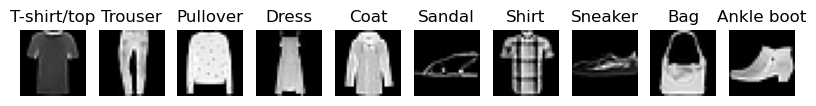

In [7]:
classes = train_set.classes
fig, axs = plt.subplots(1, num_classes, figsize=(10, 10))
class_images = [None] * num_classes

# train_loader has 2 elements: images, and their corresponding labels
for images, labels in train_loader:
    for i in range(len(labels)):
        # convert tensor to scalar
        label = labels[i].item()
        if class_images[label] is None:
            class_images[label] = images[i]

    # stop the iteration if we have found an image for each class
    if all(image is not None for image in class_images):
        break

for i in range(num_classes):
    axs[i].imshow(class_images[i].squeeze(), cmap='gray')
    axs[i].set_title(classes[i])
    axs[i].axis('off')

plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [8]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [9]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# add the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [10]:
def affine_forward(x, w, b):
    # x = x.view(x.size(0), -1)
    y = torch.matmul(x, w) + b
    return y


def relu(x):
    # relu: max(0, x)
    y = torch.maximum(torch.tensor(0, dtype=x.dtype, device=x.device), x)
    return y

Function `model` returns output of the whole model for the input `x` using the parameters:

In [11]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches(B)
    B = x.shape[0]
    x = x.view(B, -1)

    for layer_number in range(num_layers):
        w = parameters[f'w{layer_number}']
        b = parameters[f'b{layer_number}']
        x = affine_forward(x, w, b) 
        # relu function on all the layers except the last one
        if layer_number < num_layers - 1:
            x = relu(x)
    return x


Implementing cross entropy loss:

In [12]:
def cross_entropy_loss(scores, y):
    n = len(y)
    # pi = e^si / (sum(e^sj))
    # L = -sum(yi * log(pi))
    # logpi = si - log(sum(e^sj))
    log_p = scores - torch.log(torch.sum(torch.exp(scores), dim=1, keepdim=True))
    # because y is one-hot encoded, we can extract the correct index of log_p instead of multiplying it by yi
    log_p_i = log_p[range(n), y]
    L = -torch.sum(log_p_i) / n
    return L

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [13]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
#     for param_name, parameter in parameters.items():
#         # updating parameters(w, b)
#         parameter -= learning_rate * parameter.grad
#         # zeroing the gradients of the parameters after updating the parameter value
#         parameter.grad.zero_()
    # Update parameters
    for param in parameters.values():
        if param.grad is not None:  # Only try to update parameters that have gradients
            param.data -= learning_rate * param.grad.data

    # Zero the gradients after updating
    for param in parameters.values():
        if param.grad is not None:
            param.grad = None

Training functions:

In [19]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    total_number = len(y_true)
    correct_number = 0
    for i in range(total_number):
        if y_pred[i] == y_true[i]:
            correct_number += 1
    acc = correct_number / total_number
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        # zeroing the gradients
        for param in parameters.values():
            if param.grad is not None:
                param.grad.zero_()
        # calculating the loss
        loss = cross_entropy_loss(p, y)
        # using PyTorch's backward method to compute the gradients of the loss with respect to all the parameters
        loss.backward()
        # optimizing the model parameters
        sgd_optimizer(parameters, learning_rate)
        train_loss += loss.item()

        print(f"Train: Epoch [{epoch}], Batch [{i+1}/{len(train_loader)}], Loss: {loss}")
        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        # calculating the loss
        loss = cross_entropy_loss(p, y)
        total_loss += loss.item()
        
        print(f"Validation: Epoch [{epoch}], Batch [{i+1}/{len(train_loader)}], Loss: {loss}")
        
        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [20]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [21]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders
    for epoch in range(num_epochs):
        # Calculating the train and test loss and accuracies for each epoch
        
        train_loss, train_acc = train(train_loader, learning_rate, epoch=epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        test_loss, test_acc = validate(test_loader, epoch=epoch, set_name='test')
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

    # loss history of training and test sets
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train')
    plt.plot(range(1, num_epochs + 1), test_losses, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.legend()

    # accuracy history of training and test sets
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train')
    plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return train_losses, test_losses, train_accuracies, test_accuracies

Train: Epoch [0], Batch [1/938], Loss: 2.283564567565918
Train: Epoch [0], Batch [2/938], Loss: 2.2870607376098633
Train: Epoch [0], Batch [3/938], Loss: 2.284881830215454
Train: Epoch [0], Batch [4/938], Loss: 2.283128499984741
Train: Epoch [0], Batch [5/938], Loss: 2.2827532291412354
Train: Epoch [0], Batch [6/938], Loss: 2.281442403793335
Train: Epoch [0], Batch [7/938], Loss: 2.2857718467712402
Train: Epoch [0], Batch [8/938], Loss: 2.283212184906006
Train: Epoch [0], Batch [9/938], Loss: 2.2845654487609863
Train: Epoch [0], Batch [10/938], Loss: 2.2838845252990723
Train: Epoch [0], Batch [11/938], Loss: 2.28432297706604
Train: Epoch [0], Batch [12/938], Loss: 2.2852439880371094
Train: Epoch [0], Batch [13/938], Loss: 2.2829413414001465
Train: Epoch [0], Batch [14/938], Loss: 2.287461996078491
Train: Epoch [0], Batch [15/938], Loss: 2.285722494125366
Train: Epoch [0], Batch [16/938], Loss: 2.2834572792053223
Train: Epoch [0], Batch [17/938], Loss: 2.284834861755371
Train: Epoch [0]

Train: Epoch [0], Batch [147/938], Loss: 2.2756223678588867
Train: Epoch [0], Batch [148/938], Loss: 2.2720413208007812
Train: Epoch [0], Batch [149/938], Loss: 2.274250030517578
Train: Epoch [0], Batch [150/938], Loss: 2.2814135551452637
Train: Epoch [0], Batch [151/938], Loss: 2.275635242462158
Train: Epoch [0], Batch [152/938], Loss: 2.2737836837768555
Train: Epoch [0], Batch [153/938], Loss: 2.2764103412628174
Train: Epoch [0], Batch [154/938], Loss: 2.2784883975982666
Train: Epoch [0], Batch [155/938], Loss: 2.278552532196045
Train: Epoch [0], Batch [156/938], Loss: 2.275369644165039
Train: Epoch [0], Batch [157/938], Loss: 2.277127265930176
Train: Epoch [0], Batch [158/938], Loss: 2.277954578399658
Train: Epoch [0], Batch [159/938], Loss: 2.2787387371063232
Train: Epoch [0], Batch [160/938], Loss: 2.2748360633850098
Train: Epoch [0], Batch [161/938], Loss: 2.2781081199645996
Train: Epoch [0], Batch [162/938], Loss: 2.2813456058502197
Train: Epoch [0], Batch [163/938], Loss: 2.276

Train: Epoch [0], Batch [294/938], Loss: 2.2693305015563965
Train: Epoch [0], Batch [295/938], Loss: 2.2729687690734863
Train: Epoch [0], Batch [296/938], Loss: 2.267772912979126
Train: Epoch [0], Batch [297/938], Loss: 2.269451379776001
Train: Epoch [0], Batch [298/938], Loss: 2.266000747680664
Train: Epoch [0], Batch [299/938], Loss: 2.268476963043213
Train: Epoch [0], Batch [300/938], Loss: 2.2614054679870605
Train: Epoch [0], Batch [301/938], Loss: 2.260551929473877
Train: Epoch [0], Batch [302/938], Loss: 2.2677268981933594
Train: Epoch [0], Batch [303/938], Loss: 2.264730453491211
Train: Epoch [0], Batch [304/938], Loss: 2.269667625427246
Train: Epoch [0], Batch [305/938], Loss: 2.264319658279419
Train: Epoch [0], Batch [306/938], Loss: 2.267458438873291
Train: Epoch [0], Batch [307/938], Loss: 2.2668018341064453
Train: Epoch [0], Batch [308/938], Loss: 2.2679009437561035
Train: Epoch [0], Batch [309/938], Loss: 2.2656145095825195
Train: Epoch [0], Batch [310/938], Loss: 2.265383

Train: Epoch [0], Batch [433/938], Loss: 2.2566092014312744
Train: Epoch [0], Batch [434/938], Loss: 2.2505455017089844
Train: Epoch [0], Batch [435/938], Loss: 2.251321315765381
Train: Epoch [0], Batch [436/938], Loss: 2.2514891624450684
Train: Epoch [0], Batch [437/938], Loss: 2.2529776096343994
Train: Epoch [0], Batch [438/938], Loss: 2.244709014892578
Train: Epoch [0], Batch [439/938], Loss: 2.2452313899993896
Train: Epoch [0], Batch [440/938], Loss: 2.2545080184936523
Train: Epoch [0], Batch [441/938], Loss: 2.2516393661499023
Train: Epoch [0], Batch [442/938], Loss: 2.2533493041992188
Train: Epoch [0], Batch [443/938], Loss: 2.2445359230041504
Train: Epoch [0], Batch [444/938], Loss: 2.249009132385254
Train: Epoch [0], Batch [445/938], Loss: 2.252932548522949
Train: Epoch [0], Batch [446/938], Loss: 2.2524495124816895
Train: Epoch [0], Batch [447/938], Loss: 2.254394769668579
Train: Epoch [0], Batch [448/938], Loss: 2.2497012615203857
Train: Epoch [0], Batch [449/938], Loss: 2.25

Train: Epoch [0], Batch [574/938], Loss: 2.2296338081359863
Train: Epoch [0], Batch [575/938], Loss: 2.2380051612854004
Train: Epoch [0], Batch [576/938], Loss: 2.2223072052001953
Train: Epoch [0], Batch [577/938], Loss: 2.2165961265563965
Train: Epoch [0], Batch [578/938], Loss: 2.227627754211426
Train: Epoch [0], Batch [579/938], Loss: 2.240460157394409
Train: Epoch [0], Batch [580/938], Loss: 2.24308705329895
Train: Epoch [0], Batch [581/938], Loss: 2.2281904220581055
Train: Epoch [0], Batch [582/938], Loss: 2.2344980239868164
Train: Epoch [0], Batch [583/938], Loss: 2.2234883308410645
Train: Epoch [0], Batch [584/938], Loss: 2.235384464263916
Train: Epoch [0], Batch [585/938], Loss: 2.2150790691375732
Train: Epoch [0], Batch [586/938], Loss: 2.2248902320861816
Train: Epoch [0], Batch [587/938], Loss: 2.223452568054199
Train: Epoch [0], Batch [588/938], Loss: 2.2203726768493652
Train: Epoch [0], Batch [589/938], Loss: 2.223392963409424
Train: Epoch [0], Batch [590/938], Loss: 2.2313

Train: Epoch [0], Batch [716/938], Loss: 2.1951911449432373
Train: Epoch [0], Batch [717/938], Loss: 2.1826047897338867
Train: Epoch [0], Batch [718/938], Loss: 2.205321788787842
Train: Epoch [0], Batch [719/938], Loss: 2.2001280784606934
Train: Epoch [0], Batch [720/938], Loss: 2.202157497406006
Train: Epoch [0], Batch [721/938], Loss: 2.2112069129943848
Train: Epoch [0], Batch [722/938], Loss: 2.189237356185913
Train: Epoch [0], Batch [723/938], Loss: 2.174299478530884
Train: Epoch [0], Batch [724/938], Loss: 2.188809394836426
Train: Epoch [0], Batch [725/938], Loss: 2.1927242279052734
Train: Epoch [0], Batch [726/938], Loss: 2.197504997253418
Train: Epoch [0], Batch [727/938], Loss: 2.1732754707336426
Train: Epoch [0], Batch [728/938], Loss: 2.180999994277954
Train: Epoch [0], Batch [729/938], Loss: 2.184335708618164
Train: Epoch [0], Batch [730/938], Loss: 2.1976163387298584
Train: Epoch [0], Batch [731/938], Loss: 2.1728286743164062
Train: Epoch [0], Batch [732/938], Loss: 2.18186

Train: Epoch [0], Batch [871/938], Loss: 2.123739004135132
Train: Epoch [0], Batch [872/938], Loss: 2.137207508087158
Train: Epoch [0], Batch [873/938], Loss: 2.104180097579956
Train: Epoch [0], Batch [874/938], Loss: 2.0848793983459473
Train: Epoch [0], Batch [875/938], Loss: 2.09716796875
Train: Epoch [0], Batch [876/938], Loss: 2.113476276397705
Train: Epoch [0], Batch [877/938], Loss: 2.114123821258545
Train: Epoch [0], Batch [878/938], Loss: 2.1347742080688477
Train: Epoch [0], Batch [879/938], Loss: 2.1208999156951904
Train: Epoch [0], Batch [880/938], Loss: 2.1054773330688477
Train: Epoch [0], Batch [881/938], Loss: 2.099236011505127
Train: Epoch [0], Batch [882/938], Loss: 2.1532392501831055
Train: Epoch [0], Batch [883/938], Loss: 2.0893003940582275
Train: Epoch [0], Batch [884/938], Loss: 2.1008896827697754
Train: Epoch [0], Batch [885/938], Loss: 2.128916025161743
Train: Epoch [0], Batch [886/938], Loss: 2.0965726375579834
Train: Epoch [0], Batch [887/938], Loss: 2.094677686

Validation: Epoch [0], Batch [81/938], Loss: 2.0626349449157715
Validation: Epoch [0], Batch [82/938], Loss: 2.0694189071655273
Validation: Epoch [0], Batch [83/938], Loss: 2.077744960784912
Validation: Epoch [0], Batch [84/938], Loss: 2.0547170639038086
Validation: Epoch [0], Batch [85/938], Loss: 2.0800387859344482
Validation: Epoch [0], Batch [86/938], Loss: 2.0468478202819824
Validation: Epoch [0], Batch [87/938], Loss: 2.037994861602783
Validation: Epoch [0], Batch [88/938], Loss: 2.0468688011169434
Validation: Epoch [0], Batch [89/938], Loss: 2.065927028656006
Validation: Epoch [0], Batch [90/938], Loss: 2.0465316772460938
Validation: Epoch [0], Batch [91/938], Loss: 2.043755054473877
Validation: Epoch [0], Batch [92/938], Loss: 2.0612711906433105
Validation: Epoch [0], Batch [93/938], Loss: 2.055262565612793
Validation: Epoch [0], Batch [94/938], Loss: 2.0547468662261963
Validation: Epoch [0], Batch [95/938], Loss: 2.016857385635376
Validation: Epoch [0], Batch [96/938], Loss: 2

Validation: Epoch [0], Batch [232/938], Loss: 2.0853123664855957
Validation: Epoch [0], Batch [233/938], Loss: 2.0372419357299805
Validation: Epoch [0], Batch [234/938], Loss: 2.0310049057006836
Validation: Epoch [0], Batch [235/938], Loss: 2.0540432929992676
Validation: Epoch [0], Batch [236/938], Loss: 2.0472264289855957
Validation: Epoch [0], Batch [237/938], Loss: 2.1099352836608887
Validation: Epoch [0], Batch [238/938], Loss: 2.076939105987549
Validation: Epoch [0], Batch [239/938], Loss: 2.1031014919281006
Validation: Epoch [0], Batch [240/938], Loss: 2.0725154876708984
Validation: Epoch [0], Batch [241/938], Loss: 2.0447967052459717
Validation: Epoch [0], Batch [242/938], Loss: 2.062084674835205
Validation: Epoch [0], Batch [243/938], Loss: 2.070680856704712
Validation: Epoch [0], Batch [244/938], Loss: 2.0814614295959473
Validation: Epoch [0], Batch [245/938], Loss: 2.0310044288635254
Validation: Epoch [0], Batch [246/938], Loss: 2.0688843727111816
Validation: Epoch [0], Batch

Validation: Epoch [0], Batch [363/938], Loss: 2.0220580101013184
Validation: Epoch [0], Batch [364/938], Loss: 2.0978431701660156
Validation: Epoch [0], Batch [365/938], Loss: 2.0274009704589844
Validation: Epoch [0], Batch [366/938], Loss: 2.0613021850585938
Validation: Epoch [0], Batch [367/938], Loss: 2.0446434020996094
Validation: Epoch [0], Batch [368/938], Loss: 2.0216426849365234
Validation: Epoch [0], Batch [369/938], Loss: 2.0751147270202637
Validation: Epoch [0], Batch [370/938], Loss: 2.0322322845458984
Validation: Epoch [0], Batch [371/938], Loss: 2.044166326522827
Validation: Epoch [0], Batch [372/938], Loss: 2.072728157043457
Validation: Epoch [0], Batch [373/938], Loss: 2.059879779815674
Validation: Epoch [0], Batch [374/938], Loss: 2.048356533050537
Validation: Epoch [0], Batch [375/938], Loss: 2.04473614692688
Validation: Epoch [0], Batch [376/938], Loss: 2.0680155754089355
Validation: Epoch [0], Batch [377/938], Loss: 2.0591087341308594
Validation: Epoch [0], Batch [3

Validation: Epoch [0], Batch [497/938], Loss: 2.0532946586608887
Validation: Epoch [0], Batch [498/938], Loss: 2.0489501953125
Validation: Epoch [0], Batch [499/938], Loss: 2.117974042892456
Validation: Epoch [0], Batch [500/938], Loss: 2.06141996383667
Validation: Epoch [0], Batch [501/938], Loss: 2.0576224327087402
Validation: Epoch [0], Batch [502/938], Loss: 2.064080238342285
Validation: Epoch [0], Batch [503/938], Loss: 2.0708305835723877
Validation: Epoch [0], Batch [504/938], Loss: 2.069176197052002
Validation: Epoch [0], Batch [505/938], Loss: 2.058565616607666
Validation: Epoch [0], Batch [506/938], Loss: 2.0897059440612793
Validation: Epoch [0], Batch [507/938], Loss: 2.0634632110595703
Validation: Epoch [0], Batch [508/938], Loss: 2.0430166721343994
Validation: Epoch [0], Batch [509/938], Loss: 2.078646183013916
Validation: Epoch [0], Batch [510/938], Loss: 2.0895376205444336
Validation: Epoch [0], Batch [511/938], Loss: 2.036449909210205
Validation: Epoch [0], Batch [512/93

Validation: Epoch [0], Batch [629/938], Loss: 2.0681357383728027
Validation: Epoch [0], Batch [630/938], Loss: 2.043241024017334
Validation: Epoch [0], Batch [631/938], Loss: 2.091376543045044
Validation: Epoch [0], Batch [632/938], Loss: 2.0491812229156494
Validation: Epoch [0], Batch [633/938], Loss: 2.088071823120117
Validation: Epoch [0], Batch [634/938], Loss: 2.0609583854675293
Validation: Epoch [0], Batch [635/938], Loss: 2.049799919128418
Validation: Epoch [0], Batch [636/938], Loss: 2.038525104522705
Validation: Epoch [0], Batch [637/938], Loss: 2.060857057571411
Validation: Epoch [0], Batch [638/938], Loss: 2.1059353351593018
Validation: Epoch [0], Batch [639/938], Loss: 2.079702138900757
Validation: Epoch [0], Batch [640/938], Loss: 2.0324926376342773
Validation: Epoch [0], Batch [641/938], Loss: 2.060333251953125
Validation: Epoch [0], Batch [642/938], Loss: 2.046891927719116
Validation: Epoch [0], Batch [643/938], Loss: 2.0278944969177246
Validation: Epoch [0], Batch [644/

Validation: Epoch [0], Batch [765/938], Loss: 2.053352117538452
Validation: Epoch [0], Batch [766/938], Loss: 2.0793588161468506
Validation: Epoch [0], Batch [767/938], Loss: 2.0650134086608887
Validation: Epoch [0], Batch [768/938], Loss: 2.0851898193359375
Validation: Epoch [0], Batch [769/938], Loss: 2.058795690536499
Validation: Epoch [0], Batch [770/938], Loss: 2.0704777240753174
Validation: Epoch [0], Batch [771/938], Loss: 2.047133684158325
Validation: Epoch [0], Batch [772/938], Loss: 2.076364040374756
Validation: Epoch [0], Batch [773/938], Loss: 2.0385499000549316
Validation: Epoch [0], Batch [774/938], Loss: 2.03320574760437
Validation: Epoch [0], Batch [775/938], Loss: 2.089970111846924
Validation: Epoch [0], Batch [776/938], Loss: 2.033262252807617
Validation: Epoch [0], Batch [777/938], Loss: 2.0696651935577393
Validation: Epoch [0], Batch [778/938], Loss: 2.0644335746765137
Validation: Epoch [0], Batch [779/938], Loss: 2.058501958847046
Validation: Epoch [0], Batch [780/

Validation: Epoch [0], Batch [894/938], Loss: 2.0373950004577637
Validation: Epoch [0], Batch [895/938], Loss: 2.0373995304107666
Validation: Epoch [0], Batch [896/938], Loss: 2.0840349197387695
Validation: Epoch [0], Batch [897/938], Loss: 2.0755412578582764
Validation: Epoch [0], Batch [898/938], Loss: 2.0878138542175293
Validation: Epoch [0], Batch [899/938], Loss: 2.0835256576538086
Validation: Epoch [0], Batch [900/938], Loss: 2.072981834411621
Validation: Epoch [0], Batch [901/938], Loss: 2.0709733963012695
Validation: Epoch [0], Batch [902/938], Loss: 2.046447515487671
Validation: Epoch [0], Batch [903/938], Loss: 2.090273380279541
Validation: Epoch [0], Batch [904/938], Loss: 2.0759265422821045
Validation: Epoch [0], Batch [905/938], Loss: 2.039395809173584
Validation: Epoch [0], Batch [906/938], Loss: 2.0985333919525146
Validation: Epoch [0], Batch [907/938], Loss: 2.0647952556610107
Validation: Epoch [0], Batch [908/938], Loss: 2.0541491508483887
Validation: Epoch [0], Batch 

Train: Epoch [1], Batch [92/938], Loss: 1.986998438835144
Train: Epoch [1], Batch [93/938], Loss: 1.944669246673584
Train: Epoch [1], Batch [94/938], Loss: 1.9336297512054443
Train: Epoch [1], Batch [95/938], Loss: 2.000274181365967
Train: Epoch [1], Batch [96/938], Loss: 1.987224817276001
Train: Epoch [1], Batch [97/938], Loss: 1.916752815246582
Train: Epoch [1], Batch [98/938], Loss: 1.9969425201416016
Train: Epoch [1], Batch [99/938], Loss: 1.906682014465332
Train: Epoch [1], Batch [100/938], Loss: 1.940049409866333
Train: Epoch [1], Batch [101/938], Loss: 1.9647111892700195
Train: Epoch [1], Batch [102/938], Loss: 1.9463605880737305
Train: Epoch [1], Batch [103/938], Loss: 1.9942365884780884
Train: Epoch [1], Batch [104/938], Loss: 1.9608248472213745
Train: Epoch [1], Batch [105/938], Loss: 2.0105485916137695
Train: Epoch [1], Batch [106/938], Loss: 1.9921138286590576
Train: Epoch [1], Batch [107/938], Loss: 1.9156198501586914
Train: Epoch [1], Batch [108/938], Loss: 1.913998603820

Train: Epoch [1], Batch [236/938], Loss: 1.7238194942474365
Train: Epoch [1], Batch [237/938], Loss: 1.7760229110717773
Train: Epoch [1], Batch [238/938], Loss: 1.7511132955551147
Train: Epoch [1], Batch [239/938], Loss: 1.6992709636688232
Train: Epoch [1], Batch [240/938], Loss: 1.739888072013855
Train: Epoch [1], Batch [241/938], Loss: 1.7622840404510498
Train: Epoch [1], Batch [242/938], Loss: 1.799797534942627
Train: Epoch [1], Batch [243/938], Loss: 1.7528640031814575
Train: Epoch [1], Batch [244/938], Loss: 1.8271349668502808
Train: Epoch [1], Batch [245/938], Loss: 1.7647361755371094
Train: Epoch [1], Batch [246/938], Loss: 1.7278380393981934
Train: Epoch [1], Batch [247/938], Loss: 1.7267292737960815
Train: Epoch [1], Batch [248/938], Loss: 1.7763866186141968
Train: Epoch [1], Batch [249/938], Loss: 1.7376534938812256
Train: Epoch [1], Batch [250/938], Loss: 1.753680944442749
Train: Epoch [1], Batch [251/938], Loss: 1.812898874282837
Train: Epoch [1], Batch [252/938], Loss: 1.8

Train: Epoch [1], Batch [383/938], Loss: 1.5882937908172607
Train: Epoch [1], Batch [384/938], Loss: 1.529463768005371
Train: Epoch [1], Batch [385/938], Loss: 1.4868714809417725
Train: Epoch [1], Batch [386/938], Loss: 1.638634204864502
Train: Epoch [1], Batch [387/938], Loss: 1.6087861061096191
Train: Epoch [1], Batch [388/938], Loss: 1.5636162757873535
Train: Epoch [1], Batch [389/938], Loss: 1.514115571975708
Train: Epoch [1], Batch [390/938], Loss: 1.5130932331085205
Train: Epoch [1], Batch [391/938], Loss: 1.524794578552246
Train: Epoch [1], Batch [392/938], Loss: 1.5967727899551392
Train: Epoch [1], Batch [393/938], Loss: 1.5346863269805908
Train: Epoch [1], Batch [394/938], Loss: 1.6085903644561768
Train: Epoch [1], Batch [395/938], Loss: 1.5874085426330566
Train: Epoch [1], Batch [396/938], Loss: 1.4760901927947998
Train: Epoch [1], Batch [397/938], Loss: 1.4780101776123047
Train: Epoch [1], Batch [398/938], Loss: 1.5833125114440918
Train: Epoch [1], Batch [399/938], Loss: 1.5

Train: Epoch [1], Batch [530/938], Loss: 1.3559715747833252
Train: Epoch [1], Batch [531/938], Loss: 1.3720216751098633
Train: Epoch [1], Batch [532/938], Loss: 1.29678213596344
Train: Epoch [1], Batch [533/938], Loss: 1.407805323600769
Train: Epoch [1], Batch [534/938], Loss: 1.430019736289978
Train: Epoch [1], Batch [535/938], Loss: 1.345619559288025
Train: Epoch [1], Batch [536/938], Loss: 1.406402349472046
Train: Epoch [1], Batch [537/938], Loss: 1.4371662139892578
Train: Epoch [1], Batch [538/938], Loss: 1.2968631982803345
Train: Epoch [1], Batch [539/938], Loss: 1.373668909072876
Train: Epoch [1], Batch [540/938], Loss: 1.4149682521820068
Train: Epoch [1], Batch [541/938], Loss: 1.3677077293395996
Train: Epoch [1], Batch [542/938], Loss: 1.3379414081573486
Train: Epoch [1], Batch [543/938], Loss: 1.3888955116271973
Train: Epoch [1], Batch [544/938], Loss: 1.381818175315857
Train: Epoch [1], Batch [545/938], Loss: 1.3569512367248535
Train: Epoch [1], Batch [546/938], Loss: 1.33900

Train: Epoch [1], Batch [671/938], Loss: 1.4129798412322998
Train: Epoch [1], Batch [672/938], Loss: 1.253525733947754
Train: Epoch [1], Batch [673/938], Loss: 1.181749701499939
Train: Epoch [1], Batch [674/938], Loss: 1.3160011768341064
Train: Epoch [1], Batch [675/938], Loss: 1.3465487957000732
Train: Epoch [1], Batch [676/938], Loss: 1.3773493766784668
Train: Epoch [1], Batch [677/938], Loss: 1.2047967910766602
Train: Epoch [1], Batch [678/938], Loss: 1.2622833251953125
Train: Epoch [1], Batch [679/938], Loss: 1.3174399137496948
Train: Epoch [1], Batch [680/938], Loss: 1.308521032333374
Train: Epoch [1], Batch [681/938], Loss: 1.2069274187088013
Train: Epoch [1], Batch [682/938], Loss: 1.2593003511428833
Train: Epoch [1], Batch [683/938], Loss: 1.1873385906219482
Train: Epoch [1], Batch [684/938], Loss: 1.247265100479126
Train: Epoch [1], Batch [685/938], Loss: 1.27847158908844
Train: Epoch [1], Batch [686/938], Loss: 1.244077205657959
Train: Epoch [1], Batch [687/938], Loss: 1.1992

Train: Epoch [1], Batch [817/938], Loss: 1.219930648803711
Train: Epoch [1], Batch [818/938], Loss: 1.204026222229004
Train: Epoch [1], Batch [819/938], Loss: 1.1789512634277344
Train: Epoch [1], Batch [820/938], Loss: 1.2257273197174072
Train: Epoch [1], Batch [821/938], Loss: 1.1028143167495728
Train: Epoch [1], Batch [822/938], Loss: 1.0758130550384521
Train: Epoch [1], Batch [823/938], Loss: 1.1371946334838867
Train: Epoch [1], Batch [824/938], Loss: 1.1967082023620605
Train: Epoch [1], Batch [825/938], Loss: 1.2407244443893433
Train: Epoch [1], Batch [826/938], Loss: 1.1470947265625
Train: Epoch [1], Batch [827/938], Loss: 1.0751371383666992
Train: Epoch [1], Batch [828/938], Loss: 1.1543242931365967
Train: Epoch [1], Batch [829/938], Loss: 1.5153417587280273
Train: Epoch [1], Batch [830/938], Loss: 1.238423466682434
Train: Epoch [1], Batch [831/938], Loss: 1.076431393623352
Train: Epoch [1], Batch [832/938], Loss: 1.1901373863220215
Train: Epoch [1], Batch [833/938], Loss: 1.1435

Validation: Epoch [1], Batch [17/938], Loss: 0.9651353359222412
Validation: Epoch [1], Batch [18/938], Loss: 1.1918851137161255
Validation: Epoch [1], Batch [19/938], Loss: 1.044440746307373
Validation: Epoch [1], Batch [20/938], Loss: 1.072771668434143
Validation: Epoch [1], Batch [21/938], Loss: 1.0435712337493896
Validation: Epoch [1], Batch [22/938], Loss: 0.9554988145828247
Validation: Epoch [1], Batch [23/938], Loss: 1.0582046508789062
Validation: Epoch [1], Batch [24/938], Loss: 1.0386216640472412
Validation: Epoch [1], Batch [25/938], Loss: 1.0735104084014893
Validation: Epoch [1], Batch [26/938], Loss: 1.0894557237625122
Validation: Epoch [1], Batch [27/938], Loss: 1.0676432847976685
Validation: Epoch [1], Batch [28/938], Loss: 1.0786575078964233
Validation: Epoch [1], Batch [29/938], Loss: 1.09042227268219
Validation: Epoch [1], Batch [30/938], Loss: 1.0221524238586426
Validation: Epoch [1], Batch [31/938], Loss: 0.9890334606170654
Validation: Epoch [1], Batch [32/938], Loss:

Validation: Epoch [1], Batch [145/938], Loss: 1.1280758380889893
Validation: Epoch [1], Batch [146/938], Loss: 1.0881189107894897
Validation: Epoch [1], Batch [147/938], Loss: 1.0332045555114746
Validation: Epoch [1], Batch [148/938], Loss: 1.079660177230835
Validation: Epoch [1], Batch [149/938], Loss: 1.0809648036956787
Validation: Epoch [1], Batch [150/938], Loss: 1.1315393447875977
Validation: Epoch [1], Batch [151/938], Loss: 1.1734137535095215
Validation: Epoch [1], Batch [152/938], Loss: 1.0439420938491821
Validation: Epoch [1], Batch [153/938], Loss: 1.0706326961517334
Validation: Epoch [1], Batch [154/938], Loss: 1.127849817276001
Validation: Epoch [1], Batch [155/938], Loss: 1.009334921836853
Validation: Epoch [1], Batch [156/938], Loss: 1.0766937732696533
Validation: Epoch [1], Batch [157/938], Loss: 1.2376199960708618
Validation: Epoch [1], Batch [158/938], Loss: 1.168556809425354
Validation: Epoch [1], Batch [159/938], Loss: 1.0673882961273193
Validation: Epoch [1], Batch 

Validation: Epoch [1], Batch [277/938], Loss: 1.3520984649658203
Validation: Epoch [1], Batch [278/938], Loss: 1.0611166954040527
Validation: Epoch [1], Batch [279/938], Loss: 1.2075257301330566
Validation: Epoch [1], Batch [280/938], Loss: 1.0839920043945312
Validation: Epoch [1], Batch [281/938], Loss: 0.9853579998016357
Validation: Epoch [1], Batch [282/938], Loss: 1.0556433200836182
Validation: Epoch [1], Batch [283/938], Loss: 1.0401763916015625
Validation: Epoch [1], Batch [284/938], Loss: 1.2293972969055176
Validation: Epoch [1], Batch [285/938], Loss: 1.0129700899124146
Validation: Epoch [1], Batch [286/938], Loss: 1.0635952949523926
Validation: Epoch [1], Batch [287/938], Loss: 1.0454089641571045
Validation: Epoch [1], Batch [288/938], Loss: 1.1388177871704102
Validation: Epoch [1], Batch [289/938], Loss: 1.31378173828125
Validation: Epoch [1], Batch [290/938], Loss: 1.1662392616271973
Validation: Epoch [1], Batch [291/938], Loss: 1.2155990600585938
Validation: Epoch [1], Batc

Validation: Epoch [1], Batch [432/938], Loss: 0.9727885127067566
Validation: Epoch [1], Batch [433/938], Loss: 1.133719801902771
Validation: Epoch [1], Batch [434/938], Loss: 1.0160142183303833
Validation: Epoch [1], Batch [435/938], Loss: 1.021432638168335
Validation: Epoch [1], Batch [436/938], Loss: 1.2081165313720703
Validation: Epoch [1], Batch [437/938], Loss: 1.048779845237732
Validation: Epoch [1], Batch [438/938], Loss: 1.2073638439178467
Validation: Epoch [1], Batch [439/938], Loss: 1.0940210819244385
Validation: Epoch [1], Batch [440/938], Loss: 0.9674583673477173
Validation: Epoch [1], Batch [441/938], Loss: 1.1826603412628174
Validation: Epoch [1], Batch [442/938], Loss: 1.0427124500274658
Validation: Epoch [1], Batch [443/938], Loss: 1.2036807537078857
Validation: Epoch [1], Batch [444/938], Loss: 1.2476084232330322
Validation: Epoch [1], Batch [445/938], Loss: 1.1238641738891602
Validation: Epoch [1], Batch [446/938], Loss: 1.0468813180923462
Validation: Epoch [1], Batch

Validation: Epoch [1], Batch [562/938], Loss: 1.040388822555542
Validation: Epoch [1], Batch [563/938], Loss: 1.1843550205230713
Validation: Epoch [1], Batch [564/938], Loss: 1.2917001247406006
Validation: Epoch [1], Batch [565/938], Loss: 1.0482759475708008
Validation: Epoch [1], Batch [566/938], Loss: 1.1983044147491455
Validation: Epoch [1], Batch [567/938], Loss: 1.1433370113372803
Validation: Epoch [1], Batch [568/938], Loss: 1.155626893043518
Validation: Epoch [1], Batch [569/938], Loss: 1.1222350597381592
Validation: Epoch [1], Batch [570/938], Loss: 1.1597706079483032
Validation: Epoch [1], Batch [571/938], Loss: 1.0977028608322144
Validation: Epoch [1], Batch [572/938], Loss: 1.1258220672607422
Validation: Epoch [1], Batch [573/938], Loss: 1.1291543245315552
Validation: Epoch [1], Batch [574/938], Loss: 1.196868896484375
Validation: Epoch [1], Batch [575/938], Loss: 1.1126277446746826
Validation: Epoch [1], Batch [576/938], Loss: 1.0980920791625977
Validation: Epoch [1], Batch

Validation: Epoch [1], Batch [690/938], Loss: 1.083458662033081
Validation: Epoch [1], Batch [691/938], Loss: 1.09891676902771
Validation: Epoch [1], Batch [692/938], Loss: 1.156707525253296
Validation: Epoch [1], Batch [693/938], Loss: 0.9852210283279419
Validation: Epoch [1], Batch [694/938], Loss: 1.0751621723175049
Validation: Epoch [1], Batch [695/938], Loss: 1.1112086772918701
Validation: Epoch [1], Batch [696/938], Loss: 1.1666712760925293
Validation: Epoch [1], Batch [697/938], Loss: 1.129831314086914
Validation: Epoch [1], Batch [698/938], Loss: 1.1940457820892334
Validation: Epoch [1], Batch [699/938], Loss: 1.081628680229187
Validation: Epoch [1], Batch [700/938], Loss: 1.1055781841278076
Validation: Epoch [1], Batch [701/938], Loss: 1.2136927843093872
Validation: Epoch [1], Batch [702/938], Loss: 1.147566795349121
Validation: Epoch [1], Batch [703/938], Loss: 1.0691983699798584
Validation: Epoch [1], Batch [704/938], Loss: 1.0926755666732788
Validation: Epoch [1], Batch [70

Validation: Epoch [1], Batch [822/938], Loss: 1.1063154935836792
Validation: Epoch [1], Batch [823/938], Loss: 1.0123374462127686
Validation: Epoch [1], Batch [824/938], Loss: 1.0910532474517822
Validation: Epoch [1], Batch [825/938], Loss: 1.0306358337402344
Validation: Epoch [1], Batch [826/938], Loss: 1.1456794738769531
Validation: Epoch [1], Batch [827/938], Loss: 1.1905779838562012
Validation: Epoch [1], Batch [828/938], Loss: 1.1412525177001953
Validation: Epoch [1], Batch [829/938], Loss: 0.979178249835968
Validation: Epoch [1], Batch [830/938], Loss: 1.156980037689209
Validation: Epoch [1], Batch [831/938], Loss: 1.227046251296997
Validation: Epoch [1], Batch [832/938], Loss: 1.0351370573043823
Validation: Epoch [1], Batch [833/938], Loss: 1.1463727951049805
Validation: Epoch [1], Batch [834/938], Loss: 1.1331053972244263
Validation: Epoch [1], Batch [835/938], Loss: 1.1219887733459473
Validation: Epoch [1], Batch [836/938], Loss: 1.116079568862915
Validation: Epoch [1], Batch 

Train: Epoch [2], Batch [23/938], Loss: 1.0159589052200317
Train: Epoch [2], Batch [24/938], Loss: 1.1216320991516113
Train: Epoch [2], Batch [25/938], Loss: 1.127604365348816
Train: Epoch [2], Batch [26/938], Loss: 1.2536060810089111
Train: Epoch [2], Batch [27/938], Loss: 1.0841434001922607
Train: Epoch [2], Batch [28/938], Loss: 1.142730474472046
Train: Epoch [2], Batch [29/938], Loss: 1.0701255798339844
Train: Epoch [2], Batch [30/938], Loss: 1.0786454677581787
Train: Epoch [2], Batch [31/938], Loss: 1.0311970710754395
Train: Epoch [2], Batch [32/938], Loss: 0.9832124710083008
Train: Epoch [2], Batch [33/938], Loss: 0.9530313014984131
Train: Epoch [2], Batch [34/938], Loss: 1.0654398202896118
Train: Epoch [2], Batch [35/938], Loss: 1.2209792137145996
Train: Epoch [2], Batch [36/938], Loss: 1.184220314025879
Train: Epoch [2], Batch [37/938], Loss: 1.0416107177734375
Train: Epoch [2], Batch [38/938], Loss: 1.0736916065216064
Train: Epoch [2], Batch [39/938], Loss: 1.0661791563034058


Train: Epoch [2], Batch [165/938], Loss: 1.0648303031921387
Train: Epoch [2], Batch [166/938], Loss: 0.9276348352432251
Train: Epoch [2], Batch [167/938], Loss: 1.1269869804382324
Train: Epoch [2], Batch [168/938], Loss: 1.0494242906570435
Train: Epoch [2], Batch [169/938], Loss: 1.1327698230743408
Train: Epoch [2], Batch [170/938], Loss: 1.1028006076812744
Train: Epoch [2], Batch [171/938], Loss: 1.0359759330749512
Train: Epoch [2], Batch [172/938], Loss: 1.05165696144104
Train: Epoch [2], Batch [173/938], Loss: 1.0238198041915894
Train: Epoch [2], Batch [174/938], Loss: 1.0554983615875244
Train: Epoch [2], Batch [175/938], Loss: 1.0554852485656738
Train: Epoch [2], Batch [176/938], Loss: 1.0233416557312012
Train: Epoch [2], Batch [177/938], Loss: 0.9668675661087036
Train: Epoch [2], Batch [178/938], Loss: 1.0856943130493164
Train: Epoch [2], Batch [179/938], Loss: 1.06181001663208
Train: Epoch [2], Batch [180/938], Loss: 1.199405312538147
Train: Epoch [2], Batch [181/938], Loss: 1.02

Train: Epoch [2], Batch [307/938], Loss: 0.8803888559341431
Train: Epoch [2], Batch [308/938], Loss: 0.975086510181427
Train: Epoch [2], Batch [309/938], Loss: 0.8191405534744263
Train: Epoch [2], Batch [310/938], Loss: 1.0011332035064697
Train: Epoch [2], Batch [311/938], Loss: 1.0324456691741943
Train: Epoch [2], Batch [312/938], Loss: 1.056957483291626
Train: Epoch [2], Batch [313/938], Loss: 1.1232527494430542
Train: Epoch [2], Batch [314/938], Loss: 1.0747618675231934
Train: Epoch [2], Batch [315/938], Loss: 0.8974438905715942
Train: Epoch [2], Batch [316/938], Loss: 0.945821225643158
Train: Epoch [2], Batch [317/938], Loss: 0.8449810147285461
Train: Epoch [2], Batch [318/938], Loss: 1.0894265174865723
Train: Epoch [2], Batch [319/938], Loss: 0.9706758856773376
Train: Epoch [2], Batch [320/938], Loss: 0.9921145439147949
Train: Epoch [2], Batch [321/938], Loss: 0.9046674370765686
Train: Epoch [2], Batch [322/938], Loss: 0.9161220192909241
Train: Epoch [2], Batch [323/938], Loss: 0.

Train: Epoch [2], Batch [446/938], Loss: 0.9448440074920654
Train: Epoch [2], Batch [447/938], Loss: 1.0134265422821045
Train: Epoch [2], Batch [448/938], Loss: 0.8764525651931763
Train: Epoch [2], Batch [449/938], Loss: 0.9231092929840088
Train: Epoch [2], Batch [450/938], Loss: 0.9675180912017822
Train: Epoch [2], Batch [451/938], Loss: 0.867139995098114
Train: Epoch [2], Batch [452/938], Loss: 0.9710951447486877
Train: Epoch [2], Batch [453/938], Loss: 1.0533347129821777
Train: Epoch [2], Batch [454/938], Loss: 1.008735179901123
Train: Epoch [2], Batch [455/938], Loss: 0.8329343795776367
Train: Epoch [2], Batch [456/938], Loss: 0.7982492446899414
Train: Epoch [2], Batch [457/938], Loss: 0.9038776159286499
Train: Epoch [2], Batch [458/938], Loss: 0.9221121668815613
Train: Epoch [2], Batch [459/938], Loss: 0.9899665713310242
Train: Epoch [2], Batch [460/938], Loss: 1.1588627099990845
Train: Epoch [2], Batch [461/938], Loss: 0.9652829170227051
Train: Epoch [2], Batch [462/938], Loss: 1

Train: Epoch [2], Batch [589/938], Loss: 0.9132596254348755
Train: Epoch [2], Batch [590/938], Loss: 0.760248064994812
Train: Epoch [2], Batch [591/938], Loss: 0.8679866790771484
Train: Epoch [2], Batch [592/938], Loss: 0.9916009902954102
Train: Epoch [2], Batch [593/938], Loss: 0.8666902780532837
Train: Epoch [2], Batch [594/938], Loss: 0.8414490222930908
Train: Epoch [2], Batch [595/938], Loss: 0.8790454268455505
Train: Epoch [2], Batch [596/938], Loss: 0.8816637992858887
Train: Epoch [2], Batch [597/938], Loss: 0.9559834599494934
Train: Epoch [2], Batch [598/938], Loss: 0.7892661094665527
Train: Epoch [2], Batch [599/938], Loss: 0.9182717204093933
Train: Epoch [2], Batch [600/938], Loss: 1.0179558992385864
Train: Epoch [2], Batch [601/938], Loss: 1.0822474956512451
Train: Epoch [2], Batch [602/938], Loss: 0.8962185978889465
Train: Epoch [2], Batch [603/938], Loss: 1.1021716594696045
Train: Epoch [2], Batch [604/938], Loss: 0.7934964895248413
Train: Epoch [2], Batch [605/938], Loss: 

Train: Epoch [2], Batch [740/938], Loss: 0.9189320802688599
Train: Epoch [2], Batch [741/938], Loss: 0.9301939010620117
Train: Epoch [2], Batch [742/938], Loss: 0.7996474504470825
Train: Epoch [2], Batch [743/938], Loss: 1.0340627431869507
Train: Epoch [2], Batch [744/938], Loss: 0.8140745162963867
Train: Epoch [2], Batch [745/938], Loss: 1.0400714874267578
Train: Epoch [2], Batch [746/938], Loss: 0.9022281169891357
Train: Epoch [2], Batch [747/938], Loss: 0.8732665181159973
Train: Epoch [2], Batch [748/938], Loss: 0.7190778255462646
Train: Epoch [2], Batch [749/938], Loss: 0.9590165615081787
Train: Epoch [2], Batch [750/938], Loss: 0.7658933997154236
Train: Epoch [2], Batch [751/938], Loss: 0.7954838275909424
Train: Epoch [2], Batch [752/938], Loss: 0.8942500352859497
Train: Epoch [2], Batch [753/938], Loss: 0.9124525189399719
Train: Epoch [2], Batch [754/938], Loss: 0.9252775311470032
Train: Epoch [2], Batch [755/938], Loss: 0.931875467300415
Train: Epoch [2], Batch [756/938], Loss: 

Train: Epoch [2], Batch [890/938], Loss: 0.6872996091842651
Train: Epoch [2], Batch [891/938], Loss: 0.8809874057769775
Train: Epoch [2], Batch [892/938], Loss: 1.2933865785598755
Train: Epoch [2], Batch [893/938], Loss: 0.9481216669082642
Train: Epoch [2], Batch [894/938], Loss: 0.8206741809844971
Train: Epoch [2], Batch [895/938], Loss: 0.7979438304901123
Train: Epoch [2], Batch [896/938], Loss: 1.144883394241333
Train: Epoch [2], Batch [897/938], Loss: 0.877571702003479
Train: Epoch [2], Batch [898/938], Loss: 0.7682361602783203
Train: Epoch [2], Batch [899/938], Loss: 1.07816743850708
Train: Epoch [2], Batch [900/938], Loss: 0.8325350284576416
Train: Epoch [2], Batch [901/938], Loss: 0.6749709248542786
Train: Epoch [2], Batch [902/938], Loss: 0.6840922832489014
Train: Epoch [2], Batch [903/938], Loss: 0.7979124784469604
Train: Epoch [2], Batch [904/938], Loss: 0.9469215869903564
Train: Epoch [2], Batch [905/938], Loss: 0.9787079691886902
Train: Epoch [2], Batch [906/938], Loss: 1.0

Validation: Epoch [2], Batch [106/938], Loss: 0.7036913633346558
Validation: Epoch [2], Batch [107/938], Loss: 0.8534324169158936
Validation: Epoch [2], Batch [108/938], Loss: 0.8500981330871582
Validation: Epoch [2], Batch [109/938], Loss: 1.0571202039718628
Validation: Epoch [2], Batch [110/938], Loss: 0.9957704544067383
Validation: Epoch [2], Batch [111/938], Loss: 0.8085882067680359
Validation: Epoch [2], Batch [112/938], Loss: 0.8648684620857239
Validation: Epoch [2], Batch [113/938], Loss: 0.8436692953109741
Validation: Epoch [2], Batch [114/938], Loss: 0.7983918190002441
Validation: Epoch [2], Batch [115/938], Loss: 0.8326457738876343
Validation: Epoch [2], Batch [116/938], Loss: 0.7837518453598022
Validation: Epoch [2], Batch [117/938], Loss: 0.891423761844635
Validation: Epoch [2], Batch [118/938], Loss: 0.9057013988494873
Validation: Epoch [2], Batch [119/938], Loss: 0.9109190702438354
Validation: Epoch [2], Batch [120/938], Loss: 0.8733394145965576
Validation: Epoch [2], Bat

Validation: Epoch [2], Batch [255/938], Loss: 0.9653710722923279
Validation: Epoch [2], Batch [256/938], Loss: 0.6872263550758362
Validation: Epoch [2], Batch [257/938], Loss: 0.7849835157394409
Validation: Epoch [2], Batch [258/938], Loss: 0.7517027258872986
Validation: Epoch [2], Batch [259/938], Loss: 0.9365242123603821
Validation: Epoch [2], Batch [260/938], Loss: 1.0453355312347412
Validation: Epoch [2], Batch [261/938], Loss: 0.8453023433685303
Validation: Epoch [2], Batch [262/938], Loss: 0.897537112236023
Validation: Epoch [2], Batch [263/938], Loss: 0.9414039850234985
Validation: Epoch [2], Batch [264/938], Loss: 1.0921108722686768
Validation: Epoch [2], Batch [265/938], Loss: 0.927350640296936
Validation: Epoch [2], Batch [266/938], Loss: 0.7867875099182129
Validation: Epoch [2], Batch [267/938], Loss: 0.9341297149658203
Validation: Epoch [2], Batch [268/938], Loss: 0.9201105833053589
Validation: Epoch [2], Batch [269/938], Loss: 0.8792767524719238
Validation: Epoch [2], Batc

Validation: Epoch [2], Batch [385/938], Loss: 1.0584510564804077
Validation: Epoch [2], Batch [386/938], Loss: 0.975452184677124
Validation: Epoch [2], Batch [387/938], Loss: 0.9817358255386353
Validation: Epoch [2], Batch [388/938], Loss: 0.8273714780807495
Validation: Epoch [2], Batch [389/938], Loss: 0.7848889231681824
Validation: Epoch [2], Batch [390/938], Loss: 0.69530189037323
Validation: Epoch [2], Batch [391/938], Loss: 0.9068142175674438
Validation: Epoch [2], Batch [392/938], Loss: 0.9286700487136841
Validation: Epoch [2], Batch [393/938], Loss: 0.8745839595794678
Validation: Epoch [2], Batch [394/938], Loss: 0.5902679562568665
Validation: Epoch [2], Batch [395/938], Loss: 0.8540072441101074
Validation: Epoch [2], Batch [396/938], Loss: 1.0165480375289917
Validation: Epoch [2], Batch [397/938], Loss: 0.9703294634819031
Validation: Epoch [2], Batch [398/938], Loss: 0.8378710746765137
Validation: Epoch [2], Batch [399/938], Loss: 0.9351595640182495
Validation: Epoch [2], Batch

Validation: Epoch [2], Batch [523/938], Loss: 0.889779806137085
Validation: Epoch [2], Batch [524/938], Loss: 0.8814346790313721
Validation: Epoch [2], Batch [525/938], Loss: 0.9053831696510315
Validation: Epoch [2], Batch [526/938], Loss: 0.9125964641571045
Validation: Epoch [2], Batch [527/938], Loss: 0.8596147298812866
Validation: Epoch [2], Batch [528/938], Loss: 0.8368262052536011
Validation: Epoch [2], Batch [529/938], Loss: 0.866766631603241
Validation: Epoch [2], Batch [530/938], Loss: 0.8646225929260254
Validation: Epoch [2], Batch [531/938], Loss: 0.8023781180381775
Validation: Epoch [2], Batch [532/938], Loss: 0.9013371467590332
Validation: Epoch [2], Batch [533/938], Loss: 0.8274608850479126
Validation: Epoch [2], Batch [534/938], Loss: 0.7650536298751831
Validation: Epoch [2], Batch [535/938], Loss: 1.1917821168899536
Validation: Epoch [2], Batch [536/938], Loss: 0.9123654365539551
Validation: Epoch [2], Batch [537/938], Loss: 1.1147351264953613
Validation: Epoch [2], Batc

Validation: Epoch [2], Batch [656/938], Loss: 0.9439617395401001
Validation: Epoch [2], Batch [657/938], Loss: 0.78291916847229
Validation: Epoch [2], Batch [658/938], Loss: 0.86271071434021
Validation: Epoch [2], Batch [659/938], Loss: 0.8400818109512329
Validation: Epoch [2], Batch [660/938], Loss: 0.9574517011642456
Validation: Epoch [2], Batch [661/938], Loss: 1.0489360094070435
Validation: Epoch [2], Batch [662/938], Loss: 0.8728392720222473
Validation: Epoch [2], Batch [663/938], Loss: 1.074668049812317
Validation: Epoch [2], Batch [664/938], Loss: 0.9882386326789856
Validation: Epoch [2], Batch [665/938], Loss: 0.8060774803161621
Validation: Epoch [2], Batch [666/938], Loss: 1.091637372970581
Validation: Epoch [2], Batch [667/938], Loss: 0.9090402126312256
Validation: Epoch [2], Batch [668/938], Loss: 0.8802798390388489
Validation: Epoch [2], Batch [669/938], Loss: 0.9251176714897156
Validation: Epoch [2], Batch [670/938], Loss: 0.7455841302871704
Validation: Epoch [2], Batch [6

Validation: Epoch [2], Batch [798/938], Loss: 1.1079214811325073
Validation: Epoch [2], Batch [799/938], Loss: 0.8312549591064453
Validation: Epoch [2], Batch [800/938], Loss: 0.9436407089233398
Validation: Epoch [2], Batch [801/938], Loss: 1.0361535549163818
Validation: Epoch [2], Batch [802/938], Loss: 0.9147771000862122
Validation: Epoch [2], Batch [803/938], Loss: 0.8775756359100342
Validation: Epoch [2], Batch [804/938], Loss: 0.8307971954345703
Validation: Epoch [2], Batch [805/938], Loss: 0.7630924582481384
Validation: Epoch [2], Batch [806/938], Loss: 0.8999845385551453
Validation: Epoch [2], Batch [807/938], Loss: 0.8842586278915405
Validation: Epoch [2], Batch [808/938], Loss: 0.8111788630485535
Validation: Epoch [2], Batch [809/938], Loss: 1.1016969680786133
Validation: Epoch [2], Batch [810/938], Loss: 0.7238950729370117
Validation: Epoch [2], Batch [811/938], Loss: 0.8901292085647583
Validation: Epoch [2], Batch [812/938], Loss: 0.9298920035362244
Validation: Epoch [2], Ba

Validation: Epoch [2], Batch [926/938], Loss: 1.0967979431152344
Validation: Epoch [2], Batch [927/938], Loss: 0.8368813991546631
Validation: Epoch [2], Batch [928/938], Loss: 0.8785095810890198
Validation: Epoch [2], Batch [929/938], Loss: 0.6672642827033997
Validation: Epoch [2], Batch [930/938], Loss: 0.783187985420227
Validation: Epoch [2], Batch [931/938], Loss: 0.635405957698822
Validation: Epoch [2], Batch [932/938], Loss: 0.7911393046379089
Validation: Epoch [2], Batch [933/938], Loss: 0.8541662693023682
Validation: Epoch [2], Batch [934/938], Loss: 0.8346599340438843
Validation: Epoch [2], Batch [935/938], Loss: 1.052095651626587
Validation: Epoch [2], Batch [936/938], Loss: 0.6508267521858215
Validation: Epoch [2], Batch [937/938], Loss: 1.0136749744415283
Validation: Epoch [2], Batch [938/938], Loss: 0.903886616230011
Accuracy of test set: 0.6543333333333333
Train: Epoch [3], Batch [1/938], Loss: 0.9510523676872253
Train: Epoch [3], Batch [2/938], Loss: 1.1112371683120728
Tr

Train: Epoch [3], Batch [134/938], Loss: 0.9518888592720032
Train: Epoch [3], Batch [135/938], Loss: 0.7946008443832397
Train: Epoch [3], Batch [136/938], Loss: 0.8790225982666016
Train: Epoch [3], Batch [137/938], Loss: 0.7246686220169067
Train: Epoch [3], Batch [138/938], Loss: 0.9421043992042542
Train: Epoch [3], Batch [139/938], Loss: 0.9441806674003601
Train: Epoch [3], Batch [140/938], Loss: 0.6320539712905884
Train: Epoch [3], Batch [141/938], Loss: 0.6313246488571167
Train: Epoch [3], Batch [142/938], Loss: 1.0465455055236816
Train: Epoch [3], Batch [143/938], Loss: 0.9290467500686646
Train: Epoch [3], Batch [144/938], Loss: 0.6765079498291016
Train: Epoch [3], Batch [145/938], Loss: 0.7152724266052246
Train: Epoch [3], Batch [146/938], Loss: 0.9901756644248962
Train: Epoch [3], Batch [147/938], Loss: 1.0663714408874512
Train: Epoch [3], Batch [148/938], Loss: 0.8779680132865906
Train: Epoch [3], Batch [149/938], Loss: 0.7902138233184814
Train: Epoch [3], Batch [150/938], Loss:

Train: Epoch [3], Batch [284/938], Loss: 1.2738447189331055
Train: Epoch [3], Batch [285/938], Loss: 0.8159922361373901
Train: Epoch [3], Batch [286/938], Loss: 0.650153398513794
Train: Epoch [3], Batch [287/938], Loss: 0.7495133876800537
Train: Epoch [3], Batch [288/938], Loss: 0.9166182279586792
Train: Epoch [3], Batch [289/938], Loss: 1.1131701469421387
Train: Epoch [3], Batch [290/938], Loss: 0.8655100464820862
Train: Epoch [3], Batch [291/938], Loss: 0.9769766330718994
Train: Epoch [3], Batch [292/938], Loss: 0.8059237003326416
Train: Epoch [3], Batch [293/938], Loss: 0.8689254522323608
Train: Epoch [3], Batch [294/938], Loss: 0.8074506521224976
Train: Epoch [3], Batch [295/938], Loss: 0.8490430116653442
Train: Epoch [3], Batch [296/938], Loss: 0.838747501373291
Train: Epoch [3], Batch [297/938], Loss: 0.8563429117202759
Train: Epoch [3], Batch [298/938], Loss: 0.8457668423652649
Train: Epoch [3], Batch [299/938], Loss: 0.891903281211853
Train: Epoch [3], Batch [300/938], Loss: 0.

Train: Epoch [3], Batch [440/938], Loss: 0.8468589782714844
Train: Epoch [3], Batch [441/938], Loss: 0.880547285079956
Train: Epoch [3], Batch [442/938], Loss: 0.9078852534294128
Train: Epoch [3], Batch [443/938], Loss: 0.7503761649131775
Train: Epoch [3], Batch [444/938], Loss: 0.6522766351699829
Train: Epoch [3], Batch [445/938], Loss: 0.7765552401542664
Train: Epoch [3], Batch [446/938], Loss: 0.7982578277587891
Train: Epoch [3], Batch [447/938], Loss: 0.8753935694694519
Train: Epoch [3], Batch [448/938], Loss: 0.7232532501220703
Train: Epoch [3], Batch [449/938], Loss: 0.8511606454849243
Train: Epoch [3], Batch [450/938], Loss: 0.9575840830802917
Train: Epoch [3], Batch [451/938], Loss: 0.7065779566764832
Train: Epoch [3], Batch [452/938], Loss: 0.6319241523742676
Train: Epoch [3], Batch [453/938], Loss: 0.7663647532463074
Train: Epoch [3], Batch [454/938], Loss: 0.7349421381950378
Train: Epoch [3], Batch [455/938], Loss: 1.1640403270721436
Train: Epoch [3], Batch [456/938], Loss: 

Train: Epoch [3], Batch [595/938], Loss: 0.771300196647644
Train: Epoch [3], Batch [596/938], Loss: 0.8449847102165222
Train: Epoch [3], Batch [597/938], Loss: 0.8523699045181274
Train: Epoch [3], Batch [598/938], Loss: 0.833266019821167
Train: Epoch [3], Batch [599/938], Loss: 0.9786597490310669
Train: Epoch [3], Batch [600/938], Loss: 0.6649484634399414
Train: Epoch [3], Batch [601/938], Loss: 0.9585720300674438
Train: Epoch [3], Batch [602/938], Loss: 1.0314304828643799
Train: Epoch [3], Batch [603/938], Loss: 0.8004796504974365
Train: Epoch [3], Batch [604/938], Loss: 0.9522393941879272
Train: Epoch [3], Batch [605/938], Loss: 0.6394777894020081
Train: Epoch [3], Batch [606/938], Loss: 0.8401513695716858
Train: Epoch [3], Batch [607/938], Loss: 0.7697686553001404
Train: Epoch [3], Batch [608/938], Loss: 0.7315098643302917
Train: Epoch [3], Batch [609/938], Loss: 0.632263720035553
Train: Epoch [3], Batch [610/938], Loss: 0.8044949769973755
Train: Epoch [3], Batch [611/938], Loss: 0.

Train: Epoch [3], Batch [747/938], Loss: 0.8984315395355225
Train: Epoch [3], Batch [748/938], Loss: 0.7000850439071655
Train: Epoch [3], Batch [749/938], Loss: 0.8324652910232544
Train: Epoch [3], Batch [750/938], Loss: 0.8116657733917236
Train: Epoch [3], Batch [751/938], Loss: 0.9292713403701782
Train: Epoch [3], Batch [752/938], Loss: 0.9852886199951172
Train: Epoch [3], Batch [753/938], Loss: 0.7446250915527344
Train: Epoch [3], Batch [754/938], Loss: 0.743747353553772
Train: Epoch [3], Batch [755/938], Loss: 0.8332333564758301
Train: Epoch [3], Batch [756/938], Loss: 0.6828178763389587
Train: Epoch [3], Batch [757/938], Loss: 0.649179220199585
Train: Epoch [3], Batch [758/938], Loss: 1.0390515327453613
Train: Epoch [3], Batch [759/938], Loss: 0.7780104875564575
Train: Epoch [3], Batch [760/938], Loss: 0.8815193176269531
Train: Epoch [3], Batch [761/938], Loss: 0.896550178527832
Train: Epoch [3], Batch [762/938], Loss: 0.8473125696182251
Train: Epoch [3], Batch [763/938], Loss: 0.

Train: Epoch [3], Batch [894/938], Loss: 0.7677493095397949
Train: Epoch [3], Batch [895/938], Loss: 0.8315694332122803
Train: Epoch [3], Batch [896/938], Loss: 0.8119875192642212
Train: Epoch [3], Batch [897/938], Loss: 0.840105414390564
Train: Epoch [3], Batch [898/938], Loss: 0.7292872667312622
Train: Epoch [3], Batch [899/938], Loss: 0.7814130783081055
Train: Epoch [3], Batch [900/938], Loss: 0.6740775108337402
Train: Epoch [3], Batch [901/938], Loss: 0.7386424541473389
Train: Epoch [3], Batch [902/938], Loss: 0.9244499802589417
Train: Epoch [3], Batch [903/938], Loss: 0.6792886853218079
Train: Epoch [3], Batch [904/938], Loss: 0.6936205625534058
Train: Epoch [3], Batch [905/938], Loss: 0.6384437084197998
Train: Epoch [3], Batch [906/938], Loss: 1.06039559841156
Train: Epoch [3], Batch [907/938], Loss: 0.8031706809997559
Train: Epoch [3], Batch [908/938], Loss: 0.6629626750946045
Train: Epoch [3], Batch [909/938], Loss: 0.86260586977005
Train: Epoch [3], Batch [910/938], Loss: 0.73

Validation: Epoch [3], Batch [91/938], Loss: 0.7256221175193787
Validation: Epoch [3], Batch [92/938], Loss: 0.9114438891410828
Validation: Epoch [3], Batch [93/938], Loss: 0.7520458102226257
Validation: Epoch [3], Batch [94/938], Loss: 0.651835560798645
Validation: Epoch [3], Batch [95/938], Loss: 0.813571035861969
Validation: Epoch [3], Batch [96/938], Loss: 0.7071353197097778
Validation: Epoch [3], Batch [97/938], Loss: 0.7884472608566284
Validation: Epoch [3], Batch [98/938], Loss: 0.6872872114181519
Validation: Epoch [3], Batch [99/938], Loss: 0.8264146447181702
Validation: Epoch [3], Batch [100/938], Loss: 0.6650823354721069
Validation: Epoch [3], Batch [101/938], Loss: 0.8433730602264404
Validation: Epoch [3], Batch [102/938], Loss: 0.9206112027168274
Validation: Epoch [3], Batch [103/938], Loss: 0.8250187039375305
Validation: Epoch [3], Batch [104/938], Loss: 0.8119919300079346
Validation: Epoch [3], Batch [105/938], Loss: 0.6921002864837646
Validation: Epoch [3], Batch [106/93

Validation: Epoch [3], Batch [229/938], Loss: 0.7442203760147095
Validation: Epoch [3], Batch [230/938], Loss: 0.8410329222679138
Validation: Epoch [3], Batch [231/938], Loss: 0.7486094236373901
Validation: Epoch [3], Batch [232/938], Loss: 0.86997389793396
Validation: Epoch [3], Batch [233/938], Loss: 0.7068684101104736
Validation: Epoch [3], Batch [234/938], Loss: 0.6961585283279419
Validation: Epoch [3], Batch [235/938], Loss: 0.8481521606445312
Validation: Epoch [3], Batch [236/938], Loss: 0.6979143619537354
Validation: Epoch [3], Batch [237/938], Loss: 0.8781872987747192
Validation: Epoch [3], Batch [238/938], Loss: 0.690136194229126
Validation: Epoch [3], Batch [239/938], Loss: 0.8741551637649536
Validation: Epoch [3], Batch [240/938], Loss: 0.6311460733413696
Validation: Epoch [3], Batch [241/938], Loss: 0.7536402940750122
Validation: Epoch [3], Batch [242/938], Loss: 0.6320937275886536
Validation: Epoch [3], Batch [243/938], Loss: 0.8738349080085754
Validation: Epoch [3], Batch

Validation: Epoch [3], Batch [363/938], Loss: 0.630150556564331
Validation: Epoch [3], Batch [364/938], Loss: 0.654792308807373
Validation: Epoch [3], Batch [365/938], Loss: 1.0775654315948486
Validation: Epoch [3], Batch [366/938], Loss: 0.8458746075630188
Validation: Epoch [3], Batch [367/938], Loss: 0.8727619647979736
Validation: Epoch [3], Batch [368/938], Loss: 0.7736643552780151
Validation: Epoch [3], Batch [369/938], Loss: 0.7110985517501831
Validation: Epoch [3], Batch [370/938], Loss: 0.668281078338623
Validation: Epoch [3], Batch [371/938], Loss: 0.8986506462097168
Validation: Epoch [3], Batch [372/938], Loss: 0.8839498162269592
Validation: Epoch [3], Batch [373/938], Loss: 0.7851588726043701
Validation: Epoch [3], Batch [374/938], Loss: 0.8976326584815979
Validation: Epoch [3], Batch [375/938], Loss: 0.7496858835220337
Validation: Epoch [3], Batch [376/938], Loss: 0.8600589036941528
Validation: Epoch [3], Batch [377/938], Loss: 0.7931957840919495
Validation: Epoch [3], Batch

Validation: Epoch [3], Batch [498/938], Loss: 0.8524864912033081
Validation: Epoch [3], Batch [499/938], Loss: 0.9614718556404114
Validation: Epoch [3], Batch [500/938], Loss: 0.910416841506958
Validation: Epoch [3], Batch [501/938], Loss: 0.7612692713737488
Validation: Epoch [3], Batch [502/938], Loss: 0.8036561012268066
Validation: Epoch [3], Batch [503/938], Loss: 0.9388946294784546
Validation: Epoch [3], Batch [504/938], Loss: 0.8562277555465698
Validation: Epoch [3], Batch [505/938], Loss: 0.8232372999191284
Validation: Epoch [3], Batch [506/938], Loss: 0.6960508823394775
Validation: Epoch [3], Batch [507/938], Loss: 0.6346197128295898
Validation: Epoch [3], Batch [508/938], Loss: 0.6022680997848511
Validation: Epoch [3], Batch [509/938], Loss: 0.9257932305335999
Validation: Epoch [3], Batch [510/938], Loss: 1.1601003408432007
Validation: Epoch [3], Batch [511/938], Loss: 0.9266096353530884
Validation: Epoch [3], Batch [512/938], Loss: 0.8362982273101807
Validation: Epoch [3], Bat

Validation: Epoch [3], Batch [646/938], Loss: 0.6636402010917664
Validation: Epoch [3], Batch [647/938], Loss: 0.8771872520446777
Validation: Epoch [3], Batch [648/938], Loss: 0.9282597899436951
Validation: Epoch [3], Batch [649/938], Loss: 0.960652232170105
Validation: Epoch [3], Batch [650/938], Loss: 0.7951207160949707
Validation: Epoch [3], Batch [651/938], Loss: 0.8124572038650513
Validation: Epoch [3], Batch [652/938], Loss: 0.6777830719947815
Validation: Epoch [3], Batch [653/938], Loss: 0.8841211199760437
Validation: Epoch [3], Batch [654/938], Loss: 0.7876834273338318
Validation: Epoch [3], Batch [655/938], Loss: 0.5639513731002808
Validation: Epoch [3], Batch [656/938], Loss: 0.8313210010528564
Validation: Epoch [3], Batch [657/938], Loss: 0.6978656649589539
Validation: Epoch [3], Batch [658/938], Loss: 0.7673786878585815
Validation: Epoch [3], Batch [659/938], Loss: 1.0975921154022217
Validation: Epoch [3], Batch [660/938], Loss: 0.8871206641197205
Validation: Epoch [3], Bat

Validation: Epoch [3], Batch [778/938], Loss: 0.7035260200500488
Validation: Epoch [3], Batch [779/938], Loss: 0.8140046000480652
Validation: Epoch [3], Batch [780/938], Loss: 0.7295932173728943
Validation: Epoch [3], Batch [781/938], Loss: 0.5544660687446594
Validation: Epoch [3], Batch [782/938], Loss: 0.7280049324035645
Validation: Epoch [3], Batch [783/938], Loss: 0.6279710531234741
Validation: Epoch [3], Batch [784/938], Loss: 0.6253424286842346
Validation: Epoch [3], Batch [785/938], Loss: 0.5367988348007202
Validation: Epoch [3], Batch [786/938], Loss: 0.8039765357971191
Validation: Epoch [3], Batch [787/938], Loss: 0.7324323654174805
Validation: Epoch [3], Batch [788/938], Loss: 0.7183020710945129
Validation: Epoch [3], Batch [789/938], Loss: 0.744660496711731
Validation: Epoch [3], Batch [790/938], Loss: 0.7956740260124207
Validation: Epoch [3], Batch [791/938], Loss: 0.6989109516143799
Validation: Epoch [3], Batch [792/938], Loss: 0.7664928436279297
Validation: Epoch [3], Bat

Validation: Epoch [3], Batch [913/938], Loss: 0.7214778661727905
Validation: Epoch [3], Batch [914/938], Loss: 0.9866658449172974
Validation: Epoch [3], Batch [915/938], Loss: 0.7740002274513245
Validation: Epoch [3], Batch [916/938], Loss: 0.9254063367843628
Validation: Epoch [3], Batch [917/938], Loss: 0.7829468250274658
Validation: Epoch [3], Batch [918/938], Loss: 1.0186564922332764
Validation: Epoch [3], Batch [919/938], Loss: 0.5772877931594849
Validation: Epoch [3], Batch [920/938], Loss: 0.6904343366622925
Validation: Epoch [3], Batch [921/938], Loss: 0.8178625106811523
Validation: Epoch [3], Batch [922/938], Loss: 0.7728632688522339
Validation: Epoch [3], Batch [923/938], Loss: 0.8566924929618835
Validation: Epoch [3], Batch [924/938], Loss: 0.8964533805847168
Validation: Epoch [3], Batch [925/938], Loss: 0.7727326154708862
Validation: Epoch [3], Batch [926/938], Loss: 0.727435827255249
Validation: Epoch [3], Batch [927/938], Loss: 0.8151925206184387
Validation: Epoch [3], Bat

Train: Epoch [4], Batch [121/938], Loss: 1.2666585445404053
Train: Epoch [4], Batch [122/938], Loss: 0.9030121564865112
Train: Epoch [4], Batch [123/938], Loss: 0.649633526802063
Train: Epoch [4], Batch [124/938], Loss: 0.6878950595855713
Train: Epoch [4], Batch [125/938], Loss: 0.7813622951507568
Train: Epoch [4], Batch [126/938], Loss: 0.8299145698547363
Train: Epoch [4], Batch [127/938], Loss: 0.8082742691040039
Train: Epoch [4], Batch [128/938], Loss: 1.0649601221084595
Train: Epoch [4], Batch [129/938], Loss: 0.848096489906311
Train: Epoch [4], Batch [130/938], Loss: 0.8139735460281372
Train: Epoch [4], Batch [131/938], Loss: 0.7560561895370483
Train: Epoch [4], Batch [132/938], Loss: 0.9734000563621521
Train: Epoch [4], Batch [133/938], Loss: 0.9633212089538574
Train: Epoch [4], Batch [134/938], Loss: 0.6944664716720581
Train: Epoch [4], Batch [135/938], Loss: 0.7727754712104797
Train: Epoch [4], Batch [136/938], Loss: 0.8194648623466492
Train: Epoch [4], Batch [137/938], Loss: 0

Train: Epoch [4], Batch [274/938], Loss: 0.8589807152748108
Train: Epoch [4], Batch [275/938], Loss: 0.9078701734542847
Train: Epoch [4], Batch [276/938], Loss: 0.7835263609886169
Train: Epoch [4], Batch [277/938], Loss: 0.7858694791793823
Train: Epoch [4], Batch [278/938], Loss: 0.7691771984100342
Train: Epoch [4], Batch [279/938], Loss: 0.7534237504005432
Train: Epoch [4], Batch [280/938], Loss: 0.7472120523452759
Train: Epoch [4], Batch [281/938], Loss: 0.5939009785652161
Train: Epoch [4], Batch [282/938], Loss: 0.692634105682373
Train: Epoch [4], Batch [283/938], Loss: 0.6957242488861084
Train: Epoch [4], Batch [284/938], Loss: 0.6819727420806885
Train: Epoch [4], Batch [285/938], Loss: 0.6896197199821472
Train: Epoch [4], Batch [286/938], Loss: 0.6873525381088257
Train: Epoch [4], Batch [287/938], Loss: 0.7307978868484497
Train: Epoch [4], Batch [288/938], Loss: 0.6357184648513794
Train: Epoch [4], Batch [289/938], Loss: 0.8848353624343872
Train: Epoch [4], Batch [290/938], Loss: 

Train: Epoch [4], Batch [428/938], Loss: 0.8105090260505676
Train: Epoch [4], Batch [429/938], Loss: 0.6934170722961426
Train: Epoch [4], Batch [430/938], Loss: 0.6974532604217529
Train: Epoch [4], Batch [431/938], Loss: 0.6583560705184937
Train: Epoch [4], Batch [432/938], Loss: 0.7266990542411804
Train: Epoch [4], Batch [433/938], Loss: 0.7445774078369141
Train: Epoch [4], Batch [434/938], Loss: 0.5246989727020264
Train: Epoch [4], Batch [435/938], Loss: 0.7468956708908081
Train: Epoch [4], Batch [436/938], Loss: 0.6665939092636108
Train: Epoch [4], Batch [437/938], Loss: 0.9819476008415222
Train: Epoch [4], Batch [438/938], Loss: 0.7852306365966797
Train: Epoch [4], Batch [439/938], Loss: 0.8505879640579224
Train: Epoch [4], Batch [440/938], Loss: 0.6532174348831177
Train: Epoch [4], Batch [441/938], Loss: 0.6970431804656982
Train: Epoch [4], Batch [442/938], Loss: 0.7473678588867188
Train: Epoch [4], Batch [443/938], Loss: 0.8533617258071899
Train: Epoch [4], Batch [444/938], Loss:

Train: Epoch [4], Batch [581/938], Loss: 0.748223602771759
Train: Epoch [4], Batch [582/938], Loss: 0.936604917049408
Train: Epoch [4], Batch [583/938], Loss: 0.6116925477981567
Train: Epoch [4], Batch [584/938], Loss: 1.0206493139266968
Train: Epoch [4], Batch [585/938], Loss: 0.796630859375
Train: Epoch [4], Batch [586/938], Loss: 0.6866129636764526
Train: Epoch [4], Batch [587/938], Loss: 0.7097519636154175
Train: Epoch [4], Batch [588/938], Loss: 0.8461757898330688
Train: Epoch [4], Batch [589/938], Loss: 0.947611927986145
Train: Epoch [4], Batch [590/938], Loss: 0.6600197553634644
Train: Epoch [4], Batch [591/938], Loss: 0.608102560043335
Train: Epoch [4], Batch [592/938], Loss: 0.7224199175834656
Train: Epoch [4], Batch [593/938], Loss: 1.0445729494094849
Train: Epoch [4], Batch [594/938], Loss: 0.8321744203567505
Train: Epoch [4], Batch [595/938], Loss: 0.7167452573776245
Train: Epoch [4], Batch [596/938], Loss: 0.8513569831848145
Train: Epoch [4], Batch [597/938], Loss: 0.75564

Train: Epoch [4], Batch [732/938], Loss: 0.62811279296875
Train: Epoch [4], Batch [733/938], Loss: 0.9463316202163696
Train: Epoch [4], Batch [734/938], Loss: 0.6709719896316528
Train: Epoch [4], Batch [735/938], Loss: 0.6872334480285645
Train: Epoch [4], Batch [736/938], Loss: 0.9688111543655396
Train: Epoch [4], Batch [737/938], Loss: 0.7983617782592773
Train: Epoch [4], Batch [738/938], Loss: 0.9074803590774536
Train: Epoch [4], Batch [739/938], Loss: 0.9524222016334534
Train: Epoch [4], Batch [740/938], Loss: 0.9365837574005127
Train: Epoch [4], Batch [741/938], Loss: 0.6927517056465149
Train: Epoch [4], Batch [742/938], Loss: 0.7487252950668335
Train: Epoch [4], Batch [743/938], Loss: 0.8275688886642456
Train: Epoch [4], Batch [744/938], Loss: 0.670378565788269
Train: Epoch [4], Batch [745/938], Loss: 0.5879607796669006
Train: Epoch [4], Batch [746/938], Loss: 0.6354771256446838
Train: Epoch [4], Batch [747/938], Loss: 0.6315035223960876
Train: Epoch [4], Batch [748/938], Loss: 0.

Train: Epoch [4], Batch [881/938], Loss: 0.6109975576400757
Train: Epoch [4], Batch [882/938], Loss: 0.7800042629241943
Train: Epoch [4], Batch [883/938], Loss: 0.6186721324920654
Train: Epoch [4], Batch [884/938], Loss: 0.6662304401397705
Train: Epoch [4], Batch [885/938], Loss: 0.6782329678535461
Train: Epoch [4], Batch [886/938], Loss: 1.0085492134094238
Train: Epoch [4], Batch [887/938], Loss: 0.7529006004333496
Train: Epoch [4], Batch [888/938], Loss: 0.6896929740905762
Train: Epoch [4], Batch [889/938], Loss: 0.7621258497238159
Train: Epoch [4], Batch [890/938], Loss: 0.5353545546531677
Train: Epoch [4], Batch [891/938], Loss: 0.644361138343811
Train: Epoch [4], Batch [892/938], Loss: 0.892607569694519
Train: Epoch [4], Batch [893/938], Loss: 0.6234089136123657
Train: Epoch [4], Batch [894/938], Loss: 0.5781304836273193
Train: Epoch [4], Batch [895/938], Loss: 0.783532977104187
Train: Epoch [4], Batch [896/938], Loss: 0.7304751873016357
Train: Epoch [4], Batch [897/938], Loss: 0.

Validation: Epoch [4], Batch [100/938], Loss: 0.6271265149116516
Validation: Epoch [4], Batch [101/938], Loss: 0.9166011214256287
Validation: Epoch [4], Batch [102/938], Loss: 0.7089583873748779
Validation: Epoch [4], Batch [103/938], Loss: 0.4787987470626831
Validation: Epoch [4], Batch [104/938], Loss: 0.9436065554618835
Validation: Epoch [4], Batch [105/938], Loss: 1.0090010166168213
Validation: Epoch [4], Batch [106/938], Loss: 0.8881052136421204
Validation: Epoch [4], Batch [107/938], Loss: 0.94611656665802
Validation: Epoch [4], Batch [108/938], Loss: 0.9261696338653564
Validation: Epoch [4], Batch [109/938], Loss: 0.7361719012260437
Validation: Epoch [4], Batch [110/938], Loss: 0.6998368501663208
Validation: Epoch [4], Batch [111/938], Loss: 0.8779468536376953
Validation: Epoch [4], Batch [112/938], Loss: 0.7687596082687378
Validation: Epoch [4], Batch [113/938], Loss: 0.6185111999511719
Validation: Epoch [4], Batch [114/938], Loss: 0.5896844863891602
Validation: Epoch [4], Batc

Validation: Epoch [4], Batch [236/938], Loss: 0.8171358108520508
Validation: Epoch [4], Batch [237/938], Loss: 0.5951347351074219
Validation: Epoch [4], Batch [238/938], Loss: 0.7986640334129333
Validation: Epoch [4], Batch [239/938], Loss: 0.7042122483253479
Validation: Epoch [4], Batch [240/938], Loss: 0.9528558254241943
Validation: Epoch [4], Batch [241/938], Loss: 0.6687818765640259
Validation: Epoch [4], Batch [242/938], Loss: 0.6594929695129395
Validation: Epoch [4], Batch [243/938], Loss: 0.8179718255996704
Validation: Epoch [4], Batch [244/938], Loss: 0.759425163269043
Validation: Epoch [4], Batch [245/938], Loss: 0.6276683807373047
Validation: Epoch [4], Batch [246/938], Loss: 0.7122832536697388
Validation: Epoch [4], Batch [247/938], Loss: 0.5820525884628296
Validation: Epoch [4], Batch [248/938], Loss: 0.7198548913002014
Validation: Epoch [4], Batch [249/938], Loss: 0.6408379673957825
Validation: Epoch [4], Batch [250/938], Loss: 1.1013988256454468
Validation: Epoch [4], Bat

Validation: Epoch [4], Batch [365/938], Loss: 0.6460180878639221
Validation: Epoch [4], Batch [366/938], Loss: 0.8305166959762573
Validation: Epoch [4], Batch [367/938], Loss: 0.81629878282547
Validation: Epoch [4], Batch [368/938], Loss: 0.676667332649231
Validation: Epoch [4], Batch [369/938], Loss: 0.8959788680076599
Validation: Epoch [4], Batch [370/938], Loss: 0.760596513748169
Validation: Epoch [4], Batch [371/938], Loss: 0.5560085773468018
Validation: Epoch [4], Batch [372/938], Loss: 0.6450660228729248
Validation: Epoch [4], Batch [373/938], Loss: 0.6853071451187134
Validation: Epoch [4], Batch [374/938], Loss: 0.8139927387237549
Validation: Epoch [4], Batch [375/938], Loss: 0.5942643880844116
Validation: Epoch [4], Batch [376/938], Loss: 0.7083467841148376
Validation: Epoch [4], Batch [377/938], Loss: 0.6664508581161499
Validation: Epoch [4], Batch [378/938], Loss: 0.815086841583252
Validation: Epoch [4], Batch [379/938], Loss: 0.567070722579956
Validation: Epoch [4], Batch [3

Validation: Epoch [4], Batch [496/938], Loss: 0.6946704983711243
Validation: Epoch [4], Batch [497/938], Loss: 0.7925951480865479
Validation: Epoch [4], Batch [498/938], Loss: 0.587019681930542
Validation: Epoch [4], Batch [499/938], Loss: 0.6047234535217285
Validation: Epoch [4], Batch [500/938], Loss: 0.8572088479995728
Validation: Epoch [4], Batch [501/938], Loss: 0.5757045149803162
Validation: Epoch [4], Batch [502/938], Loss: 0.7848449349403381
Validation: Epoch [4], Batch [503/938], Loss: 0.6719890832901001
Validation: Epoch [4], Batch [504/938], Loss: 0.758283257484436
Validation: Epoch [4], Batch [505/938], Loss: 0.8398832082748413
Validation: Epoch [4], Batch [506/938], Loss: 0.5879290103912354
Validation: Epoch [4], Batch [507/938], Loss: 0.754615306854248
Validation: Epoch [4], Batch [508/938], Loss: 0.6979387998580933
Validation: Epoch [4], Batch [509/938], Loss: 0.6496033668518066
Validation: Epoch [4], Batch [510/938], Loss: 0.6977893710136414
Validation: Epoch [4], Batch

Validation: Epoch [4], Batch [627/938], Loss: 0.7215689420700073
Validation: Epoch [4], Batch [628/938], Loss: 0.9258109331130981
Validation: Epoch [4], Batch [629/938], Loss: 0.8231686949729919
Validation: Epoch [4], Batch [630/938], Loss: 0.9578490257263184
Validation: Epoch [4], Batch [631/938], Loss: 0.6656006574630737
Validation: Epoch [4], Batch [632/938], Loss: 0.6819345951080322
Validation: Epoch [4], Batch [633/938], Loss: 0.8186860084533691
Validation: Epoch [4], Batch [634/938], Loss: 0.6449056267738342
Validation: Epoch [4], Batch [635/938], Loss: 0.7671203017234802
Validation: Epoch [4], Batch [636/938], Loss: 0.7910703420639038
Validation: Epoch [4], Batch [637/938], Loss: 0.7460787296295166
Validation: Epoch [4], Batch [638/938], Loss: 0.7758004069328308
Validation: Epoch [4], Batch [639/938], Loss: 0.8673424124717712
Validation: Epoch [4], Batch [640/938], Loss: 0.558680534362793
Validation: Epoch [4], Batch [641/938], Loss: 0.854995608329773
Validation: Epoch [4], Batc

Validation: Epoch [4], Batch [768/938], Loss: 0.6735266447067261
Validation: Epoch [4], Batch [769/938], Loss: 0.8349132537841797
Validation: Epoch [4], Batch [770/938], Loss: 0.9288471341133118
Validation: Epoch [4], Batch [771/938], Loss: 0.9907864928245544
Validation: Epoch [4], Batch [772/938], Loss: 0.9286096096038818
Validation: Epoch [4], Batch [773/938], Loss: 0.7156012058258057
Validation: Epoch [4], Batch [774/938], Loss: 0.7315348982810974
Validation: Epoch [4], Batch [775/938], Loss: 0.6997219920158386
Validation: Epoch [4], Batch [776/938], Loss: 0.7950397729873657
Validation: Epoch [4], Batch [777/938], Loss: 1.0289690494537354
Validation: Epoch [4], Batch [778/938], Loss: 0.6833655834197998
Validation: Epoch [4], Batch [779/938], Loss: 0.6870756149291992
Validation: Epoch [4], Batch [780/938], Loss: 0.6942718029022217
Validation: Epoch [4], Batch [781/938], Loss: 0.727552056312561
Validation: Epoch [4], Batch [782/938], Loss: 0.88582444190979
Validation: Epoch [4], Batch

Validation: Epoch [4], Batch [920/938], Loss: 0.6462995409965515
Validation: Epoch [4], Batch [921/938], Loss: 0.6789491176605225
Validation: Epoch [4], Batch [922/938], Loss: 0.6431130170822144
Validation: Epoch [4], Batch [923/938], Loss: 0.7720906734466553
Validation: Epoch [4], Batch [924/938], Loss: 0.4742814898490906
Validation: Epoch [4], Batch [925/938], Loss: 0.7931239008903503
Validation: Epoch [4], Batch [926/938], Loss: 0.7528269290924072
Validation: Epoch [4], Batch [927/938], Loss: 0.8974313735961914
Validation: Epoch [4], Batch [928/938], Loss: 0.5705933570861816
Validation: Epoch [4], Batch [929/938], Loss: 0.762641429901123
Validation: Epoch [4], Batch [930/938], Loss: 0.6924042105674744
Validation: Epoch [4], Batch [931/938], Loss: 1.010084629058838
Validation: Epoch [4], Batch [932/938], Loss: 0.7737501263618469
Validation: Epoch [4], Batch [933/938], Loss: 1.0736525058746338
Validation: Epoch [4], Batch [934/938], Loss: 1.0555500984191895
Validation: Epoch [4], Batc

Train: Epoch [5], Batch [123/938], Loss: 0.8740455508232117
Train: Epoch [5], Batch [124/938], Loss: 0.7596230506896973
Train: Epoch [5], Batch [125/938], Loss: 0.6164513230323792
Train: Epoch [5], Batch [126/938], Loss: 0.7265770435333252
Train: Epoch [5], Batch [127/938], Loss: 0.9537807703018188
Train: Epoch [5], Batch [128/938], Loss: 0.8499376773834229
Train: Epoch [5], Batch [129/938], Loss: 0.6151702404022217
Train: Epoch [5], Batch [130/938], Loss: 0.8057094812393188
Train: Epoch [5], Batch [131/938], Loss: 0.8670462369918823
Train: Epoch [5], Batch [132/938], Loss: 0.7835708856582642
Train: Epoch [5], Batch [133/938], Loss: 0.6961347460746765
Train: Epoch [5], Batch [134/938], Loss: 0.7656960487365723
Train: Epoch [5], Batch [135/938], Loss: 0.5557795166969299
Train: Epoch [5], Batch [136/938], Loss: 0.8736320734024048
Train: Epoch [5], Batch [137/938], Loss: 0.5556037425994873
Train: Epoch [5], Batch [138/938], Loss: 0.8165926337242126
Train: Epoch [5], Batch [139/938], Loss:

Train: Epoch [5], Batch [272/938], Loss: 0.754239559173584
Train: Epoch [5], Batch [273/938], Loss: 0.6352379322052002
Train: Epoch [5], Batch [274/938], Loss: 0.8315318822860718
Train: Epoch [5], Batch [275/938], Loss: 0.5415343046188354
Train: Epoch [5], Batch [276/938], Loss: 0.8297806978225708
Train: Epoch [5], Batch [277/938], Loss: 0.6288541555404663
Train: Epoch [5], Batch [278/938], Loss: 0.8495810031890869
Train: Epoch [5], Batch [279/938], Loss: 0.5901471376419067
Train: Epoch [5], Batch [280/938], Loss: 0.643230676651001
Train: Epoch [5], Batch [281/938], Loss: 0.5709861516952515
Train: Epoch [5], Batch [282/938], Loss: 0.8035519123077393
Train: Epoch [5], Batch [283/938], Loss: 0.5709218978881836
Train: Epoch [5], Batch [284/938], Loss: 0.7320233583450317
Train: Epoch [5], Batch [285/938], Loss: 0.7328678369522095
Train: Epoch [5], Batch [286/938], Loss: 0.7011454105377197
Train: Epoch [5], Batch [287/938], Loss: 0.5375656485557556
Train: Epoch [5], Batch [288/938], Loss: 0

Train: Epoch [5], Batch [411/938], Loss: 0.8144112825393677
Train: Epoch [5], Batch [412/938], Loss: 0.902800440788269
Train: Epoch [5], Batch [413/938], Loss: 0.7319344282150269
Train: Epoch [5], Batch [414/938], Loss: 0.7609848976135254
Train: Epoch [5], Batch [415/938], Loss: 0.6294214725494385
Train: Epoch [5], Batch [416/938], Loss: 0.7354910373687744
Train: Epoch [5], Batch [417/938], Loss: 0.6571380496025085
Train: Epoch [5], Batch [418/938], Loss: 0.803051233291626
Train: Epoch [5], Batch [419/938], Loss: 0.6643774509429932
Train: Epoch [5], Batch [420/938], Loss: 0.587011456489563
Train: Epoch [5], Batch [421/938], Loss: 0.4998089671134949
Train: Epoch [5], Batch [422/938], Loss: 0.9856871366500854
Train: Epoch [5], Batch [423/938], Loss: 0.7236363887786865
Train: Epoch [5], Batch [424/938], Loss: 0.7315771579742432
Train: Epoch [5], Batch [425/938], Loss: 0.8431272506713867
Train: Epoch [5], Batch [426/938], Loss: 0.5901116132736206
Train: Epoch [5], Batch [427/938], Loss: 0.

Train: Epoch [5], Batch [556/938], Loss: 0.5432916879653931
Train: Epoch [5], Batch [557/938], Loss: 0.7423093318939209
Train: Epoch [5], Batch [558/938], Loss: 0.7741035223007202
Train: Epoch [5], Batch [559/938], Loss: 0.4867842197418213
Train: Epoch [5], Batch [560/938], Loss: 0.7998160123825073
Train: Epoch [5], Batch [561/938], Loss: 0.473135769367218
Train: Epoch [5], Batch [562/938], Loss: 0.7547528743743896
Train: Epoch [5], Batch [563/938], Loss: 0.8351749777793884
Train: Epoch [5], Batch [564/938], Loss: 0.9075245261192322
Train: Epoch [5], Batch [565/938], Loss: 0.7323294878005981
Train: Epoch [5], Batch [566/938], Loss: 0.822364330291748
Train: Epoch [5], Batch [567/938], Loss: 0.6083992719650269
Train: Epoch [5], Batch [568/938], Loss: 0.7005777359008789
Train: Epoch [5], Batch [569/938], Loss: 0.6978924870491028
Train: Epoch [5], Batch [570/938], Loss: 0.6091690063476562
Train: Epoch [5], Batch [571/938], Loss: 0.6460083723068237
Train: Epoch [5], Batch [572/938], Loss: 0

Train: Epoch [5], Batch [702/938], Loss: 0.7263142466545105
Train: Epoch [5], Batch [703/938], Loss: 0.5365448594093323
Train: Epoch [5], Batch [704/938], Loss: 0.5663419961929321
Train: Epoch [5], Batch [705/938], Loss: 0.6222030520439148
Train: Epoch [5], Batch [706/938], Loss: 0.6452990770339966
Train: Epoch [5], Batch [707/938], Loss: 0.6938058733940125
Train: Epoch [5], Batch [708/938], Loss: 0.6868674755096436
Train: Epoch [5], Batch [709/938], Loss: 0.5596616268157959
Train: Epoch [5], Batch [710/938], Loss: 0.8442156314849854
Train: Epoch [5], Batch [711/938], Loss: 0.7428660988807678
Train: Epoch [5], Batch [712/938], Loss: 0.5896369218826294
Train: Epoch [5], Batch [713/938], Loss: 0.6258660554885864
Train: Epoch [5], Batch [714/938], Loss: 0.7063597440719604
Train: Epoch [5], Batch [715/938], Loss: 0.7036173343658447
Train: Epoch [5], Batch [716/938], Loss: 0.9249777793884277
Train: Epoch [5], Batch [717/938], Loss: 0.5272115468978882
Train: Epoch [5], Batch [718/938], Loss:

Train: Epoch [5], Batch [851/938], Loss: 1.280775547027588
Train: Epoch [5], Batch [852/938], Loss: 0.7671661972999573
Train: Epoch [5], Batch [853/938], Loss: 0.6582033634185791
Train: Epoch [5], Batch [854/938], Loss: 0.6776337623596191
Train: Epoch [5], Batch [855/938], Loss: 0.7097558975219727
Train: Epoch [5], Batch [856/938], Loss: 0.7719789147377014
Train: Epoch [5], Batch [857/938], Loss: 0.7221072912216187
Train: Epoch [5], Batch [858/938], Loss: 0.63787841796875
Train: Epoch [5], Batch [859/938], Loss: 0.5062755942344666
Train: Epoch [5], Batch [860/938], Loss: 0.6964019536972046
Train: Epoch [5], Batch [861/938], Loss: 0.5395516157150269
Train: Epoch [5], Batch [862/938], Loss: 0.750019907951355
Train: Epoch [5], Batch [863/938], Loss: 0.6501787900924683
Train: Epoch [5], Batch [864/938], Loss: 0.5017648935317993
Train: Epoch [5], Batch [865/938], Loss: 0.46373674273490906
Train: Epoch [5], Batch [866/938], Loss: 0.4766806960105896
Train: Epoch [5], Batch [867/938], Loss: 0.

Validation: Epoch [5], Batch [55/938], Loss: 0.616605281829834
Validation: Epoch [5], Batch [56/938], Loss: 0.529657781124115
Validation: Epoch [5], Batch [57/938], Loss: 0.6697505712509155
Validation: Epoch [5], Batch [58/938], Loss: 0.728689432144165
Validation: Epoch [5], Batch [59/938], Loss: 0.7280792593955994
Validation: Epoch [5], Batch [60/938], Loss: 0.6669701933860779
Validation: Epoch [5], Batch [61/938], Loss: 0.5933293104171753
Validation: Epoch [5], Batch [62/938], Loss: 0.5080252885818481
Validation: Epoch [5], Batch [63/938], Loss: 0.8429937362670898
Validation: Epoch [5], Batch [64/938], Loss: 0.5139358043670654
Validation: Epoch [5], Batch [65/938], Loss: 0.6769441366195679
Validation: Epoch [5], Batch [66/938], Loss: 0.6313966512680054
Validation: Epoch [5], Batch [67/938], Loss: 0.7305576801300049
Validation: Epoch [5], Batch [68/938], Loss: 0.44973960518836975
Validation: Epoch [5], Batch [69/938], Loss: 0.5462482571601868
Validation: Epoch [5], Batch [70/938], Los

Validation: Epoch [5], Batch [192/938], Loss: 0.6620229482650757
Validation: Epoch [5], Batch [193/938], Loss: 0.702124834060669
Validation: Epoch [5], Batch [194/938], Loss: 0.5372190475463867
Validation: Epoch [5], Batch [195/938], Loss: 0.6409870386123657
Validation: Epoch [5], Batch [196/938], Loss: 0.4723164439201355
Validation: Epoch [5], Batch [197/938], Loss: 0.647919237613678
Validation: Epoch [5], Batch [198/938], Loss: 0.48109865188598633
Validation: Epoch [5], Batch [199/938], Loss: 0.6539721488952637
Validation: Epoch [5], Batch [200/938], Loss: 0.7070450782775879
Validation: Epoch [5], Batch [201/938], Loss: 0.7059290409088135
Validation: Epoch [5], Batch [202/938], Loss: 0.7737150192260742
Validation: Epoch [5], Batch [203/938], Loss: 0.6709978580474854
Validation: Epoch [5], Batch [204/938], Loss: 0.5483663082122803
Validation: Epoch [5], Batch [205/938], Loss: 0.6901084780693054
Validation: Epoch [5], Batch [206/938], Loss: 0.6278502345085144
Validation: Epoch [5], Bat

Validation: Epoch [5], Batch [331/938], Loss: 0.6414852738380432
Validation: Epoch [5], Batch [332/938], Loss: 0.69475257396698
Validation: Epoch [5], Batch [333/938], Loss: 0.6670432090759277
Validation: Epoch [5], Batch [334/938], Loss: 0.6431393623352051
Validation: Epoch [5], Batch [335/938], Loss: 0.7946566343307495
Validation: Epoch [5], Batch [336/938], Loss: 0.7884483933448792
Validation: Epoch [5], Batch [337/938], Loss: 0.533064603805542
Validation: Epoch [5], Batch [338/938], Loss: 0.6118849515914917
Validation: Epoch [5], Batch [339/938], Loss: 0.7294182777404785
Validation: Epoch [5], Batch [340/938], Loss: 0.711392343044281
Validation: Epoch [5], Batch [341/938], Loss: 0.7777485251426697
Validation: Epoch [5], Batch [342/938], Loss: 0.4765087366104126
Validation: Epoch [5], Batch [343/938], Loss: 0.809341311454773
Validation: Epoch [5], Batch [344/938], Loss: 0.7017266750335693
Validation: Epoch [5], Batch [345/938], Loss: 0.6827560663223267
Validation: Epoch [5], Batch [

Validation: Epoch [5], Batch [473/938], Loss: 0.6383583545684814
Validation: Epoch [5], Batch [474/938], Loss: 0.6923949718475342
Validation: Epoch [5], Batch [475/938], Loss: 0.6142810583114624
Validation: Epoch [5], Batch [476/938], Loss: 0.832929253578186
Validation: Epoch [5], Batch [477/938], Loss: 0.6110162138938904
Validation: Epoch [5], Batch [478/938], Loss: 0.6564724445343018
Validation: Epoch [5], Batch [479/938], Loss: 0.6224381923675537
Validation: Epoch [5], Batch [480/938], Loss: 0.5361449122428894
Validation: Epoch [5], Batch [481/938], Loss: 0.830077052116394
Validation: Epoch [5], Batch [482/938], Loss: 0.7102771997451782
Validation: Epoch [5], Batch [483/938], Loss: 0.5725593566894531
Validation: Epoch [5], Batch [484/938], Loss: 0.7189093828201294
Validation: Epoch [5], Batch [485/938], Loss: 0.6259862780570984
Validation: Epoch [5], Batch [486/938], Loss: 0.6471731662750244
Validation: Epoch [5], Batch [487/938], Loss: 0.6122028231620789
Validation: Epoch [5], Batc

Validation: Epoch [5], Batch [617/938], Loss: 0.5209646821022034
Validation: Epoch [5], Batch [618/938], Loss: 0.7646282315254211
Validation: Epoch [5], Batch [619/938], Loss: 0.5944621562957764
Validation: Epoch [5], Batch [620/938], Loss: 0.6709278225898743
Validation: Epoch [5], Batch [621/938], Loss: 0.800828754901886
Validation: Epoch [5], Batch [622/938], Loss: 0.8019299507141113
Validation: Epoch [5], Batch [623/938], Loss: 0.7356685400009155
Validation: Epoch [5], Batch [624/938], Loss: 0.7281352281570435
Validation: Epoch [5], Batch [625/938], Loss: 0.8105103373527527
Validation: Epoch [5], Batch [626/938], Loss: 0.6835100054740906
Validation: Epoch [5], Batch [627/938], Loss: 0.5306796431541443
Validation: Epoch [5], Batch [628/938], Loss: 0.6425204277038574
Validation: Epoch [5], Batch [629/938], Loss: 0.7415069937705994
Validation: Epoch [5], Batch [630/938], Loss: 0.6913042664527893
Validation: Epoch [5], Batch [631/938], Loss: 0.5017205476760864
Validation: Epoch [5], Bat

Validation: Epoch [5], Batch [763/938], Loss: 0.7951984405517578
Validation: Epoch [5], Batch [764/938], Loss: 0.5024631023406982
Validation: Epoch [5], Batch [765/938], Loss: 0.6537038087844849
Validation: Epoch [5], Batch [766/938], Loss: 0.6054686903953552
Validation: Epoch [5], Batch [767/938], Loss: 0.5994435548782349
Validation: Epoch [5], Batch [768/938], Loss: 0.757758378982544
Validation: Epoch [5], Batch [769/938], Loss: 0.7914127111434937
Validation: Epoch [5], Batch [770/938], Loss: 0.6336052417755127
Validation: Epoch [5], Batch [771/938], Loss: 0.7811269164085388
Validation: Epoch [5], Batch [772/938], Loss: 0.6521943807601929
Validation: Epoch [5], Batch [773/938], Loss: 0.688072919845581
Validation: Epoch [5], Batch [774/938], Loss: 0.8815418481826782
Validation: Epoch [5], Batch [775/938], Loss: 0.4212139844894409
Validation: Epoch [5], Batch [776/938], Loss: 0.7193334102630615
Validation: Epoch [5], Batch [777/938], Loss: 0.6816834807395935
Validation: Epoch [5], Batc

Validation: Epoch [5], Batch [903/938], Loss: 0.625543475151062
Validation: Epoch [5], Batch [904/938], Loss: 0.646601676940918
Validation: Epoch [5], Batch [905/938], Loss: 0.6935775876045227
Validation: Epoch [5], Batch [906/938], Loss: 0.8327669501304626
Validation: Epoch [5], Batch [907/938], Loss: 0.6951712965965271
Validation: Epoch [5], Batch [908/938], Loss: 0.76026451587677
Validation: Epoch [5], Batch [909/938], Loss: 0.5286659002304077
Validation: Epoch [5], Batch [910/938], Loss: 0.529381513595581
Validation: Epoch [5], Batch [911/938], Loss: 0.8360520005226135
Validation: Epoch [5], Batch [912/938], Loss: 0.6815697550773621
Validation: Epoch [5], Batch [913/938], Loss: 0.5127271413803101
Validation: Epoch [5], Batch [914/938], Loss: 0.6309149861335754
Validation: Epoch [5], Batch [915/938], Loss: 0.8910112380981445
Validation: Epoch [5], Batch [916/938], Loss: 0.7445433139801025
Validation: Epoch [5], Batch [917/938], Loss: 0.5772374868392944
Validation: Epoch [5], Batch [

Train: Epoch [6], Batch [106/938], Loss: 0.5819178819656372
Train: Epoch [6], Batch [107/938], Loss: 0.6043179035186768
Train: Epoch [6], Batch [108/938], Loss: 0.8079788684844971
Train: Epoch [6], Batch [109/938], Loss: 0.6121023893356323
Train: Epoch [6], Batch [110/938], Loss: 0.6192654371261597
Train: Epoch [6], Batch [111/938], Loss: 0.703907310962677
Train: Epoch [6], Batch [112/938], Loss: 0.5873750448226929
Train: Epoch [6], Batch [113/938], Loss: 0.5610899925231934
Train: Epoch [6], Batch [114/938], Loss: 0.7900257110595703
Train: Epoch [6], Batch [115/938], Loss: 0.5639965534210205
Train: Epoch [6], Batch [116/938], Loss: 0.8724827766418457
Train: Epoch [6], Batch [117/938], Loss: 0.5692456960678101
Train: Epoch [6], Batch [118/938], Loss: 0.6660610437393188
Train: Epoch [6], Batch [119/938], Loss: 0.5312283039093018
Train: Epoch [6], Batch [120/938], Loss: 0.8327752351760864
Train: Epoch [6], Batch [121/938], Loss: 0.6570305228233337
Train: Epoch [6], Batch [122/938], Loss: 

Train: Epoch [6], Batch [243/938], Loss: 0.5751044154167175
Train: Epoch [6], Batch [244/938], Loss: 0.7265255451202393
Train: Epoch [6], Batch [245/938], Loss: 0.7936888933181763
Train: Epoch [6], Batch [246/938], Loss: 0.5426929593086243
Train: Epoch [6], Batch [247/938], Loss: 0.5355485081672668
Train: Epoch [6], Batch [248/938], Loss: 0.6549636125564575
Train: Epoch [6], Batch [249/938], Loss: 0.5830516815185547
Train: Epoch [6], Batch [250/938], Loss: 0.5861737132072449
Train: Epoch [6], Batch [251/938], Loss: 0.8634722828865051
Train: Epoch [6], Batch [252/938], Loss: 0.7769052386283875
Train: Epoch [6], Batch [253/938], Loss: 0.6967236995697021
Train: Epoch [6], Batch [254/938], Loss: 0.7170241475105286
Train: Epoch [6], Batch [255/938], Loss: 0.5521087646484375
Train: Epoch [6], Batch [256/938], Loss: 0.4839933216571808
Train: Epoch [6], Batch [257/938], Loss: 0.708132266998291
Train: Epoch [6], Batch [258/938], Loss: 0.6350526809692383
Train: Epoch [6], Batch [259/938], Loss: 

Train: Epoch [6], Batch [395/938], Loss: 0.687332034111023
Train: Epoch [6], Batch [396/938], Loss: 0.553068995475769
Train: Epoch [6], Batch [397/938], Loss: 0.6955289840698242
Train: Epoch [6], Batch [398/938], Loss: 0.8571343421936035
Train: Epoch [6], Batch [399/938], Loss: 0.6368081569671631
Train: Epoch [6], Batch [400/938], Loss: 0.8756740093231201
Train: Epoch [6], Batch [401/938], Loss: 0.6258127093315125
Train: Epoch [6], Batch [402/938], Loss: 0.6725538969039917
Train: Epoch [6], Batch [403/938], Loss: 0.7034103870391846
Train: Epoch [6], Batch [404/938], Loss: 0.5327224135398865
Train: Epoch [6], Batch [405/938], Loss: 0.6442305445671082
Train: Epoch [6], Batch [406/938], Loss: 0.7844163179397583
Train: Epoch [6], Batch [407/938], Loss: 0.6213842630386353
Train: Epoch [6], Batch [408/938], Loss: 0.49038028717041016
Train: Epoch [6], Batch [409/938], Loss: 0.483991801738739
Train: Epoch [6], Batch [410/938], Loss: 0.6074963808059692
Train: Epoch [6], Batch [411/938], Loss: 0

Train: Epoch [6], Batch [537/938], Loss: 0.7929483652114868
Train: Epoch [6], Batch [538/938], Loss: 0.5133107304573059
Train: Epoch [6], Batch [539/938], Loss: 0.5821302533149719
Train: Epoch [6], Batch [540/938], Loss: 0.6022239923477173
Train: Epoch [6], Batch [541/938], Loss: 0.35974353551864624
Train: Epoch [6], Batch [542/938], Loss: 0.5285391807556152
Train: Epoch [6], Batch [543/938], Loss: 0.6732584238052368
Train: Epoch [6], Batch [544/938], Loss: 0.6977806687355042
Train: Epoch [6], Batch [545/938], Loss: 0.6426700353622437
Train: Epoch [6], Batch [546/938], Loss: 0.4410586357116699
Train: Epoch [6], Batch [547/938], Loss: 0.6896404027938843
Train: Epoch [6], Batch [548/938], Loss: 0.6119303703308105
Train: Epoch [6], Batch [549/938], Loss: 0.668968677520752
Train: Epoch [6], Batch [550/938], Loss: 0.4952854812145233
Train: Epoch [6], Batch [551/938], Loss: 0.6061880588531494
Train: Epoch [6], Batch [552/938], Loss: 0.5265403389930725
Train: Epoch [6], Batch [553/938], Loss:

Train: Epoch [6], Batch [690/938], Loss: 0.7661218643188477
Train: Epoch [6], Batch [691/938], Loss: 0.6803691387176514
Train: Epoch [6], Batch [692/938], Loss: 0.7337876558303833
Train: Epoch [6], Batch [693/938], Loss: 0.716768205165863
Train: Epoch [6], Batch [694/938], Loss: 0.658257007598877
Train: Epoch [6], Batch [695/938], Loss: 0.5885157585144043
Train: Epoch [6], Batch [696/938], Loss: 0.6901754140853882
Train: Epoch [6], Batch [697/938], Loss: 0.5464679002761841
Train: Epoch [6], Batch [698/938], Loss: 0.5533326268196106
Train: Epoch [6], Batch [699/938], Loss: 0.7226017713546753
Train: Epoch [6], Batch [700/938], Loss: 0.6354302763938904
Train: Epoch [6], Batch [701/938], Loss: 0.6092046499252319
Train: Epoch [6], Batch [702/938], Loss: 0.5771440267562866
Train: Epoch [6], Batch [703/938], Loss: 0.6384810209274292
Train: Epoch [6], Batch [704/938], Loss: 0.5656372308731079
Train: Epoch [6], Batch [705/938], Loss: 0.6366009712219238
Train: Epoch [6], Batch [706/938], Loss: 0

Train: Epoch [6], Batch [844/938], Loss: 0.5535130500793457
Train: Epoch [6], Batch [845/938], Loss: 0.8939815759658813
Train: Epoch [6], Batch [846/938], Loss: 0.7037315368652344
Train: Epoch [6], Batch [847/938], Loss: 0.6976923942565918
Train: Epoch [6], Batch [848/938], Loss: 0.501911461353302
Train: Epoch [6], Batch [849/938], Loss: 0.9481407403945923
Train: Epoch [6], Batch [850/938], Loss: 0.7542623281478882
Train: Epoch [6], Batch [851/938], Loss: 0.5938265323638916
Train: Epoch [6], Batch [852/938], Loss: 0.6752957105636597
Train: Epoch [6], Batch [853/938], Loss: 0.5741173028945923
Train: Epoch [6], Batch [854/938], Loss: 0.7013180255889893
Train: Epoch [6], Batch [855/938], Loss: 0.6821395754814148
Train: Epoch [6], Batch [856/938], Loss: 0.5069890022277832
Train: Epoch [6], Batch [857/938], Loss: 0.5494308471679688
Train: Epoch [6], Batch [858/938], Loss: 0.6584515571594238
Train: Epoch [6], Batch [859/938], Loss: 0.45907509326934814
Train: Epoch [6], Batch [860/938], Loss:

Validation: Epoch [6], Batch [55/938], Loss: 0.6893239617347717
Validation: Epoch [6], Batch [56/938], Loss: 0.42628908157348633
Validation: Epoch [6], Batch [57/938], Loss: 0.4849013686180115
Validation: Epoch [6], Batch [58/938], Loss: 0.6435592174530029
Validation: Epoch [6], Batch [59/938], Loss: 0.8271201848983765
Validation: Epoch [6], Batch [60/938], Loss: 0.6533241271972656
Validation: Epoch [6], Batch [61/938], Loss: 0.5924907922744751
Validation: Epoch [6], Batch [62/938], Loss: 0.5638731122016907
Validation: Epoch [6], Batch [63/938], Loss: 0.5482754707336426
Validation: Epoch [6], Batch [64/938], Loss: 0.7762008905410767
Validation: Epoch [6], Batch [65/938], Loss: 0.8495649099349976
Validation: Epoch [6], Batch [66/938], Loss: 0.6695355176925659
Validation: Epoch [6], Batch [67/938], Loss: 0.8170363306999207
Validation: Epoch [6], Batch [68/938], Loss: 0.6539663076400757
Validation: Epoch [6], Batch [69/938], Loss: 0.7893515825271606
Validation: Epoch [6], Batch [70/938], 

Validation: Epoch [6], Batch [203/938], Loss: 0.6372507810592651
Validation: Epoch [6], Batch [204/938], Loss: 0.46270039677619934
Validation: Epoch [6], Batch [205/938], Loss: 1.030765175819397
Validation: Epoch [6], Batch [206/938], Loss: 0.5553444623947144
Validation: Epoch [6], Batch [207/938], Loss: 0.48320019245147705
Validation: Epoch [6], Batch [208/938], Loss: 0.4851875603199005
Validation: Epoch [6], Batch [209/938], Loss: 0.9997977018356323
Validation: Epoch [6], Batch [210/938], Loss: 0.5404490828514099
Validation: Epoch [6], Batch [211/938], Loss: 0.44355684518814087
Validation: Epoch [6], Batch [212/938], Loss: 0.6099514961242676
Validation: Epoch [6], Batch [213/938], Loss: 0.7023261785507202
Validation: Epoch [6], Batch [214/938], Loss: 0.5753276348114014
Validation: Epoch [6], Batch [215/938], Loss: 0.7130604982376099
Validation: Epoch [6], Batch [216/938], Loss: 0.737163782119751
Validation: Epoch [6], Batch [217/938], Loss: 0.4568299651145935
Validation: Epoch [6], B

Validation: Epoch [6], Batch [333/938], Loss: 0.6878662109375
Validation: Epoch [6], Batch [334/938], Loss: 0.6238588094711304
Validation: Epoch [6], Batch [335/938], Loss: 0.611652135848999
Validation: Epoch [6], Batch [336/938], Loss: 0.46005916595458984
Validation: Epoch [6], Batch [337/938], Loss: 0.7776970863342285
Validation: Epoch [6], Batch [338/938], Loss: 0.5277823209762573
Validation: Epoch [6], Batch [339/938], Loss: 0.5102474093437195
Validation: Epoch [6], Batch [340/938], Loss: 0.7900435924530029
Validation: Epoch [6], Batch [341/938], Loss: 0.8256585597991943
Validation: Epoch [6], Batch [342/938], Loss: 0.6336466670036316
Validation: Epoch [6], Batch [343/938], Loss: 0.630018949508667
Validation: Epoch [6], Batch [344/938], Loss: 0.760106086730957
Validation: Epoch [6], Batch [345/938], Loss: 0.5339514017105103
Validation: Epoch [6], Batch [346/938], Loss: 0.7420390248298645
Validation: Epoch [6], Batch [347/938], Loss: 0.5375545024871826
Validation: Epoch [6], Batch [

Validation: Epoch [6], Batch [486/938], Loss: 0.5564438104629517
Validation: Epoch [6], Batch [487/938], Loss: 0.5655414462089539
Validation: Epoch [6], Batch [488/938], Loss: 0.45617467164993286
Validation: Epoch [6], Batch [489/938], Loss: 0.629002571105957
Validation: Epoch [6], Batch [490/938], Loss: 0.7141813039779663
Validation: Epoch [6], Batch [491/938], Loss: 0.6836563348770142
Validation: Epoch [6], Batch [492/938], Loss: 0.7287728786468506
Validation: Epoch [6], Batch [493/938], Loss: 0.555829644203186
Validation: Epoch [6], Batch [494/938], Loss: 0.6337926387786865
Validation: Epoch [6], Batch [495/938], Loss: 0.5228801965713501
Validation: Epoch [6], Batch [496/938], Loss: 0.7175859212875366
Validation: Epoch [6], Batch [497/938], Loss: 0.5853638648986816
Validation: Epoch [6], Batch [498/938], Loss: 0.7060345411300659
Validation: Epoch [6], Batch [499/938], Loss: 0.8230396509170532
Validation: Epoch [6], Batch [500/938], Loss: 0.661300539970398
Validation: Epoch [6], Batc

Validation: Epoch [6], Batch [633/938], Loss: 0.6023398637771606
Validation: Epoch [6], Batch [634/938], Loss: 0.5392642021179199
Validation: Epoch [6], Batch [635/938], Loss: 0.6303459405899048
Validation: Epoch [6], Batch [636/938], Loss: 0.7688347101211548
Validation: Epoch [6], Batch [637/938], Loss: 0.5239549875259399
Validation: Epoch [6], Batch [638/938], Loss: 0.6760201454162598
Validation: Epoch [6], Batch [639/938], Loss: 0.6308953762054443
Validation: Epoch [6], Batch [640/938], Loss: 0.8291594982147217
Validation: Epoch [6], Batch [641/938], Loss: 0.4060285687446594
Validation: Epoch [6], Batch [642/938], Loss: 0.6041627526283264
Validation: Epoch [6], Batch [643/938], Loss: 0.8479967713356018
Validation: Epoch [6], Batch [644/938], Loss: 0.5920202732086182
Validation: Epoch [6], Batch [645/938], Loss: 0.6015141010284424
Validation: Epoch [6], Batch [646/938], Loss: 0.5663886666297913
Validation: Epoch [6], Batch [647/938], Loss: 0.5006383061408997
Validation: Epoch [6], Ba

Validation: Epoch [6], Batch [773/938], Loss: 0.6531366109848022
Validation: Epoch [6], Batch [774/938], Loss: 0.721333384513855
Validation: Epoch [6], Batch [775/938], Loss: 0.5306156873703003
Validation: Epoch [6], Batch [776/938], Loss: 0.4973354935646057
Validation: Epoch [6], Batch [777/938], Loss: 0.4806259572505951
Validation: Epoch [6], Batch [778/938], Loss: 0.6404588222503662
Validation: Epoch [6], Batch [779/938], Loss: 0.5917567610740662
Validation: Epoch [6], Batch [780/938], Loss: 0.6195416450500488
Validation: Epoch [6], Batch [781/938], Loss: 0.4256356656551361
Validation: Epoch [6], Batch [782/938], Loss: 0.520218551158905
Validation: Epoch [6], Batch [783/938], Loss: 0.6800538301467896
Validation: Epoch [6], Batch [784/938], Loss: 0.5724265575408936
Validation: Epoch [6], Batch [785/938], Loss: 0.7919474840164185
Validation: Epoch [6], Batch [786/938], Loss: 0.5993091464042664
Validation: Epoch [6], Batch [787/938], Loss: 0.5473998188972473
Validation: Epoch [6], Batc

Validation: Epoch [6], Batch [916/938], Loss: 0.4902072846889496
Validation: Epoch [6], Batch [917/938], Loss: 0.6891379356384277
Validation: Epoch [6], Batch [918/938], Loss: 0.6334156394004822
Validation: Epoch [6], Batch [919/938], Loss: 0.46651408076286316
Validation: Epoch [6], Batch [920/938], Loss: 0.8466862440109253
Validation: Epoch [6], Batch [921/938], Loss: 0.7117233276367188
Validation: Epoch [6], Batch [922/938], Loss: 0.8019219636917114
Validation: Epoch [6], Batch [923/938], Loss: 0.852005124092102
Validation: Epoch [6], Batch [924/938], Loss: 0.550830602645874
Validation: Epoch [6], Batch [925/938], Loss: 0.6462258100509644
Validation: Epoch [6], Batch [926/938], Loss: 0.705089271068573
Validation: Epoch [6], Batch [927/938], Loss: 0.7858643531799316
Validation: Epoch [6], Batch [928/938], Loss: 0.7777500748634338
Validation: Epoch [6], Batch [929/938], Loss: 0.7910314798355103
Validation: Epoch [6], Batch [930/938], Loss: 0.6229569911956787
Validation: Epoch [6], Batc

Train: Epoch [7], Batch [117/938], Loss: 0.6861156821250916
Train: Epoch [7], Batch [118/938], Loss: 0.656565248966217
Train: Epoch [7], Batch [119/938], Loss: 0.6585583686828613
Train: Epoch [7], Batch [120/938], Loss: 0.5784045457839966
Train: Epoch [7], Batch [121/938], Loss: 0.6224263310432434
Train: Epoch [7], Batch [122/938], Loss: 0.9795562028884888
Train: Epoch [7], Batch [123/938], Loss: 0.5795380473136902
Train: Epoch [7], Batch [124/938], Loss: 0.6190218329429626
Train: Epoch [7], Batch [125/938], Loss: 0.6028615236282349
Train: Epoch [7], Batch [126/938], Loss: 0.7834475636482239
Train: Epoch [7], Batch [127/938], Loss: 0.5526934266090393
Train: Epoch [7], Batch [128/938], Loss: 0.5487838983535767
Train: Epoch [7], Batch [129/938], Loss: 0.5694423913955688
Train: Epoch [7], Batch [130/938], Loss: 0.4140079915523529
Train: Epoch [7], Batch [131/938], Loss: 0.43548712134361267
Train: Epoch [7], Batch [132/938], Loss: 0.718879222869873
Train: Epoch [7], Batch [133/938], Loss: 

Train: Epoch [7], Batch [256/938], Loss: 0.510712742805481
Train: Epoch [7], Batch [257/938], Loss: 0.5132385492324829
Train: Epoch [7], Batch [258/938], Loss: 0.5603847503662109
Train: Epoch [7], Batch [259/938], Loss: 0.5383166074752808
Train: Epoch [7], Batch [260/938], Loss: 0.7546029090881348
Train: Epoch [7], Batch [261/938], Loss: 0.5539408922195435
Train: Epoch [7], Batch [262/938], Loss: 0.6378011107444763
Train: Epoch [7], Batch [263/938], Loss: 0.4662001132965088
Train: Epoch [7], Batch [264/938], Loss: 0.5594311952590942
Train: Epoch [7], Batch [265/938], Loss: 0.6783479452133179
Train: Epoch [7], Batch [266/938], Loss: 0.9996948838233948
Train: Epoch [7], Batch [267/938], Loss: 0.6512541770935059
Train: Epoch [7], Batch [268/938], Loss: 0.6258751749992371
Train: Epoch [7], Batch [269/938], Loss: 0.6489173173904419
Train: Epoch [7], Batch [270/938], Loss: 0.7041558027267456
Train: Epoch [7], Batch [271/938], Loss: 0.5241252779960632
Train: Epoch [7], Batch [272/938], Loss: 

Train: Epoch [7], Batch [395/938], Loss: 0.5203616619110107
Train: Epoch [7], Batch [396/938], Loss: 0.6735615134239197
Train: Epoch [7], Batch [397/938], Loss: 0.6939151287078857
Train: Epoch [7], Batch [398/938], Loss: 0.5462665557861328
Train: Epoch [7], Batch [399/938], Loss: 0.8613358736038208
Train: Epoch [7], Batch [400/938], Loss: 0.7733501195907593
Train: Epoch [7], Batch [401/938], Loss: 0.46537625789642334
Train: Epoch [7], Batch [402/938], Loss: 0.649634599685669
Train: Epoch [7], Batch [403/938], Loss: 0.5344940423965454
Train: Epoch [7], Batch [404/938], Loss: 1.0061016082763672
Train: Epoch [7], Batch [405/938], Loss: 0.5734155178070068
Train: Epoch [7], Batch [406/938], Loss: 0.4794262647628784
Train: Epoch [7], Batch [407/938], Loss: 0.5521622896194458
Train: Epoch [7], Batch [408/938], Loss: 0.37316593527793884
Train: Epoch [7], Batch [409/938], Loss: 0.4452004134654999
Train: Epoch [7], Batch [410/938], Loss: 0.4946970045566559
Train: Epoch [7], Batch [411/938], Loss

Train: Epoch [7], Batch [537/938], Loss: 0.5159618258476257
Train: Epoch [7], Batch [538/938], Loss: 0.5500773191452026
Train: Epoch [7], Batch [539/938], Loss: 0.5841164588928223
Train: Epoch [7], Batch [540/938], Loss: 0.6674628257751465
Train: Epoch [7], Batch [541/938], Loss: 0.6141875982284546
Train: Epoch [7], Batch [542/938], Loss: 0.6859927177429199
Train: Epoch [7], Batch [543/938], Loss: 0.5119455456733704
Train: Epoch [7], Batch [544/938], Loss: 0.5747052431106567
Train: Epoch [7], Batch [545/938], Loss: 0.7908152937889099
Train: Epoch [7], Batch [546/938], Loss: 0.4741707444190979
Train: Epoch [7], Batch [547/938], Loss: 0.6775400638580322
Train: Epoch [7], Batch [548/938], Loss: 0.6064777374267578
Train: Epoch [7], Batch [549/938], Loss: 0.507632851600647
Train: Epoch [7], Batch [550/938], Loss: 0.5315001606941223
Train: Epoch [7], Batch [551/938], Loss: 0.5902708768844604
Train: Epoch [7], Batch [552/938], Loss: 0.6172017455101013
Train: Epoch [7], Batch [553/938], Loss: 

Train: Epoch [7], Batch [689/938], Loss: 0.3749212920665741
Train: Epoch [7], Batch [690/938], Loss: 0.5562953948974609
Train: Epoch [7], Batch [691/938], Loss: 0.466681569814682
Train: Epoch [7], Batch [692/938], Loss: 0.5465986728668213
Train: Epoch [7], Batch [693/938], Loss: 0.5274732112884521
Train: Epoch [7], Batch [694/938], Loss: 0.5456806421279907
Train: Epoch [7], Batch [695/938], Loss: 0.5822185277938843
Train: Epoch [7], Batch [696/938], Loss: 0.5813935399055481
Train: Epoch [7], Batch [697/938], Loss: 0.6953097581863403
Train: Epoch [7], Batch [698/938], Loss: 0.7458820939064026
Train: Epoch [7], Batch [699/938], Loss: 0.5124543905258179
Train: Epoch [7], Batch [700/938], Loss: 0.6209371089935303
Train: Epoch [7], Batch [701/938], Loss: 0.5485909581184387
Train: Epoch [7], Batch [702/938], Loss: 0.5772684812545776
Train: Epoch [7], Batch [703/938], Loss: 0.5637959241867065
Train: Epoch [7], Batch [704/938], Loss: 0.639579713344574
Train: Epoch [7], Batch [705/938], Loss: 0

Train: Epoch [7], Batch [826/938], Loss: 0.4653726816177368
Train: Epoch [7], Batch [827/938], Loss: 0.49021655321121216
Train: Epoch [7], Batch [828/938], Loss: 0.6219425201416016
Train: Epoch [7], Batch [829/938], Loss: 0.6554852724075317
Train: Epoch [7], Batch [830/938], Loss: 0.41819703578948975
Train: Epoch [7], Batch [831/938], Loss: 0.5670698881149292
Train: Epoch [7], Batch [832/938], Loss: 0.6991423964500427
Train: Epoch [7], Batch [833/938], Loss: 0.4304872155189514
Train: Epoch [7], Batch [834/938], Loss: 0.6246827840805054
Train: Epoch [7], Batch [835/938], Loss: 0.5600528717041016
Train: Epoch [7], Batch [836/938], Loss: 0.5321616530418396
Train: Epoch [7], Batch [837/938], Loss: 0.4801701605319977
Train: Epoch [7], Batch [838/938], Loss: 0.6457788348197937
Train: Epoch [7], Batch [839/938], Loss: 0.6863257884979248
Train: Epoch [7], Batch [840/938], Loss: 0.646513819694519
Train: Epoch [7], Batch [841/938], Loss: 0.7566976547241211
Train: Epoch [7], Batch [842/938], Loss

Validation: Epoch [7], Batch [36/938], Loss: 0.6806079149246216
Validation: Epoch [7], Batch [37/938], Loss: 0.5443356037139893
Validation: Epoch [7], Batch [38/938], Loss: 0.5097302794456482
Validation: Epoch [7], Batch [39/938], Loss: 0.46695977449417114
Validation: Epoch [7], Batch [40/938], Loss: 0.6729112863540649
Validation: Epoch [7], Batch [41/938], Loss: 0.813569188117981
Validation: Epoch [7], Batch [42/938], Loss: 0.717566967010498
Validation: Epoch [7], Batch [43/938], Loss: 0.7273862957954407
Validation: Epoch [7], Batch [44/938], Loss: 0.5113398432731628
Validation: Epoch [7], Batch [45/938], Loss: 0.5566204786300659
Validation: Epoch [7], Batch [46/938], Loss: 0.6426212787628174
Validation: Epoch [7], Batch [47/938], Loss: 0.8090113401412964
Validation: Epoch [7], Batch [48/938], Loss: 0.5570312142372131
Validation: Epoch [7], Batch [49/938], Loss: 0.7416073083877563
Validation: Epoch [7], Batch [50/938], Loss: 0.62184739112854
Validation: Epoch [7], Batch [51/938], Loss

Validation: Epoch [7], Batch [188/938], Loss: 0.5199739933013916
Validation: Epoch [7], Batch [189/938], Loss: 0.38648849725723267
Validation: Epoch [7], Batch [190/938], Loss: 0.6389118432998657
Validation: Epoch [7], Batch [191/938], Loss: 0.6036777496337891
Validation: Epoch [7], Batch [192/938], Loss: 0.42917126417160034
Validation: Epoch [7], Batch [193/938], Loss: 0.5408347249031067
Validation: Epoch [7], Batch [194/938], Loss: 0.5633540153503418
Validation: Epoch [7], Batch [195/938], Loss: 0.5734876394271851
Validation: Epoch [7], Batch [196/938], Loss: 0.33513858914375305
Validation: Epoch [7], Batch [197/938], Loss: 0.4822278618812561
Validation: Epoch [7], Batch [198/938], Loss: 0.5036415457725525
Validation: Epoch [7], Batch [199/938], Loss: 0.5681244134902954
Validation: Epoch [7], Batch [200/938], Loss: 0.5954047441482544
Validation: Epoch [7], Batch [201/938], Loss: 0.6015018224716187
Validation: Epoch [7], Batch [202/938], Loss: 0.37625449895858765
Validation: Epoch [7]

Validation: Epoch [7], Batch [336/938], Loss: 0.6368604898452759
Validation: Epoch [7], Batch [337/938], Loss: 0.5571357011795044
Validation: Epoch [7], Batch [338/938], Loss: 0.602922260761261
Validation: Epoch [7], Batch [339/938], Loss: 0.6058574318885803
Validation: Epoch [7], Batch [340/938], Loss: 0.7703244090080261
Validation: Epoch [7], Batch [341/938], Loss: 0.5523385405540466
Validation: Epoch [7], Batch [342/938], Loss: 0.571269154548645
Validation: Epoch [7], Batch [343/938], Loss: 0.628280520439148
Validation: Epoch [7], Batch [344/938], Loss: 0.3629702031612396
Validation: Epoch [7], Batch [345/938], Loss: 0.6548119783401489
Validation: Epoch [7], Batch [346/938], Loss: 0.8034059405326843
Validation: Epoch [7], Batch [347/938], Loss: 0.6285159587860107
Validation: Epoch [7], Batch [348/938], Loss: 0.6645904183387756
Validation: Epoch [7], Batch [349/938], Loss: 0.5030494928359985
Validation: Epoch [7], Batch [350/938], Loss: 0.6421571969985962
Validation: Epoch [7], Batch

Validation: Epoch [7], Batch [473/938], Loss: 0.4233114719390869
Validation: Epoch [7], Batch [474/938], Loss: 0.6816929578781128
Validation: Epoch [7], Batch [475/938], Loss: 0.5579419136047363
Validation: Epoch [7], Batch [476/938], Loss: 0.6233677864074707
Validation: Epoch [7], Batch [477/938], Loss: 0.4138563871383667
Validation: Epoch [7], Batch [478/938], Loss: 0.699354887008667
Validation: Epoch [7], Batch [479/938], Loss: 0.5796707272529602
Validation: Epoch [7], Batch [480/938], Loss: 0.6620376706123352
Validation: Epoch [7], Batch [481/938], Loss: 0.5119081735610962
Validation: Epoch [7], Batch [482/938], Loss: 0.9243544340133667
Validation: Epoch [7], Batch [483/938], Loss: 0.46934494376182556
Validation: Epoch [7], Batch [484/938], Loss: 0.585134744644165
Validation: Epoch [7], Batch [485/938], Loss: 0.7768639326095581
Validation: Epoch [7], Batch [486/938], Loss: 0.6745794415473938
Validation: Epoch [7], Batch [487/938], Loss: 0.46215981245040894
Validation: Epoch [7], Ba

Validation: Epoch [7], Batch [600/938], Loss: 0.4851192533969879
Validation: Epoch [7], Batch [601/938], Loss: 0.581092357635498
Validation: Epoch [7], Batch [602/938], Loss: 0.5059249401092529
Validation: Epoch [7], Batch [603/938], Loss: 0.4552711248397827
Validation: Epoch [7], Batch [604/938], Loss: 0.4805726706981659
Validation: Epoch [7], Batch [605/938], Loss: 0.7415295839309692
Validation: Epoch [7], Batch [606/938], Loss: 0.6836431622505188
Validation: Epoch [7], Batch [607/938], Loss: 0.889107882976532
Validation: Epoch [7], Batch [608/938], Loss: 0.6662514209747314
Validation: Epoch [7], Batch [609/938], Loss: 0.49112045764923096
Validation: Epoch [7], Batch [610/938], Loss: 0.595218300819397
Validation: Epoch [7], Batch [611/938], Loss: 0.40048131346702576
Validation: Epoch [7], Batch [612/938], Loss: 0.5762024521827698
Validation: Epoch [7], Batch [613/938], Loss: 0.45808589458465576
Validation: Epoch [7], Batch [614/938], Loss: 0.4453343152999878
Validation: Epoch [7], Ba

Validation: Epoch [7], Batch [748/938], Loss: 0.5690163373947144
Validation: Epoch [7], Batch [749/938], Loss: 0.5427771210670471
Validation: Epoch [7], Batch [750/938], Loss: 0.5824130773544312
Validation: Epoch [7], Batch [751/938], Loss: 1.041464924812317
Validation: Epoch [7], Batch [752/938], Loss: 0.7225138545036316
Validation: Epoch [7], Batch [753/938], Loss: 0.638008713722229
Validation: Epoch [7], Batch [754/938], Loss: 0.5895483493804932
Validation: Epoch [7], Batch [755/938], Loss: 0.7115368247032166
Validation: Epoch [7], Batch [756/938], Loss: 0.713028073310852
Validation: Epoch [7], Batch [757/938], Loss: 0.5289525389671326
Validation: Epoch [7], Batch [758/938], Loss: 0.5658032298088074
Validation: Epoch [7], Batch [759/938], Loss: 0.7049663662910461
Validation: Epoch [7], Batch [760/938], Loss: 0.7195852994918823
Validation: Epoch [7], Batch [761/938], Loss: 0.8318639397621155
Validation: Epoch [7], Batch [762/938], Loss: 0.5077560544013977
Validation: Epoch [7], Batch

Validation: Epoch [7], Batch [896/938], Loss: 0.5323846340179443
Validation: Epoch [7], Batch [897/938], Loss: 0.677051305770874
Validation: Epoch [7], Batch [898/938], Loss: 0.4881265163421631
Validation: Epoch [7], Batch [899/938], Loss: 0.658549427986145
Validation: Epoch [7], Batch [900/938], Loss: 0.7446502447128296
Validation: Epoch [7], Batch [901/938], Loss: 0.3970891237258911
Validation: Epoch [7], Batch [902/938], Loss: 0.8371068835258484
Validation: Epoch [7], Batch [903/938], Loss: 0.6276965141296387
Validation: Epoch [7], Batch [904/938], Loss: 0.5349844694137573
Validation: Epoch [7], Batch [905/938], Loss: 0.8560437560081482
Validation: Epoch [7], Batch [906/938], Loss: 0.6154010891914368
Validation: Epoch [7], Batch [907/938], Loss: 0.8127217292785645
Validation: Epoch [7], Batch [908/938], Loss: 0.6139616966247559
Validation: Epoch [7], Batch [909/938], Loss: 0.6839526891708374
Validation: Epoch [7], Batch [910/938], Loss: 0.4469744563102722
Validation: Epoch [7], Batc

Train: Epoch [8], Batch [110/938], Loss: 0.5448905229568481
Train: Epoch [8], Batch [111/938], Loss: 0.6060016751289368
Train: Epoch [8], Batch [112/938], Loss: 0.46175265312194824
Train: Epoch [8], Batch [113/938], Loss: 0.5675528645515442
Train: Epoch [8], Batch [114/938], Loss: 0.42204520106315613
Train: Epoch [8], Batch [115/938], Loss: 0.6064020395278931
Train: Epoch [8], Batch [116/938], Loss: 0.9153395891189575
Train: Epoch [8], Batch [117/938], Loss: 0.6696006059646606
Train: Epoch [8], Batch [118/938], Loss: 0.6881639957427979
Train: Epoch [8], Batch [119/938], Loss: 0.47852370142936707
Train: Epoch [8], Batch [120/938], Loss: 0.6248838901519775
Train: Epoch [8], Batch [121/938], Loss: 0.665532648563385
Train: Epoch [8], Batch [122/938], Loss: 0.4803036153316498
Train: Epoch [8], Batch [123/938], Loss: 0.5632810592651367
Train: Epoch [8], Batch [124/938], Loss: 0.6482046842575073
Train: Epoch [8], Batch [125/938], Loss: 0.7627366781234741
Train: Epoch [8], Batch [126/938], Los

Train: Epoch [8], Batch [255/938], Loss: 0.4874689280986786
Train: Epoch [8], Batch [256/938], Loss: 0.7982051372528076
Train: Epoch [8], Batch [257/938], Loss: 0.7895578145980835
Train: Epoch [8], Batch [258/938], Loss: 0.6002472639083862
Train: Epoch [8], Batch [259/938], Loss: 0.5422636270523071
Train: Epoch [8], Batch [260/938], Loss: 0.40979692339897156
Train: Epoch [8], Batch [261/938], Loss: 0.6209535598754883
Train: Epoch [8], Batch [262/938], Loss: 0.6589608192443848
Train: Epoch [8], Batch [263/938], Loss: 0.3491249978542328
Train: Epoch [8], Batch [264/938], Loss: 0.6025007367134094
Train: Epoch [8], Batch [265/938], Loss: 0.626776933670044
Train: Epoch [8], Batch [266/938], Loss: 0.7226226329803467
Train: Epoch [8], Batch [267/938], Loss: 0.749169647693634
Train: Epoch [8], Batch [268/938], Loss: 0.5971877574920654
Train: Epoch [8], Batch [269/938], Loss: 0.6026612520217896
Train: Epoch [8], Batch [270/938], Loss: 0.7228572368621826
Train: Epoch [8], Batch [271/938], Loss: 

Train: Epoch [8], Batch [393/938], Loss: 0.45792973041534424
Train: Epoch [8], Batch [394/938], Loss: 0.4612295925617218
Train: Epoch [8], Batch [395/938], Loss: 0.8648428916931152
Train: Epoch [8], Batch [396/938], Loss: 0.6388287544250488
Train: Epoch [8], Batch [397/938], Loss: 0.5677913427352905
Train: Epoch [8], Batch [398/938], Loss: 0.7476761937141418
Train: Epoch [8], Batch [399/938], Loss: 0.5121399164199829
Train: Epoch [8], Batch [400/938], Loss: 0.5884177684783936
Train: Epoch [8], Batch [401/938], Loss: 0.8275627493858337
Train: Epoch [8], Batch [402/938], Loss: 0.7066202163696289
Train: Epoch [8], Batch [403/938], Loss: 0.3241427540779114
Train: Epoch [8], Batch [404/938], Loss: 0.5393521189689636
Train: Epoch [8], Batch [405/938], Loss: 0.5648733377456665
Train: Epoch [8], Batch [406/938], Loss: 0.6169944405555725
Train: Epoch [8], Batch [407/938], Loss: 0.7912262082099915
Train: Epoch [8], Batch [408/938], Loss: 0.6463741064071655
Train: Epoch [8], Batch [409/938], Loss

Train: Epoch [8], Batch [535/938], Loss: 0.5139563083648682
Train: Epoch [8], Batch [536/938], Loss: 0.5986345410346985
Train: Epoch [8], Batch [537/938], Loss: 0.48375576734542847
Train: Epoch [8], Batch [538/938], Loss: 0.6458859443664551
Train: Epoch [8], Batch [539/938], Loss: 0.5094637870788574
Train: Epoch [8], Batch [540/938], Loss: 0.5089404582977295
Train: Epoch [8], Batch [541/938], Loss: 0.4852285385131836
Train: Epoch [8], Batch [542/938], Loss: 0.45190343260765076
Train: Epoch [8], Batch [543/938], Loss: 0.7210645079612732
Train: Epoch [8], Batch [544/938], Loss: 0.383401095867157
Train: Epoch [8], Batch [545/938], Loss: 0.5799920558929443
Train: Epoch [8], Batch [546/938], Loss: 0.5438323616981506
Train: Epoch [8], Batch [547/938], Loss: 0.7626199722290039
Train: Epoch [8], Batch [548/938], Loss: 0.7791612148284912
Train: Epoch [8], Batch [549/938], Loss: 0.5627985000610352
Train: Epoch [8], Batch [550/938], Loss: 0.6256629824638367
Train: Epoch [8], Batch [551/938], Loss

Train: Epoch [8], Batch [689/938], Loss: 0.45951327681541443
Train: Epoch [8], Batch [690/938], Loss: 0.6213323473930359
Train: Epoch [8], Batch [691/938], Loss: 0.6035242080688477
Train: Epoch [8], Batch [692/938], Loss: 0.645000696182251
Train: Epoch [8], Batch [693/938], Loss: 0.559411883354187
Train: Epoch [8], Batch [694/938], Loss: 0.5579026341438293
Train: Epoch [8], Batch [695/938], Loss: 0.5319108366966248
Train: Epoch [8], Batch [696/938], Loss: 0.7070670127868652
Train: Epoch [8], Batch [697/938], Loss: 0.46881186962127686
Train: Epoch [8], Batch [698/938], Loss: 0.4864369332790375
Train: Epoch [8], Batch [699/938], Loss: 0.48148030042648315
Train: Epoch [8], Batch [700/938], Loss: 0.4838848114013672
Train: Epoch [8], Batch [701/938], Loss: 0.6383978128433228
Train: Epoch [8], Batch [702/938], Loss: 0.8388198614120483
Train: Epoch [8], Batch [703/938], Loss: 0.6909364461898804
Train: Epoch [8], Batch [704/938], Loss: 0.7236208915710449
Train: Epoch [8], Batch [705/938], Loss

Train: Epoch [8], Batch [834/938], Loss: 0.5380349159240723
Train: Epoch [8], Batch [835/938], Loss: 0.6152399778366089
Train: Epoch [8], Batch [836/938], Loss: 0.4835386872291565
Train: Epoch [8], Batch [837/938], Loss: 0.5990777015686035
Train: Epoch [8], Batch [838/938], Loss: 0.5467582941055298
Train: Epoch [8], Batch [839/938], Loss: 0.41028690338134766
Train: Epoch [8], Batch [840/938], Loss: 0.5783824920654297
Train: Epoch [8], Batch [841/938], Loss: 0.7721067667007446
Train: Epoch [8], Batch [842/938], Loss: 0.5674501657485962
Train: Epoch [8], Batch [843/938], Loss: 1.0052008628845215
Train: Epoch [8], Batch [844/938], Loss: 0.48826271295547485
Train: Epoch [8], Batch [845/938], Loss: 0.4306861162185669
Train: Epoch [8], Batch [846/938], Loss: 0.7345271706581116
Train: Epoch [8], Batch [847/938], Loss: 0.616574764251709
Train: Epoch [8], Batch [848/938], Loss: 0.49728623032569885
Train: Epoch [8], Batch [849/938], Loss: 0.4342227280139923
Train: Epoch [8], Batch [850/938], Los

Validation: Epoch [8], Batch [45/938], Loss: 0.36735373735427856
Validation: Epoch [8], Batch [46/938], Loss: 0.641260027885437
Validation: Epoch [8], Batch [47/938], Loss: 0.6748148202896118
Validation: Epoch [8], Batch [48/938], Loss: 0.4636611044406891
Validation: Epoch [8], Batch [49/938], Loss: 0.6510059833526611
Validation: Epoch [8], Batch [50/938], Loss: 0.45855146646499634
Validation: Epoch [8], Batch [51/938], Loss: 0.6319311857223511
Validation: Epoch [8], Batch [52/938], Loss: 0.45582130551338196
Validation: Epoch [8], Batch [53/938], Loss: 0.723595142364502
Validation: Epoch [8], Batch [54/938], Loss: 0.6161577701568604
Validation: Epoch [8], Batch [55/938], Loss: 0.6697611212730408
Validation: Epoch [8], Batch [56/938], Loss: 0.6639914512634277
Validation: Epoch [8], Batch [57/938], Loss: 0.516359269618988
Validation: Epoch [8], Batch [58/938], Loss: 0.570523738861084
Validation: Epoch [8], Batch [59/938], Loss: 0.6998259425163269
Validation: Epoch [8], Batch [60/938], Lo

Validation: Epoch [8], Batch [194/938], Loss: 0.6129183769226074
Validation: Epoch [8], Batch [195/938], Loss: 0.35432636737823486
Validation: Epoch [8], Batch [196/938], Loss: 0.9112995862960815
Validation: Epoch [8], Batch [197/938], Loss: 0.5327643156051636
Validation: Epoch [8], Batch [198/938], Loss: 0.526807963848114
Validation: Epoch [8], Batch [199/938], Loss: 0.4508257508277893
Validation: Epoch [8], Batch [200/938], Loss: 0.44220224022865295
Validation: Epoch [8], Batch [201/938], Loss: 0.5394898056983948
Validation: Epoch [8], Batch [202/938], Loss: 0.48479804396629333
Validation: Epoch [8], Batch [203/938], Loss: 0.4502844214439392
Validation: Epoch [8], Batch [204/938], Loss: 0.47032630443573
Validation: Epoch [8], Batch [205/938], Loss: 0.6579514741897583
Validation: Epoch [8], Batch [206/938], Loss: 0.5114513039588928
Validation: Epoch [8], Batch [207/938], Loss: 0.7738932967185974
Validation: Epoch [8], Batch [208/938], Loss: 0.4526408314704895
Validation: Epoch [8], Ba

Validation: Epoch [8], Batch [330/938], Loss: 0.5016313791275024
Validation: Epoch [8], Batch [331/938], Loss: 0.5850716829299927
Validation: Epoch [8], Batch [332/938], Loss: 0.4235803186893463
Validation: Epoch [8], Batch [333/938], Loss: 0.5118018388748169
Validation: Epoch [8], Batch [334/938], Loss: 0.5985665321350098
Validation: Epoch [8], Batch [335/938], Loss: 0.8149683475494385
Validation: Epoch [8], Batch [336/938], Loss: 0.5615682005882263
Validation: Epoch [8], Batch [337/938], Loss: 0.6389304399490356
Validation: Epoch [8], Batch [338/938], Loss: 0.584822416305542
Validation: Epoch [8], Batch [339/938], Loss: 0.6007614135742188
Validation: Epoch [8], Batch [340/938], Loss: 0.4839079976081848
Validation: Epoch [8], Batch [341/938], Loss: 0.600654125213623
Validation: Epoch [8], Batch [342/938], Loss: 0.7046055197715759
Validation: Epoch [8], Batch [343/938], Loss: 0.3440719246864319
Validation: Epoch [8], Batch [344/938], Loss: 0.6054509282112122
Validation: Epoch [8], Batc

Validation: Epoch [8], Batch [474/938], Loss: 0.6913593411445618
Validation: Epoch [8], Batch [475/938], Loss: 0.6633998155593872
Validation: Epoch [8], Batch [476/938], Loss: 0.5519220232963562
Validation: Epoch [8], Batch [477/938], Loss: 0.9249267578125
Validation: Epoch [8], Batch [478/938], Loss: 0.5457233786582947
Validation: Epoch [8], Batch [479/938], Loss: 0.7187544107437134
Validation: Epoch [8], Batch [480/938], Loss: 0.4504423141479492
Validation: Epoch [8], Batch [481/938], Loss: 0.6456845998764038
Validation: Epoch [8], Batch [482/938], Loss: 0.49038416147232056
Validation: Epoch [8], Batch [483/938], Loss: 0.6484739184379578
Validation: Epoch [8], Batch [484/938], Loss: 0.45479458570480347
Validation: Epoch [8], Batch [485/938], Loss: 0.549004077911377
Validation: Epoch [8], Batch [486/938], Loss: 0.5074906349182129
Validation: Epoch [8], Batch [487/938], Loss: 0.6590322852134705
Validation: Epoch [8], Batch [488/938], Loss: 0.5171593427658081
Validation: Epoch [8], Batc

Validation: Epoch [8], Batch [620/938], Loss: 0.5347998738288879
Validation: Epoch [8], Batch [621/938], Loss: 0.5374981760978699
Validation: Epoch [8], Batch [622/938], Loss: 0.6086175441741943
Validation: Epoch [8], Batch [623/938], Loss: 0.5173768997192383
Validation: Epoch [8], Batch [624/938], Loss: 0.5719034671783447
Validation: Epoch [8], Batch [625/938], Loss: 0.5644528269767761
Validation: Epoch [8], Batch [626/938], Loss: 0.494992733001709
Validation: Epoch [8], Batch [627/938], Loss: 0.469891220331192
Validation: Epoch [8], Batch [628/938], Loss: 0.41165000200271606
Validation: Epoch [8], Batch [629/938], Loss: 0.5856794118881226
Validation: Epoch [8], Batch [630/938], Loss: 0.83735591173172
Validation: Epoch [8], Batch [631/938], Loss: 0.6350385546684265
Validation: Epoch [8], Batch [632/938], Loss: 0.6201947927474976
Validation: Epoch [8], Batch [633/938], Loss: 0.5042991638183594
Validation: Epoch [8], Batch [634/938], Loss: 0.6386717557907104
Validation: Epoch [8], Batch

Validation: Epoch [8], Batch [771/938], Loss: 0.3594966530799866
Validation: Epoch [8], Batch [772/938], Loss: 0.4819485545158386
Validation: Epoch [8], Batch [773/938], Loss: 0.7133779525756836
Validation: Epoch [8], Batch [774/938], Loss: 0.3738945722579956
Validation: Epoch [8], Batch [775/938], Loss: 0.6537107229232788
Validation: Epoch [8], Batch [776/938], Loss: 0.726710319519043
Validation: Epoch [8], Batch [777/938], Loss: 0.4674813747406006
Validation: Epoch [8], Batch [778/938], Loss: 0.6292926073074341
Validation: Epoch [8], Batch [779/938], Loss: 0.5631769895553589
Validation: Epoch [8], Batch [780/938], Loss: 0.4661337733268738
Validation: Epoch [8], Batch [781/938], Loss: 0.5402955412864685
Validation: Epoch [8], Batch [782/938], Loss: 0.6071621179580688
Validation: Epoch [8], Batch [783/938], Loss: 0.4206739664077759
Validation: Epoch [8], Batch [784/938], Loss: 0.8716151118278503
Validation: Epoch [8], Batch [785/938], Loss: 0.426334410905838
Validation: Epoch [8], Batc

Validation: Epoch [8], Batch [916/938], Loss: 0.5908908247947693
Validation: Epoch [8], Batch [917/938], Loss: 0.6116880178451538
Validation: Epoch [8], Batch [918/938], Loss: 0.5679460763931274
Validation: Epoch [8], Batch [919/938], Loss: 0.5856536626815796
Validation: Epoch [8], Batch [920/938], Loss: 0.4809558689594269
Validation: Epoch [8], Batch [921/938], Loss: 0.8716312646865845
Validation: Epoch [8], Batch [922/938], Loss: 0.5878221988677979
Validation: Epoch [8], Batch [923/938], Loss: 0.495326429605484
Validation: Epoch [8], Batch [924/938], Loss: 0.5146664381027222
Validation: Epoch [8], Batch [925/938], Loss: 0.49619558453559875
Validation: Epoch [8], Batch [926/938], Loss: 0.6064482927322388
Validation: Epoch [8], Batch [927/938], Loss: 0.7032601833343506
Validation: Epoch [8], Batch [928/938], Loss: 0.5012686848640442
Validation: Epoch [8], Batch [929/938], Loss: 0.2754223942756653
Validation: Epoch [8], Batch [930/938], Loss: 0.6060070991516113
Validation: Epoch [8], Ba

Train: Epoch [9], Batch [125/938], Loss: 0.4927152097225189
Train: Epoch [9], Batch [126/938], Loss: 0.4411845803260803
Train: Epoch [9], Batch [127/938], Loss: 0.5970549583435059
Train: Epoch [9], Batch [128/938], Loss: 0.5426397919654846
Train: Epoch [9], Batch [129/938], Loss: 0.5699197053909302
Train: Epoch [9], Batch [130/938], Loss: 0.664561927318573
Train: Epoch [9], Batch [131/938], Loss: 0.5046146512031555
Train: Epoch [9], Batch [132/938], Loss: 0.4794810116291046
Train: Epoch [9], Batch [133/938], Loss: 0.491020530462265
Train: Epoch [9], Batch [134/938], Loss: 0.5128029584884644
Train: Epoch [9], Batch [135/938], Loss: 0.4458029866218567
Train: Epoch [9], Batch [136/938], Loss: 0.554298996925354
Train: Epoch [9], Batch [137/938], Loss: 0.472256064414978
Train: Epoch [9], Batch [138/938], Loss: 0.5437700152397156
Train: Epoch [9], Batch [139/938], Loss: 0.6776065230369568
Train: Epoch [9], Batch [140/938], Loss: 0.5367889404296875
Train: Epoch [9], Batch [141/938], Loss: 0.4

Train: Epoch [9], Batch [275/938], Loss: 0.43897342681884766
Train: Epoch [9], Batch [276/938], Loss: 0.5929332971572876
Train: Epoch [9], Batch [277/938], Loss: 0.612790584564209
Train: Epoch [9], Batch [278/938], Loss: 0.6870142221450806
Train: Epoch [9], Batch [279/938], Loss: 0.5346782803535461
Train: Epoch [9], Batch [280/938], Loss: 0.5348992347717285
Train: Epoch [9], Batch [281/938], Loss: 0.526665210723877
Train: Epoch [9], Batch [282/938], Loss: 0.4249217212200165
Train: Epoch [9], Batch [283/938], Loss: 0.5810378789901733
Train: Epoch [9], Batch [284/938], Loss: 0.8219443559646606
Train: Epoch [9], Batch [285/938], Loss: 0.36105620861053467
Train: Epoch [9], Batch [286/938], Loss: 0.5423503518104553
Train: Epoch [9], Batch [287/938], Loss: 0.5212589502334595
Train: Epoch [9], Batch [288/938], Loss: 0.4710327684879303
Train: Epoch [9], Batch [289/938], Loss: 0.6354920864105225
Train: Epoch [9], Batch [290/938], Loss: 0.6307068467140198
Train: Epoch [9], Batch [291/938], Loss:

Train: Epoch [9], Batch [424/938], Loss: 0.6614707708358765
Train: Epoch [9], Batch [425/938], Loss: 0.6179167032241821
Train: Epoch [9], Batch [426/938], Loss: 0.6126892566680908
Train: Epoch [9], Batch [427/938], Loss: 0.4227692484855652
Train: Epoch [9], Batch [428/938], Loss: 0.48502737283706665
Train: Epoch [9], Batch [429/938], Loss: 0.6724157333374023
Train: Epoch [9], Batch [430/938], Loss: 0.4444539546966553
Train: Epoch [9], Batch [431/938], Loss: 0.4887222647666931
Train: Epoch [9], Batch [432/938], Loss: 0.6549457311630249
Train: Epoch [9], Batch [433/938], Loss: 0.7438530921936035
Train: Epoch [9], Batch [434/938], Loss: 0.5558747053146362
Train: Epoch [9], Batch [435/938], Loss: 0.50462806224823
Train: Epoch [9], Batch [436/938], Loss: 0.5275965929031372
Train: Epoch [9], Batch [437/938], Loss: 0.576962947845459
Train: Epoch [9], Batch [438/938], Loss: 0.5508118271827698
Train: Epoch [9], Batch [439/938], Loss: 0.5128206014633179
Train: Epoch [9], Batch [440/938], Loss: 0

Train: Epoch [9], Batch [568/938], Loss: 0.6814079880714417
Train: Epoch [9], Batch [569/938], Loss: 0.5709447860717773
Train: Epoch [9], Batch [570/938], Loss: 0.6389527320861816
Train: Epoch [9], Batch [571/938], Loss: 0.6619883179664612
Train: Epoch [9], Batch [572/938], Loss: 0.443634033203125
Train: Epoch [9], Batch [573/938], Loss: 0.44537991285324097
Train: Epoch [9], Batch [574/938], Loss: 0.5349984765052795
Train: Epoch [9], Batch [575/938], Loss: 0.4736270308494568
Train: Epoch [9], Batch [576/938], Loss: 0.4215056300163269
Train: Epoch [9], Batch [577/938], Loss: 0.6906288862228394
Train: Epoch [9], Batch [578/938], Loss: 0.6408478021621704
Train: Epoch [9], Batch [579/938], Loss: 0.46607235074043274
Train: Epoch [9], Batch [580/938], Loss: 0.6132410168647766
Train: Epoch [9], Batch [581/938], Loss: 0.44923675060272217
Train: Epoch [9], Batch [582/938], Loss: 0.5606293678283691
Train: Epoch [9], Batch [583/938], Loss: 0.28584083914756775
Train: Epoch [9], Batch [584/938], Lo

Train: Epoch [9], Batch [711/938], Loss: 0.7569230198860168
Train: Epoch [9], Batch [712/938], Loss: 0.5518531203269958
Train: Epoch [9], Batch [713/938], Loss: 0.6059723496437073
Train: Epoch [9], Batch [714/938], Loss: 0.6747649312019348
Train: Epoch [9], Batch [715/938], Loss: 0.44561466574668884
Train: Epoch [9], Batch [716/938], Loss: 0.5078518390655518
Train: Epoch [9], Batch [717/938], Loss: 0.9812812805175781
Train: Epoch [9], Batch [718/938], Loss: 0.4501509666442871
Train: Epoch [9], Batch [719/938], Loss: 0.3782021701335907
Train: Epoch [9], Batch [720/938], Loss: 0.5991014242172241
Train: Epoch [9], Batch [721/938], Loss: 0.712710440158844
Train: Epoch [9], Batch [722/938], Loss: 0.5671225786209106
Train: Epoch [9], Batch [723/938], Loss: 0.3760027289390564
Train: Epoch [9], Batch [724/938], Loss: 0.4455588459968567
Train: Epoch [9], Batch [725/938], Loss: 0.7295454740524292
Train: Epoch [9], Batch [726/938], Loss: 0.45763099193573
Train: Epoch [9], Batch [727/938], Loss: 0

Train: Epoch [9], Batch [852/938], Loss: 0.7316567897796631
Train: Epoch [9], Batch [853/938], Loss: 0.41859692335128784
Train: Epoch [9], Batch [854/938], Loss: 0.6864553689956665
Train: Epoch [9], Batch [855/938], Loss: 0.7348034381866455
Train: Epoch [9], Batch [856/938], Loss: 0.606847882270813
Train: Epoch [9], Batch [857/938], Loss: 0.7646167278289795
Train: Epoch [9], Batch [858/938], Loss: 0.4657810628414154
Train: Epoch [9], Batch [859/938], Loss: 0.6293730139732361
Train: Epoch [9], Batch [860/938], Loss: 0.3527106046676636
Train: Epoch [9], Batch [861/938], Loss: 0.5991427898406982
Train: Epoch [9], Batch [862/938], Loss: 0.48319992423057556
Train: Epoch [9], Batch [863/938], Loss: 0.5511513948440552
Train: Epoch [9], Batch [864/938], Loss: 0.4481010437011719
Train: Epoch [9], Batch [865/938], Loss: 0.5838651657104492
Train: Epoch [9], Batch [866/938], Loss: 0.5077629685401917
Train: Epoch [9], Batch [867/938], Loss: 0.6650574207305908
Train: Epoch [9], Batch [868/938], Loss

Validation: Epoch [9], Batch [53/938], Loss: 0.5841339826583862
Validation: Epoch [9], Batch [54/938], Loss: 0.604939341545105
Validation: Epoch [9], Batch [55/938], Loss: 0.5442920923233032
Validation: Epoch [9], Batch [56/938], Loss: 0.6337541341781616
Validation: Epoch [9], Batch [57/938], Loss: 0.9342132210731506
Validation: Epoch [9], Batch [58/938], Loss: 0.4329397976398468
Validation: Epoch [9], Batch [59/938], Loss: 0.47887933254241943
Validation: Epoch [9], Batch [60/938], Loss: 0.4859892725944519
Validation: Epoch [9], Batch [61/938], Loss: 0.5850294828414917
Validation: Epoch [9], Batch [62/938], Loss: 0.509239673614502
Validation: Epoch [9], Batch [63/938], Loss: 0.5108973979949951
Validation: Epoch [9], Batch [64/938], Loss: 0.450908899307251
Validation: Epoch [9], Batch [65/938], Loss: 0.5724884271621704
Validation: Epoch [9], Batch [66/938], Loss: 0.6223208904266357
Validation: Epoch [9], Batch [67/938], Loss: 0.8031080961227417
Validation: Epoch [9], Batch [68/938], Los

Validation: Epoch [9], Batch [182/938], Loss: 0.4718613624572754
Validation: Epoch [9], Batch [183/938], Loss: 0.5137733221054077
Validation: Epoch [9], Batch [184/938], Loss: 0.37770015001296997
Validation: Epoch [9], Batch [185/938], Loss: 0.5102574229240417
Validation: Epoch [9], Batch [186/938], Loss: 0.5332624912261963
Validation: Epoch [9], Batch [187/938], Loss: 0.47214287519454956
Validation: Epoch [9], Batch [188/938], Loss: 0.6250885128974915
Validation: Epoch [9], Batch [189/938], Loss: 0.5158841609954834
Validation: Epoch [9], Batch [190/938], Loss: 0.5647503137588501
Validation: Epoch [9], Batch [191/938], Loss: 0.5825536847114563
Validation: Epoch [9], Batch [192/938], Loss: 0.5102448463439941
Validation: Epoch [9], Batch [193/938], Loss: 0.6867974400520325
Validation: Epoch [9], Batch [194/938], Loss: 0.48156166076660156
Validation: Epoch [9], Batch [195/938], Loss: 0.4576283097267151
Validation: Epoch [9], Batch [196/938], Loss: 0.6113063097000122
Validation: Epoch [9],

Validation: Epoch [9], Batch [308/938], Loss: 0.4816325008869171
Validation: Epoch [9], Batch [309/938], Loss: 0.5004932284355164
Validation: Epoch [9], Batch [310/938], Loss: 0.5406221151351929
Validation: Epoch [9], Batch [311/938], Loss: 0.6998090147972107
Validation: Epoch [9], Batch [312/938], Loss: 0.575803279876709
Validation: Epoch [9], Batch [313/938], Loss: 0.44012022018432617
Validation: Epoch [9], Batch [314/938], Loss: 0.6206066608428955
Validation: Epoch [9], Batch [315/938], Loss: 0.6550986766815186
Validation: Epoch [9], Batch [316/938], Loss: 0.5151047706604004
Validation: Epoch [9], Batch [317/938], Loss: 0.47492000460624695
Validation: Epoch [9], Batch [318/938], Loss: 0.6655465960502625
Validation: Epoch [9], Batch [319/938], Loss: 0.6044244170188904
Validation: Epoch [9], Batch [320/938], Loss: 0.47464612126350403
Validation: Epoch [9], Batch [321/938], Loss: 0.44470152258872986
Validation: Epoch [9], Batch [322/938], Loss: 0.5011036396026611
Validation: Epoch [9],

Validation: Epoch [9], Batch [436/938], Loss: 0.6266053318977356
Validation: Epoch [9], Batch [437/938], Loss: 0.6140835285186768
Validation: Epoch [9], Batch [438/938], Loss: 0.5380751490592957
Validation: Epoch [9], Batch [439/938], Loss: 0.6174129247665405
Validation: Epoch [9], Batch [440/938], Loss: 0.7801832556724548
Validation: Epoch [9], Batch [441/938], Loss: 0.49812161922454834
Validation: Epoch [9], Batch [442/938], Loss: 0.5272157788276672
Validation: Epoch [9], Batch [443/938], Loss: 0.5694641470909119
Validation: Epoch [9], Batch [444/938], Loss: 0.5460313558578491
Validation: Epoch [9], Batch [445/938], Loss: 0.377400279045105
Validation: Epoch [9], Batch [446/938], Loss: 0.51337730884552
Validation: Epoch [9], Batch [447/938], Loss: 0.3266090154647827
Validation: Epoch [9], Batch [448/938], Loss: 0.5429167747497559
Validation: Epoch [9], Batch [449/938], Loss: 0.4946393370628357
Validation: Epoch [9], Batch [450/938], Loss: 0.4352788031101227
Validation: Epoch [9], Batc

Validation: Epoch [9], Batch [577/938], Loss: 0.7449429035186768
Validation: Epoch [9], Batch [578/938], Loss: 0.4410400688648224
Validation: Epoch [9], Batch [579/938], Loss: 0.7602095603942871
Validation: Epoch [9], Batch [580/938], Loss: 0.5228334069252014
Validation: Epoch [9], Batch [581/938], Loss: 0.44348978996276855
Validation: Epoch [9], Batch [582/938], Loss: 0.5411418080329895
Validation: Epoch [9], Batch [583/938], Loss: 0.4980252981185913
Validation: Epoch [9], Batch [584/938], Loss: 0.44546252489089966
Validation: Epoch [9], Batch [585/938], Loss: 0.5216672420501709
Validation: Epoch [9], Batch [586/938], Loss: 0.45685839653015137
Validation: Epoch [9], Batch [587/938], Loss: 0.5596473217010498
Validation: Epoch [9], Batch [588/938], Loss: 0.7514228820800781
Validation: Epoch [9], Batch [589/938], Loss: 0.5664162635803223
Validation: Epoch [9], Batch [590/938], Loss: 0.38980793952941895
Validation: Epoch [9], Batch [591/938], Loss: 0.5038636922836304
Validation: Epoch [9]

Validation: Epoch [9], Batch [724/938], Loss: 0.3863813877105713
Validation: Epoch [9], Batch [725/938], Loss: 0.5790817737579346
Validation: Epoch [9], Batch [726/938], Loss: 0.5978571772575378
Validation: Epoch [9], Batch [727/938], Loss: 0.6465973854064941
Validation: Epoch [9], Batch [728/938], Loss: 0.47850197553634644
Validation: Epoch [9], Batch [729/938], Loss: 0.5431378483772278
Validation: Epoch [9], Batch [730/938], Loss: 0.5001382231712341
Validation: Epoch [9], Batch [731/938], Loss: 0.4505152702331543
Validation: Epoch [9], Batch [732/938], Loss: 0.5562254190444946
Validation: Epoch [9], Batch [733/938], Loss: 0.5690523386001587
Validation: Epoch [9], Batch [734/938], Loss: 0.6527978181838989
Validation: Epoch [9], Batch [735/938], Loss: 0.5142015218734741
Validation: Epoch [9], Batch [736/938], Loss: 0.49742376804351807
Validation: Epoch [9], Batch [737/938], Loss: 0.5167697668075562
Validation: Epoch [9], Batch [738/938], Loss: 0.674402117729187
Validation: Epoch [9], B

Validation: Epoch [9], Batch [853/938], Loss: 0.604781985282898
Validation: Epoch [9], Batch [854/938], Loss: 0.7054949998855591
Validation: Epoch [9], Batch [855/938], Loss: 0.5206229090690613
Validation: Epoch [9], Batch [856/938], Loss: 0.6263419389724731
Validation: Epoch [9], Batch [857/938], Loss: 0.4426448941230774
Validation: Epoch [9], Batch [858/938], Loss: 0.5377719402313232
Validation: Epoch [9], Batch [859/938], Loss: 0.47843196988105774
Validation: Epoch [9], Batch [860/938], Loss: 0.49766847491264343
Validation: Epoch [9], Batch [861/938], Loss: 0.40457427501678467
Validation: Epoch [9], Batch [862/938], Loss: 0.5177935361862183
Validation: Epoch [9], Batch [863/938], Loss: 0.7994158864021301
Validation: Epoch [9], Batch [864/938], Loss: 0.6333388090133667
Validation: Epoch [9], Batch [865/938], Loss: 0.7598874568939209
Validation: Epoch [9], Batch [866/938], Loss: 0.668494701385498
Validation: Epoch [9], Batch [867/938], Loss: 0.5059943199157715
Validation: Epoch [9], B

Train: Epoch [10], Batch [44/938], Loss: 0.48083972930908203
Train: Epoch [10], Batch [45/938], Loss: 0.43175721168518066
Train: Epoch [10], Batch [46/938], Loss: 0.5354700088500977
Train: Epoch [10], Batch [47/938], Loss: 0.44834333658218384
Train: Epoch [10], Batch [48/938], Loss: 0.6365498304367065
Train: Epoch [10], Batch [49/938], Loss: 0.5688287019729614
Train: Epoch [10], Batch [50/938], Loss: 0.48227596282958984
Train: Epoch [10], Batch [51/938], Loss: 0.6713929176330566
Train: Epoch [10], Batch [52/938], Loss: 0.5567519664764404
Train: Epoch [10], Batch [53/938], Loss: 0.5342981219291687
Train: Epoch [10], Batch [54/938], Loss: 0.6395050287246704
Train: Epoch [10], Batch [55/938], Loss: 0.5515997409820557
Train: Epoch [10], Batch [56/938], Loss: 0.6255956888198853
Train: Epoch [10], Batch [57/938], Loss: 0.6663966178894043
Train: Epoch [10], Batch [58/938], Loss: 0.31870314478874207
Train: Epoch [10], Batch [59/938], Loss: 0.5460734367370605
Train: Epoch [10], Batch [60/938], 

Train: Epoch [10], Batch [181/938], Loss: 0.6696773767471313
Train: Epoch [10], Batch [182/938], Loss: 0.48704811930656433
Train: Epoch [10], Batch [183/938], Loss: 0.7135018110275269
Train: Epoch [10], Batch [184/938], Loss: 0.48338785767555237
Train: Epoch [10], Batch [185/938], Loss: 0.5556620955467224
Train: Epoch [10], Batch [186/938], Loss: 0.43583792448043823
Train: Epoch [10], Batch [187/938], Loss: 0.6099429726600647
Train: Epoch [10], Batch [188/938], Loss: 0.5839706659317017
Train: Epoch [10], Batch [189/938], Loss: 0.5637138485908508
Train: Epoch [10], Batch [190/938], Loss: 0.4586015045642853
Train: Epoch [10], Batch [191/938], Loss: 0.3894287347793579
Train: Epoch [10], Batch [192/938], Loss: 0.6509424448013306
Train: Epoch [10], Batch [193/938], Loss: 0.6212736368179321
Train: Epoch [10], Batch [194/938], Loss: 0.4638385772705078
Train: Epoch [10], Batch [195/938], Loss: 0.6770967245101929
Train: Epoch [10], Batch [196/938], Loss: 0.5268185138702393
Train: Epoch [10], Ba

Train: Epoch [10], Batch [325/938], Loss: 0.6028328537940979
Train: Epoch [10], Batch [326/938], Loss: 0.45314040780067444
Train: Epoch [10], Batch [327/938], Loss: 0.4624575674533844
Train: Epoch [10], Batch [328/938], Loss: 0.6135263442993164
Train: Epoch [10], Batch [329/938], Loss: 0.5180519819259644
Train: Epoch [10], Batch [330/938], Loss: 0.4734763503074646
Train: Epoch [10], Batch [331/938], Loss: 0.7442421913146973
Train: Epoch [10], Batch [332/938], Loss: 0.5087536573410034
Train: Epoch [10], Batch [333/938], Loss: 0.7943019866943359
Train: Epoch [10], Batch [334/938], Loss: 0.553939163684845
Train: Epoch [10], Batch [335/938], Loss: 0.536026656627655
Train: Epoch [10], Batch [336/938], Loss: 0.5477899312973022
Train: Epoch [10], Batch [337/938], Loss: 0.363426148891449
Train: Epoch [10], Batch [338/938], Loss: 0.7207237482070923
Train: Epoch [10], Batch [339/938], Loss: 0.30424392223358154
Train: Epoch [10], Batch [340/938], Loss: 0.7204265594482422
Train: Epoch [10], Batch 

Train: Epoch [10], Batch [468/938], Loss: 0.657894492149353
Train: Epoch [10], Batch [469/938], Loss: 0.49489614367485046
Train: Epoch [10], Batch [470/938], Loss: 0.5668034553527832
Train: Epoch [10], Batch [471/938], Loss: 0.5114800930023193
Train: Epoch [10], Batch [472/938], Loss: 0.5231019258499146
Train: Epoch [10], Batch [473/938], Loss: 0.5338351726531982
Train: Epoch [10], Batch [474/938], Loss: 0.44308075308799744
Train: Epoch [10], Batch [475/938], Loss: 0.5230922698974609
Train: Epoch [10], Batch [476/938], Loss: 0.5929350852966309
Train: Epoch [10], Batch [477/938], Loss: 0.5509343147277832
Train: Epoch [10], Batch [478/938], Loss: 0.5809969305992126
Train: Epoch [10], Batch [479/938], Loss: 0.5246290564537048
Train: Epoch [10], Batch [480/938], Loss: 0.5226711630821228
Train: Epoch [10], Batch [481/938], Loss: 0.3933336138725281
Train: Epoch [10], Batch [482/938], Loss: 0.5549915432929993
Train: Epoch [10], Batch [483/938], Loss: 0.5152269005775452
Train: Epoch [10], Batc

Train: Epoch [10], Batch [613/938], Loss: 0.623630166053772
Train: Epoch [10], Batch [614/938], Loss: 0.420510858297348
Train: Epoch [10], Batch [615/938], Loss: 0.4111793637275696
Train: Epoch [10], Batch [616/938], Loss: 0.550505518913269
Train: Epoch [10], Batch [617/938], Loss: 0.48548123240470886
Train: Epoch [10], Batch [618/938], Loss: 0.4899492859840393
Train: Epoch [10], Batch [619/938], Loss: 0.4944530129432678
Train: Epoch [10], Batch [620/938], Loss: 0.6467716097831726
Train: Epoch [10], Batch [621/938], Loss: 0.7526392936706543
Train: Epoch [10], Batch [622/938], Loss: 0.5999035835266113
Train: Epoch [10], Batch [623/938], Loss: 0.47460466623306274
Train: Epoch [10], Batch [624/938], Loss: 0.4933810532093048
Train: Epoch [10], Batch [625/938], Loss: 0.5166430473327637
Train: Epoch [10], Batch [626/938], Loss: 0.4175128638744354
Train: Epoch [10], Batch [627/938], Loss: 0.3846369683742523
Train: Epoch [10], Batch [628/938], Loss: 0.42735162377357483
Train: Epoch [10], Batch

Train: Epoch [10], Batch [762/938], Loss: 0.33241763710975647
Train: Epoch [10], Batch [763/938], Loss: 0.4429299235343933
Train: Epoch [10], Batch [764/938], Loss: 0.5625038146972656
Train: Epoch [10], Batch [765/938], Loss: 0.4755759835243225
Train: Epoch [10], Batch [766/938], Loss: 0.8433521389961243
Train: Epoch [10], Batch [767/938], Loss: 0.46727120876312256
Train: Epoch [10], Batch [768/938], Loss: 0.4658244848251343
Train: Epoch [10], Batch [769/938], Loss: 0.5729547739028931
Train: Epoch [10], Batch [770/938], Loss: 0.4854409694671631
Train: Epoch [10], Batch [771/938], Loss: 0.39046400785446167
Train: Epoch [10], Batch [772/938], Loss: 0.6165236234664917
Train: Epoch [10], Batch [773/938], Loss: 0.6343944072723389
Train: Epoch [10], Batch [774/938], Loss: 0.6312254667282104
Train: Epoch [10], Batch [775/938], Loss: 0.5922961235046387
Train: Epoch [10], Batch [776/938], Loss: 0.5836828947067261
Train: Epoch [10], Batch [777/938], Loss: 0.452544629573822
Train: Epoch [10], Bat

Train: Epoch [10], Batch [907/938], Loss: 0.5997965335845947
Train: Epoch [10], Batch [908/938], Loss: 0.4879777133464813
Train: Epoch [10], Batch [909/938], Loss: 0.6107550263404846
Train: Epoch [10], Batch [910/938], Loss: 0.590002715587616
Train: Epoch [10], Batch [911/938], Loss: 0.6671442985534668
Train: Epoch [10], Batch [912/938], Loss: 0.39607274532318115
Train: Epoch [10], Batch [913/938], Loss: 0.528731107711792
Train: Epoch [10], Batch [914/938], Loss: 0.4540231227874756
Train: Epoch [10], Batch [915/938], Loss: 0.4825795590877533
Train: Epoch [10], Batch [916/938], Loss: 0.49288398027420044
Train: Epoch [10], Batch [917/938], Loss: 0.4828212857246399
Train: Epoch [10], Batch [918/938], Loss: 0.4901857078075409
Train: Epoch [10], Batch [919/938], Loss: 0.4354088604450226
Train: Epoch [10], Batch [920/938], Loss: 0.4370615482330322
Train: Epoch [10], Batch [921/938], Loss: 0.6850463151931763
Train: Epoch [10], Batch [922/938], Loss: 0.468338280916214
Train: Epoch [10], Batch 

Validation: Epoch [10], Batch [100/938], Loss: 0.32536429166793823
Validation: Epoch [10], Batch [101/938], Loss: 0.5016156435012817
Validation: Epoch [10], Batch [102/938], Loss: 0.694411039352417
Validation: Epoch [10], Batch [103/938], Loss: 0.7481713891029358
Validation: Epoch [10], Batch [104/938], Loss: 0.44990694522857666
Validation: Epoch [10], Batch [105/938], Loss: 0.6031764149665833
Validation: Epoch [10], Batch [106/938], Loss: 0.48634806275367737
Validation: Epoch [10], Batch [107/938], Loss: 0.5646578073501587
Validation: Epoch [10], Batch [108/938], Loss: 0.47519737482070923
Validation: Epoch [10], Batch [109/938], Loss: 0.4106753468513489
Validation: Epoch [10], Batch [110/938], Loss: 0.5186367034912109
Validation: Epoch [10], Batch [111/938], Loss: 0.36182284355163574
Validation: Epoch [10], Batch [112/938], Loss: 0.48322492837905884
Validation: Epoch [10], Batch [113/938], Loss: 0.4989146292209625
Validation: Epoch [10], Batch [114/938], Loss: 0.6361953020095825
Valid

Validation: Epoch [10], Batch [246/938], Loss: 0.6255132555961609
Validation: Epoch [10], Batch [247/938], Loss: 0.5897698402404785
Validation: Epoch [10], Batch [248/938], Loss: 0.46933916211128235
Validation: Epoch [10], Batch [249/938], Loss: 0.4370667040348053
Validation: Epoch [10], Batch [250/938], Loss: 0.37577128410339355
Validation: Epoch [10], Batch [251/938], Loss: 0.6211143136024475
Validation: Epoch [10], Batch [252/938], Loss: 0.5479755401611328
Validation: Epoch [10], Batch [253/938], Loss: 0.5226128697395325
Validation: Epoch [10], Batch [254/938], Loss: 0.5712011456489563
Validation: Epoch [10], Batch [255/938], Loss: 0.6196234822273254
Validation: Epoch [10], Batch [256/938], Loss: 0.5940341949462891
Validation: Epoch [10], Batch [257/938], Loss: 0.5349016189575195
Validation: Epoch [10], Batch [258/938], Loss: 0.49284034967422485
Validation: Epoch [10], Batch [259/938], Loss: 0.5101532936096191
Validation: Epoch [10], Batch [260/938], Loss: 0.488288938999176
Validati

Validation: Epoch [10], Batch [374/938], Loss: 0.6476149559020996
Validation: Epoch [10], Batch [375/938], Loss: 0.3899931013584137
Validation: Epoch [10], Batch [376/938], Loss: 0.37127023935317993
Validation: Epoch [10], Batch [377/938], Loss: 0.5615456104278564
Validation: Epoch [10], Batch [378/938], Loss: 0.5183071494102478
Validation: Epoch [10], Batch [379/938], Loss: 0.7387469410896301
Validation: Epoch [10], Batch [380/938], Loss: 0.5628789663314819
Validation: Epoch [10], Batch [381/938], Loss: 0.5206254720687866
Validation: Epoch [10], Batch [382/938], Loss: 0.6151397824287415
Validation: Epoch [10], Batch [383/938], Loss: 0.4737911522388458
Validation: Epoch [10], Batch [384/938], Loss: 0.5136180520057678
Validation: Epoch [10], Batch [385/938], Loss: 0.3404485583305359
Validation: Epoch [10], Batch [386/938], Loss: 0.4792757034301758
Validation: Epoch [10], Batch [387/938], Loss: 0.5916426181793213
Validation: Epoch [10], Batch [388/938], Loss: 0.4477252960205078
Validatio

Validation: Epoch [10], Batch [521/938], Loss: 0.5158973932266235
Validation: Epoch [10], Batch [522/938], Loss: 0.512911319732666
Validation: Epoch [10], Batch [523/938], Loss: 0.48376238346099854
Validation: Epoch [10], Batch [524/938], Loss: 0.38682761788368225
Validation: Epoch [10], Batch [525/938], Loss: 0.8011013269424438
Validation: Epoch [10], Batch [526/938], Loss: 0.5341784954071045
Validation: Epoch [10], Batch [527/938], Loss: 0.4005914330482483
Validation: Epoch [10], Batch [528/938], Loss: 0.4830341339111328
Validation: Epoch [10], Batch [529/938], Loss: 0.5391747951507568
Validation: Epoch [10], Batch [530/938], Loss: 0.661250114440918
Validation: Epoch [10], Batch [531/938], Loss: 0.5793796181678772
Validation: Epoch [10], Batch [532/938], Loss: 0.6803375482559204
Validation: Epoch [10], Batch [533/938], Loss: 0.5070832967758179
Validation: Epoch [10], Batch [534/938], Loss: 0.5236279964447021
Validation: Epoch [10], Batch [535/938], Loss: 0.4520648717880249
Validation

Validation: Epoch [10], Batch [648/938], Loss: 0.6181104183197021
Validation: Epoch [10], Batch [649/938], Loss: 0.49934738874435425
Validation: Epoch [10], Batch [650/938], Loss: 0.374788761138916
Validation: Epoch [10], Batch [651/938], Loss: 0.6425105333328247
Validation: Epoch [10], Batch [652/938], Loss: 0.3923899233341217
Validation: Epoch [10], Batch [653/938], Loss: 0.28899073600769043
Validation: Epoch [10], Batch [654/938], Loss: 0.6236616373062134
Validation: Epoch [10], Batch [655/938], Loss: 0.4762112498283386
Validation: Epoch [10], Batch [656/938], Loss: 0.4225589334964752
Validation: Epoch [10], Batch [657/938], Loss: 0.46034902334213257
Validation: Epoch [10], Batch [658/938], Loss: 0.5039825439453125
Validation: Epoch [10], Batch [659/938], Loss: 0.5172520279884338
Validation: Epoch [10], Batch [660/938], Loss: 0.5296391248703003
Validation: Epoch [10], Batch [661/938], Loss: 0.5639863014221191
Validation: Epoch [10], Batch [662/938], Loss: 0.6548556089401245
Validati

Validation: Epoch [10], Batch [773/938], Loss: 0.4169573187828064
Validation: Epoch [10], Batch [774/938], Loss: 0.33927926421165466
Validation: Epoch [10], Batch [775/938], Loss: 0.36546483635902405
Validation: Epoch [10], Batch [776/938], Loss: 0.47865766286849976
Validation: Epoch [10], Batch [777/938], Loss: 0.5359534025192261
Validation: Epoch [10], Batch [778/938], Loss: 0.6183736324310303
Validation: Epoch [10], Batch [779/938], Loss: 0.3907226622104645
Validation: Epoch [10], Batch [780/938], Loss: 0.6896255016326904
Validation: Epoch [10], Batch [781/938], Loss: 0.4904569387435913
Validation: Epoch [10], Batch [782/938], Loss: 0.5943723917007446
Validation: Epoch [10], Batch [783/938], Loss: 0.45290452241897583
Validation: Epoch [10], Batch [784/938], Loss: 0.5262888669967651
Validation: Epoch [10], Batch [785/938], Loss: 0.4202996790409088
Validation: Epoch [10], Batch [786/938], Loss: 0.5565569400787354
Validation: Epoch [10], Batch [787/938], Loss: 0.4224094748497009
Valida

Validation: Epoch [10], Batch [898/938], Loss: 0.5216268301010132
Validation: Epoch [10], Batch [899/938], Loss: 0.6684080362319946
Validation: Epoch [10], Batch [900/938], Loss: 0.5283398628234863
Validation: Epoch [10], Batch [901/938], Loss: 0.45920059084892273
Validation: Epoch [10], Batch [902/938], Loss: 0.5205784440040588
Validation: Epoch [10], Batch [903/938], Loss: 0.5167438387870789
Validation: Epoch [10], Batch [904/938], Loss: 0.4508190155029297
Validation: Epoch [10], Batch [905/938], Loss: 0.5325543880462646
Validation: Epoch [10], Batch [906/938], Loss: 0.41578757762908936
Validation: Epoch [10], Batch [907/938], Loss: 0.47546228766441345
Validation: Epoch [10], Batch [908/938], Loss: 0.49266961216926575
Validation: Epoch [10], Batch [909/938], Loss: 0.4156481623649597
Validation: Epoch [10], Batch [910/938], Loss: 0.38781917095184326
Validation: Epoch [10], Batch [911/938], Loss: 0.27240923047065735
Validation: Epoch [10], Batch [912/938], Loss: 0.7125131487846375
Vali

Train: Epoch [11], Batch [97/938], Loss: 0.4062420725822449
Train: Epoch [11], Batch [98/938], Loss: 0.44892677664756775
Train: Epoch [11], Batch [99/938], Loss: 0.4841679036617279
Train: Epoch [11], Batch [100/938], Loss: 0.431591272354126
Train: Epoch [11], Batch [101/938], Loss: 0.6200376749038696
Train: Epoch [11], Batch [102/938], Loss: 0.5302143096923828
Train: Epoch [11], Batch [103/938], Loss: 0.4843607544898987
Train: Epoch [11], Batch [104/938], Loss: 0.5527352094650269
Train: Epoch [11], Batch [105/938], Loss: 0.44817519187927246
Train: Epoch [11], Batch [106/938], Loss: 0.48665350675582886
Train: Epoch [11], Batch [107/938], Loss: 0.3572026789188385
Train: Epoch [11], Batch [108/938], Loss: 0.4331931471824646
Train: Epoch [11], Batch [109/938], Loss: 0.48469221591949463
Train: Epoch [11], Batch [110/938], Loss: 0.4227536916732788
Train: Epoch [11], Batch [111/938], Loss: 0.6026204824447632
Train: Epoch [11], Batch [112/938], Loss: 0.611126720905304
Train: Epoch [11], Batch 

Train: Epoch [11], Batch [238/938], Loss: 0.47600501775741577
Train: Epoch [11], Batch [239/938], Loss: 0.51383376121521
Train: Epoch [11], Batch [240/938], Loss: 0.6330015659332275
Train: Epoch [11], Batch [241/938], Loss: 0.38090193271636963
Train: Epoch [11], Batch [242/938], Loss: 0.4141700267791748
Train: Epoch [11], Batch [243/938], Loss: 0.46458014845848083
Train: Epoch [11], Batch [244/938], Loss: 0.5297368168830872
Train: Epoch [11], Batch [245/938], Loss: 0.5637354850769043
Train: Epoch [11], Batch [246/938], Loss: 0.33222252130508423
Train: Epoch [11], Batch [247/938], Loss: 0.4801650643348694
Train: Epoch [11], Batch [248/938], Loss: 0.554544985294342
Train: Epoch [11], Batch [249/938], Loss: 0.6673355102539062
Train: Epoch [11], Batch [250/938], Loss: 0.32439810037612915
Train: Epoch [11], Batch [251/938], Loss: 0.5581294298171997
Train: Epoch [11], Batch [252/938], Loss: 0.48832178115844727
Train: Epoch [11], Batch [253/938], Loss: 0.46020424365997314
Train: Epoch [11], B

Train: Epoch [11], Batch [378/938], Loss: 0.6297812461853027
Train: Epoch [11], Batch [379/938], Loss: 0.31546103954315186
Train: Epoch [11], Batch [380/938], Loss: 0.418496310710907
Train: Epoch [11], Batch [381/938], Loss: 0.6527458429336548
Train: Epoch [11], Batch [382/938], Loss: 0.4743539094924927
Train: Epoch [11], Batch [383/938], Loss: 0.473341703414917
Train: Epoch [11], Batch [384/938], Loss: 0.6072005033493042
Train: Epoch [11], Batch [385/938], Loss: 0.4735011160373688
Train: Epoch [11], Batch [386/938], Loss: 0.5090621709823608
Train: Epoch [11], Batch [387/938], Loss: 0.3971162438392639
Train: Epoch [11], Batch [388/938], Loss: 0.36629629135131836
Train: Epoch [11], Batch [389/938], Loss: 0.5594139099121094
Train: Epoch [11], Batch [390/938], Loss: 0.5704516172409058
Train: Epoch [11], Batch [391/938], Loss: 0.6538822650909424
Train: Epoch [11], Batch [392/938], Loss: 0.5906324982643127
Train: Epoch [11], Batch [393/938], Loss: 0.4977356493473053
Train: Epoch [11], Batch

Train: Epoch [11], Batch [525/938], Loss: 0.5140159130096436
Train: Epoch [11], Batch [526/938], Loss: 0.5866751670837402
Train: Epoch [11], Batch [527/938], Loss: 0.3234081268310547
Train: Epoch [11], Batch [528/938], Loss: 0.5917419791221619
Train: Epoch [11], Batch [529/938], Loss: 0.6846760511398315
Train: Epoch [11], Batch [530/938], Loss: 0.7218207120895386
Train: Epoch [11], Batch [531/938], Loss: 0.4019716680049896
Train: Epoch [11], Batch [532/938], Loss: 0.4133487045764923
Train: Epoch [11], Batch [533/938], Loss: 0.36424750089645386
Train: Epoch [11], Batch [534/938], Loss: 0.5961319804191589
Train: Epoch [11], Batch [535/938], Loss: 0.288164883852005
Train: Epoch [11], Batch [536/938], Loss: 0.6347841024398804
Train: Epoch [11], Batch [537/938], Loss: 0.5358186960220337
Train: Epoch [11], Batch [538/938], Loss: 0.4542911946773529
Train: Epoch [11], Batch [539/938], Loss: 0.5773529410362244
Train: Epoch [11], Batch [540/938], Loss: 0.6175787448883057
Train: Epoch [11], Batch

Train: Epoch [11], Batch [674/938], Loss: 0.4733874797821045
Train: Epoch [11], Batch [675/938], Loss: 0.5981141328811646
Train: Epoch [11], Batch [676/938], Loss: 0.6844123005867004
Train: Epoch [11], Batch [677/938], Loss: 0.5209571123123169
Train: Epoch [11], Batch [678/938], Loss: 0.35753729939460754
Train: Epoch [11], Batch [679/938], Loss: 0.436801016330719
Train: Epoch [11], Batch [680/938], Loss: 0.5046647787094116
Train: Epoch [11], Batch [681/938], Loss: 0.5911423563957214
Train: Epoch [11], Batch [682/938], Loss: 0.5235777497291565
Train: Epoch [11], Batch [683/938], Loss: 0.5310324430465698
Train: Epoch [11], Batch [684/938], Loss: 0.47825872898101807
Train: Epoch [11], Batch [685/938], Loss: 0.3910224735736847
Train: Epoch [11], Batch [686/938], Loss: 0.5127168297767639
Train: Epoch [11], Batch [687/938], Loss: 0.5386663675308228
Train: Epoch [11], Batch [688/938], Loss: 0.6908372640609741
Train: Epoch [11], Batch [689/938], Loss: 0.4739401936531067
Train: Epoch [11], Batc

Train: Epoch [11], Batch [814/938], Loss: 0.550501823425293
Train: Epoch [11], Batch [815/938], Loss: 0.6043151617050171
Train: Epoch [11], Batch [816/938], Loss: 0.39877623319625854
Train: Epoch [11], Batch [817/938], Loss: 0.5219553112983704
Train: Epoch [11], Batch [818/938], Loss: 0.5021218061447144
Train: Epoch [11], Batch [819/938], Loss: 0.38039350509643555
Train: Epoch [11], Batch [820/938], Loss: 0.5344233512878418
Train: Epoch [11], Batch [821/938], Loss: 0.5864683985710144
Train: Epoch [11], Batch [822/938], Loss: 0.4156530499458313
Train: Epoch [11], Batch [823/938], Loss: 0.40006083250045776
Train: Epoch [11], Batch [824/938], Loss: 0.5261169672012329
Train: Epoch [11], Batch [825/938], Loss: 0.5971983075141907
Train: Epoch [11], Batch [826/938], Loss: 0.5932101607322693
Train: Epoch [11], Batch [827/938], Loss: 0.9109420776367188
Train: Epoch [11], Batch [828/938], Loss: 0.5085880756378174
Train: Epoch [11], Batch [829/938], Loss: 0.48099958896636963
Train: Epoch [11], Ba

Validation: Epoch [11], Batch [30/938], Loss: 0.6481596231460571
Validation: Epoch [11], Batch [31/938], Loss: 0.516215443611145
Validation: Epoch [11], Batch [32/938], Loss: 0.4107585847377777
Validation: Epoch [11], Batch [33/938], Loss: 0.4238465428352356
Validation: Epoch [11], Batch [34/938], Loss: 0.39482516050338745
Validation: Epoch [11], Batch [35/938], Loss: 0.4002186357975006
Validation: Epoch [11], Batch [36/938], Loss: 0.7774678468704224
Validation: Epoch [11], Batch [37/938], Loss: 0.5087205767631531
Validation: Epoch [11], Batch [38/938], Loss: 0.6882696151733398
Validation: Epoch [11], Batch [39/938], Loss: 0.3735380172729492
Validation: Epoch [11], Batch [40/938], Loss: 0.5006253123283386
Validation: Epoch [11], Batch [41/938], Loss: 0.4084421694278717
Validation: Epoch [11], Batch [42/938], Loss: 0.4139675498008728
Validation: Epoch [11], Batch [43/938], Loss: 0.49395012855529785
Validation: Epoch [11], Batch [44/938], Loss: 0.4753187298774719
Validation: Epoch [11], 

Validation: Epoch [11], Batch [164/938], Loss: 0.5388734340667725
Validation: Epoch [11], Batch [165/938], Loss: 0.4641195237636566
Validation: Epoch [11], Batch [166/938], Loss: 0.4480268061161041
Validation: Epoch [11], Batch [167/938], Loss: 0.4545888900756836
Validation: Epoch [11], Batch [168/938], Loss: 0.42934101819992065
Validation: Epoch [11], Batch [169/938], Loss: 0.5029253959655762
Validation: Epoch [11], Batch [170/938], Loss: 0.4984924793243408
Validation: Epoch [11], Batch [171/938], Loss: 0.5617161393165588
Validation: Epoch [11], Batch [172/938], Loss: 0.4733327031135559
Validation: Epoch [11], Batch [173/938], Loss: 0.42119652032852173
Validation: Epoch [11], Batch [174/938], Loss: 0.4991057515144348
Validation: Epoch [11], Batch [175/938], Loss: 0.526561975479126
Validation: Epoch [11], Batch [176/938], Loss: 0.5284168124198914
Validation: Epoch [11], Batch [177/938], Loss: 0.4334273338317871
Validation: Epoch [11], Batch [178/938], Loss: 0.47875216603279114
Validati

Validation: Epoch [11], Batch [291/938], Loss: 0.3503531515598297
Validation: Epoch [11], Batch [292/938], Loss: 0.6819909811019897
Validation: Epoch [11], Batch [293/938], Loss: 0.4209461212158203
Validation: Epoch [11], Batch [294/938], Loss: 0.4134292006492615
Validation: Epoch [11], Batch [295/938], Loss: 0.46560895442962646
Validation: Epoch [11], Batch [296/938], Loss: 0.33033448457717896
Validation: Epoch [11], Batch [297/938], Loss: 0.5217176079750061
Validation: Epoch [11], Batch [298/938], Loss: 0.3152868449687958
Validation: Epoch [11], Batch [299/938], Loss: 0.588996410369873
Validation: Epoch [11], Batch [300/938], Loss: 0.864571213722229
Validation: Epoch [11], Batch [301/938], Loss: 0.37651360034942627
Validation: Epoch [11], Batch [302/938], Loss: 0.565613865852356
Validation: Epoch [11], Batch [303/938], Loss: 0.4125855565071106
Validation: Epoch [11], Batch [304/938], Loss: 0.516461193561554
Validation: Epoch [11], Batch [305/938], Loss: 0.33817189931869507
Validation

Validation: Epoch [11], Batch [422/938], Loss: 0.4056706428527832
Validation: Epoch [11], Batch [423/938], Loss: 0.5434876084327698
Validation: Epoch [11], Batch [424/938], Loss: 0.3661714196205139
Validation: Epoch [11], Batch [425/938], Loss: 0.5382213592529297
Validation: Epoch [11], Batch [426/938], Loss: 0.43689942359924316
Validation: Epoch [11], Batch [427/938], Loss: 0.35924163460731506
Validation: Epoch [11], Batch [428/938], Loss: 0.47339192032814026
Validation: Epoch [11], Batch [429/938], Loss: 0.6973016262054443
Validation: Epoch [11], Batch [430/938], Loss: 0.5210421085357666
Validation: Epoch [11], Batch [431/938], Loss: 0.6802366971969604
Validation: Epoch [11], Batch [432/938], Loss: 0.6363468766212463
Validation: Epoch [11], Batch [433/938], Loss: 0.5939042568206787
Validation: Epoch [11], Batch [434/938], Loss: 0.4146149754524231
Validation: Epoch [11], Batch [435/938], Loss: 0.6838756203651428
Validation: Epoch [11], Batch [436/938], Loss: 0.6391739249229431
Validat

Validation: Epoch [11], Batch [550/938], Loss: 0.46788862347602844
Validation: Epoch [11], Batch [551/938], Loss: 0.5408380627632141
Validation: Epoch [11], Batch [552/938], Loss: 0.6012369394302368
Validation: Epoch [11], Batch [553/938], Loss: 0.41355010867118835
Validation: Epoch [11], Batch [554/938], Loss: 0.3921493887901306
Validation: Epoch [11], Batch [555/938], Loss: 0.4986102283000946
Validation: Epoch [11], Batch [556/938], Loss: 0.4051796793937683
Validation: Epoch [11], Batch [557/938], Loss: 0.3660629093647003
Validation: Epoch [11], Batch [558/938], Loss: 0.8249063491821289
Validation: Epoch [11], Batch [559/938], Loss: 0.34694498777389526
Validation: Epoch [11], Batch [560/938], Loss: 0.44193220138549805
Validation: Epoch [11], Batch [561/938], Loss: 0.3869175910949707
Validation: Epoch [11], Batch [562/938], Loss: 0.4380711317062378
Validation: Epoch [11], Batch [563/938], Loss: 0.4597378969192505
Validation: Epoch [11], Batch [564/938], Loss: 0.47141319513320923
Valid

Validation: Epoch [11], Batch [690/938], Loss: 0.41345101594924927
Validation: Epoch [11], Batch [691/938], Loss: 0.321321576833725
Validation: Epoch [11], Batch [692/938], Loss: 0.5148980021476746
Validation: Epoch [11], Batch [693/938], Loss: 0.36987990140914917
Validation: Epoch [11], Batch [694/938], Loss: 0.5021861791610718
Validation: Epoch [11], Batch [695/938], Loss: 0.3663865923881531
Validation: Epoch [11], Batch [696/938], Loss: 0.46464911103248596
Validation: Epoch [11], Batch [697/938], Loss: 0.4280466139316559
Validation: Epoch [11], Batch [698/938], Loss: 0.5832356810569763
Validation: Epoch [11], Batch [699/938], Loss: 0.661545991897583
Validation: Epoch [11], Batch [700/938], Loss: 0.540393590927124
Validation: Epoch [11], Batch [701/938], Loss: 0.32337528467178345
Validation: Epoch [11], Batch [702/938], Loss: 0.6585873365402222
Validation: Epoch [11], Batch [703/938], Loss: 0.5563554763793945
Validation: Epoch [11], Batch [704/938], Loss: 0.4798763692378998
Validatio

Validation: Epoch [11], Batch [842/938], Loss: 0.462859570980072
Validation: Epoch [11], Batch [843/938], Loss: 0.49141472578048706
Validation: Epoch [11], Batch [844/938], Loss: 0.4808701276779175
Validation: Epoch [11], Batch [845/938], Loss: 0.5296328067779541
Validation: Epoch [11], Batch [846/938], Loss: 0.5813676714897156
Validation: Epoch [11], Batch [847/938], Loss: 0.7665064334869385
Validation: Epoch [11], Batch [848/938], Loss: 0.388181209564209
Validation: Epoch [11], Batch [849/938], Loss: 0.4616994857788086
Validation: Epoch [11], Batch [850/938], Loss: 0.5276156663894653
Validation: Epoch [11], Batch [851/938], Loss: 0.5162931084632874
Validation: Epoch [11], Batch [852/938], Loss: 0.4541025757789612
Validation: Epoch [11], Batch [853/938], Loss: 0.49670225381851196
Validation: Epoch [11], Batch [854/938], Loss: 0.46762701869010925
Validation: Epoch [11], Batch [855/938], Loss: 0.49924027919769287
Validation: Epoch [11], Batch [856/938], Loss: 0.436024010181427
Validatio

Train: Epoch [12], Batch [38/938], Loss: 0.536941409111023
Train: Epoch [12], Batch [39/938], Loss: 0.5786120891571045
Train: Epoch [12], Batch [40/938], Loss: 0.5230151414871216
Train: Epoch [12], Batch [41/938], Loss: 0.5331698656082153
Train: Epoch [12], Batch [42/938], Loss: 0.6995043754577637
Train: Epoch [12], Batch [43/938], Loss: 0.4831959903240204
Train: Epoch [12], Batch [44/938], Loss: 0.4258042275905609
Train: Epoch [12], Batch [45/938], Loss: 0.7741563320159912
Train: Epoch [12], Batch [46/938], Loss: 0.4919806718826294
Train: Epoch [12], Batch [47/938], Loss: 0.39951467514038086
Train: Epoch [12], Batch [48/938], Loss: 0.5989686250686646
Train: Epoch [12], Batch [49/938], Loss: 0.7931638956069946
Train: Epoch [12], Batch [50/938], Loss: 0.7073498964309692
Train: Epoch [12], Batch [51/938], Loss: 0.328111857175827
Train: Epoch [12], Batch [52/938], Loss: 0.42042115330696106
Train: Epoch [12], Batch [53/938], Loss: 0.4185527563095093
Train: Epoch [12], Batch [54/938], Loss:

Train: Epoch [12], Batch [188/938], Loss: 0.5046017169952393
Train: Epoch [12], Batch [189/938], Loss: 0.45715636014938354
Train: Epoch [12], Batch [190/938], Loss: 0.5622272491455078
Train: Epoch [12], Batch [191/938], Loss: 0.4204983115196228
Train: Epoch [12], Batch [192/938], Loss: 0.4803301990032196
Train: Epoch [12], Batch [193/938], Loss: 0.49152010679244995
Train: Epoch [12], Batch [194/938], Loss: 0.6064703464508057
Train: Epoch [12], Batch [195/938], Loss: 0.4723004102706909
Train: Epoch [12], Batch [196/938], Loss: 0.5041561126708984
Train: Epoch [12], Batch [197/938], Loss: 0.3152044713497162
Train: Epoch [12], Batch [198/938], Loss: 0.3908877968788147
Train: Epoch [12], Batch [199/938], Loss: 0.45482227206230164
Train: Epoch [12], Batch [200/938], Loss: 0.6284310221672058
Train: Epoch [12], Batch [201/938], Loss: 0.4714936912059784
Train: Epoch [12], Batch [202/938], Loss: 0.5569655299186707
Train: Epoch [12], Batch [203/938], Loss: 0.4865032732486725
Train: Epoch [12], Ba

Train: Epoch [12], Batch [327/938], Loss: 0.34829992055892944
Train: Epoch [12], Batch [328/938], Loss: 0.5785597562789917
Train: Epoch [12], Batch [329/938], Loss: 0.4274034798145294
Train: Epoch [12], Batch [330/938], Loss: 0.47823500633239746
Train: Epoch [12], Batch [331/938], Loss: 0.5267417430877686
Train: Epoch [12], Batch [332/938], Loss: 0.7574867010116577
Train: Epoch [12], Batch [333/938], Loss: 0.6553511023521423
Train: Epoch [12], Batch [334/938], Loss: 0.4005565345287323
Train: Epoch [12], Batch [335/938], Loss: 0.656398355960846
Train: Epoch [12], Batch [336/938], Loss: 0.7842991352081299
Train: Epoch [12], Batch [337/938], Loss: 0.5512082576751709
Train: Epoch [12], Batch [338/938], Loss: 0.6907908916473389
Train: Epoch [12], Batch [339/938], Loss: 0.3862067461013794
Train: Epoch [12], Batch [340/938], Loss: 0.3755994737148285
Train: Epoch [12], Batch [341/938], Loss: 0.5036954879760742
Train: Epoch [12], Batch [342/938], Loss: 0.4317607283592224
Train: Epoch [12], Batc

Train: Epoch [12], Batch [466/938], Loss: 0.5810937881469727
Train: Epoch [12], Batch [467/938], Loss: 0.5216103196144104
Train: Epoch [12], Batch [468/938], Loss: 0.44436705112457275
Train: Epoch [12], Batch [469/938], Loss: 0.3646610975265503
Train: Epoch [12], Batch [470/938], Loss: 0.37217527627944946
Train: Epoch [12], Batch [471/938], Loss: 0.48091772198677063
Train: Epoch [12], Batch [472/938], Loss: 0.4317013621330261
Train: Epoch [12], Batch [473/938], Loss: 0.35747700929641724
Train: Epoch [12], Batch [474/938], Loss: 0.572079062461853
Train: Epoch [12], Batch [475/938], Loss: 0.5805292129516602
Train: Epoch [12], Batch [476/938], Loss: 0.6162910461425781
Train: Epoch [12], Batch [477/938], Loss: 0.4199354946613312
Train: Epoch [12], Batch [478/938], Loss: 0.4306539297103882
Train: Epoch [12], Batch [479/938], Loss: 0.3953995108604431
Train: Epoch [12], Batch [480/938], Loss: 0.36338263750076294
Train: Epoch [12], Batch [481/938], Loss: 0.5460483431816101
Train: Epoch [12], B

Train: Epoch [12], Batch [615/938], Loss: 0.4900868535041809
Train: Epoch [12], Batch [616/938], Loss: 0.4936068058013916
Train: Epoch [12], Batch [617/938], Loss: 0.49861598014831543
Train: Epoch [12], Batch [618/938], Loss: 0.7377437353134155
Train: Epoch [12], Batch [619/938], Loss: 0.6887170076370239
Train: Epoch [12], Batch [620/938], Loss: 0.7346686124801636
Train: Epoch [12], Batch [621/938], Loss: 0.6845954060554504
Train: Epoch [12], Batch [622/938], Loss: 0.54726243019104
Train: Epoch [12], Batch [623/938], Loss: 0.5235610008239746
Train: Epoch [12], Batch [624/938], Loss: 0.6863114833831787
Train: Epoch [12], Batch [625/938], Loss: 0.41118165850639343
Train: Epoch [12], Batch [626/938], Loss: 0.7147496938705444
Train: Epoch [12], Batch [627/938], Loss: 0.5709962248802185
Train: Epoch [12], Batch [628/938], Loss: 0.4505223035812378
Train: Epoch [12], Batch [629/938], Loss: 0.4118509292602539
Train: Epoch [12], Batch [630/938], Loss: 0.4396781325340271
Train: Epoch [12], Batch

Train: Epoch [12], Batch [764/938], Loss: 0.3194155693054199
Train: Epoch [12], Batch [765/938], Loss: 0.5198314189910889
Train: Epoch [12], Batch [766/938], Loss: 0.5394489765167236
Train: Epoch [12], Batch [767/938], Loss: 0.5209444761276245
Train: Epoch [12], Batch [768/938], Loss: 0.5747684836387634
Train: Epoch [12], Batch [769/938], Loss: 0.346558541059494
Train: Epoch [12], Batch [770/938], Loss: 0.450740784406662
Train: Epoch [12], Batch [771/938], Loss: 0.5325800180435181
Train: Epoch [12], Batch [772/938], Loss: 0.5203146934509277
Train: Epoch [12], Batch [773/938], Loss: 0.5389221906661987
Train: Epoch [12], Batch [774/938], Loss: 0.692847728729248
Train: Epoch [12], Batch [775/938], Loss: 0.574970006942749
Train: Epoch [12], Batch [776/938], Loss: 0.5492011308670044
Train: Epoch [12], Batch [777/938], Loss: 0.7658582925796509
Train: Epoch [12], Batch [778/938], Loss: 0.5687872171401978
Train: Epoch [12], Batch [779/938], Loss: 0.37883615493774414
Train: Epoch [12], Batch [7

Train: Epoch [12], Batch [912/938], Loss: 0.47146230936050415
Train: Epoch [12], Batch [913/938], Loss: 0.5615019798278809
Train: Epoch [12], Batch [914/938], Loss: 0.47172728180885315
Train: Epoch [12], Batch [915/938], Loss: 0.5269980430603027
Train: Epoch [12], Batch [916/938], Loss: 0.46895620226860046
Train: Epoch [12], Batch [917/938], Loss: 0.4498194456100464
Train: Epoch [12], Batch [918/938], Loss: 0.4279036521911621
Train: Epoch [12], Batch [919/938], Loss: 0.4044598340988159
Train: Epoch [12], Batch [920/938], Loss: 0.5126932859420776
Train: Epoch [12], Batch [921/938], Loss: 0.45068925619125366
Train: Epoch [12], Batch [922/938], Loss: 0.5114014744758606
Train: Epoch [12], Batch [923/938], Loss: 0.5465212464332581
Train: Epoch [12], Batch [924/938], Loss: 0.4283095598220825
Train: Epoch [12], Batch [925/938], Loss: 0.3905852437019348
Train: Epoch [12], Batch [926/938], Loss: 0.35701984167099
Train: Epoch [12], Batch [927/938], Loss: 0.5306911468505859
Train: Epoch [12], Bat

Validation: Epoch [12], Batch [111/938], Loss: 0.4192061424255371
Validation: Epoch [12], Batch [112/938], Loss: 0.8503559827804565
Validation: Epoch [12], Batch [113/938], Loss: 0.44892939925193787
Validation: Epoch [12], Batch [114/938], Loss: 0.27823883295059204
Validation: Epoch [12], Batch [115/938], Loss: 0.4605225920677185
Validation: Epoch [12], Batch [116/938], Loss: 0.40068915486335754
Validation: Epoch [12], Batch [117/938], Loss: 0.5012196898460388
Validation: Epoch [12], Batch [118/938], Loss: 0.3407633602619171
Validation: Epoch [12], Batch [119/938], Loss: 0.29396164417266846
Validation: Epoch [12], Batch [120/938], Loss: 0.5671820640563965
Validation: Epoch [12], Batch [121/938], Loss: 0.5399985313415527
Validation: Epoch [12], Batch [122/938], Loss: 0.5733041763305664
Validation: Epoch [12], Batch [123/938], Loss: 0.43548503518104553
Validation: Epoch [12], Batch [124/938], Loss: 0.6219035387039185
Validation: Epoch [12], Batch [125/938], Loss: 0.4033716917037964
Valid

Validation: Epoch [12], Batch [256/938], Loss: 0.3956284523010254
Validation: Epoch [12], Batch [257/938], Loss: 0.5135353803634644
Validation: Epoch [12], Batch [258/938], Loss: 0.4921359717845917
Validation: Epoch [12], Batch [259/938], Loss: 0.6891658306121826
Validation: Epoch [12], Batch [260/938], Loss: 0.3591955900192261
Validation: Epoch [12], Batch [261/938], Loss: 0.6466639041900635
Validation: Epoch [12], Batch [262/938], Loss: 0.35414963960647583
Validation: Epoch [12], Batch [263/938], Loss: 0.5153056979179382
Validation: Epoch [12], Batch [264/938], Loss: 0.6512562036514282
Validation: Epoch [12], Batch [265/938], Loss: 0.49743184447288513
Validation: Epoch [12], Batch [266/938], Loss: 0.4121227562427521
Validation: Epoch [12], Batch [267/938], Loss: 0.516642689704895
Validation: Epoch [12], Batch [268/938], Loss: 0.453529417514801
Validation: Epoch [12], Batch [269/938], Loss: 0.5782709121704102
Validation: Epoch [12], Batch [270/938], Loss: 0.3422200381755829
Validation

Validation: Epoch [12], Batch [381/938], Loss: 0.5428732633590698
Validation: Epoch [12], Batch [382/938], Loss: 0.41920924186706543
Validation: Epoch [12], Batch [383/938], Loss: 0.3361489176750183
Validation: Epoch [12], Batch [384/938], Loss: 0.4687066078186035
Validation: Epoch [12], Batch [385/938], Loss: 0.5249376893043518
Validation: Epoch [12], Batch [386/938], Loss: 0.47883108258247375
Validation: Epoch [12], Batch [387/938], Loss: 0.4135138988494873
Validation: Epoch [12], Batch [388/938], Loss: 0.6664576530456543
Validation: Epoch [12], Batch [389/938], Loss: 0.4647209048271179
Validation: Epoch [12], Batch [390/938], Loss: 0.4000716209411621
Validation: Epoch [12], Batch [391/938], Loss: 0.4234549403190613
Validation: Epoch [12], Batch [392/938], Loss: 0.41568508744239807
Validation: Epoch [12], Batch [393/938], Loss: 0.5372060537338257
Validation: Epoch [12], Batch [394/938], Loss: 0.3954654335975647
Validation: Epoch [12], Batch [395/938], Loss: 0.62799072265625
Validatio

Validation: Epoch [12], Batch [527/938], Loss: 0.4241207242012024
Validation: Epoch [12], Batch [528/938], Loss: 0.42455169558525085
Validation: Epoch [12], Batch [529/938], Loss: 0.41257578134536743
Validation: Epoch [12], Batch [530/938], Loss: 0.6360594034194946
Validation: Epoch [12], Batch [531/938], Loss: 0.3857538104057312
Validation: Epoch [12], Batch [532/938], Loss: 0.5221572518348694
Validation: Epoch [12], Batch [533/938], Loss: 0.6493067741394043
Validation: Epoch [12], Batch [534/938], Loss: 0.3803367614746094
Validation: Epoch [12], Batch [535/938], Loss: 0.3283976912498474
Validation: Epoch [12], Batch [536/938], Loss: 0.4980316162109375
Validation: Epoch [12], Batch [537/938], Loss: 0.49142518639564514
Validation: Epoch [12], Batch [538/938], Loss: 0.35019999742507935
Validation: Epoch [12], Batch [539/938], Loss: 0.6058328151702881
Validation: Epoch [12], Batch [540/938], Loss: 0.4300205111503601
Validation: Epoch [12], Batch [541/938], Loss: 0.4082910418510437
Valida

Validation: Epoch [12], Batch [673/938], Loss: 0.5772342681884766
Validation: Epoch [12], Batch [674/938], Loss: 0.5289426445960999
Validation: Epoch [12], Batch [675/938], Loss: 0.4354560971260071
Validation: Epoch [12], Batch [676/938], Loss: 0.3941965401172638
Validation: Epoch [12], Batch [677/938], Loss: 0.5403537154197693
Validation: Epoch [12], Batch [678/938], Loss: 0.5116264820098877
Validation: Epoch [12], Batch [679/938], Loss: 0.5306766033172607
Validation: Epoch [12], Batch [680/938], Loss: 0.6389268636703491
Validation: Epoch [12], Batch [681/938], Loss: 0.6258851289749146
Validation: Epoch [12], Batch [682/938], Loss: 0.33975088596343994
Validation: Epoch [12], Batch [683/938], Loss: 0.4418697953224182
Validation: Epoch [12], Batch [684/938], Loss: 0.2518637478351593
Validation: Epoch [12], Batch [685/938], Loss: 0.4586544930934906
Validation: Epoch [12], Batch [686/938], Loss: 0.3647755980491638
Validation: Epoch [12], Batch [687/938], Loss: 0.4585772752761841
Validatio

Validation: Epoch [12], Batch [800/938], Loss: 0.4188442826271057
Validation: Epoch [12], Batch [801/938], Loss: 0.5345818996429443
Validation: Epoch [12], Batch [802/938], Loss: 0.41490787267684937
Validation: Epoch [12], Batch [803/938], Loss: 0.5480442047119141
Validation: Epoch [12], Batch [804/938], Loss: 0.41220954060554504
Validation: Epoch [12], Batch [805/938], Loss: 0.5781494379043579
Validation: Epoch [12], Batch [806/938], Loss: 0.4258992373943329
Validation: Epoch [12], Batch [807/938], Loss: 0.362567275762558
Validation: Epoch [12], Batch [808/938], Loss: 0.32353585958480835
Validation: Epoch [12], Batch [809/938], Loss: 0.37683406472206116
Validation: Epoch [12], Batch [810/938], Loss: 0.36441683769226074
Validation: Epoch [12], Batch [811/938], Loss: 0.3737921416759491
Validation: Epoch [12], Batch [812/938], Loss: 0.46268242597579956
Validation: Epoch [12], Batch [813/938], Loss: 0.436641126871109
Validation: Epoch [12], Batch [814/938], Loss: 0.3700023293495178
Valida

Validation: Epoch [12], Batch [929/938], Loss: 0.3720358610153198
Validation: Epoch [12], Batch [930/938], Loss: 0.42867398262023926
Validation: Epoch [12], Batch [931/938], Loss: 0.5470726490020752
Validation: Epoch [12], Batch [932/938], Loss: 0.4153997302055359
Validation: Epoch [12], Batch [933/938], Loss: 0.7263887524604797
Validation: Epoch [12], Batch [934/938], Loss: 0.35021066665649414
Validation: Epoch [12], Batch [935/938], Loss: 0.37565910816192627
Validation: Epoch [12], Batch [936/938], Loss: 0.38427475094795227
Validation: Epoch [12], Batch [937/938], Loss: 0.5330410003662109
Validation: Epoch [12], Batch [938/938], Loss: 0.7106366157531738
Accuracy of test set: 0.8339666666666666
Train: Epoch [13], Batch [1/938], Loss: 0.4727715849876404
Train: Epoch [13], Batch [2/938], Loss: 0.332550585269928
Train: Epoch [13], Batch [3/938], Loss: 0.5505654811859131
Train: Epoch [13], Batch [4/938], Loss: 0.45614683628082275
Train: Epoch [13], Batch [5/938], Loss: 0.5846505165100098


Train: Epoch [13], Batch [133/938], Loss: 0.4799498915672302
Train: Epoch [13], Batch [134/938], Loss: 0.4189527928829193
Train: Epoch [13], Batch [135/938], Loss: 0.6985770463943481
Train: Epoch [13], Batch [136/938], Loss: 0.4888429045677185
Train: Epoch [13], Batch [137/938], Loss: 0.46448612213134766
Train: Epoch [13], Batch [138/938], Loss: 0.3463113307952881
Train: Epoch [13], Batch [139/938], Loss: 0.535152018070221
Train: Epoch [13], Batch [140/938], Loss: 0.4005701243877411
Train: Epoch [13], Batch [141/938], Loss: 0.7014068365097046
Train: Epoch [13], Batch [142/938], Loss: 0.5061749815940857
Train: Epoch [13], Batch [143/938], Loss: 0.4316130578517914
Train: Epoch [13], Batch [144/938], Loss: 0.35858792066574097
Train: Epoch [13], Batch [145/938], Loss: 0.33208659291267395
Train: Epoch [13], Batch [146/938], Loss: 0.4407670795917511
Train: Epoch [13], Batch [147/938], Loss: 0.5358877778053284
Train: Epoch [13], Batch [148/938], Loss: 0.5066076517105103
Train: Epoch [13], Bat

Train: Epoch [13], Batch [274/938], Loss: 0.5981211066246033
Train: Epoch [13], Batch [275/938], Loss: 0.6051722764968872
Train: Epoch [13], Batch [276/938], Loss: 0.5940863490104675
Train: Epoch [13], Batch [277/938], Loss: 0.5798618793487549
Train: Epoch [13], Batch [278/938], Loss: 0.46312403678894043
Train: Epoch [13], Batch [279/938], Loss: 0.4160844683647156
Train: Epoch [13], Batch [280/938], Loss: 0.43343567848205566
Train: Epoch [13], Batch [281/938], Loss: 0.3940892815589905
Train: Epoch [13], Batch [282/938], Loss: 0.42728179693222046
Train: Epoch [13], Batch [283/938], Loss: 0.3655017018318176
Train: Epoch [13], Batch [284/938], Loss: 0.5255588293075562
Train: Epoch [13], Batch [285/938], Loss: 0.5129255652427673
Train: Epoch [13], Batch [286/938], Loss: 0.6820756196975708
Train: Epoch [13], Batch [287/938], Loss: 0.4569304287433624
Train: Epoch [13], Batch [288/938], Loss: 0.42831119894981384
Train: Epoch [13], Batch [289/938], Loss: 0.377772718667984
Train: Epoch [13], Ba

Train: Epoch [13], Batch [408/938], Loss: 0.6664464473724365
Train: Epoch [13], Batch [409/938], Loss: 0.5808892846107483
Train: Epoch [13], Batch [410/938], Loss: 0.2804657220840454
Train: Epoch [13], Batch [411/938], Loss: 0.7171589136123657
Train: Epoch [13], Batch [412/938], Loss: 0.465248167514801
Train: Epoch [13], Batch [413/938], Loss: 0.4918677508831024
Train: Epoch [13], Batch [414/938], Loss: 0.727569580078125
Train: Epoch [13], Batch [415/938], Loss: 0.40802133083343506
Train: Epoch [13], Batch [416/938], Loss: 0.28510239720344543
Train: Epoch [13], Batch [417/938], Loss: 0.24217787384986877
Train: Epoch [13], Batch [418/938], Loss: 0.5479633808135986
Train: Epoch [13], Batch [419/938], Loss: 0.556378185749054
Train: Epoch [13], Batch [420/938], Loss: 0.24153253436088562
Train: Epoch [13], Batch [421/938], Loss: 0.5934633016586304
Train: Epoch [13], Batch [422/938], Loss: 0.29605281352996826
Train: Epoch [13], Batch [423/938], Loss: 0.7309448719024658
Train: Epoch [13], Bat

Train: Epoch [13], Batch [546/938], Loss: 0.6537649631500244
Train: Epoch [13], Batch [547/938], Loss: 0.5858346223831177
Train: Epoch [13], Batch [548/938], Loss: 0.40818583965301514
Train: Epoch [13], Batch [549/938], Loss: 0.4800646901130676
Train: Epoch [13], Batch [550/938], Loss: 0.7064366340637207
Train: Epoch [13], Batch [551/938], Loss: 0.8558143377304077
Train: Epoch [13], Batch [552/938], Loss: 0.4767521917819977
Train: Epoch [13], Batch [553/938], Loss: 0.6204821467399597
Train: Epoch [13], Batch [554/938], Loss: 0.5238134264945984
Train: Epoch [13], Batch [555/938], Loss: 0.39178645610809326
Train: Epoch [13], Batch [556/938], Loss: 0.31487837433815
Train: Epoch [13], Batch [557/938], Loss: 0.5230244398117065
Train: Epoch [13], Batch [558/938], Loss: 0.638114869594574
Train: Epoch [13], Batch [559/938], Loss: 0.6195977926254272
Train: Epoch [13], Batch [560/938], Loss: 0.3105059862136841
Train: Epoch [13], Batch [561/938], Loss: 0.44111329317092896
Train: Epoch [13], Batch

Train: Epoch [13], Batch [692/938], Loss: 0.2687971293926239
Train: Epoch [13], Batch [693/938], Loss: 0.47476696968078613
Train: Epoch [13], Batch [694/938], Loss: 0.5260617136955261
Train: Epoch [13], Batch [695/938], Loss: 0.44158807396888733
Train: Epoch [13], Batch [696/938], Loss: 0.6819312572479248
Train: Epoch [13], Batch [697/938], Loss: 0.6084134578704834
Train: Epoch [13], Batch [698/938], Loss: 0.4996783137321472
Train: Epoch [13], Batch [699/938], Loss: 0.4009396731853485
Train: Epoch [13], Batch [700/938], Loss: 0.3374234139919281
Train: Epoch [13], Batch [701/938], Loss: 0.574550986289978
Train: Epoch [13], Batch [702/938], Loss: 0.364676833152771
Train: Epoch [13], Batch [703/938], Loss: 0.28393009305000305
Train: Epoch [13], Batch [704/938], Loss: 0.2944234609603882
Train: Epoch [13], Batch [705/938], Loss: 0.3719269931316376
Train: Epoch [13], Batch [706/938], Loss: 0.558223307132721
Train: Epoch [13], Batch [707/938], Loss: 0.4619004726409912
Train: Epoch [13], Batch

Train: Epoch [13], Batch [827/938], Loss: 0.326373815536499
Train: Epoch [13], Batch [828/938], Loss: 0.47658565640449524
Train: Epoch [13], Batch [829/938], Loss: 0.37139713764190674
Train: Epoch [13], Batch [830/938], Loss: 0.5165755152702332
Train: Epoch [13], Batch [831/938], Loss: 0.4820851683616638
Train: Epoch [13], Batch [832/938], Loss: 0.44031447172164917
Train: Epoch [13], Batch [833/938], Loss: 0.5664010047912598
Train: Epoch [13], Batch [834/938], Loss: 0.5575462579727173
Train: Epoch [13], Batch [835/938], Loss: 0.5360046625137329
Train: Epoch [13], Batch [836/938], Loss: 0.7413188219070435
Train: Epoch [13], Batch [837/938], Loss: 0.8214329481124878
Train: Epoch [13], Batch [838/938], Loss: 0.38903647661209106
Train: Epoch [13], Batch [839/938], Loss: 0.4532316327095032
Train: Epoch [13], Batch [840/938], Loss: 0.48306968808174133
Train: Epoch [13], Batch [841/938], Loss: 0.4251776337623596
Train: Epoch [13], Batch [842/938], Loss: 0.5923817753791809
Train: Epoch [13], B

Validation: Epoch [13], Batch [42/938], Loss: 0.5185744762420654
Validation: Epoch [13], Batch [43/938], Loss: 0.3665024936199188
Validation: Epoch [13], Batch [44/938], Loss: 0.4463500380516052
Validation: Epoch [13], Batch [45/938], Loss: 0.5062111020088196
Validation: Epoch [13], Batch [46/938], Loss: 0.5498558282852173
Validation: Epoch [13], Batch [47/938], Loss: 0.47574663162231445
Validation: Epoch [13], Batch [48/938], Loss: 0.24849238991737366
Validation: Epoch [13], Batch [49/938], Loss: 0.568023681640625
Validation: Epoch [13], Batch [50/938], Loss: 0.41582638025283813
Validation: Epoch [13], Batch [51/938], Loss: 0.47398841381073
Validation: Epoch [13], Batch [52/938], Loss: 0.5885143280029297
Validation: Epoch [13], Batch [53/938], Loss: 0.38985419273376465
Validation: Epoch [13], Batch [54/938], Loss: 0.33923646807670593
Validation: Epoch [13], Batch [55/938], Loss: 0.3820255398750305
Validation: Epoch [13], Batch [56/938], Loss: 0.6767915487289429
Validation: Epoch [13],

Validation: Epoch [13], Batch [180/938], Loss: 0.549820601940155
Validation: Epoch [13], Batch [181/938], Loss: 0.4288560748100281
Validation: Epoch [13], Batch [182/938], Loss: 0.5752226710319519
Validation: Epoch [13], Batch [183/938], Loss: 0.5470833778381348
Validation: Epoch [13], Batch [184/938], Loss: 0.5605705380439758
Validation: Epoch [13], Batch [185/938], Loss: 0.4543440639972687
Validation: Epoch [13], Batch [186/938], Loss: 0.6000648736953735
Validation: Epoch [13], Batch [187/938], Loss: 0.712289571762085
Validation: Epoch [13], Batch [188/938], Loss: 0.6449517607688904
Validation: Epoch [13], Batch [189/938], Loss: 0.4320816695690155
Validation: Epoch [13], Batch [190/938], Loss: 0.3868435025215149
Validation: Epoch [13], Batch [191/938], Loss: 0.5840252041816711
Validation: Epoch [13], Batch [192/938], Loss: 0.6137773990631104
Validation: Epoch [13], Batch [193/938], Loss: 0.40707188844680786
Validation: Epoch [13], Batch [194/938], Loss: 0.53411865234375
Validation: E

Validation: Epoch [13], Batch [308/938], Loss: 0.5180059671401978
Validation: Epoch [13], Batch [309/938], Loss: 0.6063188910484314
Validation: Epoch [13], Batch [310/938], Loss: 0.2855076193809509
Validation: Epoch [13], Batch [311/938], Loss: 0.37211132049560547
Validation: Epoch [13], Batch [312/938], Loss: 0.6768693923950195
Validation: Epoch [13], Batch [313/938], Loss: 0.42684176564216614
Validation: Epoch [13], Batch [314/938], Loss: 0.38997897505760193
Validation: Epoch [13], Batch [315/938], Loss: 0.39896607398986816
Validation: Epoch [13], Batch [316/938], Loss: 0.42711079120635986
Validation: Epoch [13], Batch [317/938], Loss: 0.47453269362449646
Validation: Epoch [13], Batch [318/938], Loss: 0.5200244784355164
Validation: Epoch [13], Batch [319/938], Loss: 0.5459741353988647
Validation: Epoch [13], Batch [320/938], Loss: 0.4705672264099121
Validation: Epoch [13], Batch [321/938], Loss: 0.6272522211074829
Validation: Epoch [13], Batch [322/938], Loss: 0.49032455682754517
Val

Validation: Epoch [13], Batch [442/938], Loss: 0.44522374868392944
Validation: Epoch [13], Batch [443/938], Loss: 0.5540671944618225
Validation: Epoch [13], Batch [444/938], Loss: 0.5537188649177551
Validation: Epoch [13], Batch [445/938], Loss: 0.4291471838951111
Validation: Epoch [13], Batch [446/938], Loss: 0.6134568452835083
Validation: Epoch [13], Batch [447/938], Loss: 0.4787559509277344
Validation: Epoch [13], Batch [448/938], Loss: 0.4075164794921875
Validation: Epoch [13], Batch [449/938], Loss: 0.4241558015346527
Validation: Epoch [13], Batch [450/938], Loss: 0.44568347930908203
Validation: Epoch [13], Batch [451/938], Loss: 0.5431312322616577
Validation: Epoch [13], Batch [452/938], Loss: 0.5676888227462769
Validation: Epoch [13], Batch [453/938], Loss: 0.430655837059021
Validation: Epoch [13], Batch [454/938], Loss: 0.454254150390625
Validation: Epoch [13], Batch [455/938], Loss: 0.3555372357368469
Validation: Epoch [13], Batch [456/938], Loss: 0.438855916261673
Validation:

Validation: Epoch [13], Batch [571/938], Loss: 0.4455161392688751
Validation: Epoch [13], Batch [572/938], Loss: 0.40318697690963745
Validation: Epoch [13], Batch [573/938], Loss: 0.4137342572212219
Validation: Epoch [13], Batch [574/938], Loss: 0.3481912612915039
Validation: Epoch [13], Batch [575/938], Loss: 0.43297433853149414
Validation: Epoch [13], Batch [576/938], Loss: 0.5485354661941528
Validation: Epoch [13], Batch [577/938], Loss: 0.498834490776062
Validation: Epoch [13], Batch [578/938], Loss: 0.48037418723106384
Validation: Epoch [13], Batch [579/938], Loss: 0.46364471316337585
Validation: Epoch [13], Batch [580/938], Loss: 0.4906514585018158
Validation: Epoch [13], Batch [581/938], Loss: 0.4294602572917938
Validation: Epoch [13], Batch [582/938], Loss: 0.579998791217804
Validation: Epoch [13], Batch [583/938], Loss: 0.42719578742980957
Validation: Epoch [13], Batch [584/938], Loss: 0.5065701007843018
Validation: Epoch [13], Batch [585/938], Loss: 0.3607732057571411
Validat

Validation: Epoch [13], Batch [702/938], Loss: 0.3207203447818756
Validation: Epoch [13], Batch [703/938], Loss: 0.3917461037635803
Validation: Epoch [13], Batch [704/938], Loss: 0.2637806534767151
Validation: Epoch [13], Batch [705/938], Loss: 0.581171989440918
Validation: Epoch [13], Batch [706/938], Loss: 0.5494390726089478
Validation: Epoch [13], Batch [707/938], Loss: 0.5301213264465332
Validation: Epoch [13], Batch [708/938], Loss: 0.41902050375938416
Validation: Epoch [13], Batch [709/938], Loss: 0.6424530148506165
Validation: Epoch [13], Batch [710/938], Loss: 0.5780138373374939
Validation: Epoch [13], Batch [711/938], Loss: 0.4734076261520386
Validation: Epoch [13], Batch [712/938], Loss: 0.5298159122467041
Validation: Epoch [13], Batch [713/938], Loss: 0.5729238986968994
Validation: Epoch [13], Batch [714/938], Loss: 0.6283360719680786
Validation: Epoch [13], Batch [715/938], Loss: 0.43338683247566223
Validation: Epoch [13], Batch [716/938], Loss: 0.3768863081932068
Validatio

Validation: Epoch [13], Batch [846/938], Loss: 0.3231690526008606
Validation: Epoch [13], Batch [847/938], Loss: 0.4367942214012146
Validation: Epoch [13], Batch [848/938], Loss: 0.4216618537902832
Validation: Epoch [13], Batch [849/938], Loss: 0.3575237989425659
Validation: Epoch [13], Batch [850/938], Loss: 0.6423435211181641
Validation: Epoch [13], Batch [851/938], Loss: 0.4722473621368408
Validation: Epoch [13], Batch [852/938], Loss: 0.4567958116531372
Validation: Epoch [13], Batch [853/938], Loss: 0.4898945391178131
Validation: Epoch [13], Batch [854/938], Loss: 0.5465025901794434
Validation: Epoch [13], Batch [855/938], Loss: 0.37236571311950684
Validation: Epoch [13], Batch [856/938], Loss: 0.43609100580215454
Validation: Epoch [13], Batch [857/938], Loss: 0.5655184984207153
Validation: Epoch [13], Batch [858/938], Loss: 0.3946027457714081
Validation: Epoch [13], Batch [859/938], Loss: 0.48685386776924133
Validation: Epoch [13], Batch [860/938], Loss: 0.5812429189682007
Validat

Train: Epoch [14], Batch [40/938], Loss: 0.4239116609096527
Train: Epoch [14], Batch [41/938], Loss: 0.23022958636283875
Train: Epoch [14], Batch [42/938], Loss: 0.35188382863998413
Train: Epoch [14], Batch [43/938], Loss: 0.447267085313797
Train: Epoch [14], Batch [44/938], Loss: 0.3657844066619873
Train: Epoch [14], Batch [45/938], Loss: 0.4570847749710083
Train: Epoch [14], Batch [46/938], Loss: 0.5347626209259033
Train: Epoch [14], Batch [47/938], Loss: 0.5319139957427979
Train: Epoch [14], Batch [48/938], Loss: 0.5445123910903931
Train: Epoch [14], Batch [49/938], Loss: 0.7759115099906921
Train: Epoch [14], Batch [50/938], Loss: 0.5241235494613647
Train: Epoch [14], Batch [51/938], Loss: 0.4687100648880005
Train: Epoch [14], Batch [52/938], Loss: 0.6471458077430725
Train: Epoch [14], Batch [53/938], Loss: 0.3760228157043457
Train: Epoch [14], Batch [54/938], Loss: 0.7433676719665527
Train: Epoch [14], Batch [55/938], Loss: 0.48619768023490906
Train: Epoch [14], Batch [56/938], Los

Train: Epoch [14], Batch [183/938], Loss: 0.5706732273101807
Train: Epoch [14], Batch [184/938], Loss: 0.6308329105377197
Train: Epoch [14], Batch [185/938], Loss: 0.40523067116737366
Train: Epoch [14], Batch [186/938], Loss: 0.6087950468063354
Train: Epoch [14], Batch [187/938], Loss: 0.4574216306209564
Train: Epoch [14], Batch [188/938], Loss: 0.49746251106262207
Train: Epoch [14], Batch [189/938], Loss: 0.6306555271148682
Train: Epoch [14], Batch [190/938], Loss: 0.4871445298194885
Train: Epoch [14], Batch [191/938], Loss: 0.4792575240135193
Train: Epoch [14], Batch [192/938], Loss: 0.35373085737228394
Train: Epoch [14], Batch [193/938], Loss: 0.2800510823726654
Train: Epoch [14], Batch [194/938], Loss: 0.44439154863357544
Train: Epoch [14], Batch [195/938], Loss: 0.4763566255569458
Train: Epoch [14], Batch [196/938], Loss: 0.38516509532928467
Train: Epoch [14], Batch [197/938], Loss: 0.5381019115447998
Train: Epoch [14], Batch [198/938], Loss: 0.3893439471721649
Train: Epoch [14], 

Train: Epoch [14], Batch [332/938], Loss: 0.5485314130783081
Train: Epoch [14], Batch [333/938], Loss: 0.5308173894882202
Train: Epoch [14], Batch [334/938], Loss: 0.386289119720459
Train: Epoch [14], Batch [335/938], Loss: 0.3775258958339691
Train: Epoch [14], Batch [336/938], Loss: 0.30378276109695435
Train: Epoch [14], Batch [337/938], Loss: 0.5155229568481445
Train: Epoch [14], Batch [338/938], Loss: 0.428667813539505
Train: Epoch [14], Batch [339/938], Loss: 0.4477041959762573
Train: Epoch [14], Batch [340/938], Loss: 0.3228932023048401
Train: Epoch [14], Batch [341/938], Loss: 0.7564026117324829
Train: Epoch [14], Batch [342/938], Loss: 0.44344162940979004
Train: Epoch [14], Batch [343/938], Loss: 0.4722193777561188
Train: Epoch [14], Batch [344/938], Loss: 0.6410483717918396
Train: Epoch [14], Batch [345/938], Loss: 0.43293246626853943
Train: Epoch [14], Batch [346/938], Loss: 0.40569359064102173
Train: Epoch [14], Batch [347/938], Loss: 0.6951704025268555
Train: Epoch [14], Bat

Train: Epoch [14], Batch [476/938], Loss: 0.26547670364379883
Train: Epoch [14], Batch [477/938], Loss: 0.43642762303352356
Train: Epoch [14], Batch [478/938], Loss: 0.4462449550628662
Train: Epoch [14], Batch [479/938], Loss: 0.39794132113456726
Train: Epoch [14], Batch [480/938], Loss: 0.42526477575302124
Train: Epoch [14], Batch [481/938], Loss: 0.43267351388931274
Train: Epoch [14], Batch [482/938], Loss: 0.49943676590919495
Train: Epoch [14], Batch [483/938], Loss: 0.3947969973087311
Train: Epoch [14], Batch [484/938], Loss: 0.6021807193756104
Train: Epoch [14], Batch [485/938], Loss: 0.5157341957092285
Train: Epoch [14], Batch [486/938], Loss: 0.6082501411437988
Train: Epoch [14], Batch [487/938], Loss: 0.49727755784988403
Train: Epoch [14], Batch [488/938], Loss: 0.49862760305404663
Train: Epoch [14], Batch [489/938], Loss: 0.5700287818908691
Train: Epoch [14], Batch [490/938], Loss: 0.3119801878929138
Train: Epoch [14], Batch [491/938], Loss: 0.43147027492523193
Train: Epoch [1

Train: Epoch [14], Batch [622/938], Loss: 0.43407008051872253
Train: Epoch [14], Batch [623/938], Loss: 0.44052761793136597
Train: Epoch [14], Batch [624/938], Loss: 0.3826766014099121
Train: Epoch [14], Batch [625/938], Loss: 0.7303119897842407
Train: Epoch [14], Batch [626/938], Loss: 0.5976331233978271
Train: Epoch [14], Batch [627/938], Loss: 0.3990177512168884
Train: Epoch [14], Batch [628/938], Loss: 0.26124873757362366
Train: Epoch [14], Batch [629/938], Loss: 0.39584648609161377
Train: Epoch [14], Batch [630/938], Loss: 0.3952379822731018
Train: Epoch [14], Batch [631/938], Loss: 0.5612847805023193
Train: Epoch [14], Batch [632/938], Loss: 0.37493059039115906
Train: Epoch [14], Batch [633/938], Loss: 0.326151579618454
Train: Epoch [14], Batch [634/938], Loss: 0.5196973085403442
Train: Epoch [14], Batch [635/938], Loss: 0.5155153274536133
Train: Epoch [14], Batch [636/938], Loss: 0.5173478722572327
Train: Epoch [14], Batch [637/938], Loss: 0.5894396305084229
Train: Epoch [14], B

Train: Epoch [14], Batch [770/938], Loss: 0.44358474016189575
Train: Epoch [14], Batch [771/938], Loss: 0.609840989112854
Train: Epoch [14], Batch [772/938], Loss: 0.2940746247768402
Train: Epoch [14], Batch [773/938], Loss: 0.4003472328186035
Train: Epoch [14], Batch [774/938], Loss: 0.35806718468666077
Train: Epoch [14], Batch [775/938], Loss: 0.34932026267051697
Train: Epoch [14], Batch [776/938], Loss: 0.44514116644859314
Train: Epoch [14], Batch [777/938], Loss: 0.3966289460659027
Train: Epoch [14], Batch [778/938], Loss: 0.42385321855545044
Train: Epoch [14], Batch [779/938], Loss: 0.4420732855796814
Train: Epoch [14], Batch [780/938], Loss: 0.47012513875961304
Train: Epoch [14], Batch [781/938], Loss: 0.46673810482025146
Train: Epoch [14], Batch [782/938], Loss: 0.5036122798919678
Train: Epoch [14], Batch [783/938], Loss: 0.39166516065597534
Train: Epoch [14], Batch [784/938], Loss: 0.5199319124221802
Train: Epoch [14], Batch [785/938], Loss: 0.37484312057495117
Train: Epoch [14

Train: Epoch [14], Batch [918/938], Loss: 0.36022236943244934
Train: Epoch [14], Batch [919/938], Loss: 0.34588244557380676
Train: Epoch [14], Batch [920/938], Loss: 0.5114635229110718
Train: Epoch [14], Batch [921/938], Loss: 0.4994995594024658
Train: Epoch [14], Batch [922/938], Loss: 0.4344109296798706
Train: Epoch [14], Batch [923/938], Loss: 0.32178789377212524
Train: Epoch [14], Batch [924/938], Loss: 0.40632307529449463
Train: Epoch [14], Batch [925/938], Loss: 0.5745702981948853
Train: Epoch [14], Batch [926/938], Loss: 0.391027569770813
Train: Epoch [14], Batch [927/938], Loss: 0.5290243625640869
Train: Epoch [14], Batch [928/938], Loss: 0.5859143733978271
Train: Epoch [14], Batch [929/938], Loss: 0.39452797174453735
Train: Epoch [14], Batch [930/938], Loss: 0.39708685874938965
Train: Epoch [14], Batch [931/938], Loss: 0.35610440373420715
Train: Epoch [14], Batch [932/938], Loss: 0.527770459651947
Train: Epoch [14], Batch [933/938], Loss: 0.4025542736053467
Train: Epoch [14], 

Validation: Epoch [14], Batch [128/938], Loss: 0.8117033839225769
Validation: Epoch [14], Batch [129/938], Loss: 0.5132469534873962
Validation: Epoch [14], Batch [130/938], Loss: 0.4547913074493408
Validation: Epoch [14], Batch [131/938], Loss: 0.3739228844642639
Validation: Epoch [14], Batch [132/938], Loss: 0.48108482360839844
Validation: Epoch [14], Batch [133/938], Loss: 0.4970051050186157
Validation: Epoch [14], Batch [134/938], Loss: 0.3388603925704956
Validation: Epoch [14], Batch [135/938], Loss: 0.6022030711174011
Validation: Epoch [14], Batch [136/938], Loss: 0.31845545768737793
Validation: Epoch [14], Batch [137/938], Loss: 0.43219760060310364
Validation: Epoch [14], Batch [138/938], Loss: 0.5245869755744934
Validation: Epoch [14], Batch [139/938], Loss: 0.6335469484329224
Validation: Epoch [14], Batch [140/938], Loss: 0.5237802267074585
Validation: Epoch [14], Batch [141/938], Loss: 0.706810712814331
Validation: Epoch [14], Batch [142/938], Loss: 0.3446054458618164
Validati

Validation: Epoch [14], Batch [267/938], Loss: 0.568755030632019
Validation: Epoch [14], Batch [268/938], Loss: 0.6048330068588257
Validation: Epoch [14], Batch [269/938], Loss: 0.569743275642395
Validation: Epoch [14], Batch [270/938], Loss: 0.4840520918369293
Validation: Epoch [14], Batch [271/938], Loss: 0.6013959646224976
Validation: Epoch [14], Batch [272/938], Loss: 0.365648090839386
Validation: Epoch [14], Batch [273/938], Loss: 0.4113985002040863
Validation: Epoch [14], Batch [274/938], Loss: 0.2717347741127014
Validation: Epoch [14], Batch [275/938], Loss: 0.6865576505661011
Validation: Epoch [14], Batch [276/938], Loss: 0.4641636610031128
Validation: Epoch [14], Batch [277/938], Loss: 0.43921878933906555
Validation: Epoch [14], Batch [278/938], Loss: 0.3102599084377289
Validation: Epoch [14], Batch [279/938], Loss: 0.42914220690727234
Validation: Epoch [14], Batch [280/938], Loss: 0.5208602547645569
Validation: Epoch [14], Batch [281/938], Loss: 0.38733118772506714
Validation

Validation: Epoch [14], Batch [404/938], Loss: 0.583892822265625
Validation: Epoch [14], Batch [405/938], Loss: 0.4811175763607025
Validation: Epoch [14], Batch [406/938], Loss: 0.4746173620223999
Validation: Epoch [14], Batch [407/938], Loss: 0.49949878454208374
Validation: Epoch [14], Batch [408/938], Loss: 0.4215533137321472
Validation: Epoch [14], Batch [409/938], Loss: 0.46508312225341797
Validation: Epoch [14], Batch [410/938], Loss: 0.5233265161514282
Validation: Epoch [14], Batch [411/938], Loss: 0.5053879022598267
Validation: Epoch [14], Batch [412/938], Loss: 0.29162272810935974
Validation: Epoch [14], Batch [413/938], Loss: 0.7034401893615723
Validation: Epoch [14], Batch [414/938], Loss: 0.48296672105789185
Validation: Epoch [14], Batch [415/938], Loss: 0.4249378442764282
Validation: Epoch [14], Batch [416/938], Loss: 0.651138424873352
Validation: Epoch [14], Batch [417/938], Loss: 0.5518273115158081
Validation: Epoch [14], Batch [418/938], Loss: 0.5591681599617004
Validati

Validation: Epoch [14], Batch [537/938], Loss: 0.5871908068656921
Validation: Epoch [14], Batch [538/938], Loss: 0.28166624903678894
Validation: Epoch [14], Batch [539/938], Loss: 0.43862390518188477
Validation: Epoch [14], Batch [540/938], Loss: 0.43504598736763
Validation: Epoch [14], Batch [541/938], Loss: 0.42916035652160645
Validation: Epoch [14], Batch [542/938], Loss: 0.4404066205024719
Validation: Epoch [14], Batch [543/938], Loss: 0.4938916563987732
Validation: Epoch [14], Batch [544/938], Loss: 0.4773876368999481
Validation: Epoch [14], Batch [545/938], Loss: 0.4688867926597595
Validation: Epoch [14], Batch [546/938], Loss: 0.5078486204147339
Validation: Epoch [14], Batch [547/938], Loss: 0.4509757161140442
Validation: Epoch [14], Batch [548/938], Loss: 0.4273034334182739
Validation: Epoch [14], Batch [549/938], Loss: 0.5823343992233276
Validation: Epoch [14], Batch [550/938], Loss: 0.5080792903900146
Validation: Epoch [14], Batch [551/938], Loss: 0.38833779096603394
Validati

Validation: Epoch [14], Batch [671/938], Loss: 0.3649469316005707
Validation: Epoch [14], Batch [672/938], Loss: 0.593026876449585
Validation: Epoch [14], Batch [673/938], Loss: 0.4251123368740082
Validation: Epoch [14], Batch [674/938], Loss: 0.32548630237579346
Validation: Epoch [14], Batch [675/938], Loss: 0.4692167639732361
Validation: Epoch [14], Batch [676/938], Loss: 0.4590490460395813
Validation: Epoch [14], Batch [677/938], Loss: 0.6159089803695679
Validation: Epoch [14], Batch [678/938], Loss: 0.6228735446929932
Validation: Epoch [14], Batch [679/938], Loss: 0.7783522009849548
Validation: Epoch [14], Batch [680/938], Loss: 0.364109605550766
Validation: Epoch [14], Batch [681/938], Loss: 0.3357256054878235
Validation: Epoch [14], Batch [682/938], Loss: 0.37432587146759033
Validation: Epoch [14], Batch [683/938], Loss: 0.3949366509914398
Validation: Epoch [14], Batch [684/938], Loss: 0.660559892654419
Validation: Epoch [14], Batch [685/938], Loss: 0.3786078095436096
Validation:

Validation: Epoch [14], Batch [799/938], Loss: 0.47248613834381104
Validation: Epoch [14], Batch [800/938], Loss: 0.5477648377418518
Validation: Epoch [14], Batch [801/938], Loss: 0.2940899431705475
Validation: Epoch [14], Batch [802/938], Loss: 0.5669865608215332
Validation: Epoch [14], Batch [803/938], Loss: 0.3081133961677551
Validation: Epoch [14], Batch [804/938], Loss: 0.581039309501648
Validation: Epoch [14], Batch [805/938], Loss: 0.68135666847229
Validation: Epoch [14], Batch [806/938], Loss: 0.4548117518424988
Validation: Epoch [14], Batch [807/938], Loss: 0.4988711178302765
Validation: Epoch [14], Batch [808/938], Loss: 0.3291122317314148
Validation: Epoch [14], Batch [809/938], Loss: 0.5561586618423462
Validation: Epoch [14], Batch [810/938], Loss: 0.3951760530471802
Validation: Epoch [14], Batch [811/938], Loss: 0.4212532639503479
Validation: Epoch [14], Batch [812/938], Loss: 0.377819687128067
Validation: Epoch [14], Batch [813/938], Loss: 0.37111061811447144
Validation: 

Validation: Epoch [14], Batch [934/938], Loss: 0.47490257024765015
Validation: Epoch [14], Batch [935/938], Loss: 0.4358680248260498
Validation: Epoch [14], Batch [936/938], Loss: 0.4630832076072693
Validation: Epoch [14], Batch [937/938], Loss: 0.38849714398384094
Validation: Epoch [14], Batch [938/938], Loss: 0.337840735912323
Accuracy of test set: 0.8370333333333333
Train: Epoch [15], Batch [1/938], Loss: 0.42297664284706116
Train: Epoch [15], Batch [2/938], Loss: 0.2785463333129883
Train: Epoch [15], Batch [3/938], Loss: 0.45994484424591064
Train: Epoch [15], Batch [4/938], Loss: 0.2931910753250122
Train: Epoch [15], Batch [5/938], Loss: 0.5650773048400879
Train: Epoch [15], Batch [6/938], Loss: 0.4998602867126465
Train: Epoch [15], Batch [7/938], Loss: 0.49327394366264343
Train: Epoch [15], Batch [8/938], Loss: 0.33279934525489807
Train: Epoch [15], Batch [9/938], Loss: 0.4159090220928192
Train: Epoch [15], Batch [10/938], Loss: 0.34139832854270935
Train: Epoch [15], Batch [11/938

Train: Epoch [15], Batch [141/938], Loss: 0.45372626185417175
Train: Epoch [15], Batch [142/938], Loss: 0.4763658046722412
Train: Epoch [15], Batch [143/938], Loss: 0.7015763521194458
Train: Epoch [15], Batch [144/938], Loss: 0.32419028878211975
Train: Epoch [15], Batch [145/938], Loss: 0.37643447518348694
Train: Epoch [15], Batch [146/938], Loss: 0.6121060848236084
Train: Epoch [15], Batch [147/938], Loss: 0.49479246139526367
Train: Epoch [15], Batch [148/938], Loss: 0.587752103805542
Train: Epoch [15], Batch [149/938], Loss: 0.518824577331543
Train: Epoch [15], Batch [150/938], Loss: 0.419460654258728
Train: Epoch [15], Batch [151/938], Loss: 0.3308790326118469
Train: Epoch [15], Batch [152/938], Loss: 0.3517756164073944
Train: Epoch [15], Batch [153/938], Loss: 0.46158885955810547
Train: Epoch [15], Batch [154/938], Loss: 0.5182081460952759
Train: Epoch [15], Batch [155/938], Loss: 0.6190983653068542
Train: Epoch [15], Batch [156/938], Loss: 0.48317015171051025
Train: Epoch [15], Ba

Train: Epoch [15], Batch [283/938], Loss: 0.5605102777481079
Train: Epoch [15], Batch [284/938], Loss: 0.5896389484405518
Train: Epoch [15], Batch [285/938], Loss: 0.36201173067092896
Train: Epoch [15], Batch [286/938], Loss: 0.2742270231246948
Train: Epoch [15], Batch [287/938], Loss: 0.4194546937942505
Train: Epoch [15], Batch [288/938], Loss: 0.38946887850761414
Train: Epoch [15], Batch [289/938], Loss: 0.39191317558288574
Train: Epoch [15], Batch [290/938], Loss: 0.5451205968856812
Train: Epoch [15], Batch [291/938], Loss: 0.35587865114212036
Train: Epoch [15], Batch [292/938], Loss: 0.29105323553085327
Train: Epoch [15], Batch [293/938], Loss: 0.633873701095581
Train: Epoch [15], Batch [294/938], Loss: 0.3778403401374817
Train: Epoch [15], Batch [295/938], Loss: 0.5211001634597778
Train: Epoch [15], Batch [296/938], Loss: 0.33499473333358765
Train: Epoch [15], Batch [297/938], Loss: 0.3969189524650574
Train: Epoch [15], Batch [298/938], Loss: 0.4973403513431549
Train: Epoch [15], 

Train: Epoch [15], Batch [436/938], Loss: 0.3004971146583557
Train: Epoch [15], Batch [437/938], Loss: 0.3511698246002197
Train: Epoch [15], Batch [438/938], Loss: 0.5371164679527283
Train: Epoch [15], Batch [439/938], Loss: 0.4419189691543579
Train: Epoch [15], Batch [440/938], Loss: 0.4751720428466797
Train: Epoch [15], Batch [441/938], Loss: 0.25929319858551025
Train: Epoch [15], Batch [442/938], Loss: 0.43740710616111755
Train: Epoch [15], Batch [443/938], Loss: 0.4064484238624573
Train: Epoch [15], Batch [444/938], Loss: 0.48508667945861816
Train: Epoch [15], Batch [445/938], Loss: 0.6014834642410278
Train: Epoch [15], Batch [446/938], Loss: 0.4560454785823822
Train: Epoch [15], Batch [447/938], Loss: 0.4308834969997406
Train: Epoch [15], Batch [448/938], Loss: 0.5920230746269226
Train: Epoch [15], Batch [449/938], Loss: 0.45325952768325806
Train: Epoch [15], Batch [450/938], Loss: 0.4170377254486084
Train: Epoch [15], Batch [451/938], Loss: 0.6495850086212158
Train: Epoch [15], B

Train: Epoch [15], Batch [579/938], Loss: 0.7043697834014893
Train: Epoch [15], Batch [580/938], Loss: 0.3597087562084198
Train: Epoch [15], Batch [581/938], Loss: 0.4011384844779968
Train: Epoch [15], Batch [582/938], Loss: 0.5563369989395142
Train: Epoch [15], Batch [583/938], Loss: 0.5771840810775757
Train: Epoch [15], Batch [584/938], Loss: 0.5080462098121643
Train: Epoch [15], Batch [585/938], Loss: 0.36996546387672424
Train: Epoch [15], Batch [586/938], Loss: 0.6153481006622314
Train: Epoch [15], Batch [587/938], Loss: 0.6184526681900024
Train: Epoch [15], Batch [588/938], Loss: 0.33462703227996826
Train: Epoch [15], Batch [589/938], Loss: 0.45662951469421387
Train: Epoch [15], Batch [590/938], Loss: 0.34605348110198975
Train: Epoch [15], Batch [591/938], Loss: 0.3829956650733948
Train: Epoch [15], Batch [592/938], Loss: 0.3724247217178345
Train: Epoch [15], Batch [593/938], Loss: 0.4883940815925598
Train: Epoch [15], Batch [594/938], Loss: 0.47487351298332214
Train: Epoch [15], 

Train: Epoch [15], Batch [727/938], Loss: 0.5018590688705444
Train: Epoch [15], Batch [728/938], Loss: 0.42844486236572266
Train: Epoch [15], Batch [729/938], Loss: 0.6517250537872314
Train: Epoch [15], Batch [730/938], Loss: 0.36125504970550537
Train: Epoch [15], Batch [731/938], Loss: 0.4460059106349945
Train: Epoch [15], Batch [732/938], Loss: 0.40941911935806274
Train: Epoch [15], Batch [733/938], Loss: 0.5324263572692871
Train: Epoch [15], Batch [734/938], Loss: 0.5087127685546875
Train: Epoch [15], Batch [735/938], Loss: 0.7185333967208862
Train: Epoch [15], Batch [736/938], Loss: 0.40982818603515625
Train: Epoch [15], Batch [737/938], Loss: 0.41004642844200134
Train: Epoch [15], Batch [738/938], Loss: 0.4201786518096924
Train: Epoch [15], Batch [739/938], Loss: 0.3435312509536743
Train: Epoch [15], Batch [740/938], Loss: 0.43272656202316284
Train: Epoch [15], Batch [741/938], Loss: 0.4519973397254944
Train: Epoch [15], Batch [742/938], Loss: 0.5875982642173767
Train: Epoch [15],

Train: Epoch [15], Batch [876/938], Loss: 0.5208933353424072
Train: Epoch [15], Batch [877/938], Loss: 0.38392484188079834
Train: Epoch [15], Batch [878/938], Loss: 0.558881402015686
Train: Epoch [15], Batch [879/938], Loss: 0.3934468924999237
Train: Epoch [15], Batch [880/938], Loss: 0.4970940947532654
Train: Epoch [15], Batch [881/938], Loss: 0.7490373253822327
Train: Epoch [15], Batch [882/938], Loss: 0.5382941961288452
Train: Epoch [15], Batch [883/938], Loss: 0.5810845494270325
Train: Epoch [15], Batch [884/938], Loss: 0.6538118124008179
Train: Epoch [15], Batch [885/938], Loss: 0.31791192293167114
Train: Epoch [15], Batch [886/938], Loss: 0.4952455759048462
Train: Epoch [15], Batch [887/938], Loss: 0.6014831066131592
Train: Epoch [15], Batch [888/938], Loss: 0.43204429745674133
Train: Epoch [15], Batch [889/938], Loss: 0.2762252390384674
Train: Epoch [15], Batch [890/938], Loss: 0.6514300107955933
Train: Epoch [15], Batch [891/938], Loss: 0.3647056818008423
Train: Epoch [15], Bat

Validation: Epoch [15], Batch [85/938], Loss: 0.6653344631195068
Validation: Epoch [15], Batch [86/938], Loss: 0.44698190689086914
Validation: Epoch [15], Batch [87/938], Loss: 0.38672977685928345
Validation: Epoch [15], Batch [88/938], Loss: 0.8639171123504639
Validation: Epoch [15], Batch [89/938], Loss: 0.49431300163269043
Validation: Epoch [15], Batch [90/938], Loss: 0.47492367029190063
Validation: Epoch [15], Batch [91/938], Loss: 0.32350653409957886
Validation: Epoch [15], Batch [92/938], Loss: 0.5555737018585205
Validation: Epoch [15], Batch [93/938], Loss: 0.42447102069854736
Validation: Epoch [15], Batch [94/938], Loss: 0.2916486859321594
Validation: Epoch [15], Batch [95/938], Loss: 0.3309677243232727
Validation: Epoch [15], Batch [96/938], Loss: 0.3640563488006592
Validation: Epoch [15], Batch [97/938], Loss: 0.3800960183143616
Validation: Epoch [15], Batch [98/938], Loss: 0.25857672095298767
Validation: Epoch [15], Batch [99/938], Loss: 0.3891516327857971
Validation: Epoch 

Validation: Epoch [15], Batch [234/938], Loss: 0.44356340169906616
Validation: Epoch [15], Batch [235/938], Loss: 0.4826342463493347
Validation: Epoch [15], Batch [236/938], Loss: 0.549721360206604
Validation: Epoch [15], Batch [237/938], Loss: 0.629095196723938
Validation: Epoch [15], Batch [238/938], Loss: 0.48292970657348633
Validation: Epoch [15], Batch [239/938], Loss: 0.481044203042984
Validation: Epoch [15], Batch [240/938], Loss: 0.37609216570854187
Validation: Epoch [15], Batch [241/938], Loss: 0.4425460696220398
Validation: Epoch [15], Batch [242/938], Loss: 0.674342691898346
Validation: Epoch [15], Batch [243/938], Loss: 0.40834277868270874
Validation: Epoch [15], Batch [244/938], Loss: 0.43957024812698364
Validation: Epoch [15], Batch [245/938], Loss: 0.32720696926116943
Validation: Epoch [15], Batch [246/938], Loss: 0.4812682569026947
Validation: Epoch [15], Batch [247/938], Loss: 0.45450329780578613
Validation: Epoch [15], Batch [248/938], Loss: 0.4473942816257477
Validat

Validation: Epoch [15], Batch [378/938], Loss: 0.3781288266181946
Validation: Epoch [15], Batch [379/938], Loss: 0.2839753031730652
Validation: Epoch [15], Batch [380/938], Loss: 0.37980780005455017
Validation: Epoch [15], Batch [381/938], Loss: 0.5205012559890747
Validation: Epoch [15], Batch [382/938], Loss: 0.461549311876297
Validation: Epoch [15], Batch [383/938], Loss: 0.46548783779144287
Validation: Epoch [15], Batch [384/938], Loss: 0.475526362657547
Validation: Epoch [15], Batch [385/938], Loss: 0.3568228781223297
Validation: Epoch [15], Batch [386/938], Loss: 0.42456144094467163
Validation: Epoch [15], Batch [387/938], Loss: 0.4011051058769226
Validation: Epoch [15], Batch [388/938], Loss: 0.3571609854698181
Validation: Epoch [15], Batch [389/938], Loss: 0.5787758231163025
Validation: Epoch [15], Batch [390/938], Loss: 0.5254120826721191
Validation: Epoch [15], Batch [391/938], Loss: 0.43257081508636475
Validation: Epoch [15], Batch [392/938], Loss: 0.5324289798736572
Validati

Validation: Epoch [15], Batch [506/938], Loss: 0.42135292291641235
Validation: Epoch [15], Batch [507/938], Loss: 0.36785268783569336
Validation: Epoch [15], Batch [508/938], Loss: 0.39400750398635864
Validation: Epoch [15], Batch [509/938], Loss: 0.55046546459198
Validation: Epoch [15], Batch [510/938], Loss: 0.563496470451355
Validation: Epoch [15], Batch [511/938], Loss: 0.4749351441860199
Validation: Epoch [15], Batch [512/938], Loss: 0.40276873111724854
Validation: Epoch [15], Batch [513/938], Loss: 0.550869345664978
Validation: Epoch [15], Batch [514/938], Loss: 0.7153112292289734
Validation: Epoch [15], Batch [515/938], Loss: 0.28117913007736206
Validation: Epoch [15], Batch [516/938], Loss: 0.38584789633750916
Validation: Epoch [15], Batch [517/938], Loss: 0.42333728075027466
Validation: Epoch [15], Batch [518/938], Loss: 0.5713549256324768
Validation: Epoch [15], Batch [519/938], Loss: 0.48430073261260986
Validation: Epoch [15], Batch [520/938], Loss: 0.6615957021713257
Valida

Validation: Epoch [15], Batch [636/938], Loss: 0.4056164622306824
Validation: Epoch [15], Batch [637/938], Loss: 0.38399219512939453
Validation: Epoch [15], Batch [638/938], Loss: 0.4235045909881592
Validation: Epoch [15], Batch [639/938], Loss: 0.5656962990760803
Validation: Epoch [15], Batch [640/938], Loss: 0.5228714942932129
Validation: Epoch [15], Batch [641/938], Loss: 0.39894571900367737
Validation: Epoch [15], Batch [642/938], Loss: 0.3531980514526367
Validation: Epoch [15], Batch [643/938], Loss: 0.4455375075340271
Validation: Epoch [15], Batch [644/938], Loss: 0.35800474882125854
Validation: Epoch [15], Batch [645/938], Loss: 0.2952033281326294
Validation: Epoch [15], Batch [646/938], Loss: 0.45368972420692444
Validation: Epoch [15], Batch [647/938], Loss: 0.5400729775428772
Validation: Epoch [15], Batch [648/938], Loss: 0.48203808069229126
Validation: Epoch [15], Batch [649/938], Loss: 0.4320644736289978
Validation: Epoch [15], Batch [650/938], Loss: 0.5410470366477966
Valid

Validation: Epoch [15], Batch [764/938], Loss: 0.31243929266929626
Validation: Epoch [15], Batch [765/938], Loss: 0.39669108390808105
Validation: Epoch [15], Batch [766/938], Loss: 0.6600074768066406
Validation: Epoch [15], Batch [767/938], Loss: 0.42174825072288513
Validation: Epoch [15], Batch [768/938], Loss: 0.30827128887176514
Validation: Epoch [15], Batch [769/938], Loss: 0.2944493889808655
Validation: Epoch [15], Batch [770/938], Loss: 0.33272093534469604
Validation: Epoch [15], Batch [771/938], Loss: 0.31781813502311707
Validation: Epoch [15], Batch [772/938], Loss: 0.404813289642334
Validation: Epoch [15], Batch [773/938], Loss: 0.3184930086135864
Validation: Epoch [15], Batch [774/938], Loss: 0.46352335810661316
Validation: Epoch [15], Batch [775/938], Loss: 0.5003807544708252
Validation: Epoch [15], Batch [776/938], Loss: 0.5745892524719238
Validation: Epoch [15], Batch [777/938], Loss: 0.3713441491127014
Validation: Epoch [15], Batch [778/938], Loss: 0.5803780555725098
Vali

Validation: Epoch [15], Batch [899/938], Loss: 0.42748555541038513
Validation: Epoch [15], Batch [900/938], Loss: 0.5634949803352356
Validation: Epoch [15], Batch [901/938], Loss: 0.40648823976516724
Validation: Epoch [15], Batch [902/938], Loss: 0.6346838474273682
Validation: Epoch [15], Batch [903/938], Loss: 0.5093578100204468
Validation: Epoch [15], Batch [904/938], Loss: 0.47488752007484436
Validation: Epoch [15], Batch [905/938], Loss: 0.38578641414642334
Validation: Epoch [15], Batch [906/938], Loss: 0.45385175943374634
Validation: Epoch [15], Batch [907/938], Loss: 0.5106362700462341
Validation: Epoch [15], Batch [908/938], Loss: 0.44698435068130493
Validation: Epoch [15], Batch [909/938], Loss: 0.3363209366798401
Validation: Epoch [15], Batch [910/938], Loss: 0.5530459880828857
Validation: Epoch [15], Batch [911/938], Loss: 0.4334985613822937
Validation: Epoch [15], Batch [912/938], Loss: 0.48502081632614136
Validation: Epoch [15], Batch [913/938], Loss: 0.426997572183609
Vali

Train: Epoch [16], Batch [95/938], Loss: 0.3796003758907318
Train: Epoch [16], Batch [96/938], Loss: 0.5085611343383789
Train: Epoch [16], Batch [97/938], Loss: 0.47878119349479675
Train: Epoch [16], Batch [98/938], Loss: 0.6043978929519653
Train: Epoch [16], Batch [99/938], Loss: 0.48453760147094727
Train: Epoch [16], Batch [100/938], Loss: 0.4762893617153168
Train: Epoch [16], Batch [101/938], Loss: 0.5123772621154785
Train: Epoch [16], Batch [102/938], Loss: 0.43668508529663086
Train: Epoch [16], Batch [103/938], Loss: 0.4243229925632477
Train: Epoch [16], Batch [104/938], Loss: 0.5603294968605042
Train: Epoch [16], Batch [105/938], Loss: 0.340205579996109
Train: Epoch [16], Batch [106/938], Loss: 0.4734753966331482
Train: Epoch [16], Batch [107/938], Loss: 0.45051029324531555
Train: Epoch [16], Batch [108/938], Loss: 0.4455071687698364
Train: Epoch [16], Batch [109/938], Loss: 0.5391725301742554
Train: Epoch [16], Batch [110/938], Loss: 0.4843031167984009
Train: Epoch [16], Batch [

Train: Epoch [16], Batch [232/938], Loss: 0.4346884489059448
Train: Epoch [16], Batch [233/938], Loss: 0.35809922218322754
Train: Epoch [16], Batch [234/938], Loss: 0.5835800170898438
Train: Epoch [16], Batch [235/938], Loss: 0.731111466884613
Train: Epoch [16], Batch [236/938], Loss: 0.4006679654121399
Train: Epoch [16], Batch [237/938], Loss: 0.4120441675186157
Train: Epoch [16], Batch [238/938], Loss: 0.34156471490859985
Train: Epoch [16], Batch [239/938], Loss: 0.497520387172699
Train: Epoch [16], Batch [240/938], Loss: 0.4879925847053528
Train: Epoch [16], Batch [241/938], Loss: 0.44198518991470337
Train: Epoch [16], Batch [242/938], Loss: 0.49075472354888916
Train: Epoch [16], Batch [243/938], Loss: 0.5877237319946289
Train: Epoch [16], Batch [244/938], Loss: 0.4266379773616791
Train: Epoch [16], Batch [245/938], Loss: 0.5352442264556885
Train: Epoch [16], Batch [246/938], Loss: 0.47058504819869995
Train: Epoch [16], Batch [247/938], Loss: 0.4569833278656006
Train: Epoch [16], Ba

Train: Epoch [16], Batch [382/938], Loss: 0.5297911763191223
Train: Epoch [16], Batch [383/938], Loss: 0.46863794326782227
Train: Epoch [16], Batch [384/938], Loss: 0.5378938317298889
Train: Epoch [16], Batch [385/938], Loss: 0.5440847277641296
Train: Epoch [16], Batch [386/938], Loss: 0.721301257610321
Train: Epoch [16], Batch [387/938], Loss: 0.47665005922317505
Train: Epoch [16], Batch [388/938], Loss: 0.4400336742401123
Train: Epoch [16], Batch [389/938], Loss: 0.4773094952106476
Train: Epoch [16], Batch [390/938], Loss: 0.4305894374847412
Train: Epoch [16], Batch [391/938], Loss: 0.30192461609840393
Train: Epoch [16], Batch [392/938], Loss: 0.4348059594631195
Train: Epoch [16], Batch [393/938], Loss: 0.45331811904907227
Train: Epoch [16], Batch [394/938], Loss: 0.46347543597221375
Train: Epoch [16], Batch [395/938], Loss: 0.26725831627845764
Train: Epoch [16], Batch [396/938], Loss: 0.46228504180908203
Train: Epoch [16], Batch [397/938], Loss: 0.6077698469161987
Train: Epoch [16],

Train: Epoch [16], Batch [530/938], Loss: 0.418438583612442
Train: Epoch [16], Batch [531/938], Loss: 0.37830373644828796
Train: Epoch [16], Batch [532/938], Loss: 0.3947638273239136
Train: Epoch [16], Batch [533/938], Loss: 0.5254325866699219
Train: Epoch [16], Batch [534/938], Loss: 0.3449651002883911
Train: Epoch [16], Batch [535/938], Loss: 0.5098205804824829
Train: Epoch [16], Batch [536/938], Loss: 0.47576677799224854
Train: Epoch [16], Batch [537/938], Loss: 0.3224579393863678
Train: Epoch [16], Batch [538/938], Loss: 0.5928629636764526
Train: Epoch [16], Batch [539/938], Loss: 0.5028994083404541
Train: Epoch [16], Batch [540/938], Loss: 0.2958015501499176
Train: Epoch [16], Batch [541/938], Loss: 0.43336811661720276
Train: Epoch [16], Batch [542/938], Loss: 0.38376277685165405
Train: Epoch [16], Batch [543/938], Loss: 0.38256752490997314
Train: Epoch [16], Batch [544/938], Loss: 0.37169551849365234
Train: Epoch [16], Batch [545/938], Loss: 0.24901878833770752
Train: Epoch [16],

Train: Epoch [16], Batch [670/938], Loss: 0.4081284999847412
Train: Epoch [16], Batch [671/938], Loss: 0.38062041997909546
Train: Epoch [16], Batch [672/938], Loss: 0.5796370506286621
Train: Epoch [16], Batch [673/938], Loss: 0.2938583493232727
Train: Epoch [16], Batch [674/938], Loss: 0.5647571086883545
Train: Epoch [16], Batch [675/938], Loss: 0.38995617628097534
Train: Epoch [16], Batch [676/938], Loss: 0.42841947078704834
Train: Epoch [16], Batch [677/938], Loss: 0.509049117565155
Train: Epoch [16], Batch [678/938], Loss: 0.4890905022621155
Train: Epoch [16], Batch [679/938], Loss: 0.4042821228504181
Train: Epoch [16], Batch [680/938], Loss: 0.4254322946071625
Train: Epoch [16], Batch [681/938], Loss: 0.405020147562027
Train: Epoch [16], Batch [682/938], Loss: 0.39538833498954773
Train: Epoch [16], Batch [683/938], Loss: 0.5263160467147827
Train: Epoch [16], Batch [684/938], Loss: 0.4777719974517822
Train: Epoch [16], Batch [685/938], Loss: 0.6334642767906189
Train: Epoch [16], Bat

Train: Epoch [16], Batch [817/938], Loss: 0.39118492603302
Train: Epoch [16], Batch [818/938], Loss: 0.6031575202941895
Train: Epoch [16], Batch [819/938], Loss: 0.4181740880012512
Train: Epoch [16], Batch [820/938], Loss: 0.45662832260131836
Train: Epoch [16], Batch [821/938], Loss: 0.37066030502319336
Train: Epoch [16], Batch [822/938], Loss: 0.39145588874816895
Train: Epoch [16], Batch [823/938], Loss: 0.5022569894790649
Train: Epoch [16], Batch [824/938], Loss: 0.46824848651885986
Train: Epoch [16], Batch [825/938], Loss: 0.34833088517189026
Train: Epoch [16], Batch [826/938], Loss: 0.49127164483070374
Train: Epoch [16], Batch [827/938], Loss: 0.5775772929191589
Train: Epoch [16], Batch [828/938], Loss: 0.4109746813774109
Train: Epoch [16], Batch [829/938], Loss: 0.5138934850692749
Train: Epoch [16], Batch [830/938], Loss: 0.3391076624393463
Train: Epoch [16], Batch [831/938], Loss: 0.31659531593322754
Train: Epoch [16], Batch [832/938], Loss: 0.35914477705955505
Train: Epoch [16],

Validation: Epoch [16], Batch [34/938], Loss: 0.32472482323646545
Validation: Epoch [16], Batch [35/938], Loss: 0.5555844902992249
Validation: Epoch [16], Batch [36/938], Loss: 0.5888760089874268
Validation: Epoch [16], Batch [37/938], Loss: 0.31313782930374146
Validation: Epoch [16], Batch [38/938], Loss: 0.7696502804756165
Validation: Epoch [16], Batch [39/938], Loss: 0.4527450501918793
Validation: Epoch [16], Batch [40/938], Loss: 0.6115595102310181
Validation: Epoch [16], Batch [41/938], Loss: 0.26600176095962524
Validation: Epoch [16], Batch [42/938], Loss: 0.5568934679031372
Validation: Epoch [16], Batch [43/938], Loss: 0.47263216972351074
Validation: Epoch [16], Batch [44/938], Loss: 0.6001468896865845
Validation: Epoch [16], Batch [45/938], Loss: 0.4786439836025238
Validation: Epoch [16], Batch [46/938], Loss: 0.3523806631565094
Validation: Epoch [16], Batch [47/938], Loss: 0.7849804162979126
Validation: Epoch [16], Batch [48/938], Loss: 0.573381781578064
Validation: Epoch [16]

Validation: Epoch [16], Batch [166/938], Loss: 0.4470577538013458
Validation: Epoch [16], Batch [167/938], Loss: 0.40491557121276855
Validation: Epoch [16], Batch [168/938], Loss: 0.6502004265785217
Validation: Epoch [16], Batch [169/938], Loss: 0.5387376546859741
Validation: Epoch [16], Batch [170/938], Loss: 0.4120183289051056
Validation: Epoch [16], Batch [171/938], Loss: 0.41667819023132324
Validation: Epoch [16], Batch [172/938], Loss: 0.44938111305236816
Validation: Epoch [16], Batch [173/938], Loss: 0.486053466796875
Validation: Epoch [16], Batch [174/938], Loss: 0.29471880197525024
Validation: Epoch [16], Batch [175/938], Loss: 0.39784348011016846
Validation: Epoch [16], Batch [176/938], Loss: 0.5842791795730591
Validation: Epoch [16], Batch [177/938], Loss: 0.5944691896438599
Validation: Epoch [16], Batch [178/938], Loss: 0.4507746696472168
Validation: Epoch [16], Batch [179/938], Loss: 0.40345776081085205
Validation: Epoch [16], Batch [180/938], Loss: 0.5732161998748779
Valid

Validation: Epoch [16], Batch [295/938], Loss: 0.36211690306663513
Validation: Epoch [16], Batch [296/938], Loss: 0.5284411907196045
Validation: Epoch [16], Batch [297/938], Loss: 0.5318720936775208
Validation: Epoch [16], Batch [298/938], Loss: 0.5412425994873047
Validation: Epoch [16], Batch [299/938], Loss: 0.445434033870697
Validation: Epoch [16], Batch [300/938], Loss: 0.5194408893585205
Validation: Epoch [16], Batch [301/938], Loss: 0.32231950759887695
Validation: Epoch [16], Batch [302/938], Loss: 0.3868882656097412
Validation: Epoch [16], Batch [303/938], Loss: 0.27495282888412476
Validation: Epoch [16], Batch [304/938], Loss: 0.3695146441459656
Validation: Epoch [16], Batch [305/938], Loss: 0.34354525804519653
Validation: Epoch [16], Batch [306/938], Loss: 0.3415718674659729
Validation: Epoch [16], Batch [307/938], Loss: 0.32678496837615967
Validation: Epoch [16], Batch [308/938], Loss: 0.42964354157447815
Validation: Epoch [16], Batch [309/938], Loss: 0.47601109743118286
Vali

Validation: Epoch [16], Batch [428/938], Loss: 0.43051791191101074
Validation: Epoch [16], Batch [429/938], Loss: 0.38847172260284424
Validation: Epoch [16], Batch [430/938], Loss: 0.47456496953964233
Validation: Epoch [16], Batch [431/938], Loss: 0.5770253539085388
Validation: Epoch [16], Batch [432/938], Loss: 0.5680429935455322
Validation: Epoch [16], Batch [433/938], Loss: 0.47965824604034424
Validation: Epoch [16], Batch [434/938], Loss: 0.3518681526184082
Validation: Epoch [16], Batch [435/938], Loss: 0.5293321013450623
Validation: Epoch [16], Batch [436/938], Loss: 0.37198248505592346
Validation: Epoch [16], Batch [437/938], Loss: 0.5886229276657104
Validation: Epoch [16], Batch [438/938], Loss: 0.361235111951828
Validation: Epoch [16], Batch [439/938], Loss: 0.5363696217536926
Validation: Epoch [16], Batch [440/938], Loss: 0.39080002903938293
Validation: Epoch [16], Batch [441/938], Loss: 0.34263524413108826
Validation: Epoch [16], Batch [442/938], Loss: 0.4619026780128479
Vali

Validation: Epoch [16], Batch [555/938], Loss: 0.3671913146972656
Validation: Epoch [16], Batch [556/938], Loss: 0.34275996685028076
Validation: Epoch [16], Batch [557/938], Loss: 0.4215352535247803
Validation: Epoch [16], Batch [558/938], Loss: 0.4683993458747864
Validation: Epoch [16], Batch [559/938], Loss: 0.5040196776390076
Validation: Epoch [16], Batch [560/938], Loss: 0.263799250125885
Validation: Epoch [16], Batch [561/938], Loss: 0.5209082365036011
Validation: Epoch [16], Batch [562/938], Loss: 0.6295296549797058
Validation: Epoch [16], Batch [563/938], Loss: 0.4125854969024658
Validation: Epoch [16], Batch [564/938], Loss: 0.49812042713165283
Validation: Epoch [16], Batch [565/938], Loss: 0.47332215309143066
Validation: Epoch [16], Batch [566/938], Loss: 0.4235217273235321
Validation: Epoch [16], Batch [567/938], Loss: 0.5851240158081055
Validation: Epoch [16], Batch [568/938], Loss: 0.361539751291275
Validation: Epoch [16], Batch [569/938], Loss: 0.3574230670928955
Validatio

Validation: Epoch [16], Batch [685/938], Loss: 0.464857280254364
Validation: Epoch [16], Batch [686/938], Loss: 0.37707167863845825
Validation: Epoch [16], Batch [687/938], Loss: 0.3951351046562195
Validation: Epoch [16], Batch [688/938], Loss: 0.38457655906677246
Validation: Epoch [16], Batch [689/938], Loss: 0.49521952867507935
Validation: Epoch [16], Batch [690/938], Loss: 0.5158811211585999
Validation: Epoch [16], Batch [691/938], Loss: 0.3303210735321045
Validation: Epoch [16], Batch [692/938], Loss: 0.2994026243686676
Validation: Epoch [16], Batch [693/938], Loss: 0.5181039571762085
Validation: Epoch [16], Batch [694/938], Loss: 0.680936872959137
Validation: Epoch [16], Batch [695/938], Loss: 0.45338040590286255
Validation: Epoch [16], Batch [696/938], Loss: 0.496518075466156
Validation: Epoch [16], Batch [697/938], Loss: 0.3786749839782715
Validation: Epoch [16], Batch [698/938], Loss: 0.3536340296268463
Validation: Epoch [16], Batch [699/938], Loss: 0.49540919065475464
Validati

Validation: Epoch [16], Batch [813/938], Loss: 0.40091702342033386
Validation: Epoch [16], Batch [814/938], Loss: 0.39864927530288696
Validation: Epoch [16], Batch [815/938], Loss: 0.3934021592140198
Validation: Epoch [16], Batch [816/938], Loss: 0.3496211767196655
Validation: Epoch [16], Batch [817/938], Loss: 0.2352532148361206
Validation: Epoch [16], Batch [818/938], Loss: 0.3565293550491333
Validation: Epoch [16], Batch [819/938], Loss: 0.4232475161552429
Validation: Epoch [16], Batch [820/938], Loss: 0.5462015271186829
Validation: Epoch [16], Batch [821/938], Loss: 0.41720107197761536
Validation: Epoch [16], Batch [822/938], Loss: 0.482340931892395
Validation: Epoch [16], Batch [823/938], Loss: 0.6352336406707764
Validation: Epoch [16], Batch [824/938], Loss: 0.5914931893348694
Validation: Epoch [16], Batch [825/938], Loss: 0.5694535970687866
Validation: Epoch [16], Batch [826/938], Loss: 0.43497219681739807
Validation: Epoch [16], Batch [827/938], Loss: 0.4372061491012573
Validat

Train: Epoch [17], Batch [5/938], Loss: 0.3409101366996765
Train: Epoch [17], Batch [6/938], Loss: 0.40777307748794556
Train: Epoch [17], Batch [7/938], Loss: 0.39418941736221313
Train: Epoch [17], Batch [8/938], Loss: 0.47130441665649414
Train: Epoch [17], Batch [9/938], Loss: 0.5026037693023682
Train: Epoch [17], Batch [10/938], Loss: 0.44735631346702576
Train: Epoch [17], Batch [11/938], Loss: 0.4518415927886963
Train: Epoch [17], Batch [12/938], Loss: 0.580322802066803
Train: Epoch [17], Batch [13/938], Loss: 0.3265419006347656
Train: Epoch [17], Batch [14/938], Loss: 0.34127163887023926
Train: Epoch [17], Batch [15/938], Loss: 0.35999050736427307
Train: Epoch [17], Batch [16/938], Loss: 0.5564171075820923
Train: Epoch [17], Batch [17/938], Loss: 0.38206836581230164
Train: Epoch [17], Batch [18/938], Loss: 0.46714961528778076
Train: Epoch [17], Batch [19/938], Loss: 0.4609795808792114
Train: Epoch [17], Batch [20/938], Loss: 0.5706825256347656
Train: Epoch [17], Batch [21/938], Los

Train: Epoch [17], Batch [156/938], Loss: 0.48405927419662476
Train: Epoch [17], Batch [157/938], Loss: 0.350629985332489
Train: Epoch [17], Batch [158/938], Loss: 0.44111189246177673
Train: Epoch [17], Batch [159/938], Loss: 0.4438084661960602
Train: Epoch [17], Batch [160/938], Loss: 0.4012140929698944
Train: Epoch [17], Batch [161/938], Loss: 0.4841330647468567
Train: Epoch [17], Batch [162/938], Loss: 0.6226685047149658
Train: Epoch [17], Batch [163/938], Loss: 0.5380191802978516
Train: Epoch [17], Batch [164/938], Loss: 0.49335777759552
Train: Epoch [17], Batch [165/938], Loss: 0.407590389251709
Train: Epoch [17], Batch [166/938], Loss: 0.37266772985458374
Train: Epoch [17], Batch [167/938], Loss: 0.5973694324493408
Train: Epoch [17], Batch [168/938], Loss: 0.6593244075775146
Train: Epoch [17], Batch [169/938], Loss: 0.7740561366081238
Train: Epoch [17], Batch [170/938], Loss: 0.3686639070510864
Train: Epoch [17], Batch [171/938], Loss: 0.4118267595767975
Train: Epoch [17], Batch 

Train: Epoch [17], Batch [301/938], Loss: 0.4517216384410858
Train: Epoch [17], Batch [302/938], Loss: 0.2776528298854828
Train: Epoch [17], Batch [303/938], Loss: 0.4769465923309326
Train: Epoch [17], Batch [304/938], Loss: 0.46227431297302246
Train: Epoch [17], Batch [305/938], Loss: 0.5649769306182861
Train: Epoch [17], Batch [306/938], Loss: 0.4183286428451538
Train: Epoch [17], Batch [307/938], Loss: 0.3537081480026245
Train: Epoch [17], Batch [308/938], Loss: 0.4025716781616211
Train: Epoch [17], Batch [309/938], Loss: 0.3300155699253082
Train: Epoch [17], Batch [310/938], Loss: 0.5047845244407654
Train: Epoch [17], Batch [311/938], Loss: 0.47013404965400696
Train: Epoch [17], Batch [312/938], Loss: 0.3199458420276642
Train: Epoch [17], Batch [313/938], Loss: 0.32932233810424805
Train: Epoch [17], Batch [314/938], Loss: 0.39692896604537964
Train: Epoch [17], Batch [315/938], Loss: 0.4944702386856079
Train: Epoch [17], Batch [316/938], Loss: 0.4966995120048523
Train: Epoch [17], B

Train: Epoch [17], Batch [449/938], Loss: 0.5090339183807373
Train: Epoch [17], Batch [450/938], Loss: 0.5171325206756592
Train: Epoch [17], Batch [451/938], Loss: 0.41487738490104675
Train: Epoch [17], Batch [452/938], Loss: 0.4379206597805023
Train: Epoch [17], Batch [453/938], Loss: 0.5874373912811279
Train: Epoch [17], Batch [454/938], Loss: 0.46006906032562256
Train: Epoch [17], Batch [455/938], Loss: 0.6457735896110535
Train: Epoch [17], Batch [456/938], Loss: 0.3721643388271332
Train: Epoch [17], Batch [457/938], Loss: 0.3411558270454407
Train: Epoch [17], Batch [458/938], Loss: 0.3724004030227661
Train: Epoch [17], Batch [459/938], Loss: 0.24184323847293854
Train: Epoch [17], Batch [460/938], Loss: 0.63909912109375
Train: Epoch [17], Batch [461/938], Loss: 0.3811147212982178
Train: Epoch [17], Batch [462/938], Loss: 0.4860292077064514
Train: Epoch [17], Batch [463/938], Loss: 0.36783671379089355
Train: Epoch [17], Batch [464/938], Loss: 0.4501864016056061
Train: Epoch [17], Bat

Train: Epoch [17], Batch [585/938], Loss: 0.31630435585975647
Train: Epoch [17], Batch [586/938], Loss: 0.6602620482444763
Train: Epoch [17], Batch [587/938], Loss: 0.49006277322769165
Train: Epoch [17], Batch [588/938], Loss: 0.6211552619934082
Train: Epoch [17], Batch [589/938], Loss: 0.299358069896698
Train: Epoch [17], Batch [590/938], Loss: 0.33465442061424255
Train: Epoch [17], Batch [591/938], Loss: 0.5013816952705383
Train: Epoch [17], Batch [592/938], Loss: 0.48905298113822937
Train: Epoch [17], Batch [593/938], Loss: 0.47562292218208313
Train: Epoch [17], Batch [594/938], Loss: 0.522042989730835
Train: Epoch [17], Batch [595/938], Loss: 0.3706624507904053
Train: Epoch [17], Batch [596/938], Loss: 0.5514882206916809
Train: Epoch [17], Batch [597/938], Loss: 0.49314194917678833
Train: Epoch [17], Batch [598/938], Loss: 0.39928510785102844
Train: Epoch [17], Batch [599/938], Loss: 0.33540958166122437
Train: Epoch [17], Batch [600/938], Loss: 0.43506234884262085
Train: Epoch [17]

Train: Epoch [17], Batch [728/938], Loss: 0.49696505069732666
Train: Epoch [17], Batch [729/938], Loss: 0.3526320457458496
Train: Epoch [17], Batch [730/938], Loss: 0.3041311502456665
Train: Epoch [17], Batch [731/938], Loss: 0.5393862724304199
Train: Epoch [17], Batch [732/938], Loss: 0.361115962266922
Train: Epoch [17], Batch [733/938], Loss: 0.2742038667201996
Train: Epoch [17], Batch [734/938], Loss: 0.5113943815231323
Train: Epoch [17], Batch [735/938], Loss: 0.41408419609069824
Train: Epoch [17], Batch [736/938], Loss: 0.41612550616264343
Train: Epoch [17], Batch [737/938], Loss: 0.5860716700553894
Train: Epoch [17], Batch [738/938], Loss: 0.47172802686691284
Train: Epoch [17], Batch [739/938], Loss: 0.345353364944458
Train: Epoch [17], Batch [740/938], Loss: 0.5210092663764954
Train: Epoch [17], Batch [741/938], Loss: 0.4661121666431427
Train: Epoch [17], Batch [742/938], Loss: 0.42364051938056946
Train: Epoch [17], Batch [743/938], Loss: 0.3741036355495453
Train: Epoch [17], Ba

Train: Epoch [17], Batch [876/938], Loss: 0.427009642124176
Train: Epoch [17], Batch [877/938], Loss: 0.37195873260498047
Train: Epoch [17], Batch [878/938], Loss: 0.4983885884284973
Train: Epoch [17], Batch [879/938], Loss: 0.7473210096359253
Train: Epoch [17], Batch [880/938], Loss: 0.2969192862510681
Train: Epoch [17], Batch [881/938], Loss: 0.4283469617366791
Train: Epoch [17], Batch [882/938], Loss: 0.4182613790035248
Train: Epoch [17], Batch [883/938], Loss: 0.37000906467437744
Train: Epoch [17], Batch [884/938], Loss: 0.45766371488571167
Train: Epoch [17], Batch [885/938], Loss: 0.38436171412467957
Train: Epoch [17], Batch [886/938], Loss: 0.5283877849578857
Train: Epoch [17], Batch [887/938], Loss: 0.42491546273231506
Train: Epoch [17], Batch [888/938], Loss: 0.5124865770339966
Train: Epoch [17], Batch [889/938], Loss: 0.4502791166305542
Train: Epoch [17], Batch [890/938], Loss: 0.5109272003173828
Train: Epoch [17], Batch [891/938], Loss: 0.47243231534957886
Train: Epoch [17], 

Validation: Epoch [17], Batch [69/938], Loss: 0.3679582476615906
Validation: Epoch [17], Batch [70/938], Loss: 0.22935503721237183
Validation: Epoch [17], Batch [71/938], Loss: 0.5056142807006836
Validation: Epoch [17], Batch [72/938], Loss: 0.5171077251434326
Validation: Epoch [17], Batch [73/938], Loss: 0.31278496980667114
Validation: Epoch [17], Batch [74/938], Loss: 0.3813154995441437
Validation: Epoch [17], Batch [75/938], Loss: 0.6013480424880981
Validation: Epoch [17], Batch [76/938], Loss: 0.3705383539199829
Validation: Epoch [17], Batch [77/938], Loss: 0.35652342438697815
Validation: Epoch [17], Batch [78/938], Loss: 0.3481496572494507
Validation: Epoch [17], Batch [79/938], Loss: 0.75433349609375
Validation: Epoch [17], Batch [80/938], Loss: 0.2762698531150818
Validation: Epoch [17], Batch [81/938], Loss: 0.24813547730445862
Validation: Epoch [17], Batch [82/938], Loss: 0.44667014479637146
Validation: Epoch [17], Batch [83/938], Loss: 0.3992863893508911
Validation: Epoch [17]

Validation: Epoch [17], Batch [205/938], Loss: 0.4783598780632019
Validation: Epoch [17], Batch [206/938], Loss: 0.24989332258701324
Validation: Epoch [17], Batch [207/938], Loss: 0.35803869366645813
Validation: Epoch [17], Batch [208/938], Loss: 0.34464046359062195
Validation: Epoch [17], Batch [209/938], Loss: 0.411199688911438
Validation: Epoch [17], Batch [210/938], Loss: 0.2546957731246948
Validation: Epoch [17], Batch [211/938], Loss: 0.27785786986351013
Validation: Epoch [17], Batch [212/938], Loss: 0.30860769748687744
Validation: Epoch [17], Batch [213/938], Loss: 0.3425463140010834
Validation: Epoch [17], Batch [214/938], Loss: 0.37578505277633667
Validation: Epoch [17], Batch [215/938], Loss: 0.4853842556476593
Validation: Epoch [17], Batch [216/938], Loss: 0.38966381549835205
Validation: Epoch [17], Batch [217/938], Loss: 0.42286449670791626
Validation: Epoch [17], Batch [218/938], Loss: 0.3335339426994324
Validation: Epoch [17], Batch [219/938], Loss: 0.46543949842453003
Va

Validation: Epoch [17], Batch [335/938], Loss: 0.42924368381500244
Validation: Epoch [17], Batch [336/938], Loss: 0.40437179803848267
Validation: Epoch [17], Batch [337/938], Loss: 0.3843560814857483
Validation: Epoch [17], Batch [338/938], Loss: 0.35886120796203613
Validation: Epoch [17], Batch [339/938], Loss: 0.4735199809074402
Validation: Epoch [17], Batch [340/938], Loss: 0.3108753561973572
Validation: Epoch [17], Batch [341/938], Loss: 0.6242720484733582
Validation: Epoch [17], Batch [342/938], Loss: 0.4587108790874481
Validation: Epoch [17], Batch [343/938], Loss: 0.37590593099594116
Validation: Epoch [17], Batch [344/938], Loss: 0.4557344913482666
Validation: Epoch [17], Batch [345/938], Loss: 0.5215411186218262
Validation: Epoch [17], Batch [346/938], Loss: 0.3767531216144562
Validation: Epoch [17], Batch [347/938], Loss: 0.32592374086380005
Validation: Epoch [17], Batch [348/938], Loss: 0.5613722205162048
Validation: Epoch [17], Batch [349/938], Loss: 0.6883776187896729
Valid

Validation: Epoch [17], Batch [475/938], Loss: 0.5899699926376343
Validation: Epoch [17], Batch [476/938], Loss: 0.47265616059303284
Validation: Epoch [17], Batch [477/938], Loss: 0.3921308219432831
Validation: Epoch [17], Batch [478/938], Loss: 0.348807156085968
Validation: Epoch [17], Batch [479/938], Loss: 0.5766130685806274
Validation: Epoch [17], Batch [480/938], Loss: 0.3771575391292572
Validation: Epoch [17], Batch [481/938], Loss: 0.5565563440322876
Validation: Epoch [17], Batch [482/938], Loss: 0.3820323944091797
Validation: Epoch [17], Batch [483/938], Loss: 0.4195587635040283
Validation: Epoch [17], Batch [484/938], Loss: 0.45417511463165283
Validation: Epoch [17], Batch [485/938], Loss: 0.29561135172843933
Validation: Epoch [17], Batch [486/938], Loss: 0.37376558780670166
Validation: Epoch [17], Batch [487/938], Loss: 0.4287627935409546
Validation: Epoch [17], Batch [488/938], Loss: 0.4539082646369934
Validation: Epoch [17], Batch [489/938], Loss: 0.3287869095802307
Validat

Validation: Epoch [17], Batch [609/938], Loss: 0.38284316658973694
Validation: Epoch [17], Batch [610/938], Loss: 0.43938952684402466
Validation: Epoch [17], Batch [611/938], Loss: 0.37952667474746704
Validation: Epoch [17], Batch [612/938], Loss: 0.3092786371707916
Validation: Epoch [17], Batch [613/938], Loss: 0.3029678463935852
Validation: Epoch [17], Batch [614/938], Loss: 0.43604668974876404
Validation: Epoch [17], Batch [615/938], Loss: 0.38441672921180725
Validation: Epoch [17], Batch [616/938], Loss: 0.5495606660842896
Validation: Epoch [17], Batch [617/938], Loss: 0.7655581831932068
Validation: Epoch [17], Batch [618/938], Loss: 0.46235179901123047
Validation: Epoch [17], Batch [619/938], Loss: 0.6693613529205322
Validation: Epoch [17], Batch [620/938], Loss: 0.3362293243408203
Validation: Epoch [17], Batch [621/938], Loss: 0.29335686564445496
Validation: Epoch [17], Batch [622/938], Loss: 0.3582642674446106
Validation: Epoch [17], Batch [623/938], Loss: 0.47563236951828003
Va

Validation: Epoch [17], Batch [755/938], Loss: 0.4036332666873932
Validation: Epoch [17], Batch [756/938], Loss: 0.3480793237686157
Validation: Epoch [17], Batch [757/938], Loss: 0.2862798869609833
Validation: Epoch [17], Batch [758/938], Loss: 0.4490974545478821
Validation: Epoch [17], Batch [759/938], Loss: 0.25425755977630615
Validation: Epoch [17], Batch [760/938], Loss: 0.4934873580932617
Validation: Epoch [17], Batch [761/938], Loss: 0.5289703607559204
Validation: Epoch [17], Batch [762/938], Loss: 0.3929033875465393
Validation: Epoch [17], Batch [763/938], Loss: 0.4572758972644806
Validation: Epoch [17], Batch [764/938], Loss: 0.5660117864608765
Validation: Epoch [17], Batch [765/938], Loss: 0.4876210689544678
Validation: Epoch [17], Batch [766/938], Loss: 0.3043690621852875
Validation: Epoch [17], Batch [767/938], Loss: 0.31972646713256836
Validation: Epoch [17], Batch [768/938], Loss: 0.5839006304740906
Validation: Epoch [17], Batch [769/938], Loss: 0.34527191519737244
Validat

Validation: Epoch [17], Batch [888/938], Loss: 0.6459163427352905
Validation: Epoch [17], Batch [889/938], Loss: 0.6177281141281128
Validation: Epoch [17], Batch [890/938], Loss: 0.4733849763870239
Validation: Epoch [17], Batch [891/938], Loss: 0.4603818655014038
Validation: Epoch [17], Batch [892/938], Loss: 0.49708735942840576
Validation: Epoch [17], Batch [893/938], Loss: 0.3735904097557068
Validation: Epoch [17], Batch [894/938], Loss: 0.5179587602615356
Validation: Epoch [17], Batch [895/938], Loss: 0.5328577160835266
Validation: Epoch [17], Batch [896/938], Loss: 0.39695659279823303
Validation: Epoch [17], Batch [897/938], Loss: 0.6416478753089905
Validation: Epoch [17], Batch [898/938], Loss: 0.4928922653198242
Validation: Epoch [17], Batch [899/938], Loss: 0.5706580877304077
Validation: Epoch [17], Batch [900/938], Loss: 0.38681963086128235
Validation: Epoch [17], Batch [901/938], Loss: 0.22506287693977356
Validation: Epoch [17], Batch [902/938], Loss: 0.5487977266311646
Valida

Train: Epoch [18], Batch [84/938], Loss: 0.46609818935394287
Train: Epoch [18], Batch [85/938], Loss: 0.4563993513584137
Train: Epoch [18], Batch [86/938], Loss: 0.3574187755584717
Train: Epoch [18], Batch [87/938], Loss: 0.41761159896850586
Train: Epoch [18], Batch [88/938], Loss: 0.4073884189128876
Train: Epoch [18], Batch [89/938], Loss: 0.34585124254226685
Train: Epoch [18], Batch [90/938], Loss: 0.19662123918533325
Train: Epoch [18], Batch [91/938], Loss: 0.5876423120498657
Train: Epoch [18], Batch [92/938], Loss: 0.42030584812164307
Train: Epoch [18], Batch [93/938], Loss: 0.33453887701034546
Train: Epoch [18], Batch [94/938], Loss: 0.447685182094574
Train: Epoch [18], Batch [95/938], Loss: 0.44065654277801514
Train: Epoch [18], Batch [96/938], Loss: 0.40604886412620544
Train: Epoch [18], Batch [97/938], Loss: 0.6146228313446045
Train: Epoch [18], Batch [98/938], Loss: 0.556747317314148
Train: Epoch [18], Batch [99/938], Loss: 0.42534852027893066
Train: Epoch [18], Batch [100/938

Train: Epoch [18], Batch [231/938], Loss: 0.4202575087547302
Train: Epoch [18], Batch [232/938], Loss: 0.4308589994907379
Train: Epoch [18], Batch [233/938], Loss: 0.45928284525871277
Train: Epoch [18], Batch [234/938], Loss: 0.5068320631980896
Train: Epoch [18], Batch [235/938], Loss: 0.4514794945716858
Train: Epoch [18], Batch [236/938], Loss: 0.3464064300060272
Train: Epoch [18], Batch [237/938], Loss: 0.40033456683158875
Train: Epoch [18], Batch [238/938], Loss: 0.6223089694976807
Train: Epoch [18], Batch [239/938], Loss: 0.7204217314720154
Train: Epoch [18], Batch [240/938], Loss: 0.32359933853149414
Train: Epoch [18], Batch [241/938], Loss: 0.7626903057098389
Train: Epoch [18], Batch [242/938], Loss: 0.3189455568790436
Train: Epoch [18], Batch [243/938], Loss: 0.4491403102874756
Train: Epoch [18], Batch [244/938], Loss: 0.4877120852470398
Train: Epoch [18], Batch [245/938], Loss: 0.3813135623931885
Train: Epoch [18], Batch [246/938], Loss: 0.5340251922607422
Train: Epoch [18], Ba

Train: Epoch [18], Batch [373/938], Loss: 0.5671590566635132
Train: Epoch [18], Batch [374/938], Loss: 0.3347325921058655
Train: Epoch [18], Batch [375/938], Loss: 0.324476033449173
Train: Epoch [18], Batch [376/938], Loss: 0.33743035793304443
Train: Epoch [18], Batch [377/938], Loss: 0.6762662529945374
Train: Epoch [18], Batch [378/938], Loss: 0.41396564245224
Train: Epoch [18], Batch [379/938], Loss: 0.2694188356399536
Train: Epoch [18], Batch [380/938], Loss: 0.6829542517662048
Train: Epoch [18], Batch [381/938], Loss: 0.3778734505176544
Train: Epoch [18], Batch [382/938], Loss: 0.4081588089466095
Train: Epoch [18], Batch [383/938], Loss: 0.5094642639160156
Train: Epoch [18], Batch [384/938], Loss: 0.7976366281509399
Train: Epoch [18], Batch [385/938], Loss: 0.4187089800834656
Train: Epoch [18], Batch [386/938], Loss: 0.1695464700460434
Train: Epoch [18], Batch [387/938], Loss: 0.38309937715530396
Train: Epoch [18], Batch [388/938], Loss: 0.36367446184158325
Train: Epoch [18], Batch

Train: Epoch [18], Batch [521/938], Loss: 0.4291097819805145
Train: Epoch [18], Batch [522/938], Loss: 0.6824332475662231
Train: Epoch [18], Batch [523/938], Loss: 0.5606439113616943
Train: Epoch [18], Batch [524/938], Loss: 0.45960110425949097
Train: Epoch [18], Batch [525/938], Loss: 0.3253731429576874
Train: Epoch [18], Batch [526/938], Loss: 0.3526296615600586
Train: Epoch [18], Batch [527/938], Loss: 0.382168710231781
Train: Epoch [18], Batch [528/938], Loss: 0.3267328143119812
Train: Epoch [18], Batch [529/938], Loss: 0.34465309977531433
Train: Epoch [18], Batch [530/938], Loss: 0.24231980741024017
Train: Epoch [18], Batch [531/938], Loss: 0.34994518756866455
Train: Epoch [18], Batch [532/938], Loss: 0.3731762170791626
Train: Epoch [18], Batch [533/938], Loss: 0.6912416815757751
Train: Epoch [18], Batch [534/938], Loss: 0.518301248550415
Train: Epoch [18], Batch [535/938], Loss: 0.3420025110244751
Train: Epoch [18], Batch [536/938], Loss: 0.41195809841156006
Train: Epoch [18], Ba

Train: Epoch [18], Batch [665/938], Loss: 0.2754751443862915
Train: Epoch [18], Batch [666/938], Loss: 0.4141194522380829
Train: Epoch [18], Batch [667/938], Loss: 0.4253714084625244
Train: Epoch [18], Batch [668/938], Loss: 0.30232399702072144
Train: Epoch [18], Batch [669/938], Loss: 0.5428838133811951
Train: Epoch [18], Batch [670/938], Loss: 0.3874293565750122
Train: Epoch [18], Batch [671/938], Loss: 0.5159081220626831
Train: Epoch [18], Batch [672/938], Loss: 0.5550600290298462
Train: Epoch [18], Batch [673/938], Loss: 0.2504488527774811
Train: Epoch [18], Batch [674/938], Loss: 0.5387850999832153
Train: Epoch [18], Batch [675/938], Loss: 0.6378960609436035
Train: Epoch [18], Batch [676/938], Loss: 0.8964971899986267
Train: Epoch [18], Batch [677/938], Loss: 0.2409975826740265
Train: Epoch [18], Batch [678/938], Loss: 0.46277904510498047
Train: Epoch [18], Batch [679/938], Loss: 0.3157242238521576
Train: Epoch [18], Batch [680/938], Loss: 0.40288347005844116
Train: Epoch [18], Ba

Train: Epoch [18], Batch [813/938], Loss: 0.5489570498466492
Train: Epoch [18], Batch [814/938], Loss: 0.33773547410964966
Train: Epoch [18], Batch [815/938], Loss: 0.23017382621765137
Train: Epoch [18], Batch [816/938], Loss: 0.40015408396720886
Train: Epoch [18], Batch [817/938], Loss: 0.6152516603469849
Train: Epoch [18], Batch [818/938], Loss: 0.34394264221191406
Train: Epoch [18], Batch [819/938], Loss: 0.3268420100212097
Train: Epoch [18], Batch [820/938], Loss: 0.346790611743927
Train: Epoch [18], Batch [821/938], Loss: 0.4832990765571594
Train: Epoch [18], Batch [822/938], Loss: 0.3073385953903198
Train: Epoch [18], Batch [823/938], Loss: 0.34419912099838257
Train: Epoch [18], Batch [824/938], Loss: 0.33661243319511414
Train: Epoch [18], Batch [825/938], Loss: 0.5352129340171814
Train: Epoch [18], Batch [826/938], Loss: 0.7347339391708374
Train: Epoch [18], Batch [827/938], Loss: 0.24843141436576843
Train: Epoch [18], Batch [828/938], Loss: 0.3661153316497803
Train: Epoch [18],

Validation: Epoch [18], Batch [25/938], Loss: 0.46256813406944275
Validation: Epoch [18], Batch [26/938], Loss: 0.22190141677856445
Validation: Epoch [18], Batch [27/938], Loss: 0.3949086666107178
Validation: Epoch [18], Batch [28/938], Loss: 0.3366433382034302
Validation: Epoch [18], Batch [29/938], Loss: 0.18447542190551758
Validation: Epoch [18], Batch [30/938], Loss: 0.5048841834068298
Validation: Epoch [18], Batch [31/938], Loss: 0.48988327383995056
Validation: Epoch [18], Batch [32/938], Loss: 0.44484928250312805
Validation: Epoch [18], Batch [33/938], Loss: 0.3183077573776245
Validation: Epoch [18], Batch [34/938], Loss: 0.4652838706970215
Validation: Epoch [18], Batch [35/938], Loss: 0.3001406788825989
Validation: Epoch [18], Batch [36/938], Loss: 0.4202747046947479
Validation: Epoch [18], Batch [37/938], Loss: 0.2570457458496094
Validation: Epoch [18], Batch [38/938], Loss: 0.4891708791255951
Validation: Epoch [18], Batch [39/938], Loss: 0.5077977180480957
Validation: Epoch [1

Validation: Epoch [18], Batch [158/938], Loss: 0.6409847140312195
Validation: Epoch [18], Batch [159/938], Loss: 0.28687602281570435
Validation: Epoch [18], Batch [160/938], Loss: 0.3673393726348877
Validation: Epoch [18], Batch [161/938], Loss: 0.2281167209148407
Validation: Epoch [18], Batch [162/938], Loss: 0.355374813079834
Validation: Epoch [18], Batch [163/938], Loss: 0.4675161838531494
Validation: Epoch [18], Batch [164/938], Loss: 0.40532851219177246
Validation: Epoch [18], Batch [165/938], Loss: 0.37012970447540283
Validation: Epoch [18], Batch [166/938], Loss: 0.4009716510772705
Validation: Epoch [18], Batch [167/938], Loss: 0.5464103817939758
Validation: Epoch [18], Batch [168/938], Loss: 0.43968135118484497
Validation: Epoch [18], Batch [169/938], Loss: 0.3913167715072632
Validation: Epoch [18], Batch [170/938], Loss: 0.33840489387512207
Validation: Epoch [18], Batch [171/938], Loss: 0.5147486925125122
Validation: Epoch [18], Batch [172/938], Loss: 0.33499979972839355
Valid

Validation: Epoch [18], Batch [290/938], Loss: 0.3111291229724884
Validation: Epoch [18], Batch [291/938], Loss: 0.2837863862514496
Validation: Epoch [18], Batch [292/938], Loss: 0.23706454038619995
Validation: Epoch [18], Batch [293/938], Loss: 0.41320905089378357
Validation: Epoch [18], Batch [294/938], Loss: 0.3125923275947571
Validation: Epoch [18], Batch [295/938], Loss: 0.3954628109931946
Validation: Epoch [18], Batch [296/938], Loss: 0.4214857220649719
Validation: Epoch [18], Batch [297/938], Loss: 0.5845590829849243
Validation: Epoch [18], Batch [298/938], Loss: 0.34331151843070984
Validation: Epoch [18], Batch [299/938], Loss: 0.32301998138427734
Validation: Epoch [18], Batch [300/938], Loss: 0.5893086194992065
Validation: Epoch [18], Batch [301/938], Loss: 0.5187883377075195
Validation: Epoch [18], Batch [302/938], Loss: 0.47844579815864563
Validation: Epoch [18], Batch [303/938], Loss: 0.5695716142654419
Validation: Epoch [18], Batch [304/938], Loss: 0.46388888359069824
Vali

Validation: Epoch [18], Batch [418/938], Loss: 0.31156718730926514
Validation: Epoch [18], Batch [419/938], Loss: 0.37491774559020996
Validation: Epoch [18], Batch [420/938], Loss: 0.35648947954177856
Validation: Epoch [18], Batch [421/938], Loss: 0.44927316904067993
Validation: Epoch [18], Batch [422/938], Loss: 0.4613306522369385
Validation: Epoch [18], Batch [423/938], Loss: 0.26322394609451294
Validation: Epoch [18], Batch [424/938], Loss: 0.4835996627807617
Validation: Epoch [18], Batch [425/938], Loss: 0.5225951671600342
Validation: Epoch [18], Batch [426/938], Loss: 0.3608844578266144
Validation: Epoch [18], Batch [427/938], Loss: 0.38278019428253174
Validation: Epoch [18], Batch [428/938], Loss: 0.5116934776306152
Validation: Epoch [18], Batch [429/938], Loss: 0.43745148181915283
Validation: Epoch [18], Batch [430/938], Loss: 0.32721954584121704
Validation: Epoch [18], Batch [431/938], Loss: 0.4595363438129425
Validation: Epoch [18], Batch [432/938], Loss: 0.34679120779037476
V

Validation: Epoch [18], Batch [551/938], Loss: 0.4321194887161255
Validation: Epoch [18], Batch [552/938], Loss: 0.4001482129096985
Validation: Epoch [18], Batch [553/938], Loss: 0.5154970288276672
Validation: Epoch [18], Batch [554/938], Loss: 0.39684513211250305
Validation: Epoch [18], Batch [555/938], Loss: 0.5206928253173828
Validation: Epoch [18], Batch [556/938], Loss: 0.32237666845321655
Validation: Epoch [18], Batch [557/938], Loss: 0.30394887924194336
Validation: Epoch [18], Batch [558/938], Loss: 0.45271772146224976
Validation: Epoch [18], Batch [559/938], Loss: 0.37962624430656433
Validation: Epoch [18], Batch [560/938], Loss: 0.3525797426700592
Validation: Epoch [18], Batch [561/938], Loss: 0.3843533992767334
Validation: Epoch [18], Batch [562/938], Loss: 0.5190963745117188
Validation: Epoch [18], Batch [563/938], Loss: 0.47642821073532104
Validation: Epoch [18], Batch [564/938], Loss: 0.370699942111969
Validation: Epoch [18], Batch [565/938], Loss: 0.3566957712173462
Valid

Validation: Epoch [18], Batch [685/938], Loss: 0.28266024589538574
Validation: Epoch [18], Batch [686/938], Loss: 0.4303876757621765
Validation: Epoch [18], Batch [687/938], Loss: 0.5752254724502563
Validation: Epoch [18], Batch [688/938], Loss: 0.4066709280014038
Validation: Epoch [18], Batch [689/938], Loss: 0.5275776386260986
Validation: Epoch [18], Batch [690/938], Loss: 0.7357812523841858
Validation: Epoch [18], Batch [691/938], Loss: 0.4802664816379547
Validation: Epoch [18], Batch [692/938], Loss: 0.4977484345436096
Validation: Epoch [18], Batch [693/938], Loss: 0.4433513283729553
Validation: Epoch [18], Batch [694/938], Loss: 0.3864334225654602
Validation: Epoch [18], Batch [695/938], Loss: 0.42183035612106323
Validation: Epoch [18], Batch [696/938], Loss: 0.44109195470809937
Validation: Epoch [18], Batch [697/938], Loss: 0.3553050756454468
Validation: Epoch [18], Batch [698/938], Loss: 0.33282822370529175
Validation: Epoch [18], Batch [699/938], Loss: 0.3729243278503418
Valida

Validation: Epoch [18], Batch [821/938], Loss: 0.42723894119262695
Validation: Epoch [18], Batch [822/938], Loss: 0.3830694258213043
Validation: Epoch [18], Batch [823/938], Loss: 0.2757367491722107
Validation: Epoch [18], Batch [824/938], Loss: 0.3273833990097046
Validation: Epoch [18], Batch [825/938], Loss: 0.4347606897354126
Validation: Epoch [18], Batch [826/938], Loss: 0.44805294275283813
Validation: Epoch [18], Batch [827/938], Loss: 0.42688918113708496
Validation: Epoch [18], Batch [828/938], Loss: 0.37835946679115295
Validation: Epoch [18], Batch [829/938], Loss: 0.6495082378387451
Validation: Epoch [18], Batch [830/938], Loss: 0.5772089958190918
Validation: Epoch [18], Batch [831/938], Loss: 0.5755599141120911
Validation: Epoch [18], Batch [832/938], Loss: 0.352742999792099
Validation: Epoch [18], Batch [833/938], Loss: 0.5282962322235107
Validation: Epoch [18], Batch [834/938], Loss: 0.4045088589191437
Validation: Epoch [18], Batch [835/938], Loss: 0.5192346572875977
Validat

Train: Epoch [19], Batch [12/938], Loss: 0.5127073526382446
Train: Epoch [19], Batch [13/938], Loss: 0.3935019075870514
Train: Epoch [19], Batch [14/938], Loss: 0.569129228591919
Train: Epoch [19], Batch [15/938], Loss: 0.34535321593284607
Train: Epoch [19], Batch [16/938], Loss: 0.6277943849563599
Train: Epoch [19], Batch [17/938], Loss: 0.44684869050979614
Train: Epoch [19], Batch [18/938], Loss: 0.3585107922554016
Train: Epoch [19], Batch [19/938], Loss: 0.38267409801483154
Train: Epoch [19], Batch [20/938], Loss: 0.41010475158691406
Train: Epoch [19], Batch [21/938], Loss: 0.42448046803474426
Train: Epoch [19], Batch [22/938], Loss: 0.37394362688064575
Train: Epoch [19], Batch [23/938], Loss: 0.596133828163147
Train: Epoch [19], Batch [24/938], Loss: 0.43626868724823
Train: Epoch [19], Batch [25/938], Loss: 0.31806665658950806
Train: Epoch [19], Batch [26/938], Loss: 0.4458450675010681
Train: Epoch [19], Batch [27/938], Loss: 0.5002638101577759
Train: Epoch [19], Batch [28/938], Lo

Train: Epoch [19], Batch [153/938], Loss: 0.49854081869125366
Train: Epoch [19], Batch [154/938], Loss: 0.3969983160495758
Train: Epoch [19], Batch [155/938], Loss: 0.3900735080242157
Train: Epoch [19], Batch [156/938], Loss: 0.3692649006843567
Train: Epoch [19], Batch [157/938], Loss: 0.6476025581359863
Train: Epoch [19], Batch [158/938], Loss: 0.5203772783279419
Train: Epoch [19], Batch [159/938], Loss: 0.5153688192367554
Train: Epoch [19], Batch [160/938], Loss: 0.3654334545135498
Train: Epoch [19], Batch [161/938], Loss: 0.35127031803131104
Train: Epoch [19], Batch [162/938], Loss: 0.5047980546951294
Train: Epoch [19], Batch [163/938], Loss: 0.44643229246139526
Train: Epoch [19], Batch [164/938], Loss: 0.4346073865890503
Train: Epoch [19], Batch [165/938], Loss: 0.5681344270706177
Train: Epoch [19], Batch [166/938], Loss: 0.446199893951416
Train: Epoch [19], Batch [167/938], Loss: 0.27709633111953735
Train: Epoch [19], Batch [168/938], Loss: 0.4699806272983551
Train: Epoch [19], Ba

Train: Epoch [19], Batch [293/938], Loss: 0.45834189653396606
Train: Epoch [19], Batch [294/938], Loss: 0.47330835461616516
Train: Epoch [19], Batch [295/938], Loss: 0.5360119342803955
Train: Epoch [19], Batch [296/938], Loss: 0.6105332374572754
Train: Epoch [19], Batch [297/938], Loss: 0.5079419612884521
Train: Epoch [19], Batch [298/938], Loss: 0.6005027294158936
Train: Epoch [19], Batch [299/938], Loss: 0.33183738589286804
Train: Epoch [19], Batch [300/938], Loss: 0.5517377853393555
Train: Epoch [19], Batch [301/938], Loss: 0.3982332646846771
Train: Epoch [19], Batch [302/938], Loss: 0.6486161947250366
Train: Epoch [19], Batch [303/938], Loss: 0.3698997497558594
Train: Epoch [19], Batch [304/938], Loss: 0.5398026704788208
Train: Epoch [19], Batch [305/938], Loss: 0.4004230797290802
Train: Epoch [19], Batch [306/938], Loss: 0.3015535771846771
Train: Epoch [19], Batch [307/938], Loss: 0.6278405785560608
Train: Epoch [19], Batch [308/938], Loss: 0.27911442518234253
Train: Epoch [19], B

Train: Epoch [19], Batch [432/938], Loss: 0.30794042348861694
Train: Epoch [19], Batch [433/938], Loss: 0.4549630880355835
Train: Epoch [19], Batch [434/938], Loss: 0.3935059905052185
Train: Epoch [19], Batch [435/938], Loss: 0.4019085466861725
Train: Epoch [19], Batch [436/938], Loss: 0.36610251665115356
Train: Epoch [19], Batch [437/938], Loss: 0.556251049041748
Train: Epoch [19], Batch [438/938], Loss: 0.5142786502838135
Train: Epoch [19], Batch [439/938], Loss: 0.34918272495269775
Train: Epoch [19], Batch [440/938], Loss: 0.4302850067615509
Train: Epoch [19], Batch [441/938], Loss: 0.48932644724845886
Train: Epoch [19], Batch [442/938], Loss: 0.4805513322353363
Train: Epoch [19], Batch [443/938], Loss: 0.3901090919971466
Train: Epoch [19], Batch [444/938], Loss: 0.2447451949119568
Train: Epoch [19], Batch [445/938], Loss: 0.37053072452545166
Train: Epoch [19], Batch [446/938], Loss: 0.27081602811813354
Train: Epoch [19], Batch [447/938], Loss: 0.5156029462814331
Train: Epoch [19], 

Train: Epoch [19], Batch [581/938], Loss: 0.36746013164520264
Train: Epoch [19], Batch [582/938], Loss: 0.33214008808135986
Train: Epoch [19], Batch [583/938], Loss: 0.31454116106033325
Train: Epoch [19], Batch [584/938], Loss: 0.3885469138622284
Train: Epoch [19], Batch [585/938], Loss: 0.4339340329170227
Train: Epoch [19], Batch [586/938], Loss: 0.513673722743988
Train: Epoch [19], Batch [587/938], Loss: 0.3855787515640259
Train: Epoch [19], Batch [588/938], Loss: 0.40315350890159607
Train: Epoch [19], Batch [589/938], Loss: 0.421875923871994
Train: Epoch [19], Batch [590/938], Loss: 0.5285507440567017
Train: Epoch [19], Batch [591/938], Loss: 0.4615779519081116
Train: Epoch [19], Batch [592/938], Loss: 0.5475063920021057
Train: Epoch [19], Batch [593/938], Loss: 0.47715502977371216
Train: Epoch [19], Batch [594/938], Loss: 0.31076428294181824
Train: Epoch [19], Batch [595/938], Loss: 0.3501277267932892
Train: Epoch [19], Batch [596/938], Loss: 0.5836980938911438
Train: Epoch [19], B

Train: Epoch [19], Batch [732/938], Loss: 0.514250636100769
Train: Epoch [19], Batch [733/938], Loss: 0.30586618185043335
Train: Epoch [19], Batch [734/938], Loss: 0.33569878339767456
Train: Epoch [19], Batch [735/938], Loss: 0.30858975648880005
Train: Epoch [19], Batch [736/938], Loss: 0.5110405683517456
Train: Epoch [19], Batch [737/938], Loss: 0.6201892495155334
Train: Epoch [19], Batch [738/938], Loss: 0.2947857081890106
Train: Epoch [19], Batch [739/938], Loss: 0.550445020198822
Train: Epoch [19], Batch [740/938], Loss: 0.38241082429885864
Train: Epoch [19], Batch [741/938], Loss: 0.5624774694442749
Train: Epoch [19], Batch [742/938], Loss: 0.22970673441886902
Train: Epoch [19], Batch [743/938], Loss: 0.42357468605041504
Train: Epoch [19], Batch [744/938], Loss: 0.32226961851119995
Train: Epoch [19], Batch [745/938], Loss: 0.27664825320243835
Train: Epoch [19], Batch [746/938], Loss: 0.4274922013282776
Train: Epoch [19], Batch [747/938], Loss: 0.3657783269882202
Train: Epoch [19],

Train: Epoch [19], Batch [874/938], Loss: 0.44426965713500977
Train: Epoch [19], Batch [875/938], Loss: 0.5664510726928711
Train: Epoch [19], Batch [876/938], Loss: 0.5109896659851074
Train: Epoch [19], Batch [877/938], Loss: 0.4185163974761963
Train: Epoch [19], Batch [878/938], Loss: 0.3040004372596741
Train: Epoch [19], Batch [879/938], Loss: 0.35344019532203674
Train: Epoch [19], Batch [880/938], Loss: 0.4543893337249756
Train: Epoch [19], Batch [881/938], Loss: 0.4944744408130646
Train: Epoch [19], Batch [882/938], Loss: 0.24633096158504486
Train: Epoch [19], Batch [883/938], Loss: 0.3450648784637451
Train: Epoch [19], Batch [884/938], Loss: 0.3186357021331787
Train: Epoch [19], Batch [885/938], Loss: 0.5566154718399048
Train: Epoch [19], Batch [886/938], Loss: 0.4728432595729828
Train: Epoch [19], Batch [887/938], Loss: 0.46361762285232544
Train: Epoch [19], Batch [888/938], Loss: 0.33834338188171387
Train: Epoch [19], Batch [889/938], Loss: 0.4349742531776428
Train: Epoch [19], 

Validation: Epoch [19], Batch [82/938], Loss: 0.3933229446411133
Validation: Epoch [19], Batch [83/938], Loss: 0.3242168426513672
Validation: Epoch [19], Batch [84/938], Loss: 0.49911603331565857
Validation: Epoch [19], Batch [85/938], Loss: 0.444278359413147
Validation: Epoch [19], Batch [86/938], Loss: 0.3590473532676697
Validation: Epoch [19], Batch [87/938], Loss: 0.3149818480014801
Validation: Epoch [19], Batch [88/938], Loss: 0.513656735420227
Validation: Epoch [19], Batch [89/938], Loss: 0.37882113456726074
Validation: Epoch [19], Batch [90/938], Loss: 0.3081326484680176
Validation: Epoch [19], Batch [91/938], Loss: 0.2510172128677368
Validation: Epoch [19], Batch [92/938], Loss: 0.2786247134208679
Validation: Epoch [19], Batch [93/938], Loss: 0.4234386086463928
Validation: Epoch [19], Batch [94/938], Loss: 0.34128502011299133
Validation: Epoch [19], Batch [95/938], Loss: 0.5615322589874268
Validation: Epoch [19], Batch [96/938], Loss: 0.24963662028312683
Validation: Epoch [19],

Validation: Epoch [19], Batch [209/938], Loss: 0.28163450956344604
Validation: Epoch [19], Batch [210/938], Loss: 0.5361213088035583
Validation: Epoch [19], Batch [211/938], Loss: 0.35343873500823975
Validation: Epoch [19], Batch [212/938], Loss: 0.3881688714027405
Validation: Epoch [19], Batch [213/938], Loss: 0.4198264479637146
Validation: Epoch [19], Batch [214/938], Loss: 0.4964042007923126
Validation: Epoch [19], Batch [215/938], Loss: 0.3866948187351227
Validation: Epoch [19], Batch [216/938], Loss: 0.3247062563896179
Validation: Epoch [19], Batch [217/938], Loss: 0.2906981408596039
Validation: Epoch [19], Batch [218/938], Loss: 0.5307630300521851
Validation: Epoch [19], Batch [219/938], Loss: 0.318178653717041
Validation: Epoch [19], Batch [220/938], Loss: 0.3610975742340088
Validation: Epoch [19], Batch [221/938], Loss: 0.47728362679481506
Validation: Epoch [19], Batch [222/938], Loss: 0.5002708435058594
Validation: Epoch [19], Batch [223/938], Loss: 0.3809565007686615
Validati

Validation: Epoch [19], Batch [337/938], Loss: 0.3253081440925598
Validation: Epoch [19], Batch [338/938], Loss: 0.526683509349823
Validation: Epoch [19], Batch [339/938], Loss: 0.4115891754627228
Validation: Epoch [19], Batch [340/938], Loss: 0.47407278418540955
Validation: Epoch [19], Batch [341/938], Loss: 0.5990177392959595
Validation: Epoch [19], Batch [342/938], Loss: 0.40488535165786743
Validation: Epoch [19], Batch [343/938], Loss: 0.2815723717212677
Validation: Epoch [19], Batch [344/938], Loss: 0.3389741778373718
Validation: Epoch [19], Batch [345/938], Loss: 0.4214748740196228
Validation: Epoch [19], Batch [346/938], Loss: 0.6150293946266174
Validation: Epoch [19], Batch [347/938], Loss: 0.34297552704811096
Validation: Epoch [19], Batch [348/938], Loss: 0.49198657274246216
Validation: Epoch [19], Batch [349/938], Loss: 0.5709913969039917
Validation: Epoch [19], Batch [350/938], Loss: 0.33429545164108276
Validation: Epoch [19], Batch [351/938], Loss: 0.36833271384239197
Valid

Validation: Epoch [19], Batch [467/938], Loss: 0.3598881959915161
Validation: Epoch [19], Batch [468/938], Loss: 0.3150475025177002
Validation: Epoch [19], Batch [469/938], Loss: 0.41378483176231384
Validation: Epoch [19], Batch [470/938], Loss: 0.2888793349266052
Validation: Epoch [19], Batch [471/938], Loss: 0.31948819756507874
Validation: Epoch [19], Batch [472/938], Loss: 0.6904494762420654
Validation: Epoch [19], Batch [473/938], Loss: 0.35940295457839966
Validation: Epoch [19], Batch [474/938], Loss: 0.3433772623538971
Validation: Epoch [19], Batch [475/938], Loss: 0.5595828294754028
Validation: Epoch [19], Batch [476/938], Loss: 0.2979710102081299
Validation: Epoch [19], Batch [477/938], Loss: 0.49054041504859924
Validation: Epoch [19], Batch [478/938], Loss: 0.4192342758178711
Validation: Epoch [19], Batch [479/938], Loss: 0.34484297037124634
Validation: Epoch [19], Batch [480/938], Loss: 0.33502453565597534
Validation: Epoch [19], Batch [481/938], Loss: 0.3408752679824829
Vali

Validation: Epoch [19], Batch [598/938], Loss: 0.35744091868400574
Validation: Epoch [19], Batch [599/938], Loss: 0.24291327595710754
Validation: Epoch [19], Batch [600/938], Loss: 0.46685880422592163
Validation: Epoch [19], Batch [601/938], Loss: 0.4548671841621399
Validation: Epoch [19], Batch [602/938], Loss: 0.7053219079971313
Validation: Epoch [19], Batch [603/938], Loss: 0.5482448935508728
Validation: Epoch [19], Batch [604/938], Loss: 0.40295979380607605
Validation: Epoch [19], Batch [605/938], Loss: 0.29714253544807434
Validation: Epoch [19], Batch [606/938], Loss: 0.2930569052696228
Validation: Epoch [19], Batch [607/938], Loss: 0.4080270528793335
Validation: Epoch [19], Batch [608/938], Loss: 0.30976495146751404
Validation: Epoch [19], Batch [609/938], Loss: 0.47066885232925415
Validation: Epoch [19], Batch [610/938], Loss: 0.4529893100261688
Validation: Epoch [19], Batch [611/938], Loss: 0.36467504501342773
Validation: Epoch [19], Batch [612/938], Loss: 0.6705148816108704
Va

Validation: Epoch [19], Batch [725/938], Loss: 0.295009970664978
Validation: Epoch [19], Batch [726/938], Loss: 0.5377102494239807
Validation: Epoch [19], Batch [727/938], Loss: 0.3836899995803833
Validation: Epoch [19], Batch [728/938], Loss: 0.25386565923690796
Validation: Epoch [19], Batch [729/938], Loss: 0.40013495087623596
Validation: Epoch [19], Batch [730/938], Loss: 0.4807446599006653
Validation: Epoch [19], Batch [731/938], Loss: 0.5825055837631226
Validation: Epoch [19], Batch [732/938], Loss: 0.4095207452774048
Validation: Epoch [19], Batch [733/938], Loss: 0.2824314534664154
Validation: Epoch [19], Batch [734/938], Loss: 0.20419995486736298
Validation: Epoch [19], Batch [735/938], Loss: 0.368652880191803
Validation: Epoch [19], Batch [736/938], Loss: 0.45745447278022766
Validation: Epoch [19], Batch [737/938], Loss: 0.39373213052749634
Validation: Epoch [19], Batch [738/938], Loss: 0.38842666149139404
Validation: Epoch [19], Batch [739/938], Loss: 0.5090696811676025
Valida

Validation: Epoch [19], Batch [852/938], Loss: 0.4454483389854431
Validation: Epoch [19], Batch [853/938], Loss: 0.4446725845336914
Validation: Epoch [19], Batch [854/938], Loss: 0.5529430508613586
Validation: Epoch [19], Batch [855/938], Loss: 0.4432538151741028
Validation: Epoch [19], Batch [856/938], Loss: 0.4413193464279175
Validation: Epoch [19], Batch [857/938], Loss: 0.5766785144805908
Validation: Epoch [19], Batch [858/938], Loss: 0.5214521884918213
Validation: Epoch [19], Batch [859/938], Loss: 0.2757893204689026
Validation: Epoch [19], Batch [860/938], Loss: 0.3880274295806885
Validation: Epoch [19], Batch [861/938], Loss: 0.31723901629447937
Validation: Epoch [19], Batch [862/938], Loss: 0.4117923676967621
Validation: Epoch [19], Batch [863/938], Loss: 0.3522062301635742
Validation: Epoch [19], Batch [864/938], Loss: 0.22903504967689514
Validation: Epoch [19], Batch [865/938], Loss: 0.35783693194389343
Validation: Epoch [19], Batch [866/938], Loss: 0.36476969718933105
Valida

Train: Epoch [20], Batch [50/938], Loss: 0.32008692622184753
Train: Epoch [20], Batch [51/938], Loss: 0.6278122663497925
Train: Epoch [20], Batch [52/938], Loss: 0.30416339635849
Train: Epoch [20], Batch [53/938], Loss: 0.4014536738395691
Train: Epoch [20], Batch [54/938], Loss: 0.27435749769210815
Train: Epoch [20], Batch [55/938], Loss: 0.529204249382019
Train: Epoch [20], Batch [56/938], Loss: 0.4264621436595917
Train: Epoch [20], Batch [57/938], Loss: 0.3682475984096527
Train: Epoch [20], Batch [58/938], Loss: 0.26924991607666016
Train: Epoch [20], Batch [59/938], Loss: 0.36978423595428467
Train: Epoch [20], Batch [60/938], Loss: 0.36716902256011963
Train: Epoch [20], Batch [61/938], Loss: 0.2883206903934479
Train: Epoch [20], Batch [62/938], Loss: 0.5854591727256775
Train: Epoch [20], Batch [63/938], Loss: 0.4945932924747467
Train: Epoch [20], Batch [64/938], Loss: 0.33926790952682495
Train: Epoch [20], Batch [65/938], Loss: 0.4833288788795471
Train: Epoch [20], Batch [66/938], Lo

Train: Epoch [20], Batch [197/938], Loss: 0.27251365780830383
Train: Epoch [20], Batch [198/938], Loss: 0.3522167205810547
Train: Epoch [20], Batch [199/938], Loss: 0.4175655245780945
Train: Epoch [20], Batch [200/938], Loss: 0.5019826889038086
Train: Epoch [20], Batch [201/938], Loss: 0.4413292706012726
Train: Epoch [20], Batch [202/938], Loss: 0.29915592074394226
Train: Epoch [20], Batch [203/938], Loss: 0.31142717599868774
Train: Epoch [20], Batch [204/938], Loss: 0.2942335307598114
Train: Epoch [20], Batch [205/938], Loss: 0.44818150997161865
Train: Epoch [20], Batch [206/938], Loss: 0.386648952960968
Train: Epoch [20], Batch [207/938], Loss: 0.47068214416503906
Train: Epoch [20], Batch [208/938], Loss: 0.30769234895706177
Train: Epoch [20], Batch [209/938], Loss: 0.41326290369033813
Train: Epoch [20], Batch [210/938], Loss: 0.5149633884429932
Train: Epoch [20], Batch [211/938], Loss: 0.4484097361564636
Train: Epoch [20], Batch [212/938], Loss: 0.33742600679397583
Train: Epoch [20]

Train: Epoch [20], Batch [341/938], Loss: 0.37945955991744995
Train: Epoch [20], Batch [342/938], Loss: 0.2787647843360901
Train: Epoch [20], Batch [343/938], Loss: 0.5680469274520874
Train: Epoch [20], Batch [344/938], Loss: 0.5198147296905518
Train: Epoch [20], Batch [345/938], Loss: 0.47217875719070435
Train: Epoch [20], Batch [346/938], Loss: 0.43059229850769043
Train: Epoch [20], Batch [347/938], Loss: 0.41710036993026733
Train: Epoch [20], Batch [348/938], Loss: 0.5600124001502991
Train: Epoch [20], Batch [349/938], Loss: 0.38232937455177307
Train: Epoch [20], Batch [350/938], Loss: 0.3037736117839813
Train: Epoch [20], Batch [351/938], Loss: 0.6073302030563354
Train: Epoch [20], Batch [352/938], Loss: 0.3114627003669739
Train: Epoch [20], Batch [353/938], Loss: 0.37092283368110657
Train: Epoch [20], Batch [354/938], Loss: 0.40342044830322266
Train: Epoch [20], Batch [355/938], Loss: 0.7043316960334778
Train: Epoch [20], Batch [356/938], Loss: 0.4232400059700012
Train: Epoch [20]

Train: Epoch [20], Batch [478/938], Loss: 0.4307442903518677
Train: Epoch [20], Batch [479/938], Loss: 0.5620251297950745
Train: Epoch [20], Batch [480/938], Loss: 0.3937220573425293
Train: Epoch [20], Batch [481/938], Loss: 0.3367154002189636
Train: Epoch [20], Batch [482/938], Loss: 0.357028067111969
Train: Epoch [20], Batch [483/938], Loss: 0.468502938747406
Train: Epoch [20], Batch [484/938], Loss: 0.3323554992675781
Train: Epoch [20], Batch [485/938], Loss: 0.3579074740409851
Train: Epoch [20], Batch [486/938], Loss: 0.39922523498535156
Train: Epoch [20], Batch [487/938], Loss: 0.3676111400127411
Train: Epoch [20], Batch [488/938], Loss: 0.4270642399787903
Train: Epoch [20], Batch [489/938], Loss: 0.2612890899181366
Train: Epoch [20], Batch [490/938], Loss: 0.3749935030937195
Train: Epoch [20], Batch [491/938], Loss: 0.4415292739868164
Train: Epoch [20], Batch [492/938], Loss: 0.5647655725479126
Train: Epoch [20], Batch [493/938], Loss: 0.5349239110946655
Train: Epoch [20], Batch 

Train: Epoch [20], Batch [627/938], Loss: 0.3789950907230377
Train: Epoch [20], Batch [628/938], Loss: 0.6737002730369568
Train: Epoch [20], Batch [629/938], Loss: 0.36613044142723083
Train: Epoch [20], Batch [630/938], Loss: 0.5158650875091553
Train: Epoch [20], Batch [631/938], Loss: 0.3779318928718567
Train: Epoch [20], Batch [632/938], Loss: 0.28968703746795654
Train: Epoch [20], Batch [633/938], Loss: 0.4867706596851349
Train: Epoch [20], Batch [634/938], Loss: 0.5268217325210571
Train: Epoch [20], Batch [635/938], Loss: 0.19150258600711823
Train: Epoch [20], Batch [636/938], Loss: 0.6406757831573486
Train: Epoch [20], Batch [637/938], Loss: 0.45947837829589844
Train: Epoch [20], Batch [638/938], Loss: 0.7493960857391357
Train: Epoch [20], Batch [639/938], Loss: 0.3259221613407135
Train: Epoch [20], Batch [640/938], Loss: 0.3689950108528137
Train: Epoch [20], Batch [641/938], Loss: 0.46756863594055176
Train: Epoch [20], Batch [642/938], Loss: 0.3646565079689026
Train: Epoch [20], 

Train: Epoch [20], Batch [767/938], Loss: 0.5110585689544678
Train: Epoch [20], Batch [768/938], Loss: 0.3160771429538727
Train: Epoch [20], Batch [769/938], Loss: 0.5748698711395264
Train: Epoch [20], Batch [770/938], Loss: 0.5859394669532776
Train: Epoch [20], Batch [771/938], Loss: 0.506524920463562
Train: Epoch [20], Batch [772/938], Loss: 0.36376720666885376
Train: Epoch [20], Batch [773/938], Loss: 0.21569529175758362
Train: Epoch [20], Batch [774/938], Loss: 0.33614227175712585
Train: Epoch [20], Batch [775/938], Loss: 0.36916905641555786
Train: Epoch [20], Batch [776/938], Loss: 0.4011208117008209
Train: Epoch [20], Batch [777/938], Loss: 0.3687777519226074
Train: Epoch [20], Batch [778/938], Loss: 0.5716292858123779
Train: Epoch [20], Batch [779/938], Loss: 0.34631264209747314
Train: Epoch [20], Batch [780/938], Loss: 0.37123143672943115
Train: Epoch [20], Batch [781/938], Loss: 0.35232779383659363
Train: Epoch [20], Batch [782/938], Loss: 0.2796996235847473
Train: Epoch [20],

Train: Epoch [20], Batch [909/938], Loss: 0.5637871623039246
Train: Epoch [20], Batch [910/938], Loss: 0.3089413046836853
Train: Epoch [20], Batch [911/938], Loss: 0.48719581961631775
Train: Epoch [20], Batch [912/938], Loss: 0.49572354555130005
Train: Epoch [20], Batch [913/938], Loss: 0.38964423537254333
Train: Epoch [20], Batch [914/938], Loss: 0.5329674482345581
Train: Epoch [20], Batch [915/938], Loss: 0.6626001596450806
Train: Epoch [20], Batch [916/938], Loss: 0.40877658128738403
Train: Epoch [20], Batch [917/938], Loss: 0.30794408917427063
Train: Epoch [20], Batch [918/938], Loss: 0.37186384201049805
Train: Epoch [20], Batch [919/938], Loss: 0.5884014368057251
Train: Epoch [20], Batch [920/938], Loss: 0.6128408312797546
Train: Epoch [20], Batch [921/938], Loss: 0.4581294655799866
Train: Epoch [20], Batch [922/938], Loss: 0.6108555793762207
Train: Epoch [20], Batch [923/938], Loss: 0.48415088653564453
Train: Epoch [20], Batch [924/938], Loss: 0.3570863604545593
Train: Epoch [20]

Validation: Epoch [20], Batch [116/938], Loss: 0.3442855775356293
Validation: Epoch [20], Batch [117/938], Loss: 0.2920772135257721
Validation: Epoch [20], Batch [118/938], Loss: 0.4340924918651581
Validation: Epoch [20], Batch [119/938], Loss: 0.41027989983558655
Validation: Epoch [20], Batch [120/938], Loss: 0.5651770830154419
Validation: Epoch [20], Batch [121/938], Loss: 0.6051286458969116
Validation: Epoch [20], Batch [122/938], Loss: 0.4482232332229614
Validation: Epoch [20], Batch [123/938], Loss: 0.3758945167064667
Validation: Epoch [20], Batch [124/938], Loss: 0.2758311331272125
Validation: Epoch [20], Batch [125/938], Loss: 0.29380038380622864
Validation: Epoch [20], Batch [126/938], Loss: 0.46889814734458923
Validation: Epoch [20], Batch [127/938], Loss: 0.3981323540210724
Validation: Epoch [20], Batch [128/938], Loss: 0.47490450739860535
Validation: Epoch [20], Batch [129/938], Loss: 0.5823091268539429
Validation: Epoch [20], Batch [130/938], Loss: 0.3670649230480194
Valida

Validation: Epoch [20], Batch [244/938], Loss: 0.5284050703048706
Validation: Epoch [20], Batch [245/938], Loss: 0.3165024518966675
Validation: Epoch [20], Batch [246/938], Loss: 0.5767392516136169
Validation: Epoch [20], Batch [247/938], Loss: 0.4105680584907532
Validation: Epoch [20], Batch [248/938], Loss: 0.3033858835697174
Validation: Epoch [20], Batch [249/938], Loss: 0.4128580391407013
Validation: Epoch [20], Batch [250/938], Loss: 0.4440649151802063
Validation: Epoch [20], Batch [251/938], Loss: 0.3773697018623352
Validation: Epoch [20], Batch [252/938], Loss: 0.387821763753891
Validation: Epoch [20], Batch [253/938], Loss: 0.5617940425872803
Validation: Epoch [20], Batch [254/938], Loss: 0.46465805172920227
Validation: Epoch [20], Batch [255/938], Loss: 0.39829304814338684
Validation: Epoch [20], Batch [256/938], Loss: 0.224496528506279
Validation: Epoch [20], Batch [257/938], Loss: 0.3800070881843567
Validation: Epoch [20], Batch [258/938], Loss: 0.5066893100738525
Validation

Validation: Epoch [20], Batch [378/938], Loss: 0.5008379220962524
Validation: Epoch [20], Batch [379/938], Loss: 0.35132157802581787
Validation: Epoch [20], Batch [380/938], Loss: 0.2862315773963928
Validation: Epoch [20], Batch [381/938], Loss: 0.45621243119239807
Validation: Epoch [20], Batch [382/938], Loss: 0.45435407757759094
Validation: Epoch [20], Batch [383/938], Loss: 0.48025065660476685
Validation: Epoch [20], Batch [384/938], Loss: 0.532526969909668
Validation: Epoch [20], Batch [385/938], Loss: 0.49487733840942383
Validation: Epoch [20], Batch [386/938], Loss: 0.3291853070259094
Validation: Epoch [20], Batch [387/938], Loss: 0.34322094917297363
Validation: Epoch [20], Batch [388/938], Loss: 0.37475091218948364
Validation: Epoch [20], Batch [389/938], Loss: 0.4183337986469269
Validation: Epoch [20], Batch [390/938], Loss: 0.38285523653030396
Validation: Epoch [20], Batch [391/938], Loss: 0.329498291015625
Validation: Epoch [20], Batch [392/938], Loss: 0.371242880821228
Valid

Validation: Epoch [20], Batch [509/938], Loss: 0.41987138986587524
Validation: Epoch [20], Batch [510/938], Loss: 0.4705694913864136
Validation: Epoch [20], Batch [511/938], Loss: 0.30073994398117065
Validation: Epoch [20], Batch [512/938], Loss: 0.31428712606430054
Validation: Epoch [20], Batch [513/938], Loss: 0.3695724308490753
Validation: Epoch [20], Batch [514/938], Loss: 0.46164000034332275
Validation: Epoch [20], Batch [515/938], Loss: 0.3664184510707855
Validation: Epoch [20], Batch [516/938], Loss: 0.3697722256183624
Validation: Epoch [20], Batch [517/938], Loss: 0.46805915236473083
Validation: Epoch [20], Batch [518/938], Loss: 0.5037477016448975
Validation: Epoch [20], Batch [519/938], Loss: 0.5476511716842651
Validation: Epoch [20], Batch [520/938], Loss: 0.3177158236503601
Validation: Epoch [20], Batch [521/938], Loss: 0.37234586477279663
Validation: Epoch [20], Batch [522/938], Loss: 0.27786532044410706
Validation: Epoch [20], Batch [523/938], Loss: 0.3806092441082001
Val

Validation: Epoch [20], Batch [635/938], Loss: 0.42914366722106934
Validation: Epoch [20], Batch [636/938], Loss: 0.384979248046875
Validation: Epoch [20], Batch [637/938], Loss: 0.6416131258010864
Validation: Epoch [20], Batch [638/938], Loss: 0.3859180808067322
Validation: Epoch [20], Batch [639/938], Loss: 0.4338231384754181
Validation: Epoch [20], Batch [640/938], Loss: 0.39918386936187744
Validation: Epoch [20], Batch [641/938], Loss: 0.31568360328674316
Validation: Epoch [20], Batch [642/938], Loss: 0.455771267414093
Validation: Epoch [20], Batch [643/938], Loss: 0.4607495069503784
Validation: Epoch [20], Batch [644/938], Loss: 0.5653226375579834
Validation: Epoch [20], Batch [645/938], Loss: 0.31177857518196106
Validation: Epoch [20], Batch [646/938], Loss: 0.45890143513679504
Validation: Epoch [20], Batch [647/938], Loss: 0.3129463791847229
Validation: Epoch [20], Batch [648/938], Loss: 0.5384401679039001
Validation: Epoch [20], Batch [649/938], Loss: 0.29723620414733887
Valida

Validation: Epoch [20], Batch [768/938], Loss: 0.5874719619750977
Validation: Epoch [20], Batch [769/938], Loss: 0.5346418023109436
Validation: Epoch [20], Batch [770/938], Loss: 0.2951147258281708
Validation: Epoch [20], Batch [771/938], Loss: 0.3459325134754181
Validation: Epoch [20], Batch [772/938], Loss: 0.31134480237960815
Validation: Epoch [20], Batch [773/938], Loss: 0.5232883095741272
Validation: Epoch [20], Batch [774/938], Loss: 0.2680526375770569
Validation: Epoch [20], Batch [775/938], Loss: 0.27863359451293945
Validation: Epoch [20], Batch [776/938], Loss: 0.39926838874816895
Validation: Epoch [20], Batch [777/938], Loss: 0.445262610912323
Validation: Epoch [20], Batch [778/938], Loss: 0.5554835796356201
Validation: Epoch [20], Batch [779/938], Loss: 0.5416043996810913
Validation: Epoch [20], Batch [780/938], Loss: 0.4741719365119934
Validation: Epoch [20], Batch [781/938], Loss: 0.5184588432312012
Validation: Epoch [20], Batch [782/938], Loss: 0.4311544895172119
Validati

Validation: Epoch [20], Batch [893/938], Loss: 0.39210808277130127
Validation: Epoch [20], Batch [894/938], Loss: 0.40735968947410583
Validation: Epoch [20], Batch [895/938], Loss: 0.43419817090034485
Validation: Epoch [20], Batch [896/938], Loss: 0.3236438035964966
Validation: Epoch [20], Batch [897/938], Loss: 0.3072435259819031
Validation: Epoch [20], Batch [898/938], Loss: 0.597626805305481
Validation: Epoch [20], Batch [899/938], Loss: 0.4055638909339905
Validation: Epoch [20], Batch [900/938], Loss: 0.4179284870624542
Validation: Epoch [20], Batch [901/938], Loss: 0.2603585124015808
Validation: Epoch [20], Batch [902/938], Loss: 0.35094794631004333
Validation: Epoch [20], Batch [903/938], Loss: 0.5157433152198792
Validation: Epoch [20], Batch [904/938], Loss: 0.4660271406173706
Validation: Epoch [20], Batch [905/938], Loss: 0.42118388414382935
Validation: Epoch [20], Batch [906/938], Loss: 0.17616575956344604
Validation: Epoch [20], Batch [907/938], Loss: 0.4079039692878723
Valid

Train: Epoch [21], Batch [89/938], Loss: 0.4309883713722229
Train: Epoch [21], Batch [90/938], Loss: 0.34148138761520386
Train: Epoch [21], Batch [91/938], Loss: 0.30453240871429443
Train: Epoch [21], Batch [92/938], Loss: 0.4316042959690094
Train: Epoch [21], Batch [93/938], Loss: 0.5414143800735474
Train: Epoch [21], Batch [94/938], Loss: 0.43758121132850647
Train: Epoch [21], Batch [95/938], Loss: 0.6463631391525269
Train: Epoch [21], Batch [96/938], Loss: 0.5628495216369629
Train: Epoch [21], Batch [97/938], Loss: 0.4461135268211365
Train: Epoch [21], Batch [98/938], Loss: 0.39962705969810486
Train: Epoch [21], Batch [99/938], Loss: 0.34630072116851807
Train: Epoch [21], Batch [100/938], Loss: 0.5878304243087769
Train: Epoch [21], Batch [101/938], Loss: 0.5444279313087463
Train: Epoch [21], Batch [102/938], Loss: 0.30904465913772583
Train: Epoch [21], Batch [103/938], Loss: 0.23263034224510193
Train: Epoch [21], Batch [104/938], Loss: 0.2793862819671631
Train: Epoch [21], Batch [10

Train: Epoch [21], Batch [230/938], Loss: 0.3806040287017822
Train: Epoch [21], Batch [231/938], Loss: 0.31591641902923584
Train: Epoch [21], Batch [232/938], Loss: 0.3506765365600586
Train: Epoch [21], Batch [233/938], Loss: 0.4075404107570648
Train: Epoch [21], Batch [234/938], Loss: 0.32102373242378235
Train: Epoch [21], Batch [235/938], Loss: 0.3985446095466614
Train: Epoch [21], Batch [236/938], Loss: 0.5108091831207275
Train: Epoch [21], Batch [237/938], Loss: 0.4552548825740814
Train: Epoch [21], Batch [238/938], Loss: 0.5623528957366943
Train: Epoch [21], Batch [239/938], Loss: 0.37063899636268616
Train: Epoch [21], Batch [240/938], Loss: 0.40542611479759216
Train: Epoch [21], Batch [241/938], Loss: 0.3700239062309265
Train: Epoch [21], Batch [242/938], Loss: 0.386277437210083
Train: Epoch [21], Batch [243/938], Loss: 0.3501777946949005
Train: Epoch [21], Batch [244/938], Loss: 0.3703232705593109
Train: Epoch [21], Batch [245/938], Loss: 0.16424120962619781
Train: Epoch [21], B

Train: Epoch [21], Batch [375/938], Loss: 0.4351945221424103
Train: Epoch [21], Batch [376/938], Loss: 0.24245363473892212
Train: Epoch [21], Batch [377/938], Loss: 0.3828260600566864
Train: Epoch [21], Batch [378/938], Loss: 0.19409029185771942
Train: Epoch [21], Batch [379/938], Loss: 0.49165335297584534
Train: Epoch [21], Batch [380/938], Loss: 0.30460017919540405
Train: Epoch [21], Batch [381/938], Loss: 0.47965696454048157
Train: Epoch [21], Batch [382/938], Loss: 0.6083235740661621
Train: Epoch [21], Batch [383/938], Loss: 0.23977819085121155
Train: Epoch [21], Batch [384/938], Loss: 0.34148699045181274
Train: Epoch [21], Batch [385/938], Loss: 0.48279377818107605
Train: Epoch [21], Batch [386/938], Loss: 0.49361687898635864
Train: Epoch [21], Batch [387/938], Loss: 0.3223215341567993
Train: Epoch [21], Batch [388/938], Loss: 0.5342361927032471
Train: Epoch [21], Batch [389/938], Loss: 0.37746596336364746
Train: Epoch [21], Batch [390/938], Loss: 0.32293325662612915
Train: Epoch 

Train: Epoch [21], Batch [519/938], Loss: 0.42983824014663696
Train: Epoch [21], Batch [520/938], Loss: 0.29628124833106995
Train: Epoch [21], Batch [521/938], Loss: 0.3729589879512787
Train: Epoch [21], Batch [522/938], Loss: 0.36897504329681396
Train: Epoch [21], Batch [523/938], Loss: 0.4308096766471863
Train: Epoch [21], Batch [524/938], Loss: 0.3561748266220093
Train: Epoch [21], Batch [525/938], Loss: 0.256504088640213
Train: Epoch [21], Batch [526/938], Loss: 0.34660208225250244
Train: Epoch [21], Batch [527/938], Loss: 0.42653408646583557
Train: Epoch [21], Batch [528/938], Loss: 0.30029797554016113
Train: Epoch [21], Batch [529/938], Loss: 0.23049475252628326
Train: Epoch [21], Batch [530/938], Loss: 0.6573514938354492
Train: Epoch [21], Batch [531/938], Loss: 0.37402817606925964
Train: Epoch [21], Batch [532/938], Loss: 0.3685108721256256
Train: Epoch [21], Batch [533/938], Loss: 0.3680498003959656
Train: Epoch [21], Batch [534/938], Loss: 0.33327338099479675
Train: Epoch [21

Train: Epoch [21], Batch [667/938], Loss: 0.4265536069869995
Train: Epoch [21], Batch [668/938], Loss: 0.4031810164451599
Train: Epoch [21], Batch [669/938], Loss: 0.5207488536834717
Train: Epoch [21], Batch [670/938], Loss: 0.4441695809364319
Train: Epoch [21], Batch [671/938], Loss: 0.46342623233795166
Train: Epoch [21], Batch [672/938], Loss: 0.3440244793891907
Train: Epoch [21], Batch [673/938], Loss: 0.4572834372520447
Train: Epoch [21], Batch [674/938], Loss: 0.37126272916793823
Train: Epoch [21], Batch [675/938], Loss: 0.2766321301460266
Train: Epoch [21], Batch [676/938], Loss: 0.45893800258636475
Train: Epoch [21], Batch [677/938], Loss: 0.322339802980423
Train: Epoch [21], Batch [678/938], Loss: 0.3957725167274475
Train: Epoch [21], Batch [679/938], Loss: 0.44105201959609985
Train: Epoch [21], Batch [680/938], Loss: 0.5094637274742126
Train: Epoch [21], Batch [681/938], Loss: 0.42609038949012756
Train: Epoch [21], Batch [682/938], Loss: 0.45329636335372925
Train: Epoch [21], 

Train: Epoch [21], Batch [817/938], Loss: 0.2543279528617859
Train: Epoch [21], Batch [818/938], Loss: 0.47913816571235657
Train: Epoch [21], Batch [819/938], Loss: 0.3580150604248047
Train: Epoch [21], Batch [820/938], Loss: 0.38212502002716064
Train: Epoch [21], Batch [821/938], Loss: 0.4068499207496643
Train: Epoch [21], Batch [822/938], Loss: 0.35802581906318665
Train: Epoch [21], Batch [823/938], Loss: 0.4096878170967102
Train: Epoch [21], Batch [824/938], Loss: 0.4745568037033081
Train: Epoch [21], Batch [825/938], Loss: 0.2897326350212097
Train: Epoch [21], Batch [826/938], Loss: 0.33322852849960327
Train: Epoch [21], Batch [827/938], Loss: 0.38586756587028503
Train: Epoch [21], Batch [828/938], Loss: 0.3016459345817566
Train: Epoch [21], Batch [829/938], Loss: 0.4147379398345947
Train: Epoch [21], Batch [830/938], Loss: 0.48403987288475037
Train: Epoch [21], Batch [831/938], Loss: 0.5680508613586426
Train: Epoch [21], Batch [832/938], Loss: 0.5293883085250854
Train: Epoch [21],

Validation: Epoch [21], Batch [14/938], Loss: 0.6275527477264404
Validation: Epoch [21], Batch [15/938], Loss: 0.29951050877571106
Validation: Epoch [21], Batch [16/938], Loss: 0.8552863597869873
Validation: Epoch [21], Batch [17/938], Loss: 0.5070540904998779
Validation: Epoch [21], Batch [18/938], Loss: 0.3285256028175354
Validation: Epoch [21], Batch [19/938], Loss: 0.5252894759178162
Validation: Epoch [21], Batch [20/938], Loss: 0.4698638916015625
Validation: Epoch [21], Batch [21/938], Loss: 0.3766590356826782
Validation: Epoch [21], Batch [22/938], Loss: 0.28449252247810364
Validation: Epoch [21], Batch [23/938], Loss: 0.302967369556427
Validation: Epoch [21], Batch [24/938], Loss: 0.5301769971847534
Validation: Epoch [21], Batch [25/938], Loss: 0.47844719886779785
Validation: Epoch [21], Batch [26/938], Loss: 0.4190577566623688
Validation: Epoch [21], Batch [27/938], Loss: 0.38456469774246216
Validation: Epoch [21], Batch [28/938], Loss: 0.3315908908843994
Validation: Epoch [21]

Validation: Epoch [21], Batch [145/938], Loss: 0.38532882928848267
Validation: Epoch [21], Batch [146/938], Loss: 0.48440951108932495
Validation: Epoch [21], Batch [147/938], Loss: 0.403962105512619
Validation: Epoch [21], Batch [148/938], Loss: 0.372685968875885
Validation: Epoch [21], Batch [149/938], Loss: 0.5806455016136169
Validation: Epoch [21], Batch [150/938], Loss: 0.36698228120803833
Validation: Epoch [21], Batch [151/938], Loss: 0.4318004548549652
Validation: Epoch [21], Batch [152/938], Loss: 0.34708648920059204
Validation: Epoch [21], Batch [153/938], Loss: 0.38310620188713074
Validation: Epoch [21], Batch [154/938], Loss: 0.48738908767700195
Validation: Epoch [21], Batch [155/938], Loss: 0.4221382439136505
Validation: Epoch [21], Batch [156/938], Loss: 0.2274133712053299
Validation: Epoch [21], Batch [157/938], Loss: 0.5087652206420898
Validation: Epoch [21], Batch [158/938], Loss: 0.4739318788051605
Validation: Epoch [21], Batch [159/938], Loss: 0.4072915017604828
Valida

Validation: Epoch [21], Batch [294/938], Loss: 0.4016979932785034
Validation: Epoch [21], Batch [295/938], Loss: 0.4486241042613983
Validation: Epoch [21], Batch [296/938], Loss: 0.4723655879497528
Validation: Epoch [21], Batch [297/938], Loss: 0.4098045229911804
Validation: Epoch [21], Batch [298/938], Loss: 0.5008177757263184
Validation: Epoch [21], Batch [299/938], Loss: 0.36218318343162537
Validation: Epoch [21], Batch [300/938], Loss: 0.49575382471084595
Validation: Epoch [21], Batch [301/938], Loss: 0.46448132395744324
Validation: Epoch [21], Batch [302/938], Loss: 0.468273401260376
Validation: Epoch [21], Batch [303/938], Loss: 0.20967358350753784
Validation: Epoch [21], Batch [304/938], Loss: 0.6404002904891968
Validation: Epoch [21], Batch [305/938], Loss: 0.5055550336837769
Validation: Epoch [21], Batch [306/938], Loss: 0.34328126907348633
Validation: Epoch [21], Batch [307/938], Loss: 0.3132910430431366
Validation: Epoch [21], Batch [308/938], Loss: 0.4592125117778778
Valida

Validation: Epoch [21], Batch [443/938], Loss: 0.3967404365539551
Validation: Epoch [21], Batch [444/938], Loss: 0.3993613123893738
Validation: Epoch [21], Batch [445/938], Loss: 0.44311007857322693
Validation: Epoch [21], Batch [446/938], Loss: 0.3836892247200012
Validation: Epoch [21], Batch [447/938], Loss: 0.36208492517471313
Validation: Epoch [21], Batch [448/938], Loss: 0.4441277086734772
Validation: Epoch [21], Batch [449/938], Loss: 0.3670494258403778
Validation: Epoch [21], Batch [450/938], Loss: 0.2890303134918213
Validation: Epoch [21], Batch [451/938], Loss: 0.3573688268661499
Validation: Epoch [21], Batch [452/938], Loss: 0.4565909504890442
Validation: Epoch [21], Batch [453/938], Loss: 0.29793089628219604
Validation: Epoch [21], Batch [454/938], Loss: 0.5327378511428833
Validation: Epoch [21], Batch [455/938], Loss: 0.4624696373939514
Validation: Epoch [21], Batch [456/938], Loss: 0.24863888323307037
Validation: Epoch [21], Batch [457/938], Loss: 0.6408699750900269
Valida

Validation: Epoch [21], Batch [578/938], Loss: 0.4539637267589569
Validation: Epoch [21], Batch [579/938], Loss: 0.31755661964416504
Validation: Epoch [21], Batch [580/938], Loss: 0.457426518201828
Validation: Epoch [21], Batch [581/938], Loss: 0.3254619836807251
Validation: Epoch [21], Batch [582/938], Loss: 0.28765785694122314
Validation: Epoch [21], Batch [583/938], Loss: 0.4443049728870392
Validation: Epoch [21], Batch [584/938], Loss: 0.4516187012195587
Validation: Epoch [21], Batch [585/938], Loss: 0.27265915274620056
Validation: Epoch [21], Batch [586/938], Loss: 0.3110436201095581
Validation: Epoch [21], Batch [587/938], Loss: 0.3711433410644531
Validation: Epoch [21], Batch [588/938], Loss: 0.5870224833488464
Validation: Epoch [21], Batch [589/938], Loss: 0.542242169380188
Validation: Epoch [21], Batch [590/938], Loss: 0.5032589435577393
Validation: Epoch [21], Batch [591/938], Loss: 0.5837331414222717
Validation: Epoch [21], Batch [592/938], Loss: 0.40009379386901855
Validati

Validation: Epoch [21], Batch [712/938], Loss: 0.6186709403991699
Validation: Epoch [21], Batch [713/938], Loss: 0.27584534883499146
Validation: Epoch [21], Batch [714/938], Loss: 0.3662759065628052
Validation: Epoch [21], Batch [715/938], Loss: 0.3316183090209961
Validation: Epoch [21], Batch [716/938], Loss: 0.33770114183425903
Validation: Epoch [21], Batch [717/938], Loss: 0.34494876861572266
Validation: Epoch [21], Batch [718/938], Loss: 0.45932888984680176
Validation: Epoch [21], Batch [719/938], Loss: 0.3172908425331116
Validation: Epoch [21], Batch [720/938], Loss: 0.3433910608291626
Validation: Epoch [21], Batch [721/938], Loss: 0.5088248252868652
Validation: Epoch [21], Batch [722/938], Loss: 0.2847687602043152
Validation: Epoch [21], Batch [723/938], Loss: 0.39491310715675354
Validation: Epoch [21], Batch [724/938], Loss: 0.30190593004226685
Validation: Epoch [21], Batch [725/938], Loss: 0.2032593935728073
Validation: Epoch [21], Batch [726/938], Loss: 0.32270538806915283
Val

Validation: Epoch [21], Batch [855/938], Loss: 0.41382110118865967
Validation: Epoch [21], Batch [856/938], Loss: 0.5218427181243896
Validation: Epoch [21], Batch [857/938], Loss: 0.29967159032821655
Validation: Epoch [21], Batch [858/938], Loss: 0.26074808835983276
Validation: Epoch [21], Batch [859/938], Loss: 0.45200809836387634
Validation: Epoch [21], Batch [860/938], Loss: 0.44609344005584717
Validation: Epoch [21], Batch [861/938], Loss: 0.5171452760696411
Validation: Epoch [21], Batch [862/938], Loss: 0.4288490414619446
Validation: Epoch [21], Batch [863/938], Loss: 0.37317705154418945
Validation: Epoch [21], Batch [864/938], Loss: 0.40493395924568176
Validation: Epoch [21], Batch [865/938], Loss: 0.17792463302612305
Validation: Epoch [21], Batch [866/938], Loss: 0.2897129952907562
Validation: Epoch [21], Batch [867/938], Loss: 0.41805776953697205
Validation: Epoch [21], Batch [868/938], Loss: 0.3077727258205414
Validation: Epoch [21], Batch [869/938], Loss: 0.5176499485969543
V

Train: Epoch [22], Batch [60/938], Loss: 0.3853389024734497
Train: Epoch [22], Batch [61/938], Loss: 0.3988295793533325
Train: Epoch [22], Batch [62/938], Loss: 0.3567502498626709
Train: Epoch [22], Batch [63/938], Loss: 0.43208199739456177
Train: Epoch [22], Batch [64/938], Loss: 0.35155779123306274
Train: Epoch [22], Batch [65/938], Loss: 0.48298513889312744
Train: Epoch [22], Batch [66/938], Loss: 0.27451425790786743
Train: Epoch [22], Batch [67/938], Loss: 0.48836207389831543
Train: Epoch [22], Batch [68/938], Loss: 0.29222264885902405
Train: Epoch [22], Batch [69/938], Loss: 0.3912898898124695
Train: Epoch [22], Batch [70/938], Loss: 0.29879942536354065
Train: Epoch [22], Batch [71/938], Loss: 0.36242416501045227
Train: Epoch [22], Batch [72/938], Loss: 0.38381874561309814
Train: Epoch [22], Batch [73/938], Loss: 0.4682900011539459
Train: Epoch [22], Batch [74/938], Loss: 0.3633682131767273
Train: Epoch [22], Batch [75/938], Loss: 0.3173925280570984
Train: Epoch [22], Batch [76/93

Train: Epoch [22], Batch [206/938], Loss: 0.46219372749328613
Train: Epoch [22], Batch [207/938], Loss: 0.42219164967536926
Train: Epoch [22], Batch [208/938], Loss: 0.2926751971244812
Train: Epoch [22], Batch [209/938], Loss: 0.30604737997055054
Train: Epoch [22], Batch [210/938], Loss: 0.3566685914993286
Train: Epoch [22], Batch [211/938], Loss: 0.33283093571662903
Train: Epoch [22], Batch [212/938], Loss: 0.421538770198822
Train: Epoch [22], Batch [213/938], Loss: 0.27793049812316895
Train: Epoch [22], Batch [214/938], Loss: 0.5469196438789368
Train: Epoch [22], Batch [215/938], Loss: 0.29946666955947876
Train: Epoch [22], Batch [216/938], Loss: 0.7805196046829224
Train: Epoch [22], Batch [217/938], Loss: 0.34136611223220825
Train: Epoch [22], Batch [218/938], Loss: 0.19008883833885193
Train: Epoch [22], Batch [219/938], Loss: 0.2532002329826355
Train: Epoch [22], Batch [220/938], Loss: 0.4506492018699646
Train: Epoch [22], Batch [221/938], Loss: 0.5996394157409668
Train: Epoch [22]

Train: Epoch [22], Batch [353/938], Loss: 0.4116378724575043
Train: Epoch [22], Batch [354/938], Loss: 0.4028638005256653
Train: Epoch [22], Batch [355/938], Loss: 0.43261194229125977
Train: Epoch [22], Batch [356/938], Loss: 0.43038010597229004
Train: Epoch [22], Batch [357/938], Loss: 0.29130494594573975
Train: Epoch [22], Batch [358/938], Loss: 0.24915073812007904
Train: Epoch [22], Batch [359/938], Loss: 0.31728050112724304
Train: Epoch [22], Batch [360/938], Loss: 0.3778783679008484
Train: Epoch [22], Batch [361/938], Loss: 0.4335072934627533
Train: Epoch [22], Batch [362/938], Loss: 0.47595328092575073
Train: Epoch [22], Batch [363/938], Loss: 0.4489656686782837
Train: Epoch [22], Batch [364/938], Loss: 0.35571038722991943
Train: Epoch [22], Batch [365/938], Loss: 0.29825299978256226
Train: Epoch [22], Batch [366/938], Loss: 0.3515993356704712
Train: Epoch [22], Batch [367/938], Loss: 0.3724423348903656
Train: Epoch [22], Batch [368/938], Loss: 0.497017502784729
Train: Epoch [22]

Train: Epoch [22], Batch [493/938], Loss: 0.34276819229125977
Train: Epoch [22], Batch [494/938], Loss: 0.491496741771698
Train: Epoch [22], Batch [495/938], Loss: 0.40025463700294495
Train: Epoch [22], Batch [496/938], Loss: 0.34559449553489685
Train: Epoch [22], Batch [497/938], Loss: 0.3182787597179413
Train: Epoch [22], Batch [498/938], Loss: 0.3704400062561035
Train: Epoch [22], Batch [499/938], Loss: 0.3376423120498657
Train: Epoch [22], Batch [500/938], Loss: 0.28007909655570984
Train: Epoch [22], Batch [501/938], Loss: 0.4101361036300659
Train: Epoch [22], Batch [502/938], Loss: 0.5476315021514893
Train: Epoch [22], Batch [503/938], Loss: 0.33817923069000244
Train: Epoch [22], Batch [504/938], Loss: 0.30682119727134705
Train: Epoch [22], Batch [505/938], Loss: 0.3690187931060791
Train: Epoch [22], Batch [506/938], Loss: 0.3464643359184265
Train: Epoch [22], Batch [507/938], Loss: 0.385738343000412
Train: Epoch [22], Batch [508/938], Loss: 0.37084412574768066
Train: Epoch [22], 

Train: Epoch [22], Batch [637/938], Loss: 0.3722079396247864
Train: Epoch [22], Batch [638/938], Loss: 0.5378886461257935
Train: Epoch [22], Batch [639/938], Loss: 0.22786404192447662
Train: Epoch [22], Batch [640/938], Loss: 0.37224289774894714
Train: Epoch [22], Batch [641/938], Loss: 0.35041362047195435
Train: Epoch [22], Batch [642/938], Loss: 0.6147755980491638
Train: Epoch [22], Batch [643/938], Loss: 0.3417934477329254
Train: Epoch [22], Batch [644/938], Loss: 0.4374135136604309
Train: Epoch [22], Batch [645/938], Loss: 0.41996631026268005
Train: Epoch [22], Batch [646/938], Loss: 0.3002357482910156
Train: Epoch [22], Batch [647/938], Loss: 0.27779173851013184
Train: Epoch [22], Batch [648/938], Loss: 0.28114962577819824
Train: Epoch [22], Batch [649/938], Loss: 0.32615184783935547
Train: Epoch [22], Batch [650/938], Loss: 0.3438153862953186
Train: Epoch [22], Batch [651/938], Loss: 0.5384359359741211
Train: Epoch [22], Batch [652/938], Loss: 0.5027709603309631
Train: Epoch [22]

Train: Epoch [22], Batch [776/938], Loss: 0.2887027859687805
Train: Epoch [22], Batch [777/938], Loss: 0.6336416006088257
Train: Epoch [22], Batch [778/938], Loss: 0.45084521174430847
Train: Epoch [22], Batch [779/938], Loss: 0.4431678056716919
Train: Epoch [22], Batch [780/938], Loss: 0.4826365113258362
Train: Epoch [22], Batch [781/938], Loss: 0.3324905037879944
Train: Epoch [22], Batch [782/938], Loss: 0.387816846370697
Train: Epoch [22], Batch [783/938], Loss: 0.17941831052303314
Train: Epoch [22], Batch [784/938], Loss: 0.4199987053871155
Train: Epoch [22], Batch [785/938], Loss: 0.3715277314186096
Train: Epoch [22], Batch [786/938], Loss: 0.3766455054283142
Train: Epoch [22], Batch [787/938], Loss: 0.35188621282577515
Train: Epoch [22], Batch [788/938], Loss: 0.3727644085884094
Train: Epoch [22], Batch [789/938], Loss: 0.21333007514476776
Train: Epoch [22], Batch [790/938], Loss: 0.5612563490867615
Train: Epoch [22], Batch [791/938], Loss: 0.42665866017341614
Train: Epoch [22], B

Train: Epoch [22], Batch [921/938], Loss: 0.4600147604942322
Train: Epoch [22], Batch [922/938], Loss: 0.4371449947357178
Train: Epoch [22], Batch [923/938], Loss: 0.44400542974472046
Train: Epoch [22], Batch [924/938], Loss: 0.4665969908237457
Train: Epoch [22], Batch [925/938], Loss: 0.34128981828689575
Train: Epoch [22], Batch [926/938], Loss: 0.3690125644207001
Train: Epoch [22], Batch [927/938], Loss: 0.5868570804595947
Train: Epoch [22], Batch [928/938], Loss: 0.4373471438884735
Train: Epoch [22], Batch [929/938], Loss: 0.4186439514160156
Train: Epoch [22], Batch [930/938], Loss: 0.4146445095539093
Train: Epoch [22], Batch [931/938], Loss: 0.5062838792800903
Train: Epoch [22], Batch [932/938], Loss: 0.29449594020843506
Train: Epoch [22], Batch [933/938], Loss: 0.3226102590560913
Train: Epoch [22], Batch [934/938], Loss: 0.32625052332878113
Train: Epoch [22], Batch [935/938], Loss: 0.4857396185398102
Train: Epoch [22], Batch [936/938], Loss: 0.3062135875225067
Train: Epoch [22], B

Validation: Epoch [22], Batch [133/938], Loss: 0.4484136700630188
Validation: Epoch [22], Batch [134/938], Loss: 0.454065203666687
Validation: Epoch [22], Batch [135/938], Loss: 0.5508044958114624
Validation: Epoch [22], Batch [136/938], Loss: 0.4324414134025574
Validation: Epoch [22], Batch [137/938], Loss: 0.3954143524169922
Validation: Epoch [22], Batch [138/938], Loss: 0.4224802255630493
Validation: Epoch [22], Batch [139/938], Loss: 0.2474391907453537
Validation: Epoch [22], Batch [140/938], Loss: 0.33230286836624146
Validation: Epoch [22], Batch [141/938], Loss: 0.44332316517829895
Validation: Epoch [22], Batch [142/938], Loss: 0.3028986155986786
Validation: Epoch [22], Batch [143/938], Loss: 0.37504300475120544
Validation: Epoch [22], Batch [144/938], Loss: 0.42503252625465393
Validation: Epoch [22], Batch [145/938], Loss: 0.2508609890937805
Validation: Epoch [22], Batch [146/938], Loss: 0.5030896067619324
Validation: Epoch [22], Batch [147/938], Loss: 0.3271801769733429
Validat

Validation: Epoch [22], Batch [259/938], Loss: 0.330727756023407
Validation: Epoch [22], Batch [260/938], Loss: 0.19554933905601501
Validation: Epoch [22], Batch [261/938], Loss: 0.26735299825668335
Validation: Epoch [22], Batch [262/938], Loss: 0.502166211605072
Validation: Epoch [22], Batch [263/938], Loss: 0.27501562237739563
Validation: Epoch [22], Batch [264/938], Loss: 0.3095989227294922
Validation: Epoch [22], Batch [265/938], Loss: 0.3477776348590851
Validation: Epoch [22], Batch [266/938], Loss: 0.2766243815422058
Validation: Epoch [22], Batch [267/938], Loss: 0.432816743850708
Validation: Epoch [22], Batch [268/938], Loss: 0.45908015966415405
Validation: Epoch [22], Batch [269/938], Loss: 0.4026159644126892
Validation: Epoch [22], Batch [270/938], Loss: 0.19805973768234253
Validation: Epoch [22], Batch [271/938], Loss: 0.4130200445652008
Validation: Epoch [22], Batch [272/938], Loss: 0.31676748394966125
Validation: Epoch [22], Batch [273/938], Loss: 0.41675859689712524
Valida

Validation: Epoch [22], Batch [385/938], Loss: 0.32512250542640686
Validation: Epoch [22], Batch [386/938], Loss: 0.44942396879196167
Validation: Epoch [22], Batch [387/938], Loss: 0.2454107105731964
Validation: Epoch [22], Batch [388/938], Loss: 0.3442464768886566
Validation: Epoch [22], Batch [389/938], Loss: 0.31297850608825684
Validation: Epoch [22], Batch [390/938], Loss: 0.36164939403533936
Validation: Epoch [22], Batch [391/938], Loss: 0.29168036580085754
Validation: Epoch [22], Batch [392/938], Loss: 0.3402210474014282
Validation: Epoch [22], Batch [393/938], Loss: 0.40788933634757996
Validation: Epoch [22], Batch [394/938], Loss: 0.36920979619026184
Validation: Epoch [22], Batch [395/938], Loss: 0.3109586834907532
Validation: Epoch [22], Batch [396/938], Loss: 0.34233951568603516
Validation: Epoch [22], Batch [397/938], Loss: 0.31916314363479614
Validation: Epoch [22], Batch [398/938], Loss: 0.28634437918663025
Validation: Epoch [22], Batch [399/938], Loss: 0.5198441743850708


Validation: Epoch [22], Batch [515/938], Loss: 0.48573681712150574
Validation: Epoch [22], Batch [516/938], Loss: 0.24935582280158997
Validation: Epoch [22], Batch [517/938], Loss: 0.4269651770591736
Validation: Epoch [22], Batch [518/938], Loss: 0.28446581959724426
Validation: Epoch [22], Batch [519/938], Loss: 0.34218570590019226
Validation: Epoch [22], Batch [520/938], Loss: 0.2825368344783783
Validation: Epoch [22], Batch [521/938], Loss: 0.4181208610534668
Validation: Epoch [22], Batch [522/938], Loss: 0.414286345243454
Validation: Epoch [22], Batch [523/938], Loss: 0.3632385730743408
Validation: Epoch [22], Batch [524/938], Loss: 0.5379080772399902
Validation: Epoch [22], Batch [525/938], Loss: 0.4791857600212097
Validation: Epoch [22], Batch [526/938], Loss: 0.44106560945510864
Validation: Epoch [22], Batch [527/938], Loss: 0.36205780506134033
Validation: Epoch [22], Batch [528/938], Loss: 0.26345279812812805
Validation: Epoch [22], Batch [529/938], Loss: 0.3357316255569458
Vali

Validation: Epoch [22], Batch [644/938], Loss: 0.3741859197616577
Validation: Epoch [22], Batch [645/938], Loss: 0.3255641460418701
Validation: Epoch [22], Batch [646/938], Loss: 0.48831889033317566
Validation: Epoch [22], Batch [647/938], Loss: 0.37984198331832886
Validation: Epoch [22], Batch [648/938], Loss: 0.19962887465953827
Validation: Epoch [22], Batch [649/938], Loss: 0.27529627084732056
Validation: Epoch [22], Batch [650/938], Loss: 0.3359662890434265
Validation: Epoch [22], Batch [651/938], Loss: 0.2824077010154724
Validation: Epoch [22], Batch [652/938], Loss: 0.294038325548172
Validation: Epoch [22], Batch [653/938], Loss: 0.19377490878105164
Validation: Epoch [22], Batch [654/938], Loss: 0.39768022298812866
Validation: Epoch [22], Batch [655/938], Loss: 0.3406849801540375
Validation: Epoch [22], Batch [656/938], Loss: 0.38251635432243347
Validation: Epoch [22], Batch [657/938], Loss: 0.5079004168510437
Validation: Epoch [22], Batch [658/938], Loss: 0.38801082968711853
Val

Validation: Epoch [22], Batch [773/938], Loss: 0.36766937375068665
Validation: Epoch [22], Batch [774/938], Loss: 0.4608050286769867
Validation: Epoch [22], Batch [775/938], Loss: 0.4116196036338806
Validation: Epoch [22], Batch [776/938], Loss: 0.29026561975479126
Validation: Epoch [22], Batch [777/938], Loss: 0.521127462387085
Validation: Epoch [22], Batch [778/938], Loss: 0.4477880597114563
Validation: Epoch [22], Batch [779/938], Loss: 0.4296169877052307
Validation: Epoch [22], Batch [780/938], Loss: 0.27788394689559937
Validation: Epoch [22], Batch [781/938], Loss: 0.4980292320251465
Validation: Epoch [22], Batch [782/938], Loss: 0.30847617983818054
Validation: Epoch [22], Batch [783/938], Loss: 0.332034707069397
Validation: Epoch [22], Batch [784/938], Loss: 0.367613822221756
Validation: Epoch [22], Batch [785/938], Loss: 0.2862510681152344
Validation: Epoch [22], Batch [786/938], Loss: 0.4007699191570282
Validation: Epoch [22], Batch [787/938], Loss: 0.36222583055496216
Validati

Validation: Epoch [22], Batch [912/938], Loss: 0.5605743527412415
Validation: Epoch [22], Batch [913/938], Loss: 0.23727118968963623
Validation: Epoch [22], Batch [914/938], Loss: 0.4348490536212921
Validation: Epoch [22], Batch [915/938], Loss: 0.4573592245578766
Validation: Epoch [22], Batch [916/938], Loss: 0.39176446199417114
Validation: Epoch [22], Batch [917/938], Loss: 0.4863360524177551
Validation: Epoch [22], Batch [918/938], Loss: 0.3219667971134186
Validation: Epoch [22], Batch [919/938], Loss: 0.3445248007774353
Validation: Epoch [22], Batch [920/938], Loss: 0.24981112778186798
Validation: Epoch [22], Batch [921/938], Loss: 0.5254393219947815
Validation: Epoch [22], Batch [922/938], Loss: 0.374899685382843
Validation: Epoch [22], Batch [923/938], Loss: 0.24745994806289673
Validation: Epoch [22], Batch [924/938], Loss: 0.3695109188556671
Validation: Epoch [22], Batch [925/938], Loss: 0.42049121856689453
Validation: Epoch [22], Batch [926/938], Loss: 0.572696328163147
Validat

Train: Epoch [23], Batch [108/938], Loss: 0.4854434132575989
Train: Epoch [23], Batch [109/938], Loss: 0.343416690826416
Train: Epoch [23], Batch [110/938], Loss: 0.46135473251342773
Train: Epoch [23], Batch [111/938], Loss: 0.36254531145095825
Train: Epoch [23], Batch [112/938], Loss: 0.4101274907588959
Train: Epoch [23], Batch [113/938], Loss: 0.36820581555366516
Train: Epoch [23], Batch [114/938], Loss: 0.2716939449310303
Train: Epoch [23], Batch [115/938], Loss: 0.28221431374549866
Train: Epoch [23], Batch [116/938], Loss: 0.3945736289024353
Train: Epoch [23], Batch [117/938], Loss: 0.532233715057373
Train: Epoch [23], Batch [118/938], Loss: 0.5063623785972595
Train: Epoch [23], Batch [119/938], Loss: 0.32080215215682983
Train: Epoch [23], Batch [120/938], Loss: 0.48844414949417114
Train: Epoch [23], Batch [121/938], Loss: 0.41258782148361206
Train: Epoch [23], Batch [122/938], Loss: 0.352395623922348
Train: Epoch [23], Batch [123/938], Loss: 0.44838201999664307
Train: Epoch [23], 

Train: Epoch [23], Batch [245/938], Loss: 0.27631139755249023
Train: Epoch [23], Batch [246/938], Loss: 0.39364922046661377
Train: Epoch [23], Batch [247/938], Loss: 0.2781601846218109
Train: Epoch [23], Batch [248/938], Loss: 0.3750459551811218
Train: Epoch [23], Batch [249/938], Loss: 0.5786490440368652
Train: Epoch [23], Batch [250/938], Loss: 0.44073328375816345
Train: Epoch [23], Batch [251/938], Loss: 0.43776950240135193
Train: Epoch [23], Batch [252/938], Loss: 0.3115946054458618
Train: Epoch [23], Batch [253/938], Loss: 0.24803368747234344
Train: Epoch [23], Batch [254/938], Loss: 0.46781039237976074
Train: Epoch [23], Batch [255/938], Loss: 0.33500513434410095
Train: Epoch [23], Batch [256/938], Loss: 0.39138972759246826
Train: Epoch [23], Batch [257/938], Loss: 0.47762200236320496
Train: Epoch [23], Batch [258/938], Loss: 0.27493318915367126
Train: Epoch [23], Batch [259/938], Loss: 0.33780762553215027
Train: Epoch [23], Batch [260/938], Loss: 0.4234907627105713
Train: Epoch 

Train: Epoch [23], Batch [389/938], Loss: 0.2610783278942108
Train: Epoch [23], Batch [390/938], Loss: 0.3538828492164612
Train: Epoch [23], Batch [391/938], Loss: 0.35538554191589355
Train: Epoch [23], Batch [392/938], Loss: 0.35195326805114746
Train: Epoch [23], Batch [393/938], Loss: 0.46123406291007996
Train: Epoch [23], Batch [394/938], Loss: 0.4070853888988495
Train: Epoch [23], Batch [395/938], Loss: 0.34239262342453003
Train: Epoch [23], Batch [396/938], Loss: 0.37082767486572266
Train: Epoch [23], Batch [397/938], Loss: 0.4630509614944458
Train: Epoch [23], Batch [398/938], Loss: 0.5360065698623657
Train: Epoch [23], Batch [399/938], Loss: 0.4565046727657318
Train: Epoch [23], Batch [400/938], Loss: 0.2982913851737976
Train: Epoch [23], Batch [401/938], Loss: 0.5431997179985046
Train: Epoch [23], Batch [402/938], Loss: 0.41985028982162476
Train: Epoch [23], Batch [403/938], Loss: 0.279663622379303
Train: Epoch [23], Batch [404/938], Loss: 0.37867313623428345
Train: Epoch [23],

Train: Epoch [23], Batch [534/938], Loss: 0.3506247401237488
Train: Epoch [23], Batch [535/938], Loss: 0.4102495312690735
Train: Epoch [23], Batch [536/938], Loss: 0.3153539001941681
Train: Epoch [23], Batch [537/938], Loss: 0.5157934427261353
Train: Epoch [23], Batch [538/938], Loss: 0.32582148909568787
Train: Epoch [23], Batch [539/938], Loss: 0.4209112524986267
Train: Epoch [23], Batch [540/938], Loss: 0.34124183654785156
Train: Epoch [23], Batch [541/938], Loss: 0.37014657258987427
Train: Epoch [23], Batch [542/938], Loss: 0.2293911725282669
Train: Epoch [23], Batch [543/938], Loss: 0.38702821731567383
Train: Epoch [23], Batch [544/938], Loss: 0.3472574055194855
Train: Epoch [23], Batch [545/938], Loss: 0.47227680683135986
Train: Epoch [23], Batch [546/938], Loss: 0.4391931891441345
Train: Epoch [23], Batch [547/938], Loss: 0.3669767379760742
Train: Epoch [23], Batch [548/938], Loss: 0.4175736904144287
Train: Epoch [23], Batch [549/938], Loss: 0.21202579140663147
Train: Epoch [23],

Train: Epoch [23], Batch [668/938], Loss: 0.28185248374938965
Train: Epoch [23], Batch [669/938], Loss: 0.29137447476387024
Train: Epoch [23], Batch [670/938], Loss: 0.358268141746521
Train: Epoch [23], Batch [671/938], Loss: 0.3722614049911499
Train: Epoch [23], Batch [672/938], Loss: 0.3533724546432495
Train: Epoch [23], Batch [673/938], Loss: 0.48358914256095886
Train: Epoch [23], Batch [674/938], Loss: 0.4299241006374359
Train: Epoch [23], Batch [675/938], Loss: 0.4655514061450958
Train: Epoch [23], Batch [676/938], Loss: 0.1983393430709839
Train: Epoch [23], Batch [677/938], Loss: 0.4182434380054474
Train: Epoch [23], Batch [678/938], Loss: 0.32836124300956726
Train: Epoch [23], Batch [679/938], Loss: 0.3537757396697998
Train: Epoch [23], Batch [680/938], Loss: 0.31079941987991333
Train: Epoch [23], Batch [681/938], Loss: 0.37693101167678833
Train: Epoch [23], Batch [682/938], Loss: 0.4462783634662628
Train: Epoch [23], Batch [683/938], Loss: 0.4181269705295563
Train: Epoch [23], 

Train: Epoch [23], Batch [813/938], Loss: 0.36051246523857117
Train: Epoch [23], Batch [814/938], Loss: 0.4125063717365265
Train: Epoch [23], Batch [815/938], Loss: 0.3541208505630493
Train: Epoch [23], Batch [816/938], Loss: 0.4063793420791626
Train: Epoch [23], Batch [817/938], Loss: 0.4460200369358063
Train: Epoch [23], Batch [818/938], Loss: 0.38988688588142395
Train: Epoch [23], Batch [819/938], Loss: 0.5643348097801208
Train: Epoch [23], Batch [820/938], Loss: 0.40146371722221375
Train: Epoch [23], Batch [821/938], Loss: 0.27926257252693176
Train: Epoch [23], Batch [822/938], Loss: 0.43287983536720276
Train: Epoch [23], Batch [823/938], Loss: 0.41007164120674133
Train: Epoch [23], Batch [824/938], Loss: 0.3595274090766907
Train: Epoch [23], Batch [825/938], Loss: 0.43165236711502075
Train: Epoch [23], Batch [826/938], Loss: 0.29970404505729675
Train: Epoch [23], Batch [827/938], Loss: 0.40805745124816895
Train: Epoch [23], Batch [828/938], Loss: 0.5484666228294373
Train: Epoch [2

Validation: Epoch [23], Batch [13/938], Loss: 0.37836170196533203
Validation: Epoch [23], Batch [14/938], Loss: 0.40146562457084656
Validation: Epoch [23], Batch [15/938], Loss: 0.3077080547809601
Validation: Epoch [23], Batch [16/938], Loss: 0.45222780108451843
Validation: Epoch [23], Batch [17/938], Loss: 0.37440210580825806
Validation: Epoch [23], Batch [18/938], Loss: 0.30672839283943176
Validation: Epoch [23], Batch [19/938], Loss: 0.48760658502578735
Validation: Epoch [23], Batch [20/938], Loss: 0.32303938269615173
Validation: Epoch [23], Batch [21/938], Loss: 0.24471265077590942
Validation: Epoch [23], Batch [22/938], Loss: 0.47844719886779785
Validation: Epoch [23], Batch [23/938], Loss: 0.5773054957389832
Validation: Epoch [23], Batch [24/938], Loss: 0.41963034868240356
Validation: Epoch [23], Batch [25/938], Loss: 0.24496936798095703
Validation: Epoch [23], Batch [26/938], Loss: 0.3914702832698822
Validation: Epoch [23], Batch [27/938], Loss: 0.3866453766822815
Validation: Ep

Validation: Epoch [23], Batch [148/938], Loss: 0.4514020085334778
Validation: Epoch [23], Batch [149/938], Loss: 0.45140373706817627
Validation: Epoch [23], Batch [150/938], Loss: 0.3222315311431885
Validation: Epoch [23], Batch [151/938], Loss: 0.371579110622406
Validation: Epoch [23], Batch [152/938], Loss: 0.2667747735977173
Validation: Epoch [23], Batch [153/938], Loss: 0.5589552521705627
Validation: Epoch [23], Batch [154/938], Loss: 0.4737662971019745
Validation: Epoch [23], Batch [155/938], Loss: 0.44171392917633057
Validation: Epoch [23], Batch [156/938], Loss: 0.39023032784461975
Validation: Epoch [23], Batch [157/938], Loss: 0.37832245230674744
Validation: Epoch [23], Batch [158/938], Loss: 0.24743692576885223
Validation: Epoch [23], Batch [159/938], Loss: 0.26385676860809326
Validation: Epoch [23], Batch [160/938], Loss: 0.451320081949234
Validation: Epoch [23], Batch [161/938], Loss: 0.33030760288238525
Validation: Epoch [23], Batch [162/938], Loss: 0.5306965112686157
Valid

Validation: Epoch [23], Batch [284/938], Loss: 0.354917973279953
Validation: Epoch [23], Batch [285/938], Loss: 0.39225929975509644
Validation: Epoch [23], Batch [286/938], Loss: 0.5223037004470825
Validation: Epoch [23], Batch [287/938], Loss: 0.3235897421836853
Validation: Epoch [23], Batch [288/938], Loss: 0.4117167592048645
Validation: Epoch [23], Batch [289/938], Loss: 0.30698680877685547
Validation: Epoch [23], Batch [290/938], Loss: 0.3598816990852356
Validation: Epoch [23], Batch [291/938], Loss: 0.33522260189056396
Validation: Epoch [23], Batch [292/938], Loss: 0.4014908969402313
Validation: Epoch [23], Batch [293/938], Loss: 0.5176979899406433
Validation: Epoch [23], Batch [294/938], Loss: 0.40080398321151733
Validation: Epoch [23], Batch [295/938], Loss: 0.4805096685886383
Validation: Epoch [23], Batch [296/938], Loss: 0.4693848490715027
Validation: Epoch [23], Batch [297/938], Loss: 0.4084310531616211
Validation: Epoch [23], Batch [298/938], Loss: 0.35283035039901733
Valida

Validation: Epoch [23], Batch [421/938], Loss: 0.4204789996147156
Validation: Epoch [23], Batch [422/938], Loss: 0.29103249311447144
Validation: Epoch [23], Batch [423/938], Loss: 0.48126399517059326
Validation: Epoch [23], Batch [424/938], Loss: 0.39839744567871094
Validation: Epoch [23], Batch [425/938], Loss: 0.2581385374069214
Validation: Epoch [23], Batch [426/938], Loss: 0.2363981306552887
Validation: Epoch [23], Batch [427/938], Loss: 0.7512983679771423
Validation: Epoch [23], Batch [428/938], Loss: 0.23729559779167175
Validation: Epoch [23], Batch [429/938], Loss: 0.272766649723053
Validation: Epoch [23], Batch [430/938], Loss: 0.30887675285339355
Validation: Epoch [23], Batch [431/938], Loss: 0.5147758722305298
Validation: Epoch [23], Batch [432/938], Loss: 0.37582528591156006
Validation: Epoch [23], Batch [433/938], Loss: 0.38697904348373413
Validation: Epoch [23], Batch [434/938], Loss: 0.3374052047729492
Validation: Epoch [23], Batch [435/938], Loss: 0.6058043837547302
Vali

Validation: Epoch [23], Batch [559/938], Loss: 0.5215585827827454
Validation: Epoch [23], Batch [560/938], Loss: 0.4751756191253662
Validation: Epoch [23], Batch [561/938], Loss: 0.40293818712234497
Validation: Epoch [23], Batch [562/938], Loss: 0.5584102869033813
Validation: Epoch [23], Batch [563/938], Loss: 0.3423377275466919
Validation: Epoch [23], Batch [564/938], Loss: 0.26826608180999756
Validation: Epoch [23], Batch [565/938], Loss: 0.32764095067977905
Validation: Epoch [23], Batch [566/938], Loss: 0.35950493812561035
Validation: Epoch [23], Batch [567/938], Loss: 0.3074461817741394
Validation: Epoch [23], Batch [568/938], Loss: 0.4477385878562927
Validation: Epoch [23], Batch [569/938], Loss: 0.36554187536239624
Validation: Epoch [23], Batch [570/938], Loss: 0.3291359841823578
Validation: Epoch [23], Batch [571/938], Loss: 0.2136799395084381
Validation: Epoch [23], Batch [572/938], Loss: 0.38011667132377625
Validation: Epoch [23], Batch [573/938], Loss: 0.448070764541626
Valid

Validation: Epoch [23], Batch [686/938], Loss: 0.6725265979766846
Validation: Epoch [23], Batch [687/938], Loss: 0.3147125542163849
Validation: Epoch [23], Batch [688/938], Loss: 0.30096763372421265
Validation: Epoch [23], Batch [689/938], Loss: 0.43464452028274536
Validation: Epoch [23], Batch [690/938], Loss: 0.3588188886642456
Validation: Epoch [23], Batch [691/938], Loss: 0.4008905589580536
Validation: Epoch [23], Batch [692/938], Loss: 0.4834989905357361
Validation: Epoch [23], Batch [693/938], Loss: 0.33503007888793945
Validation: Epoch [23], Batch [694/938], Loss: 0.2666817009449005
Validation: Epoch [23], Batch [695/938], Loss: 0.32730090618133545
Validation: Epoch [23], Batch [696/938], Loss: 0.3354841470718384
Validation: Epoch [23], Batch [697/938], Loss: 0.47210630774497986
Validation: Epoch [23], Batch [698/938], Loss: 0.3347817659378052
Validation: Epoch [23], Batch [699/938], Loss: 0.22236685454845428
Validation: Epoch [23], Batch [700/938], Loss: 0.32929161190986633
Val

Validation: Epoch [23], Batch [833/938], Loss: 0.37988853454589844
Validation: Epoch [23], Batch [834/938], Loss: 0.346119225025177
Validation: Epoch [23], Batch [835/938], Loss: 0.29058998823165894
Validation: Epoch [23], Batch [836/938], Loss: 0.22692561149597168
Validation: Epoch [23], Batch [837/938], Loss: 0.3387405574321747
Validation: Epoch [23], Batch [838/938], Loss: 0.22114625573158264
Validation: Epoch [23], Batch [839/938], Loss: 0.445759654045105
Validation: Epoch [23], Batch [840/938], Loss: 0.3548581600189209
Validation: Epoch [23], Batch [841/938], Loss: 0.3823012113571167
Validation: Epoch [23], Batch [842/938], Loss: 0.45697852969169617
Validation: Epoch [23], Batch [843/938], Loss: 0.6342760324478149
Validation: Epoch [23], Batch [844/938], Loss: 0.32523858547210693
Validation: Epoch [23], Batch [845/938], Loss: 0.2956005930900574
Validation: Epoch [23], Batch [846/938], Loss: 0.3770226836204529
Validation: Epoch [23], Batch [847/938], Loss: 0.4147604703903198
Valida

Train: Epoch [24], Batch [32/938], Loss: 0.2947617173194885
Train: Epoch [24], Batch [33/938], Loss: 0.39799341559410095
Train: Epoch [24], Batch [34/938], Loss: 0.4489556550979614
Train: Epoch [24], Batch [35/938], Loss: 0.6017026901245117
Train: Epoch [24], Batch [36/938], Loss: 0.3881348967552185
Train: Epoch [24], Batch [37/938], Loss: 0.3968857526779175
Train: Epoch [24], Batch [38/938], Loss: 0.5329949855804443
Train: Epoch [24], Batch [39/938], Loss: 0.37913769483566284
Train: Epoch [24], Batch [40/938], Loss: 0.3826006054878235
Train: Epoch [24], Batch [41/938], Loss: 0.4655388593673706
Train: Epoch [24], Batch [42/938], Loss: 0.5279898643493652
Train: Epoch [24], Batch [43/938], Loss: 0.36660462617874146
Train: Epoch [24], Batch [44/938], Loss: 0.4733336567878723
Train: Epoch [24], Batch [45/938], Loss: 0.34307390451431274
Train: Epoch [24], Batch [46/938], Loss: 0.31067705154418945
Train: Epoch [24], Batch [47/938], Loss: 0.24107545614242554
Train: Epoch [24], Batch [48/938],

Train: Epoch [24], Batch [172/938], Loss: 0.349151074886322
Train: Epoch [24], Batch [173/938], Loss: 0.43588870763778687
Train: Epoch [24], Batch [174/938], Loss: 0.25779056549072266
Train: Epoch [24], Batch [175/938], Loss: 0.32827699184417725
Train: Epoch [24], Batch [176/938], Loss: 0.43111565709114075
Train: Epoch [24], Batch [177/938], Loss: 0.34130674600601196
Train: Epoch [24], Batch [178/938], Loss: 0.2898046374320984
Train: Epoch [24], Batch [179/938], Loss: 0.5230701565742493
Train: Epoch [24], Batch [180/938], Loss: 0.5388302803039551
Train: Epoch [24], Batch [181/938], Loss: 0.5148733258247375
Train: Epoch [24], Batch [182/938], Loss: 0.4686424136161804
Train: Epoch [24], Batch [183/938], Loss: 0.4333484172821045
Train: Epoch [24], Batch [184/938], Loss: 0.274728387594223
Train: Epoch [24], Batch [185/938], Loss: 0.31140291690826416
Train: Epoch [24], Batch [186/938], Loss: 0.5320934653282166
Train: Epoch [24], Batch [187/938], Loss: 0.2124660760164261
Train: Epoch [24], B

Train: Epoch [24], Batch [315/938], Loss: 0.2907385230064392
Train: Epoch [24], Batch [316/938], Loss: 0.32280445098876953
Train: Epoch [24], Batch [317/938], Loss: 0.5190977454185486
Train: Epoch [24], Batch [318/938], Loss: 0.4000324606895447
Train: Epoch [24], Batch [319/938], Loss: 0.24795697629451752
Train: Epoch [24], Batch [320/938], Loss: 0.3225625455379486
Train: Epoch [24], Batch [321/938], Loss: 0.6129473447799683
Train: Epoch [24], Batch [322/938], Loss: 0.32898855209350586
Train: Epoch [24], Batch [323/938], Loss: 0.40724483132362366
Train: Epoch [24], Batch [324/938], Loss: 0.22622887790203094
Train: Epoch [24], Batch [325/938], Loss: 0.3647730350494385
Train: Epoch [24], Batch [326/938], Loss: 0.4199824035167694
Train: Epoch [24], Batch [327/938], Loss: 0.3330977261066437
Train: Epoch [24], Batch [328/938], Loss: 0.3182969391345978
Train: Epoch [24], Batch [329/938], Loss: 0.5105742812156677
Train: Epoch [24], Batch [330/938], Loss: 0.3491937816143036
Train: Epoch [24], 

Train: Epoch [24], Batch [459/938], Loss: 0.3917900323867798
Train: Epoch [24], Batch [460/938], Loss: 0.49678146839141846
Train: Epoch [24], Batch [461/938], Loss: 0.2912891209125519
Train: Epoch [24], Batch [462/938], Loss: 0.3036230206489563
Train: Epoch [24], Batch [463/938], Loss: 0.34188514947891235
Train: Epoch [24], Batch [464/938], Loss: 0.22877347469329834
Train: Epoch [24], Batch [465/938], Loss: 0.41188254952430725
Train: Epoch [24], Batch [466/938], Loss: 0.3078456521034241
Train: Epoch [24], Batch [467/938], Loss: 0.28574275970458984
Train: Epoch [24], Batch [468/938], Loss: 0.41244733333587646
Train: Epoch [24], Batch [469/938], Loss: 0.3757510185241699
Train: Epoch [24], Batch [470/938], Loss: 0.34390151500701904
Train: Epoch [24], Batch [471/938], Loss: 0.34372639656066895
Train: Epoch [24], Batch [472/938], Loss: 0.27140817046165466
Train: Epoch [24], Batch [473/938], Loss: 0.42084643244743347
Train: Epoch [24], Batch [474/938], Loss: 0.613181471824646
Train: Epoch [2

Train: Epoch [24], Batch [603/938], Loss: 0.4169367849826813
Train: Epoch [24], Batch [604/938], Loss: 0.39188480377197266
Train: Epoch [24], Batch [605/938], Loss: 0.3026549220085144
Train: Epoch [24], Batch [606/938], Loss: 0.32938867807388306
Train: Epoch [24], Batch [607/938], Loss: 0.5678527355194092
Train: Epoch [24], Batch [608/938], Loss: 0.32647016644477844
Train: Epoch [24], Batch [609/938], Loss: 0.49329301714897156
Train: Epoch [24], Batch [610/938], Loss: 0.2622303366661072
Train: Epoch [24], Batch [611/938], Loss: 0.3647582530975342
Train: Epoch [24], Batch [612/938], Loss: 0.3153674304485321
Train: Epoch [24], Batch [613/938], Loss: 0.3619855046272278
Train: Epoch [24], Batch [614/938], Loss: 0.38085097074508667
Train: Epoch [24], Batch [615/938], Loss: 0.502816915512085
Train: Epoch [24], Batch [616/938], Loss: 0.43235379457473755
Train: Epoch [24], Batch [617/938], Loss: 0.3478322923183441
Train: Epoch [24], Batch [618/938], Loss: 0.3593253195285797
Train: Epoch [24], 

Train: Epoch [24], Batch [751/938], Loss: 0.44084641337394714
Train: Epoch [24], Batch [752/938], Loss: 0.40545326471328735
Train: Epoch [24], Batch [753/938], Loss: 0.4470447301864624
Train: Epoch [24], Batch [754/938], Loss: 0.22391247749328613
Train: Epoch [24], Batch [755/938], Loss: 0.3588198125362396
Train: Epoch [24], Batch [756/938], Loss: 0.38651514053344727
Train: Epoch [24], Batch [757/938], Loss: 0.3178982436656952
Train: Epoch [24], Batch [758/938], Loss: 0.38495078682899475
Train: Epoch [24], Batch [759/938], Loss: 0.3228834271430969
Train: Epoch [24], Batch [760/938], Loss: 0.380196213722229
Train: Epoch [24], Batch [761/938], Loss: 0.41646018624305725
Train: Epoch [24], Batch [762/938], Loss: 0.3265158534049988
Train: Epoch [24], Batch [763/938], Loss: 0.30066096782684326
Train: Epoch [24], Batch [764/938], Loss: 0.3785504102706909
Train: Epoch [24], Batch [765/938], Loss: 0.3305305242538452
Train: Epoch [24], Batch [766/938], Loss: 0.4468033015727997
Train: Epoch [24],

Train: Epoch [24], Batch [894/938], Loss: 0.31172430515289307
Train: Epoch [24], Batch [895/938], Loss: 0.3560788631439209
Train: Epoch [24], Batch [896/938], Loss: 0.4672285318374634
Train: Epoch [24], Batch [897/938], Loss: 0.6462653875350952
Train: Epoch [24], Batch [898/938], Loss: 0.48876941204071045
Train: Epoch [24], Batch [899/938], Loss: 0.3172725737094879
Train: Epoch [24], Batch [900/938], Loss: 0.544777512550354
Train: Epoch [24], Batch [901/938], Loss: 0.3293812572956085
Train: Epoch [24], Batch [902/938], Loss: 0.4171646237373352
Train: Epoch [24], Batch [903/938], Loss: 0.314397394657135
Train: Epoch [24], Batch [904/938], Loss: 0.3203743100166321
Train: Epoch [24], Batch [905/938], Loss: 0.3465631604194641
Train: Epoch [24], Batch [906/938], Loss: 0.2034008502960205
Train: Epoch [24], Batch [907/938], Loss: 0.3737533688545227
Train: Epoch [24], Batch [908/938], Loss: 0.41636574268341064
Train: Epoch [24], Batch [909/938], Loss: 0.3739578127861023
Train: Epoch [24], Batc

Validation: Epoch [24], Batch [92/938], Loss: 0.32957983016967773
Validation: Epoch [24], Batch [93/938], Loss: 0.3852587342262268
Validation: Epoch [24], Batch [94/938], Loss: 0.46971672773361206
Validation: Epoch [24], Batch [95/938], Loss: 0.32718539237976074
Validation: Epoch [24], Batch [96/938], Loss: 0.3661600351333618
Validation: Epoch [24], Batch [97/938], Loss: 0.25628694891929626
Validation: Epoch [24], Batch [98/938], Loss: 0.3281000554561615
Validation: Epoch [24], Batch [99/938], Loss: 0.4668349027633667
Validation: Epoch [24], Batch [100/938], Loss: 0.3010227084159851
Validation: Epoch [24], Batch [101/938], Loss: 0.42933982610702515
Validation: Epoch [24], Batch [102/938], Loss: 0.40223994851112366
Validation: Epoch [24], Batch [103/938], Loss: 0.4549020230770111
Validation: Epoch [24], Batch [104/938], Loss: 0.4052446484565735
Validation: Epoch [24], Batch [105/938], Loss: 0.4690549969673157
Validation: Epoch [24], Batch [106/938], Loss: 0.552636981010437
Validation: E

Validation: Epoch [24], Batch [227/938], Loss: 0.38881585001945496
Validation: Epoch [24], Batch [228/938], Loss: 0.29584556818008423
Validation: Epoch [24], Batch [229/938], Loss: 0.3822852373123169
Validation: Epoch [24], Batch [230/938], Loss: 0.36022716760635376
Validation: Epoch [24], Batch [231/938], Loss: 0.24087965488433838
Validation: Epoch [24], Batch [232/938], Loss: 0.5233091115951538
Validation: Epoch [24], Batch [233/938], Loss: 0.2579587697982788
Validation: Epoch [24], Batch [234/938], Loss: 0.548497200012207
Validation: Epoch [24], Batch [235/938], Loss: 0.4055319130420685
Validation: Epoch [24], Batch [236/938], Loss: 0.635955274105072
Validation: Epoch [24], Batch [237/938], Loss: 0.4552651047706604
Validation: Epoch [24], Batch [238/938], Loss: 0.4259219765663147
Validation: Epoch [24], Batch [239/938], Loss: 0.47219622135162354
Validation: Epoch [24], Batch [240/938], Loss: 0.24156071245670319
Validation: Epoch [24], Batch [241/938], Loss: 0.3702045679092407
Valida

Validation: Epoch [24], Batch [369/938], Loss: 0.26157671213150024
Validation: Epoch [24], Batch [370/938], Loss: 0.27782589197158813
Validation: Epoch [24], Batch [371/938], Loss: 0.39947396516799927
Validation: Epoch [24], Batch [372/938], Loss: 0.32285675406455994
Validation: Epoch [24], Batch [373/938], Loss: 0.5181463360786438
Validation: Epoch [24], Batch [374/938], Loss: 0.3033722937107086
Validation: Epoch [24], Batch [375/938], Loss: 0.5450171828269958
Validation: Epoch [24], Batch [376/938], Loss: 0.4103347063064575
Validation: Epoch [24], Batch [377/938], Loss: 0.43793267011642456
Validation: Epoch [24], Batch [378/938], Loss: 0.3793827295303345
Validation: Epoch [24], Batch [379/938], Loss: 0.4459165930747986
Validation: Epoch [24], Batch [380/938], Loss: 0.4961026906967163
Validation: Epoch [24], Batch [381/938], Loss: 0.4866948425769806
Validation: Epoch [24], Batch [382/938], Loss: 0.39589032530784607
Validation: Epoch [24], Batch [383/938], Loss: 0.4025689363479614
Vali

Validation: Epoch [24], Batch [500/938], Loss: 0.4872264862060547
Validation: Epoch [24], Batch [501/938], Loss: 0.310945063829422
Validation: Epoch [24], Batch [502/938], Loss: 0.3202512860298157
Validation: Epoch [24], Batch [503/938], Loss: 0.35364294052124023
Validation: Epoch [24], Batch [504/938], Loss: 0.299714595079422
Validation: Epoch [24], Batch [505/938], Loss: 0.46364954113960266
Validation: Epoch [24], Batch [506/938], Loss: 0.38216137886047363
Validation: Epoch [24], Batch [507/938], Loss: 0.400923490524292
Validation: Epoch [24], Batch [508/938], Loss: 0.29796433448791504
Validation: Epoch [24], Batch [509/938], Loss: 0.5833168029785156
Validation: Epoch [24], Batch [510/938], Loss: 0.6195743680000305
Validation: Epoch [24], Batch [511/938], Loss: 0.5343124866485596
Validation: Epoch [24], Batch [512/938], Loss: 0.3640746772289276
Validation: Epoch [24], Batch [513/938], Loss: 0.5189875364303589
Validation: Epoch [24], Batch [514/938], Loss: 0.27177757024765015
Validati

Validation: Epoch [24], Batch [634/938], Loss: 0.34243127703666687
Validation: Epoch [24], Batch [635/938], Loss: 0.19553929567337036
Validation: Epoch [24], Batch [636/938], Loss: 0.42745572328567505
Validation: Epoch [24], Batch [637/938], Loss: 0.45595335960388184
Validation: Epoch [24], Batch [638/938], Loss: 0.4135105311870575
Validation: Epoch [24], Batch [639/938], Loss: 0.31608858704566956
Validation: Epoch [24], Batch [640/938], Loss: 0.3152346909046173
Validation: Epoch [24], Batch [641/938], Loss: 0.4233495593070984
Validation: Epoch [24], Batch [642/938], Loss: 0.2530232071876526
Validation: Epoch [24], Batch [643/938], Loss: 0.3769080638885498
Validation: Epoch [24], Batch [644/938], Loss: 0.402574360370636
Validation: Epoch [24], Batch [645/938], Loss: 0.43433070182800293
Validation: Epoch [24], Batch [646/938], Loss: 0.31589221954345703
Validation: Epoch [24], Batch [647/938], Loss: 0.1489604413509369
Validation: Epoch [24], Batch [648/938], Loss: 0.3236836791038513
Vali

Validation: Epoch [24], Batch [773/938], Loss: 0.2815276086330414
Validation: Epoch [24], Batch [774/938], Loss: 0.2502294182777405
Validation: Epoch [24], Batch [775/938], Loss: 0.4761385917663574
Validation: Epoch [24], Batch [776/938], Loss: 0.4179295301437378
Validation: Epoch [24], Batch [777/938], Loss: 0.3938119113445282
Validation: Epoch [24], Batch [778/938], Loss: 0.3697640597820282
Validation: Epoch [24], Batch [779/938], Loss: 0.32679808139801025
Validation: Epoch [24], Batch [780/938], Loss: 0.35486114025115967
Validation: Epoch [24], Batch [781/938], Loss: 0.46850547194480896
Validation: Epoch [24], Batch [782/938], Loss: 0.32805192470550537
Validation: Epoch [24], Batch [783/938], Loss: 0.2782195806503296
Validation: Epoch [24], Batch [784/938], Loss: 0.4111863374710083
Validation: Epoch [24], Batch [785/938], Loss: 0.5249059200286865
Validation: Epoch [24], Batch [786/938], Loss: 0.46103745698928833
Validation: Epoch [24], Batch [787/938], Loss: 0.3004263937473297
Valid

Validation: Epoch [24], Batch [905/938], Loss: 0.29582294821739197
Validation: Epoch [24], Batch [906/938], Loss: 0.4074578285217285
Validation: Epoch [24], Batch [907/938], Loss: 0.30837282538414
Validation: Epoch [24], Batch [908/938], Loss: 0.6400419473648071
Validation: Epoch [24], Batch [909/938], Loss: 0.4540669023990631
Validation: Epoch [24], Batch [910/938], Loss: 0.35834068059921265
Validation: Epoch [24], Batch [911/938], Loss: 0.3255329132080078
Validation: Epoch [24], Batch [912/938], Loss: 0.39888402819633484
Validation: Epoch [24], Batch [913/938], Loss: 0.37264716625213623
Validation: Epoch [24], Batch [914/938], Loss: 0.3288416266441345
Validation: Epoch [24], Batch [915/938], Loss: 0.14738726615905762
Validation: Epoch [24], Batch [916/938], Loss: 0.2650589346885681
Validation: Epoch [24], Batch [917/938], Loss: 0.29640042781829834
Validation: Epoch [24], Batch [918/938], Loss: 0.2867565155029297
Validation: Epoch [24], Batch [919/938], Loss: 0.4794453978538513
Valida

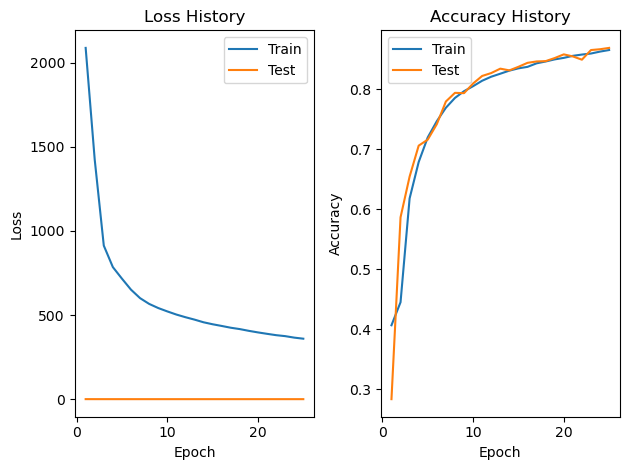

([2088.0768060684204,
  1423.2744981050491,
  912.7695209383965,
  784.9550172686577,
  716.431152433157,
  650.8587863147259,
  600.4662269353867,
  566.3247152268887,
  541.7453320026398,
  521.706277102232,
  503.0299856364727,
  487.2078967690468,
  472.9157083183527,
  457.00474809110165,
  445.26452837884426,
  435.20742106437683,
  424.61880838871,
  416.50756745040417,
  406.04087883234024,
  396.82211987674236,
  388.4086793512106,
  380.4257443547249,
  374.6783468276262,
  365.81681057810783,
  359.48318752646446],
 [0.19343769068717956,
  0.10468817863464355,
  0.08218478825092315,
  0.07438255194425583,
  0.0716054204761982,
  0.06313921822607517,
  0.05847307220101357,
  0.055183471268415454,
  0.053933488097786905,
  0.051347768035531045,
  0.048994957891106604,
  0.047237525904178616,
  0.04527337358444929,
  0.04507615320086479,
  0.04377811040580273,
  0.04215586481839419,
  0.04156230172514915,
  0.04086666735112667,
  0.0398466001406312,
  0.038447994612157345,
  0.

In [22]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [23]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8685166666666667


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

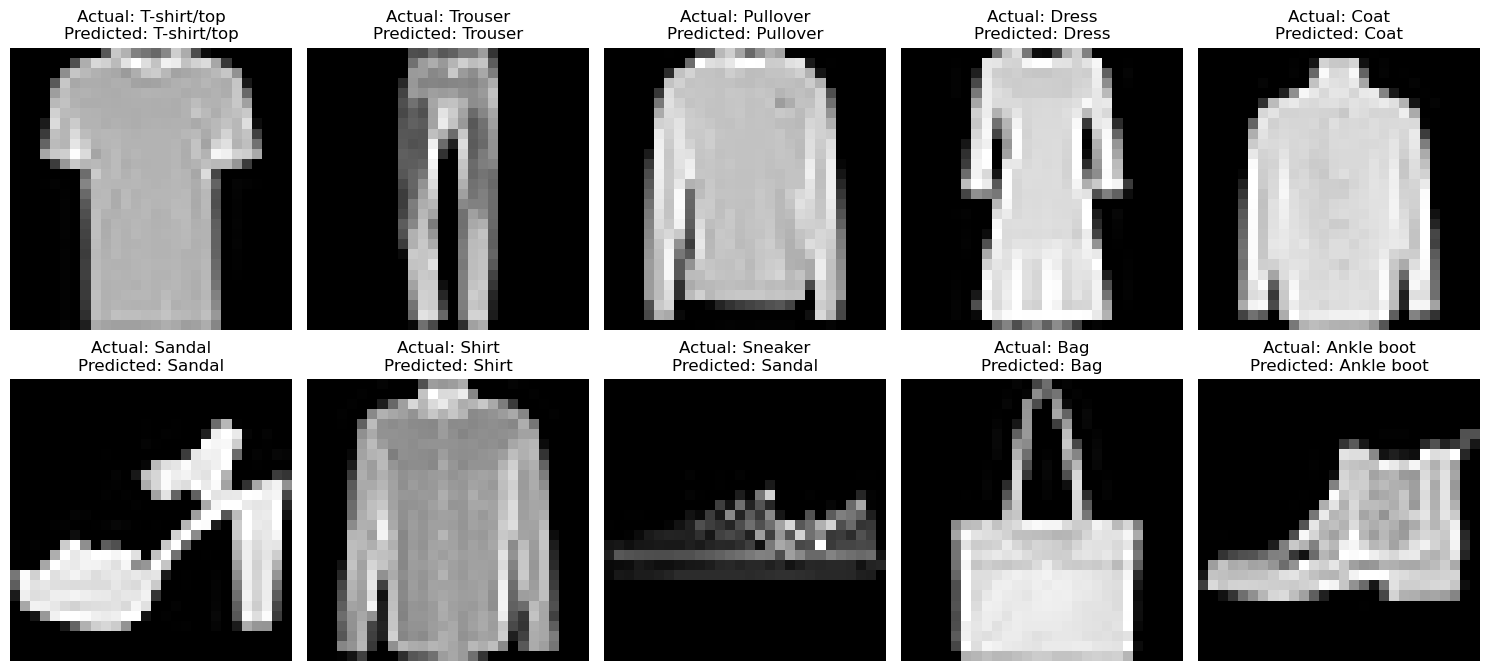

In [47]:
import matplotlib.pyplot as plt

def visualize_labels_predictions(data_loader, model, parameters):
    classes = train_set.classes  
    
    class_images = {class_name: None for class_name in classes}
    
    # Iterate over the dataset
    for images, labels in data_loader:
        # Move images to the device of parameters
        images = images.to(next(iter(parameters.values())).device)  
        # Predicting the labels using the trained model
        outputs = model(images, parameters)
        _, predicted = torch.max(outputs, 1)
        
        # Iterating over the batch
        for image, label, prediction in zip(images, labels, predicted):
            class_name = classes[label]
            # If there is no image for this class, we store the current image
            if class_images[class_name] is None:
                class_images[class_name] = (image, label.item(), prediction.item())
                break
    
    # Visualizing one image from each class along with actual and predicted labels
    fig, axs = plt.subplots(2, len(classes) // 2, figsize=(15, 7))
    for i, (class_name, (image, label, prediction)) in enumerate(class_images.items()):
        ax = axs[i // (len(classes) // 2), i % (len(classes) // 2)]
        # Move the image to CPU for plotting
        ax.imshow(image.squeeze().cpu(), cmap='gray')  
        ax.set_title(f'Actual: {classes[label]}\nPredicted: {classes[prediction]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

visualize_labels_predictions(test_loader, model, parameters)
